# **Project Title: Sales Analysis and Customer Insights using Northwind Database**

The Northwind database is a fictional but realistic relational database that is often used to teach and learn about database management. Microsoft created the Northwind database to show how a company's operational data is organized and how the different parts of the data are related to each other.The Northwind database is not based on a real business, but it presents a realistic scenario that students, developers, and database enthusiasts can use to practice their skills.Some of the skills that can be practiced using the Northwind database include designing database schemas, writing SQL queries, and exploring database concepts.


In this SQL project, I will use the Northwind database, which is a sample database that is often used to learn and practice SQL concepts. I will focus on analyzing sales data to learn more about customers, products, and orders. To do this, I will write SQL queries to get and change the data, and I will perform calculations to make reports that are useful.

In [ ]:
import os
import sqlite3 as sq
import pandas as pd

# SQLite Database Connection and Cursor Creation

In [ ]:
# Connect to SQLite database
conn = sq.connect("mydb.db")

# Create a cursor object
cur = conn.cursor()

In [ ]:
cur.execute("""
    DROP TABLE IF EXISTS Category;
""")

cur.execute("""
    CREATE TABLE Category (
  entityId INTEGER PRIMARY KEY AUTOINCREMENT,
  categoryName VARCHAR(15) NOT NULL,
  description TEXT NULL,
  picture BLOB NULL
  );
""")


In [ ]:
cur.execute("""DROP TABLE IF EXISTS Region;""")

cur.execute("""CREATE TABLE Region (
  entityId INTEGER  PRIMARY KEY AUTOINCREMENT,
  regiondescription VARCHAR(50) NOT NULL);""")

In [ ]:
cur.execute("""DROP TABLE IF EXISTS Territory;""")


cur.execute("""CREATE TABLE Territory (
  entityId INTEGER PRIMARY KEY AUTOINCREMENT,
  territoryCode VARCHAR(20) NOT NULL,
  territorydescription VARCHAR(50) NOT NULL,
  regionId INT NOT NULL,
  FOREIGN KEY (regionId) REFERENCES Region(entityId));""")


In [ ]:
cur.execute("""DROP TABLE IF EXISTS CustomerDemographics;""")

cur.execute("""CREATE TABLE CustomerDemographics (
  entityId INTEGER PRIMARY KEY AUTOINCREMENT,
  customerDesc TEXT NULL
  );""")

In [ ]:
cur.execute("""DROP TABLE IF EXISTS Customer;""")

cur.execute("""CREATE TABLE Customer (
  entityId INTEGER PRIMARY KEY AUTOINCREMENT,
  companyName VARCHAR(40) NOT NULL,
  contactName VARCHAR(30) NULL,
  contactTitle VARCHAR(30) NULL,
  address VARCHAR(60) NULL,
  city VARCHAR(15) NULL,
  region VARCHAR(15) NULL,
  postalCode VARCHAR(10) NULL,
  country VARCHAR(15) NULL,
  phone VARCHAR(24) NULL,
  mobile VARCHAR(24) NULL,
  email VARCHAR(225) NULL,
  fax VARCHAR(24) NULL
  );""")

In [ ]:
cur.execute("""DROP TABLE IF EXISTS Customer;""")

cur.execute("""CREATE TABLE Customer (
  entityId INTEGER PRIMARY KEY AUTOINCREMENT,
  companyName VARCHAR(40) NOT NULL,
  contactName VARCHAR(30) NULL,
  contactTitle VARCHAR(30) NULL,
  address VARCHAR(60) NULL,
  city VARCHAR(15) NULL,
  region VARCHAR(15) NULL,
  postalCode VARCHAR(10) NULL,
  country VARCHAR(15) NULL,
  phone VARCHAR(24) NULL,
  mobile VARCHAR(24) NULL,
  email VARCHAR(225) NULL,
  fax VARCHAR(24) NULL
  );""")

In [ ]:
cur.execute("""DROP TABLE IF EXISTS CustomerCustomerDemographics;""")

cur.execute("""CREATE TABLE CustomerCustomerDemographics (
  entityId INTEGER PRIMARY KEY AUTOINCREMENT,
  customerId  INT NOT NULL,
  customerTypeId  INT NOT NULL,
  FOREIGN KEY (customerId)
      REFERENCES Customer(entityId),
  FOREIGN KEY (customerTypeId)
      REFERENCES CustomerDemographics(entityId)
  );""")

In [ ]:
cur.execute("""DROP TABLE IF EXISTS Employee;""")

cur.execute("""CREATE TABLE Employee (
  entityId INTEGER PRIMARY KEY AUTOINCREMENT,
  lastname VARCHAR(20) NOT NULL,
  firstname VARCHAR(10) NOT NULL,
  title VARCHAR(30) NULL,
  titleOfCourtesy VARCHAR(25) NULL,
  birthDate DATETIME NULL,
  hireDate DATETIME NULL,
  address VARCHAR(60) NULL,
  city VARCHAR(15) NULL,
  region VARCHAR(15) NULL,
  postalCode VARCHAR(10) NULL,
  country VARCHAR(15) NULL,
  phone VARCHAR(24) NULL,
  extension VARCHAR(4) NULL,
  mobile VARCHAR(24) NULL,
  email VARCHAR(225) NULL,
  photo BLOB NULL,
  notes BLOB NULL,
  mgrId INT NULL,
  photoPath VARCHAR(255) NULL
  );""")

In [ ]:
cur.execute("""DROP TABLE IF EXISTS EmployeeTerritory;""")


cur.execute("""CREATE TABLE EmployeeTerritory (
  entityId INTEGER PRIMARY KEY AUTOINCREMENT,
  employeeId INT NOT NULL,
  territoryCode VARCHAR(20) NOT NULL,
  FOREIGN KEY (employeeId)
      REFERENCES Employee(entityId),
  FOREIGN KEY (territoryCode)
      REFERENCES Territory(territoryCode)
  );""")


In [ ]:
cur.execute("""DROP TABLE IF EXISTS Supplier;""")

cur.execute("""CREATE TABLE Supplier (
  entityId INTEGER PRIMARY KEY AUTOINCREMENT,
  companyName VARCHAR(40) NOT NULL,
  contactName VARCHAR(30) NULL,
  contactTitle VARCHAR(30) NULL,
  address VARCHAR(60) NULL,
  city VARCHAR(15) NULL,
  region VARCHAR(15) NULL,
  postalCode VARCHAR(10) NULL,
  country VARCHAR(15) NULL,
  phone VARCHAR(24) NULL,
  email VARCHAR(225) NULL,
  fax VARCHAR(24) NULL,
  HomePage TEXT NULL
  );""")

In [ ]:
cur.execute("""DROP TABLE IF EXISTS Product;""")

cur.execute("""CREATE TABLE Product (
  entityId INTEGER PRIMARY KEY AUTOINCREMENT,
  productName VARCHAR(40) NOT NULL,
  supplierId INT NULL,
  categoryId INT NULL,
  quantityPerUnit VARCHAR(20) NULL,
  unitPrice DECIMAL(10, 2) NULL,
  unitsInStock SMALLINT NULL,
  unitsOnOrder SMALLINT NULL,
  reorderLevel SMALLINT NULL,
  discontinued CHAR(1) NOT NULL,
  FOREIGN KEY (supplierId) REFERENCES Supplier(entityId),
  FOREIGN KEY (categoryId) REFERENCES Category(entityId)
  );""")


In [ ]:
cur.execute("""DROP TABLE IF EXISTS Shipper;""")

cur.execute("""CREATE TABLE Shipper (
  entityId INTEGER PRIMARY KEY AUTOINCREMENT,
  companyName VARCHAR(40) NOT NULL,
  phone VARCHAR(44) NULL
  );""")

In [ ]:
cur.execute("""DROP TABLE IF EXISTS SalesOrder;""")

cur.execute("""
CREATE TABLE SalesOrder (
  entityId INTEGER PRIMARY KEY AUTOINCREMENT,
  customerId INT NOT NULL,
  employeeId INT NULL,
  orderDate DATETIME NULL,
  requiredDate DATETIME NULL,
  shippedDate DATETIME NULL,
  shipperId INT NOT NULL,
  freight DECIMAL(10, 2) NULL,
  shipName VARCHAR(40) NULL,
  shipAddress VARCHAR(60) NULL,
  shipCity VARCHAR(15) NULL,
  shipRegion VARCHAR(15) NULL,
  shipPostalCode VARCHAR(10) NULL,
  shipCountry VARCHAR(15) NULL,
  FOREIGN KEY (shipperId) REFERENCES Shipper(entityId),
  FOREIGN KEY (customerId) REFERENCES Customer(entityId),
  FOREIGN KEY (employeeId) REFERENCES EmployeeTerritory(employeeId)
  );""")

In [ ]:
cur.execute("""DROP TABLE IF EXISTS OrderDetail;""")

cur.execute("""CREATE TABLE OrderDetail (
   entityId INTEGER PRIMARY KEY AUTOINCREMENT,
   orderId INT NOT NULL,
   productId INT NOT NULL,
   unitPrice DECIMAL(10, 2) NOT NULL,
   quantity SMALLINT NOT NULL,
   discount DECIMAL(10, 2) NOT NULL,
   FOREIGN KEY (orderId) REFERENCES SalesOrder(entityId),
   FOREIGN KEY (productId) REFERENCES Product(entityId)
  );""")

In [ ]:
#Indexing & Foreign Key

cur.execute("""CREATE UNIQUE INDEX IF NOT EXISTS IDX_TerrytoryCode ON Territory (territoryCode);""")

cur.execute("""CREATE UNIQUE INDEX IF NOT EXISTS IDX_TerritoryCode_RegionId ON Territory (territoryCode, regionId);""")

cur.execute("""CREATE UNIQUE INDEX IF NOT EXISTS IDX_CustomerId_CustomerTypeId ON CustomerCustomerDemographics (customerId, customerTypeId);""")

cur.execute("""CREATE UNIQUE INDEX IF NOT EXISTS IDX_EmployeeId_TerritoryCode ON EmployeeTerritory (employeeId, territoryCode);""")

cur.execute("""CREATE UNIQUE INDEX IF NOT EXISTS IDX_OrderId_ProductId ON OrderDetail (orderId, productId);""")

In [ ]:
#Populate Employees table

cur.execute("""INSERT INTO Employee(entityId, lastname, firstname, title, titleofcourtesy, birthdate, hiredate, address, city, region, postalcode, country, phone, mgrid)
  VALUES(1, 'Davis', 'Sara', 'CEO', 'Ms.', '1958-12-08 00:00:00.000', '2002-05-01 00:00:00.000', '7890 - 20th Ave. E., Apt. 2A', 'Seattle', 'WA', '10003', 'USA', '(206) 555-0101', NULL);""")
cur.execute("""INSERT INTO Employee(entityid, lastname, firstname, title, titleofcourtesy, birthdate, hiredate, address, city, region, postalcode, country, phone, mgrid)
  VALUES(2, 'Funk', 'Don', 'Vice President, Sales', 'Dr.', '1962-02-19 00:00:00.000', '2002-08-14 00:00:00.000', '9012 W. Capital Way', 'Tacoma', 'WA', '10001', 'USA', '(206) 555-0100', 1);""")
cur.execute("""INSERT INTO Employee(entityid, lastname, firstname, title, titleofcourtesy, birthdate, hiredate, address, city, region, postalcode, country, phone, mgrid)
  VALUES(3, 'Lew', 'Judy', 'Sales Manager', 'Ms.', '1973-08-30 00:00:00.000', '2002-04-01 00:00:00.000', '2345 Moss Bay Blvd.', 'Kirkland', 'WA', '10007', 'USA', '(206) 555-0103', 2);""")
cur.execute("""INSERT INTO Employee(entityid, lastname, firstname, title, titleofcourtesy, birthdate, hiredate, address, city, region, postalcode, country, phone, mgrid)
  VALUES(4, 'Peled', 'Yael', 'Sales Representative', 'Mrs.', '1947-09-19 00:00:00.000', '2003-05-03 00:00:00.000', '5678 Old Redmond Rd.', 'Redmond', 'WA', '10009', 'USA', '(206) 555-0104', 3);""")
cur.execute("""INSERT INTO Employee(entityid, lastname, firstname, title, titleofcourtesy, birthdate, hiredate, address, city, region, postalcode, country, phone, mgrid)
  VALUES(5, 'Buck', 'Sven', 'Sales Manager', 'Mr.', '1965-03-04 00:00:00.000', '2003-10-17 00:00:00.000', '8901 Garrett Hill', 'London', NULL, '10004', 'UK', '(71) 234-5678', 2);""")
cur.execute("""INSERT INTO Employee(entityid, lastname, firstname, title, titleofcourtesy, birthdate, hiredate, address, city, region, postalcode, country, phone, mgrid)
  VALUES(6, 'Suurs', 'Paul', 'Sales Representative', 'Mr.', '1973-07-02 00:00:00.000', '2003-10-17 00:00:00.000', '3456 Coventry House, Miner Rd.', 'London', NULL, '10005', 'UK', '(71) 345-6789', 5);""")
cur.execute("""INSERT INTO Employee(entityid, lastname, firstname, title, titleofcourtesy, birthdate, hiredate, address, city, region, postalcode, country, phone, mgrid)
  VALUES(7, 'King', 'Russell', 'Sales Representative', 'Mr.', '1970-05-29 00:00:00.000', '2004-01-02 00:00:00.000', '6789 Edgeham Hollow, Winchester Way', 'London', NULL, '10002', 'UK', '(71) 123-4567', 5);""")
cur.execute("""INSERT INTO Employee(entityid, lastname, firstname, title, titleofcourtesy, birthdate, hiredate, address, city, region, postalcode, country, phone, mgrid)
  VALUES(8, 'Cameron', 'Maria', 'Sales Representative', 'Ms.', '1968-01-09 00:00:00.000', '2004-03-05 00:00:00.000', '4567 - 11th Ave. N.E.', 'Seattle', 'WA', '10006', 'USA', '(206) 555-0102', 3);""")
cur.execute("""INSERT INTO Employee(entityid, lastname, firstname, title, titleofcourtesy, birthdate, hiredate, address, city, region, postalcode, country, phone, mgrid)
  VALUES(9, 'Dolgopyatova', 'Zoya', 'Sales Representative', 'Ms.', '1976-01-27 00:00:00.000', '2004-11-15 00:00:00.000', '1234 Houndstooth Rd.', 'London', NULL, '10008', 'UK', '(71) 456-7890', 5);""")



In [ ]:
#Populate Supplier table

cur.execute("""INSERT INTO Supplier(entityid, companyname,  contactname, contacttitle, address, city, region, postalcode, country, phone, fax)
  VALUES(1, 'Supplier SWRXU', 'Adolphi, Stephan', 'Purchasing Manager', '2345 Gilbert St.', 'London', NULL, '10023', 'UK', '(171) 456-7890', NULL);""")
cur.execute("""INSERT INTO Supplier(entityid, companyname,  contactname, contacttitle, address, city, region, postalcode, country, phone, fax)
  VALUES(2, 'Supplier VHQZD', 'Hance, Jim', 'Order Administrator', 'P.O. Box 5678', 'New Orleans', 'LA', '10013', 'USA', '(100) 555-0111', NULL);""")
cur.execute("""INSERT INTO Supplier(entityid, companyname,  contactname, contacttitle, address, city, region, postalcode, country, phone, fax)
  VALUES(3, 'Supplier STUAZ', 'Parovszky, Alfons', 'Sales Representative', '1234 Oxford Rd.', 'Ann Arbor', 'MI', '10026', 'USA', '(313) 555-0109', '(313) 555-0112');""")
cur.execute("""INSERT INTO Supplier(entityid, companyname,  contactname, contacttitle, address, city, region, postalcode, country, phone, fax)
  VALUES(4, 'Supplier QOVFD', 'Balázs, Erzsébet', 'Marketing Manager', '7890 Sekimai Musashino-shi', 'Tokyo', NULL, '10011', 'Japan', '(03) 6789-0123', NULL);""")
cur.execute("""INSERT INTO Supplier(entityid, companyname,  contactname, contacttitle, address, city, region, postalcode, country, phone, fax)
  VALUES(5, 'Supplier EQPNC', 'Holm, Michael', 'Export Administrator', 'Calle del Rosal 4567', 'Oviedo', 'Asturias', '10029', 'Spain', '(98) 123 45 67', NULL);""")
cur.execute("""INSERT INTO Supplier(entityid, companyname,  contactname, contacttitle, address, city, region, postalcode, country, phone, fax)
  VALUES(6, 'Supplier QWUSF', 'Popkova, Darya', 'Marketing Representative', '8901 Setsuko Chuo-ku', 'Osaka', NULL, '10028', 'Japan', '(06) 789-0123', NULL);""")
cur.execute("""INSERT INTO Supplier(entityid, companyname,  contactname, contacttitle, address, city, region, postalcode, country, phone, fax)
  VALUES(7, 'Supplier GQRCV', 'Ræbild, Jesper', 'Marketing Manager', '5678 Rose St. Moonie Ponds', 'Melbourne', 'Victoria', '10018', 'Australia', '(03) 123-4567', '(03) 456-7890');""")
cur.execute("""INSERT INTO Supplier(entityid, companyname,  contactname, contacttitle, address, city, region, postalcode, country, phone, fax)
  VALUES(8, 'Supplier BWGYE', 'Iallo, Lucio', 'Sales Representative', '9012 King''s Way', 'Manchester', NULL, '10021', 'UK', '(161) 567-8901', NULL);""")
cur.execute("""INSERT INTO Supplier(entityid, companyname,  contactname, contacttitle, address, city, region, postalcode, country, phone, fax)
  VALUES(9, 'Supplier QQYEU', 'Basalik, Evan', 'Sales Agent', 'Kaloadagatan 4567', 'Göteborg', NULL, '10022', 'Sweden', '031-345 67 89', '031-678 90 12');""")
cur.execute("""INSERT INTO Supplier(entityid, companyname,  contactname, contacttitle, address, city, region, postalcode, country, phone, fax)
  VALUES(10, 'Supplier UNAHG', 'Barnett, Dave', 'Marketing Manager', 'Av. das Americanas 2345', 'Sao Paulo', NULL, '10034', 'Brazil', '(11) 345 6789', NULL);""")
cur.execute("""INSERT INTO Supplier(entityid, companyname,  contactname, contacttitle, address, city, region, postalcode, country, phone, fax)
  VALUES(11, 'Supplier ZPYVS', 'Jain, Mukesh', 'Sales Manager', 'Tiergartenstraße 3456', 'Berlin', NULL, '10016', 'Germany', '(010) 3456789', NULL);""")
cur.execute("""INSERT INTO Supplier(entityid, companyname,  contactname, contacttitle, address, city, region, postalcode, country, phone, fax)
  VALUES(12, 'Supplier SVIYA', 'Regev, Barak', 'International Marketing Mgr.', 'Bogenallee 9012', 'Frankfurt', NULL, '10024', 'Germany', '(069) 234567', NULL);""")
cur.execute("""INSERT INTO Supplier(entityid, companyname,  contactname, contacttitle, address, city, region, postalcode, country, phone, fax)
  VALUES(13, 'Supplier TEGSC', 'Brehm, Peter', 'Coordinator Foreign Markets', 'Frahmredder 3456', 'Cuxhaven', NULL, '10019', 'Germany', '(04721) 1234', '(04721) 2345');""")
cur.execute("""INSERT INTO Supplier(entityid, companyname,  contactname, contacttitle, address, city, region, postalcode, country, phone, fax)
  VALUES(14, 'Supplier KEREV', 'Keil, Kendall', 'Sales Representative', 'Viale Dante, 6789', 'Ravenna', NULL, '10015', 'Italy', '(0544) 56789', '(0544) 34567');""")
cur.execute("""INSERT INTO Supplier(entityid, companyname,  contactname, contacttitle, address, city, region, postalcode, country, phone, fax)
  VALUES(15, 'Supplier NZLIF', 'Sałas-Szlejter, Karolina', 'Marketing Manager', 'Hatlevegen 1234', 'Sandvika', NULL, '10025', 'Norway', '(0)9-012345', NULL);""")
cur.execute("""INSERT INTO Supplier(entityid, companyname,  contactname, contacttitle, address, city, region, postalcode, country, phone, fax)
  VALUES(16, 'Supplier UHZRG', 'Scholl, Thorsten', 'Regional Account Rep.', '8901 - 8th Avenue Suite 210', 'Bend', 'OR', '10035', 'USA', '(503) 555-0108', NULL);""")
cur.execute("""INSERT INTO Supplier(entityid, companyname,  contactname, contacttitle, address, city, region, postalcode, country, phone, fax)
  VALUES(17, 'Supplier QZGUF', 'Kleinerman, Christian', 'Sales Representative', 'Brovallavägen 0123', 'Stockholm', NULL, '10033', 'Sweden', '08-234 56 78', NULL);""")
cur.execute("""INSERT INTO Supplier(entityid, companyname,  contactname, contacttitle, address, city, region, postalcode, country, phone, fax)
  VALUES(18, 'Supplier LVJUA', 'Canel, Fabrice', 'Sales Manager', '3456, Rue des Francs-Bourgeois', 'Paris', NULL, '10031', 'France', '(1) 90.12.34.56', '(1) 01.23.45.67');""")
cur.execute("""INSERT INTO Supplier(entityid, companyname,  contactname, contacttitle, address, city, region, postalcode, country, phone, fax)
  VALUES(19, 'Supplier JDNUG', 'Chapman, Greg', 'Wholesale Account Agent', 'Order Processing Dept. 7890 Paul Revere Blvd.', 'Boston', 'MA', '10027', 'USA', '(617) 555-0110', '(617) 555-0113');""")
cur.execute("""INSERT INTO Supplier(entityid, companyname,  contactname, contacttitle, address, city, region, postalcode, country, phone, fax)
  VALUES(20, 'Supplier CIYNM', 'Köszegi, Emília', 'Owner', '6789 Serangoon Loop, Suite #402', 'Singapore', NULL, '10037', 'Singapore', '012-3456', NULL);""")
cur.execute("""INSERT INTO Supplier(entityid, companyname,  contactname, contacttitle, address, city, region, postalcode, country, phone, fax)
  VALUES(21, 'Supplier XOXZA', 'Shakespear, Paul', 'Sales Manager', 'Lyngbysild Fiskebakken 9012', 'Lyngby', NULL, '10012', 'Denmark', '67890123', '78901234');""")
cur.execute("""INSERT INTO Supplier(entityid, companyname,  contactname, contacttitle, address, city, region, postalcode, country, phone, fax)
  VALUES(22, 'Supplier FNUXM', 'Skelly, Bonnie L.', 'Accounting Manager', 'Verkoop Rijnweg 8901', 'Zaandam', NULL, '10014', 'Netherlands', '(12345) 8901', '(12345) 5678');""")
cur.execute("""INSERT INTO Supplier(entityid, companyname,  contactname, contacttitle, address, city, region, postalcode, country, phone, fax)
  VALUES(23, 'Supplier ELCRN', 'LaMee, Brian', 'Product Manager', 'Valtakatu 1234', 'Lappeenranta', NULL, '10032', 'Finland', '(953) 78901', NULL);""")
cur.execute("""INSERT INTO Supplier(entityid, companyname,  contactname, contacttitle, address, city, region, postalcode, country, phone, fax)
  VALUES(24, 'Supplier JNNES', 'Clark, Molly', 'Sales Representative', '6789 Prince Edward Parade Hunter''s Hill', 'Sydney', 'NSW', '10030', 'Australia', '(02) 234-5678', '(02) 567-8901');""")
cur.execute("""INSERT INTO Supplier(entityid, companyname,  contactname, contacttitle, address, city, region, postalcode, country, phone, fax)
  VALUES(25, 'Supplier ERVYZ', 'Sprenger, Christof', 'Marketing Manager', '7890 Rue St. Laurent', 'Montréal', 'Québec', '10017', 'Canada', '(514) 456-7890', NULL);""")
cur.execute("""INSERT INTO Supplier(entityid, companyname,  contactname, contacttitle, address, city, region, postalcode, country, phone, fax)
  VALUES(26, 'Supplier ZWZDM', 'Cunha, Gonçalo', 'Order Administrator', 'Via dei Gelsomini, 5678', 'Salerno', NULL, '10020', 'Italy', '(089) 4567890', '(089) 4567890');""")
cur.execute("""INSERT INTO Supplier(entityid, companyname,  contactname, contacttitle, address, city, region, postalcode, country, phone, fax)
  VALUES(27, 'Supplier ZRYDZ', 'Leoni, Alessandro', 'Sales Manager', '4567, rue H. Voiron', 'Montceau', NULL, '10036', 'France', '89.01.23.45', NULL);""")
cur.execute("""INSERT INTO Supplier(entityid, companyname,  contactname, contacttitle, address, city, region, postalcode, country, phone, fax)
  VALUES(28, 'Supplier OAVQT', 'Teper, Jeff', 'Sales Representative', 'Bat. B 2345, rue des Alpes', 'Annecy', NULL, '10010', 'France', '01.23.45.67', '89.01.23.45');""")
cur.execute("""INSERT INTO Supplier(entityid, companyname,  contactname, contacttitle, address, city, region, postalcode, country, phone, fax)
  VALUES(29, 'Supplier OGLRK', 'Walters, Rob', 'Accounting Manager', '0123 rue Chasseur', 'Ste-Hyacinthe', 'Québec', '10009', 'Canada', '(514) 567-890', '(514) 678-9012');""")

In [ ]:
#Populate Category table

cur.execute("""INSERT INTO Category(entityid, categoryname,  description)
  VALUES(1, 'Beverages', 'Soft drinks, coffees, teas, beers, and ales');""")
cur.execute("""INSERT INTO Category(entityid, categoryname,  description)
  VALUES(2, 'Condiments', 'Sweet and savory sauces, relishes, spreads, and seasonings');""")
cur.execute("""INSERT INTO Category(entityid, categoryname,  description)
  VALUES(3, 'Confections', 'Desserts, candies, and sweet breads');""")
cur.execute("""INSERT INTO Category(entityid, categoryname,  description)
  VALUES(4, 'Dairy Products', 'Cheeses');""")
cur.execute("""INSERT INTO Category(entityid, categoryname,  description)
  VALUES(5, 'Grains/Cereals', 'Breads, crackers, pasta, and cereal');""")
cur.execute("""INSERT INTO Category(entityid, categoryname,  description)
  VALUES(6, 'Meat/Poultry', 'Prepared meats');""")
cur.execute("""INSERT INTO Category(entityid, categoryname,  description)
  VALUES(7, 'Produce', 'Dried fruit and bean curd');""")
cur.execute("""INSERT INTO Category(entityid, categoryname,  description)
  VALUES(8, 'Seafood', 'Seaweed and fish');""")

In [ ]:
#Populate Products table

cur.execute("""INSERT INTO Product(entityid, productname,  supplierid, categoryid, unitprice, discontinued)
  VALUES(1, 'Product HHYDP', 1, 1, 18.00, 0);""")
cur.execute("""INSERT INTO Product(entityid, productname,  supplierid, categoryid, unitprice, discontinued)
  VALUES(2, 'Product RECZE', 1, 1, 19.00, 0);""")
cur.execute("""INSERT INTO Product(entityid, productname,  supplierid, categoryid, unitprice, discontinued)
  VALUES(3, 'Product IMEHJ', 1, 2, 10.00, 0);""")
cur.execute("""INSERT INTO Product(entityid, productname,  supplierid, categoryid, unitprice, discontinued)
  VALUES(4, 'Product KSBRM', 2, 2, 22.00, 0);""")
cur.execute("""INSERT INTO Product(entityid, productname,  supplierid, categoryid, unitprice, discontinued)
  VALUES(5, 'Product EPEIM', 2, 2, 21.35, 1);""")
cur.execute("""INSERT INTO Product(entityid, productname,  supplierid, categoryid, unitprice, discontinued)
  VALUES(6, 'Product VAIIV', 3, 2, 25.00, 0);""")
cur.execute("""INSERT INTO Product(entityid, productname,  supplierid, categoryid, unitprice, discontinued)
  VALUES(7, 'Product HMLNI', 3, 7, 30.00, 0);""")
cur.execute("""INSERT INTO Product(entityid, productname,  supplierid, categoryid, unitprice, discontinued)
  VALUES(8, 'Product WVJFP', 3, 2, 40.00, 0);""")
cur.execute("""INSERT INTO Product(entityid, productname,  supplierid, categoryid, unitprice, discontinued)
  VALUES(9, 'Product AOZBW', 4, 6, 97.00, 1);""")
cur.execute("""INSERT INTO Product(entityid, productname,  supplierid, categoryid, unitprice, discontinued)
  VALUES(10, 'Product YHXGE', 4, 8, 31.00, 0);""")
cur.execute("""INSERT INTO Product(entityid, productname,  supplierid, categoryid, unitprice, discontinued)
  VALUES(11, 'Product QMVUN', 5, 4, 21.00, 0);""")
cur.execute("""INSERT INTO Product(entityid, productname,  supplierid, categoryid, unitprice, discontinued)
  VALUES(12, 'Product OSFNS', 5, 4, 38.00, 0);""")
cur.execute("""INSERT INTO Product(entityid, productname,  supplierid, categoryid, unitprice, discontinued)
  VALUES(13, 'Product POXFU', 6, 8, 6.00, 0);""")
cur.execute("""INSERT INTO Product(entityid, productname,  supplierid, categoryid, unitprice, discontinued)
  VALUES(14, 'Product PWCJB', 6, 7, 23.25, 0);""")
cur.execute("""INSERT INTO Product(entityid, productname,  supplierid, categoryid, unitprice, discontinued)
  VALUES(15, 'Product KSZOI', 6, 2, 15.50, 0);""")
cur.execute("""INSERT INTO Product(entityid, productname,  supplierid, categoryid, unitprice, discontinued)
  VALUES(16, 'Product PAFRH', 7, 3, 17.45, 0);""")
cur.execute("""INSERT INTO Product(entityid, productname,  supplierid, categoryid, unitprice, discontinued)
  VALUES(17, 'Product BLCAX', 7, 6, 39.00, 1);""")
cur.execute("""INSERT INTO Product(entityid, productname,  supplierid, categoryid, unitprice, discontinued)
  VALUES(18, 'Product CKEDC', 7, 8, 62.50, 0);""")
cur.execute("""INSERT INTO Product(entityid, productname,  supplierid, categoryid, unitprice, discontinued)
  VALUES(19, 'Product XKXDO', 8, 3, 9.20, 0);""")
cur.execute("""INSERT INTO Product(entityid, productname,  supplierid, categoryid, unitprice, discontinued)
  VALUES(20, 'Product QHFFP', 8, 3, 81.00, 0);""")
cur.execute("""INSERT INTO Product(entityid, productname,  supplierid, categoryid, unitprice, discontinued)
  VALUES(21, 'Product VJZZH', 8, 3, 10.00, 0);""")
cur.execute("""INSERT INTO Product(entityid, productname,  supplierid, categoryid, unitprice, discontinued)
  VALUES(22, 'Product CPHFY', 9, 5, 21.00, 0);""")
cur.execute("""INSERT INTO Product(entityid, productname,  supplierid, categoryid, unitprice, discontinued)
  VALUES(23, 'Product JLUDZ', 9, 5, 9.00, 0);""")
cur.execute("""INSERT INTO Product(entityid, productname,  supplierid, categoryid, unitprice, discontinued)
  VALUES(24, 'Product QOGNU', 10, 1, 4.50, 1);""")
cur.execute("""INSERT INTO Product(entityid, productname,  supplierid, categoryid, unitprice, discontinued)
  VALUES(25, 'Product LYLNI', 11, 3, 14.00, 0);""")
cur.execute("""INSERT INTO Product(entityid, productname,  supplierid, categoryid, unitprice, discontinued)
  VALUES(26, 'Product HLGZA', 11, 3, 31.23, 0);""")
cur.execute("""INSERT INTO Product(entityid, productname,  supplierid, categoryid, unitprice, discontinued)
  VALUES(27, 'Product SMIOH', 11, 3, 43.90, 0);""")
cur.execute("""INSERT INTO Product(entityid, productname,  supplierid, categoryid, unitprice, discontinued)
  VALUES(28, 'Product OFBNT', 12, 7, 45.60, 1);""")
cur.execute("""INSERT INTO Product(entityid, productname,  supplierid, categoryid, unitprice, discontinued)
  VALUES(29, 'Product VJXYN', 12, 6, 123.79, 1);""")
cur.execute("""INSERT INTO Product(entityid, productname,  supplierid, categoryid, unitprice, discontinued)
  VALUES(30, 'Product LYERX', 13, 8, 25.89, 0);""")
cur.execute("""INSERT INTO Product(entityid, productname,  supplierid, categoryid, unitprice, discontinued)
  VALUES(31, 'Product XWOXC', 14, 4, 12.50, 0);""")
cur.execute("""INSERT INTO Product(entityid, productname,  supplierid, categoryid, unitprice, discontinued)
  VALUES(32, 'Product NUNAW', 14, 4, 32.00, 0);""")
cur.execute("""INSERT INTO Product(entityid, productname,  supplierid, categoryid, unitprice, discontinued)
  VALUES(33, 'Product ASTMN', 15, 4, 2.50, 0);""")
cur.execute("""INSERT INTO Product(entityid, productname,  supplierid, categoryid, unitprice, discontinued)
  VALUES(34, 'Product SWNJY', 16, 1, 14.00, 0);""")
cur.execute("""INSERT INTO Product(entityid, productname,  supplierid, categoryid, unitprice, discontinued)
  VALUES(35, 'Product NEVTJ', 16, 1, 18.00, 0);""")
cur.execute("""INSERT INTO Product(entityid, productname,  supplierid, categoryid, unitprice, discontinued)
  VALUES(36, 'Product GMKIJ', 17, 8, 19.00, 0);""")
cur.execute("""INSERT INTO Product(entityid, productname,  supplierid, categoryid, unitprice, discontinued)
  VALUES(37, 'Product EVFFA', 17, 8, 26.00, 0);""")
cur.execute("""INSERT INTO Product(entityid, productname,  supplierid, categoryid, unitprice, discontinued)
  VALUES(38, 'Product QDOMO', 18, 1, 263.50, 0);""")
cur.execute("""INSERT INTO Product(entityid, productname,  supplierid, categoryid, unitprice, discontinued)
  VALUES(39, 'Product LSOFL', 18, 1, 18.00, 0);""")
cur.execute("""INSERT INTO Product(entityid, productname,  supplierid, categoryid, unitprice, discontinued)
  VALUES(40, 'Product YZIXQ', 19, 8, 18.40, 0);""")
cur.execute("""INSERT INTO Product(entityid, productname,  supplierid, categoryid, unitprice, discontinued)
  VALUES(41, 'Product TTEEX', 19, 8, 9.65, 0);""")
cur.execute("""INSERT INTO Product(entityid, productname,  supplierid, categoryid, unitprice, discontinued)
  VALUES(42, 'Product RJVNM', 20, 5, 14.00, 1);""")
cur.execute("""INSERT INTO Product(entityid, productname,  supplierid, categoryid, unitprice, discontinued)
  VALUES(43, 'Product ZZZHR', 20, 1, 46.00, 0);""")
cur.execute("""INSERT INTO Product(entityid, productname,  supplierid, categoryid, unitprice, discontinued)
  VALUES(44, 'Product VJIEO', 20, 2, 19.45, 0);""")
cur.execute("""INSERT INTO Product(entityid, productname,  supplierid, categoryid, unitprice, discontinued)
  VALUES(45, 'Product AQOKR', 21, 8, 9.50, 0);""")
cur.execute("""INSERT INTO Product(entityid, productname,  supplierid, categoryid, unitprice, discontinued)
  VALUES(46, 'Product CBRRL', 21, 8, 12.00, 0);""")
cur.execute("""INSERT INTO Product(entityid, productname,  supplierid, categoryid, unitprice, discontinued)
  VALUES(47, 'Product EZZPR', 22, 3, 9.50, 0);""")
cur.execute("""INSERT INTO Product(entityid, productname,  supplierid, categoryid, unitprice, discontinued)
  VALUES(48, 'Product MYNXN', 22, 3, 12.75, 0);""")
cur.execute("""INSERT INTO Product(entityid, productname,  supplierid, categoryid, unitprice, discontinued)
  VALUES(49, 'Product FPYPN', 23, 3, 20.00, 0);""")
cur.execute("""INSERT INTO Product(entityid, productname,  supplierid, categoryid, unitprice, discontinued)
  VALUES(50, 'Product BIUDV', 23, 3, 16.25, 0);""")
cur.execute("""INSERT INTO Product(entityid, productname,  supplierid, categoryid, unitprice, discontinued)
  VALUES(51, 'Product APITJ', 24, 7, 53.00, 0);""")
cur.execute("""INSERT INTO Product(entityid, productname,  supplierid, categoryid, unitprice, discontinued)
  VALUES(52, 'Product QSRXF', 24, 5, 7.00, 0);""")
cur.execute("""INSERT INTO Product(entityid, productname,  supplierid, categoryid, unitprice, discontinued)
  VALUES(53, 'Product BKGEA', 24, 6, 32.80, 1);""")
cur.execute("""INSERT INTO Product(entityid, productname,  supplierid, categoryid, unitprice, discontinued)
  VALUES(54, 'Product QAQRL', 25, 6, 7.45, 0);""")
cur.execute("""INSERT INTO Product(entityid, productname,  supplierid, categoryid, unitprice, discontinued)
  VALUES(55, 'Product YYWRT', 25, 6, 24.00, 0);""")
cur.execute("""INSERT INTO Product(entityid, productname,  supplierid, categoryid, unitprice, discontinued)
  VALUES(56, 'Product VKCMF', 26, 5, 38.00, 0);""")
cur.execute("""INSERT INTO Product(entityid, productname,  supplierid, categoryid, unitprice, discontinued)
  VALUES(57, 'Product OVLQI', 26, 5, 19.50, 0);""")
cur.execute("""INSERT INTO Product(entityid, productname,  supplierid, categoryid, unitprice, discontinued)
  VALUES(58, 'Product ACRVI', 27, 8, 13.25, 0);""")
cur.execute("""INSERT INTO Product(entityid, productname,  supplierid, categoryid, unitprice, discontinued)
  VALUES(59, 'Product UKXRI', 28, 4, 55.00, 0);""")
cur.execute("""INSERT INTO Product(entityid, productname,  supplierid, categoryid, unitprice, discontinued)
  VALUES(60, 'Product WHBYK', 28, 4, 34.00, 0);""")
cur.execute("""INSERT INTO Product(entityid, productname,  supplierid, categoryid, unitprice, discontinued)
  VALUES(61, 'Product XYZPE', 29, 2, 28.50, 0);""")
cur.execute("""INSERT INTO Product(entityid, productname,  supplierid, categoryid, unitprice, discontinued)
  VALUES(62, 'Product WUXYK', 29, 3, 49.30, 0);""")
cur.execute("""INSERT INTO Product(entityid, productname,  supplierid, categoryid, unitprice, discontinued)
  VALUES(63, 'Product ICKNK', 7, 2, 43.90, 0);""")
cur.execute("""INSERT INTO Product(entityid, productname,  supplierid, categoryid, unitprice, discontinued)
  VALUES(64, 'Product HCQDE', 12, 5, 33.25, 0);""")
cur.execute("""INSERT INTO Product(entityid, productname,  supplierid, categoryid, unitprice, discontinued)
  VALUES(65, 'Product XYWBZ', 2, 2, 21.05, 0);""")
cur.execute("""INSERT INTO Product(entityid, productname,  supplierid, categoryid, unitprice, discontinued)
  VALUES(66, 'Product LQMGN', 2, 2, 17.00, 0);""")
cur.execute("""INSERT INTO Product(entityid, productname,  supplierid, categoryid, unitprice, discontinued)
  VALUES(67, 'Product XLXQF', 16, 1, 14.00, 0);""")
cur.execute("""INSERT INTO Product(entityid, productname,  supplierid, categoryid, unitprice, discontinued)
  VALUES(68, 'Product TBTBL', 8, 3, 12.50, 0);""")
cur.execute("""INSERT INTO Product(entityid, productname,  supplierid, categoryid, unitprice, discontinued)
  VALUES(69, 'Product COAXA', 15, 4, 36.00, 0);""")
cur.execute("""INSERT INTO Product(entityid, productname,  supplierid, categoryid, unitprice, discontinued)
  VALUES(70, 'Product TOONT', 7, 1, 15.00, 0);""")
cur.execute("""INSERT INTO Product(entityid, productname,  supplierid, categoryid, unitprice, discontinued)
  VALUES(71, 'Product MYMOI', 15, 4, 21.50, 0);""")
cur.execute("""INSERT INTO Product(entityid, productname,  supplierid, categoryid, unitprice, discontinued)
  VALUES(72, 'Product GEEOO', 14, 4, 34.80, 0);""")
cur.execute("""INSERT INTO Product(entityid, productname,  supplierid, categoryid, unitprice, discontinued)
  VALUES(73, 'Product WEUJZ', 17, 8, 15.00, 0);""")
cur.execute("""INSERT INTO Product(entityid, productname,  supplierid, categoryid, unitprice, discontinued)
  VALUES(74, 'Product BKAZJ', 4, 7, 10.00, 0);""")
cur.execute("""INSERT INTO Product(entityid, productname,  supplierid, categoryid, unitprice, discontinued)
  VALUES(75, 'Product BWRLG', 12, 1, 7.75, 0);""")
cur.execute("""INSERT INTO Product(entityid, productname,  supplierid, categoryid, unitprice, discontinued)
  VALUES(76, 'Product JYGFE', 23, 1, 18.00, 0);""")
cur.execute("""INSERT INTO Product(entityid, productname,  supplierid, categoryid, unitprice, discontinued)
  VALUES(77, 'Product LUNZZ', 12, 2, 13.00, 0);""")

In [ ]:
#Populate Customer table

cur.execute("""INSERT INTO Customer(entityid, companyname, contactname, contacttitle, address, city, region, postalcode, country, phone, fax)
  VALUES(1, 'Customer NRZBB', 'Allen, Michael', 'Sales Representative', 'Obere Str. 0123', 'Berlin', NULL, '10092', 'Germany', '030-3456789', '030-0123456');""")
cur.execute("""INSERT INTO Customer(entityid, companyname, contactname, contacttitle, address, city, region, postalcode, country, phone, fax)
  VALUES(2, 'Customer MLTDN', 'Hassall, Mark', 'Owner', 'Avda. de la Constitución 5678', 'México D.F.', NULL, '10077', 'Mexico', '(5) 789-0123', '(5) 456-7890');""")
cur.execute("""INSERT INTO Customer(entityid, companyname, contactname, contacttitle, address, city, region, postalcode, country, phone, fax)
  VALUES(3, 'Customer KBUDE', 'Peoples, John', 'Owner', 'Mataderos  7890', 'México D.F.', NULL, '10097', 'Mexico', '(5) 123-4567', NULL);""")
cur.execute("""INSERT INTO Customer(entityid, companyname, contactname, contacttitle, address, city, region, postalcode, country, phone, fax)
  VALUES(4, 'Customer HFBZG', 'Arndt, Torsten', 'Sales Representative', '7890 Hanover Sq.', 'London', NULL, '10046', 'UK', '(171) 456-7890', '(171) 456-7891');""")
cur.execute("""INSERT INTO Customer(entityid, companyname, contactname, contacttitle, address, city, region, postalcode, country, phone, fax)
  VALUES(5, 'Customer HGVLZ', 'Higginbotham, Tom', 'Order Administrator', 'Berguvsvägen  5678', 'Luleå', NULL, '10112', 'Sweden', '0921-67 89 01', '0921-23 45 67');""")
cur.execute("""INSERT INTO Customer(entityid, companyname, contactname, contacttitle, address, city, region, postalcode, country, phone, fax)
  VALUES(6, 'Customer XHXJV', 'Poland, Carole', 'Sales Representative', 'Forsterstr. 7890', 'Mannheim', NULL, '10117', 'Germany', '0621-67890', '0621-12345');""")
cur.execute("""INSERT INTO Customer(entityid, companyname, contactname, contacttitle, address, city, region, postalcode, country, phone, fax)
  VALUES(7, 'Customer QXVLA', 'Bansal, Dushyant', 'Marketing Manager', '2345, place Kléber', 'Strasbourg', NULL, '10089', 'France', '67.89.01.23', '67.89.01.24');""")
cur.execute("""INSERT INTO Customer(entityid, companyname, contactname, contacttitle, address, city, region, postalcode, country, phone, fax)
  VALUES(8, 'Customer QUHWH', 'Ilyina, Julia', 'Owner', 'C/ Araquil, 0123', 'Madrid', NULL, '10104', 'Spain', '(91) 345 67 89', '(91) 012 34 56');""")
cur.execute("""INSERT INTO Customer(entityid, companyname, contactname, contacttitle, address, city, region, postalcode, country, phone, fax)
  VALUES(9, 'Customer RTXGC', 'Raghav, Amritansh', 'Owner', '6789, rue des Bouchers', 'Marseille', NULL, '10105', 'France', '23.45.67.89', '23.45.67.80');""")
cur.execute("""INSERT INTO Customer(entityid, companyname, contactname, contacttitle, address, city, region, postalcode, country, phone, fax)
  VALUES(10, 'Customer EEALV', 'Bassols, Pilar Colome', 'Accounting Manager', '8901 Tsawassen Blvd.', 'Tsawassen', 'BC', '10111', 'Canada', '(604) 901-2345', '(604) 678-9012');""")
cur.execute("""INSERT INTO Customer(entityid, companyname, contactname, contacttitle, address, city, region, postalcode, country, phone, fax)
  VALUES(11, 'Customer UBHAU', 'Jaffe, David', 'Sales Representative', 'Fauntleroy Circus 4567', 'London', NULL, '10064', 'UK', '(171) 789-0123', NULL);""")
cur.execute("""INSERT INTO Customer(entityid, companyname, contactname, contacttitle, address, city, region, postalcode, country, phone, fax)
  VALUES(12, 'Customer PSNMQ', 'Ray, Mike', 'Sales Agent', 'Cerrito 3456', 'Buenos Aires', NULL, '10057', 'Argentina', '(1) 890-1234', '(1) 567-8901');""")
cur.execute("""INSERT INTO Customer(entityid, companyname, contactname, contacttitle, address, city, region, postalcode, country, phone, fax)
  VALUES(13, 'Customer VMLOG', 'Benito, Almudena', 'Marketing Manager', 'Sierras de Granada 7890', 'México D.F.', NULL, '10056', 'Mexico', '(5) 456-7890', '(5) 123-4567');""")
cur.execute("""INSERT INTO Customer(entityid, companyname, contactname, contacttitle, address, city, region, postalcode, country, phone, fax)
  VALUES(14, 'Customer WNMAF', 'Jelitto, Jacek', 'Owner', 'Hauptstr. 0123', 'Bern', NULL, '10065', 'Switzerland', '0452-678901', NULL);""")
cur.execute("""INSERT INTO Customer(entityid, companyname, contactname, contacttitle, address, city, region, postalcode, country, phone, fax)
  VALUES(15, 'Customer JUWXK', 'Richardson, Shawn', 'Sales Associate', 'Av. dos Lusíadas, 6789', 'Sao Paulo', 'SP', '10087', 'Brazil', '(11) 012-3456', NULL);""")
cur.execute("""INSERT INTO Customer(entityid, companyname, contactname, contacttitle, address, city, region, postalcode, country, phone, fax)
  VALUES(16, 'Customer GYBBY', 'Birkby, Dana', 'Sales Representative', 'Berkeley Gardens 0123 Brewery', 'London', NULL, '10039', 'UK', '(171) 234-5678', '(171) 234-5679');""")
cur.execute("""INSERT INTO Customer(entityid, companyname, contactname, contacttitle, address, city, region, postalcode, country, phone, fax)
  VALUES(17, 'Customer FEVNN', 'Jones, TiAnna', 'Order Administrator', 'Walserweg 4567', 'Aachen', NULL, '10067', 'Germany', '0241-789012', '0241-345678');""")
cur.execute("""INSERT INTO Customer(entityid, companyname, contactname, contacttitle, address, city, region, postalcode, country, phone, fax)
  VALUES(18, 'Customer BSVAR', 'Rizaldy, Arif', 'Owner', '3456, rue des Cinquante Otages', 'Nantes', NULL, '10041', 'France', '89.01.23.45', '89.01.23.46');""")
cur.execute("""INSERT INTO Customer(entityid, companyname, contactname, contacttitle, address, city, region, postalcode, country, phone, fax)
  VALUES(19, 'Customer RFNQC', 'Boseman, Randall', 'Sales Agent', '5678 King George', 'London', NULL, '10110', 'UK', '(171) 345-6789', '(171) 345-6780');""")
cur.execute("""INSERT INTO Customer(entityid, companyname, contactname, contacttitle, address, city, region, postalcode, country, phone, fax)
  VALUES(20, 'Customer THHDP', 'Kane, John', 'Sales Manager', 'Kirchgasse 9012', 'Graz', NULL, '10059', 'Austria', '1234-5678', '9012-3456');""")
cur.execute("""INSERT INTO Customer(entityid, companyname, contactname, contacttitle, address, city, region, postalcode, country, phone, fax)
  VALUES(21, 'Customer KIdPX', 'Russo, Giuseppe', 'Marketing Assistant', 'Rua Orós, 3456', 'Sao Paulo', 'SP', '10096', 'Brazil', '(11) 456-7890', NULL);""")
cur.execute("""INSERT INTO Customer(entityid, companyname, contactname, contacttitle, address, city, region, postalcode, country, phone, fax)
  VALUES(22, 'Customer DTDMN', 'Bueno, Janaina Burdan, Neville', 'Accounting Manager', 'C/ Moralzarzal, 5678', 'Madrid', NULL, '10080', 'Spain', '(91) 890 12 34', '(91) 567 89 01');""")
cur.execute("""INSERT INTO Customer(entityid, companyname, contactname, contacttitle, address, city, region, postalcode, country, phone, fax)
  VALUES(23, 'Customer WVFAF', 'Khanna, Karan', 'Assistant Sales Agent', '4567, chaussée de Tournai', 'Lille', NULL, '10048', 'France', '45.67.89.01', '45.67.89.02');""")
cur.execute("""INSERT INTO Customer(entityid, companyname, contactname, contacttitle, address, city, region, postalcode, country, phone, fax)
  VALUES(24, 'Customer CYZTN', 'San Juan, Patricia', 'Owner', 'Åkergatan 5678', 'Bräcke', NULL, '10114', 'Sweden', '0695-67 89 01', NULL);""")
cur.execute("""INSERT INTO Customer(entityid, companyname, contactname, contacttitle, address, city, region, postalcode, country, phone, fax)
  VALUES(25, 'Customer AZJED', 'Carlson, Jason', 'Marketing Manager', 'Berliner Platz 9012', 'München', NULL, '10091', 'Germany', '089-8901234', '089-5678901');""")
cur.execute("""INSERT INTO Customer(entityid, companyname, contactname, contacttitle, address, city, region, postalcode, country, phone, fax)
  VALUES(26, 'Customer USDBG', 'Koch, Paul', 'Marketing Manager', '9012, rue Royale', 'Nantes', NULL, '10101', 'France', '34.56.78.90', '34.56.78.91');""")
cur.execute("""INSERT INTO Customer(entityid, companyname, contactname, contacttitle, address, city, region, postalcode, country, phone, fax)
  VALUES(27, 'Customer WMFEA', 'Schmöllerl, Martin', 'Sales Representative', 'Via Monte Bianco 4567', 'Torino', NULL, '10099', 'Italy', '011-2345678', '011-9012345');""")
cur.execute("""INSERT INTO Customer(entityid, companyname, contactname, contacttitle, address, city, region, postalcode, country, phone, fax)
  VALUES(28, 'Customer XYUFB', 'Cavaglieri, Giorgio', 'Sales Manager', 'Jardim das rosas n. 8901', 'Lisboa', NULL, '10054', 'Portugal', '(1) 456-7890', '(1) 123-4567');""")
cur.execute("""INSERT INTO Customer(entityid, companyname, contactname, contacttitle, address, city, region, postalcode, country, phone, fax)
  VALUES(29, 'Customer MDLWA', 'Kolesnikova, Katerina', 'Marketing Manager', 'Rambla de Cataluña, 8901', 'Barcelona', NULL, '10081', 'Spain', '(93) 789 0123', '(93) 456 7890');""")
cur.execute("""INSERT INTO Customer(entityid, companyname, contactname, contacttitle, address, city, region, postalcode, country, phone, fax)
  VALUES(30, 'Customer KSLQF', 'Shabalin, Rostislav', 'Sales Manager', 'C/ Romero, 1234', 'Sevilla', NULL, '10075', 'Spain', '(95) 901 23 45', NULL);""")
cur.execute("""INSERT INTO Customer(entityid, companyname, contactname, contacttitle, address, city, region, postalcode, country, phone, fax)
  VALUES(31, 'Customer YJCBX', 'Cheng, Yao-Qiang', 'Sales Associate', 'Av. Brasil, 5678', 'Campinas', 'SP', '10128', 'Brazil', '(11) 567-8901', NULL);""")
cur.execute("""INSERT INTO Customer(entityid, companyname, contactname, contacttitle, address, city, region, postalcode, country, phone, fax)
  VALUES(32, 'Customer YSIQX', 'Krishnan, Venky', 'Marketing Manager', '6789 Baker Blvd.', 'Eugene', 'OR', '10070', 'USA', '(503) 555-0122', NULL);""")
cur.execute("""INSERT INTO Customer(entityid, companyname, contactname, contacttitle, address, city, region, postalcode, country, phone, fax)
  VALUES(33, 'Customer FVXPQ', 'Sigurdarson, Hallur ', 'Owner', '5ª Ave. Los Palos Grandes 3456', 'Caracas', 'DF', '10043', 'Venezuela', '(2) 789-0123', '(2) 456-7890');""")
cur.execute("""INSERT INTO Customer(entityid, companyname, contactname, contacttitle, address, city, region, postalcode, country, phone, fax)
  VALUES(34, 'Customer IBVRG', 'Cohen, Shy', 'Accounting Manager', 'Rua do Paço, 7890', 'Rio de Janeiro', 'RJ', '10076', 'Brazil', '(21) 789-0123', '(21) 789-0124');""")
cur.execute("""INSERT INTO Customer(entityid, companyname, contactname, contacttitle, address, city, region, postalcode, country, phone, fax)
  VALUES(35, 'Customer UMTLM', 'Langohr, Kris', 'Sales Representative', 'Carrera 1234 con Ave. Carlos Soublette #8-35', 'San Cristóbal', 'Táchira', '10066', 'Venezuela', '(5) 567-8901', '(5) 234-5678');""")
cur.execute("""INSERT INTO Customer(entityid, companyname, contactname, contacttitle, address, city, region, postalcode, country, phone, fax)
  VALUES(36, 'Customer LVJSO', 'Smith, Denise', 'Sales Representative', 'City Center Plaza 2345 Main St.', 'Elgin', 'OR', '10103', 'USA', '(503) 555-0126', '(503) 555-0135');""")
cur.execute("""INSERT INTO Customer(entityid, companyname, contactname, contacttitle, address, city, region, postalcode, country, phone, fax)
  VALUES(37, 'Customer FRXZL', 'Crăciun, Ovidiu V.', 'Sales Associate', '9012 Johnstown Road', 'Cork', 'Co. Cork', '10051', 'Ireland', '8901 234', '5678 9012');""")
cur.execute("""INSERT INTO Customer(entityid, companyname, contactname, contacttitle, address, city, region, postalcode, country, phone, fax)
  VALUES(38, 'Customer LJUCA', 'Lee, Frank', 'Marketing Manager', 'Garden House Crowther Way 3456', 'Cowes', 'Isle of Wight', '10063', 'UK', '(198) 567-8901', NULL);""")
cur.execute("""INSERT INTO Customer(entityid, companyname, contactname, contacttitle, address, city, region, postalcode, country, phone, fax)
  VALUES(39, 'Customer GLLAG', 'Song, Lolan', 'Sales Associate', 'Maubelstr. 8901', 'Brandenburg', NULL, '10060', 'Germany', '0555-34567', NULL);""")
cur.execute("""INSERT INTO Customer(entityid, companyname, contactname, contacttitle, address, city, region, postalcode, country, phone, fax)
  VALUES(40, 'Customer EFFTC', 'De Oliveira, Jose', 'Sales Representative', '2345, avenue de l''Europe', 'Versailles', NULL, '10108', 'France', '12.34.56.78', '12.34.56.79');""")
cur.execute("""INSERT INTO Customer(entityid, companyname, contactname, contacttitle, address, city, region, postalcode, country, phone, fax)
  VALUES(41, 'Customer XIIWM', 'Litton, Tim', 'Sales Manager', '3456 rue Alsace-Lorraine', 'Toulouse', NULL, '10053', 'France', '90.12.34.56', '90.12.34.57');""")
cur.execute("""INSERT INTO Customer(entityid, companyname, contactname, contacttitle, address, city, region, postalcode, country, phone, fax)
  VALUES(42, 'Customer IAIJK', 'Steiner, Dominik', 'Marketing Assistant', '2345 Oak St.', 'Vancouver', 'BC', '10098', 'Canada', '(604) 567-8901', '(604) 234-5678');""")
cur.execute("""INSERT INTO Customer(entityid, companyname, contactname, contacttitle, address, city, region, postalcode, country, phone, fax)
  VALUES(43, 'Customer UISOJ', 'Deshpande, Anu', 'Marketing Manager', '8901 Orchestra Terrace', 'Walla Walla', 'WA', '10069', 'USA', '(509) 555-0119', '(509) 555-0130');""")
cur.execute("""INSERT INTO Customer(entityid, companyname, contactname, contacttitle, address, city, region, postalcode, country, phone, fax)
  VALUES(44, 'Customer OXFRU', 'Louverdis, George', 'Sales Representative', 'Magazinweg 8901', 'Frankfurt a.M.', NULL, '10095', 'Germany', '069-7890123', '069-4567890');""")
cur.execute("""INSERT INTO Customer(entityid, companyname, contactname, contacttitle, address, city, region, postalcode, country, phone, fax)
  VALUES(45, 'Customer QXPPT', 'Sunkammurali,  Krishna', 'Owner', '1234 Polk St. Suite 5', 'San Francisco', 'CA', '10062', 'USA', '(415) 555-0118', NULL);""")
cur.execute("""INSERT INTO Customer(entityid, companyname, contactname, contacttitle, address, city, region, postalcode, country, phone, fax)
  VALUES(46, 'Customer XPNIK', 'Dressler, Marlies', 'Accounting Manager', 'Carrera 7890 con Ave. Bolívar #65-98 Llano Largo', 'Barquisimeto', 'Lara', '10093', 'Venezuela', '(9) 789-0123', '(9) 456-7890');""")
cur.execute("""INSERT INTO Customer(entityid, companyname, contactname, contacttitle, address, city, region, postalcode, country, phone, fax)
  VALUES(47, 'Customer PSQUZ', 'Lupu, Cornel', 'Owner', 'Ave. 5 de Mayo Porlamar 5678', 'I. de Margarita', 'Nueva Esparta', '10121', 'Venezuela', '(8) 01-23-45', '(8) 67-89-01');""")
cur.execute("""INSERT INTO Customer(entityid, companyname, contactname, contacttitle, address, city, region, postalcode, country, phone, fax)
  VALUES(48, 'Customer DVFMB', 'Szymczak, Radosław', 'Sales Manager', '9012 Chiaroscuro Rd.', 'Portland', 'OR', '10073', 'USA', '(503) 555-0117', '(503) 555-0129');""")
cur.execute("""INSERT INTO Customer(entityid, companyname, contactname, contacttitle, address, city, region, postalcode, country, phone, fax)
  VALUES(49, 'Customer CQRAA', 'Duerr, Bernard', 'Marketing Manager', 'Via Ludovico il Moro 6789', 'Bergamo', NULL, '10106', 'Italy', '035-345678', '035-901234');""")
cur.execute("""INSERT INTO Customer(entityid, companyname, contactname, contacttitle, address, city, region, postalcode, country, phone, fax)
  VALUES(50, 'Customer JYPSC', 'Mace, Donald', 'Sales Agent', 'Rue Joseph-Bens 0123', 'Bruxelles', NULL, '10074', 'Belgium', '(02) 890 12 34', '(02) 567 89 01');""")
cur.execute("""INSERT INTO Customer(entityid, companyname, contactname, contacttitle, address, city, region, postalcode, country, phone, fax)
  VALUES(51, 'Customer PVDZC', 'Taylor, Maurice', 'Marketing Assistant', '8901 rue St. Laurent', 'Montréal', 'Québec', '10040', 'Canada', '(514) 345-6789', '(514) 012-3456');""")
cur.execute("""INSERT INTO Customer(entityid, companyname, contactname, contacttitle, address, city, region, postalcode, country, phone, fax)
  VALUES(52, 'Customer PZNLA', 'Dupont-Roc, Patrice', 'Marketing Assistant', 'Heerstr. 4567', 'Leipzig', NULL, '10125', 'Germany', '0342-12345', NULL);""")
cur.execute("""INSERT INTO Customer(entityid, companyname, contactname, contacttitle, address, city, region, postalcode, country, phone, fax)
  VALUES(53, 'Customer GCJSG', 'Mallit, Ken', 'Sales Associate', 'South House 1234 Queensbridge', 'London', NULL, '10061', 'UK', '(171) 890-1234', '(171) 890-1235');""")
cur.execute("""INSERT INTO Customer(entityid, companyname, contactname, contacttitle, address, city, region, postalcode, country, phone, fax)
  VALUES(54, 'Customer TDKEG', 'Tiano, Mike', 'Sales Agent', 'Ing. Gustavo Moncada 0123 Piso 20-A', 'Buenos Aires', NULL, '10094', 'Argentina', '(1) 123-4567', '(1) 890-1234');""")
cur.execute("""INSERT INTO Customer(entityid, companyname, contactname, contacttitle, address, city, region, postalcode, country, phone, fax)
  VALUES(55, 'Customer KZQZT', 'Egelund-Muller, Anja', 'Sales Representative', '7890 Bering St.', 'Anchorage', 'AK', '10050', 'USA', '(907) 555-0115', '(907) 555-0128');""")
cur.execute("""INSERT INTO Customer(entityid, companyname, contactname, contacttitle, address, city, region, postalcode, country, phone, fax)
  VALUES(56, 'Customer QNIVZ', 'Marinova, Nadejda', 'Owner', 'Mehrheimerstr. 9012', 'Köln', NULL, '10047', 'Germany', '0221-0123456', '0221-7890123');""")
cur.execute("""INSERT INTO Customer(entityid, companyname, contactname, contacttitle, address, city, region, postalcode, country, phone, fax)
  VALUES(57, 'Customer WVAXS', 'Tollevsen, Bjørn', 'Owner', '5678, boulevard Charonne', 'Paris', NULL, '10085', 'France', '(1) 89.01.23.45', '(1) 89.01.23.46');""")
cur.execute("""INSERT INTO Customer(entityid, companyname, contactname, contacttitle, address, city, region, postalcode, country, phone, fax)
  VALUES(58, 'Customer AHXHT', 'Fakhouri, Fadi', 'Sales Representative', 'Calle Dr. Jorge Cash 8901', 'México D.F.', NULL, '10116', 'Mexico', '(5) 890-1234', '(5) 567-8901');""")
cur.execute("""INSERT INTO Customer(entityid, companyname, contactname, contacttitle, address, city, region, postalcode, country, phone, fax)
  VALUES(59, 'Customer LOLJO', 'Meston, Tosh', 'Sales Manager', 'Geislweg 2345', 'Salzburg', NULL, '10127', 'Austria', '4567-8901', '2345-6789');""")
cur.execute("""INSERT INTO Customer(entityid, companyname, contactname, contacttitle, address, city, region, postalcode, country, phone, fax)
  VALUES(60, 'Customer QZURI', 'Uppal, Sunil', 'Sales Representative', 'Estrada da saúde n. 6789', 'Lisboa', NULL, '10083', 'Portugal', '(1) 789-0123', NULL);""")
cur.execute("""INSERT INTO Customer(entityid, companyname, contactname, contacttitle, address, city, region, postalcode, country, phone, fax)
  VALUES(61, 'Customer WULWD', 'Florczyk, Krzysztof', 'Accounting Manager', 'Rua da Panificadora, 1234', 'Rio de Janeiro', 'RJ', '10115', 'Brazil', '(21) 678-9012', '(21) 678-9013');""")
cur.execute("""INSERT INTO Customer(entityid, companyname, contactname, contacttitle, address, city, region, postalcode, country, phone, fax)
  VALUES(62, 'Customer WFIZJ', 'Misiec, Anna', 'Marketing Assistant', 'Alameda dos Canàrios, 1234', 'Sao Paulo', 'SP', '10102', 'Brazil', '(11) 901-2345', NULL);""")
cur.execute("""INSERT INTO Customer(entityid, companyname, contactname, contacttitle, address, city, region, postalcode, country, phone, fax)
  VALUES(63, 'Customer IRRVL', 'Veronesi, Giorgio', 'Accounting Manager', 'Taucherstraße 1234', 'Cunewalde', NULL, '10126', 'Germany', '0372-12345', NULL);""")
cur.execute("""INSERT INTO Customer(entityid, companyname, contactname, contacttitle, address, city, region, postalcode, country, phone, fax)
  VALUES(64, 'Customer LWGMD', 'Gaffney, Lawrie', 'Sales Representative', 'Av. del Libertador 3456', 'Buenos Aires', NULL, '10124', 'Argentina', '(1) 234-5678', '(1) 901-2345');""")
cur.execute("""INSERT INTO Customer(entityid, companyname, contactname, contacttitle, address, city, region, postalcode, country, phone, fax)
  VALUES(65, 'Customer NYUHS', 'Moore, Michael', 'Assistant Sales Representative', '6789 Milton Dr.', 'Albuquerque', 'NM', '10109', 'USA', '(505) 555-0125', '(505) 555-0134');""")
cur.execute("""INSERT INTO Customer(entityid, companyname, contactname, contacttitle, address, city, region, postalcode, country, phone, fax)
  VALUES(66, 'Customer LHANT', 'Voss, Florian', 'Sales Associate', 'Strada Provinciale 7890', 'Reggio Emilia', NULL, '10038', 'Italy', '0522-012345', '0522-678901');""")
cur.execute("""INSERT INTO Customer(entityid, companyname, contactname, contacttitle, address, city, region, postalcode, country, phone, fax)
  VALUES(67, 'Customer QVEPD', 'Garden, Euan', 'Assistant Sales Agent', 'Av. Copacabana, 6789', 'Rio de Janeiro', 'RJ', '10052', 'Brazil', '(21) 345-6789', NULL);""")
cur.execute("""INSERT INTO Customer(entityid, companyname, contactname, contacttitle, address, city, region, postalcode, country, phone, fax)
  VALUES(68, 'Customer CCKOT', 'Myrcha, Jacek', 'Sales Manager', 'Grenzacherweg 0123', 'Genève', NULL, '10122', 'Switzerland', '0897-012345', NULL);""")
cur.execute("""INSERT INTO Customer(entityid, companyname, contactname, contacttitle, address, city, region, postalcode, country, phone, fax)
  VALUES(69, 'Customer SIUIH', 'Watters, Jason M.', 'Accounting Manager', 'Gran Vía, 4567', 'Madrid', NULL, '10071', 'Spain', '(91) 567 8901', '(91) 234 5678');""")
cur.execute("""INSERT INTO Customer(entityid, companyname, contactname, contacttitle, address, city, region, postalcode, country, phone, fax)
  VALUES(70, 'Customer TMXGN', 'Ginters, Kaspars', 'Owner', 'Erling Skakkes gate 2345', 'Stavern', NULL, '10123', 'Norway', '07-89 01 23', '07-45 67 89');""")
cur.execute("""INSERT INTO Customer(entityid, companyname, contactname, contacttitle, address, city, region, postalcode, country, phone, fax)
  VALUES(71, 'Customer LCOUJ', 'Navarro, Tomás', 'Sales Representative', '9012 Suffolk Ln.', 'Boise', 'Id', '10078', 'USA', '(208) 555-0116', NULL);""")
cur.execute("""INSERT INTO Customer(entityid, companyname, contactname, contacttitle, address, city, region, postalcode, country, phone, fax)
  VALUES(72, 'Customer AHPOP', 'Welcker, Brian', 'Sales Manager', '4567 Wadhurst Rd.', 'London', NULL, '10088', 'UK', '(171) 901-2345', '(171) 901-2346');""")
cur.execute("""INSERT INTO Customer(entityid, companyname, contactname, contacttitle, address, city, region, postalcode, country, phone, fax)
  VALUES(73, 'Customer JMIKW', 'Gonzalez, Nuria', 'Owner', 'Vinbæltet 3456', 'Kobenhavn', NULL, '10079', 'Denmark', '12 34 56 78', '90 12 34 56');""")
cur.execute("""INSERT INTO Customer(entityid, companyname, contactname, contacttitle, address, city, region, postalcode, country, phone, fax)
  VALUES(74, 'Customer YSHXL', 'O’Brien, Dave', 'Marketing Manager', '9012, rue Lauriston', 'Paris', NULL, '10058', 'France', '(1) 23.45.67.89', '(1) 23.45.67.80');""")
cur.execute("""INSERT INTO Customer(entityid, companyname, contactname, contacttitle, address, city, region, postalcode, country, phone, fax)
  VALUES(75, 'Customer XOJYP', 'Wojciechowska, Agnieszka', 'Sales Manager', 'P.O. Box 1234', 'Lander', 'WY', '10113', 'USA', '(307) 555-0114', '(307) 555-0127');""")
cur.execute("""INSERT INTO Customer(entityid, companyname, contactname, contacttitle, address, city, region, postalcode, country, phone, fax)
  VALUES(76, 'Customer SFOGW', 'Gulbis, Katrin', 'Accounting Manager', 'Boulevard Tirou, 2345', 'Charleroi', NULL, '10100', 'Belgium', '(071) 56 78 90 12', '(071) 34 56 78 90');""")
cur.execute("""INSERT INTO Customer(entityid, companyname, contactname, contacttitle, address, city, region, postalcode, country, phone, fax)
  VALUES(77, 'Customer LCYBZ', 'Osorio, Cristian', 'Marketing Manager', '2345 Jefferson Way Suite 2', 'Portland', 'OR', '10042', 'USA', '(503) 555-0120', NULL);""")
cur.execute("""INSERT INTO Customer(entityid, companyname, contactname, contacttitle, address, city, region, postalcode, country, phone, fax)
  VALUES(78, 'Customer NLTYP', 'Young, Robin', 'Marketing Assistant', '0123 Grizzly Peak Rd.', 'Butte', 'MT', '10107', 'USA', '(406) 555-0121', '(406) 555-0131');""")
cur.execute("""INSERT INTO Customer(entityid, companyname, contactname, contacttitle, address, city, region, postalcode, country, phone, fax)
  VALUES(79, 'Customer FAPSM', 'Wickham, Jim', 'Marketing Manager', 'Luisenstr. 0123', 'Münster', NULL, '10118', 'Germany', '0251-456789', '0251-012345');""")
cur.execute("""INSERT INTO Customer(entityid, companyname, contactname, contacttitle, address, city, region, postalcode, country, phone, fax)
  VALUES(80, 'Customer VONTK', 'Geschwandtner, Jens', 'Owner', 'Avda. Azteca 4567', 'México D.F.', NULL, '10044', 'Mexico', '(5) 678-9012', NULL);""")
cur.execute("""INSERT INTO Customer(entityid, companyname, contactname, contacttitle, address, city, region, postalcode, country, phone, fax)
  VALUES(81, 'Customer YQQWW', 'Nagel, Jean-Philippe', 'Sales Representative', 'Av. Inês de Castro, 1234', 'Sao Paulo', 'SP', '10120', 'Brazil', '(11) 123-4567', '(11) 234-5678');""")
cur.execute("""INSERT INTO Customer(entityid, companyname, contactname, contacttitle, address, city, region, postalcode, country, phone, fax)
  VALUES(82, 'Customer EYHKM', 'Veninga, Tjeerd', 'Sales Associate', '1234 DaVinci Blvd.', 'Kirkland', 'WA', '10119', 'USA', '(206) 555-0124', '(206) 555-0133');""")
cur.execute("""INSERT INTO Customer(entityid, companyname, contactname, contacttitle, address, city, region, postalcode, country, phone, fax)
  VALUES(83, 'Customer ZRNDE', 'Fonteneau, Karl', 'Sales Manager', 'Smagsloget 3456', 'Århus', NULL, '10090', 'Denmark', '23 45 67 89', '01 23 45 67');""")
cur.execute("""INSERT INTO Customer(entityid, companyname, contactname, contacttitle, address, city, region, postalcode, country, phone, fax)
  VALUES(84, 'Customer NRCSK', 'Tuntisangaroon, Sittichai', 'Sales Agent', '6789, rue du Commerce', 'Lyon', NULL, '10072', 'France', '78.90.12.34', '78.90.12.35');""")
cur.execute("""INSERT INTO Customer(entityid, companyname, contactname, contacttitle, address, city, region, postalcode, country, phone, fax)
  VALUES(85, 'Customer ENQZT', 'McLin, Nkenge', 'Accounting Manager', '5678 rue de l''Abbaye', 'Reims', NULL, '10082', 'France', '56.78.90.12', '56.78.90.13');""")
cur.execute("""INSERT INTO Customer(entityid, companyname, contactname, contacttitle, address, city, region, postalcode, country, phone, fax)
  VALUES(86, 'Customer SNXOJ', 'Syamala, Manoj', 'Sales Representative', 'Adenauerallee 7890', 'Stuttgart', NULL, '10086', 'Germany', '0711-345678', '0711-901234');""")
cur.execute("""INSERT INTO Customer(entityid, companyname, contactname, contacttitle, address, city, region, postalcode, country, phone, fax)
  VALUES(87, 'Customer ZHYOS', 'Ludwig, Michael', 'Accounting Manager', 'Torikatu 9012', 'Oulu', NULL, '10045', 'Finland', '981-123456', '981-789012');""")
cur.execute("""INSERT INTO Customer(entityid, companyname, contactname, contacttitle, address, city, region, postalcode, country, phone, fax)
  VALUES(88, 'Customer SRQVM', 'Li, Yan', 'Sales Manager', 'Rua do Mercado, 4567', 'Resende', 'SP', '10084', 'Brazil', '(14) 234-5678', NULL);""")
cur.execute("""INSERT INTO Customer(entityid, companyname, contactname, contacttitle, address, city, region, postalcode, country, phone, fax)
  VALUES(89, 'Customer YBQTI', 'Smith Jr., Ronaldo', 'Owner', '8901 - 14th Ave. S. Suite 3B', 'Seattle', 'WA', '10049', 'USA', '(206) 555-0123', '(206) 555-0132');""")
cur.execute("""INSERT INTO Customer(entityid, companyname, contactname, contacttitle, address, city, region, postalcode, country, phone, fax)
  VALUES(90, 'Customer XBBVR', 'Larsson, Katarina', 'Owner/Marketing Assistant', 'Keskuskatu 2345', 'Helsinki', NULL, '10055', 'Finland', '90-012 3456', '90-789 0123');""")
cur.execute("""INSERT INTO Customer(entityid, companyname, contactname, contacttitle, address, city, region, postalcode, country, phone, fax)
  VALUES(91, 'Customer CCFIZ', 'Conn, Steve', 'Owner', 'ul. Filtrowa 6789', 'Warszawa', NULL, '10068', 'Poland', '(26) 234-5678', '(26) 901-2345');""")


In [ ]:
#Populate the Shipper table

cur.execute("""INSERT INTO Shipper(entityid, companyname, phone)
  VALUES(1, 'Shipper GVSUA', '(503) 555-0137');""")
cur.execute("""INSERT INTO Shipper(entityid, companyname, phone)
  VALUES(2, 'Shipper ETYNR', '(425) 555-0136');""")
cur.execute("""INSERT INTO Shipper(entityid, companyname, phone)
  VALUES(3, 'Shipper ZHISN', '(415) 555-0138');""")

In [ ]:
#Populate the SalesOrder table

cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid, orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10248, 85, 5, '2006-07-04 00:00:00.000', '2006-08-01 00:00:00.000', '2006-07-16 00:00:00.000', 3, 32.38, 'Ship to 85-B', '6789 rue de l''Abbaye', 'Reims', NULL, '10345', 'France');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid, orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10249, 79, 6, '2006-07-05 00:00:00.000', '2006-08-16 00:00:00.000', '2006-07-10 00:00:00.000', 1, 11.61, 'Ship to 79-C', 'Luisenstr. 9012', 'Münster', NULL, '10328', 'Germany');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid, orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10250, 34, 4, '2006-07-08 00:00:00.000', '2006-08-05 00:00:00.000', '2006-07-12 00:00:00.000', 2, 65.83, 'Destination SCQXA', 'Rua do Paço, 7890', 'Rio de Janeiro', 'RJ', '10195', 'Brazil');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid, orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10251, 84, 3, '2006-07-08 00:00:00.000', '2006-08-05 00:00:00.000', '2006-07-15 00:00:00.000', 1, 41.34, 'Ship to 84-A', '3456, rue du Commerce', 'Lyon', NULL, '10342', 'France');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid, orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10252, 76, 4, '2006-07-09 00:00:00.000', '2006-08-06 00:00:00.000', '2006-07-11 00:00:00.000', 2, 51.30, 'Ship to 76-B', 'Boulevard Tirou, 9012', 'Charleroi', NULL, '10318', 'Belgium');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid, orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10253, 34, 3, '2006-07-10 00:00:00.000', '2006-07-24 00:00:00.000', '2006-07-16 00:00:00.000', 2, 58.17, 'Destination JPAIY', 'Rua do Paço, 8901', 'Rio de Janeiro', 'RJ', '10196', 'Brazil');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid, orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10254, 14, 5, '2006-07-11 00:00:00.000', '2006-08-08 00:00:00.000', '2006-07-23 00:00:00.000', 2, 22.98, 'Destination YUJRD', 'Hauptstr. 1234', 'Bern', NULL, '10139', 'Switzerland');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid, orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10255, 68, 9, '2006-07-12 00:00:00.000', '2006-08-09 00:00:00.000', '2006-07-15 00:00:00.000', 3, 148.33, 'Ship to 68-A', 'Starenweg 6789', 'Genève', NULL, '10294', 'Switzerland');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid, orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10256, 88, 3, '2006-07-15 00:00:00.000', '2006-08-12 00:00:00.000', '2006-07-17 00:00:00.000', 2, 13.97, 'Ship to 88-B', 'Rua do Mercado, 5678', 'Resende', 'SP', '10354', 'Brazil');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid, orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10257, 35, 4, '2006-07-16 00:00:00.000', '2006-08-13 00:00:00.000', '2006-07-22 00:00:00.000', 3, 81.91, 'Destination JYDLM', 'Carrera1234 con Ave. Carlos Soublette #8-35', 'San Cristóbal', 'Táchira', '10199', 'Venezuela');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid, orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10258, 20, 1, '2006-07-17 00:00:00.000', '2006-08-14 00:00:00.000', '2006-07-23 00:00:00.000', 1, 140.51, 'Destination RVDMF', 'Kirchgasse 9012', 'Graz', NULL, '10157', 'Austria');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid, orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10259, 13, 4, '2006-07-18 00:00:00.000', '2006-08-15 00:00:00.000', '2006-07-25 00:00:00.000', 3, 3.25, 'Destination LGGCH', 'Sierras de Granada 9012', 'México D.F.', NULL, '10137', 'Mexico');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid, orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10260, 56, 4, '2006-07-19 00:00:00.000', '2006-08-16 00:00:00.000', '2006-07-29 00:00:00.000', 1, 55.09, 'Ship to 56-A', 'Mehrheimerstr. 0123', 'Köln', NULL, '10258', 'Germany');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid, orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10261, 61, 4, '2006-07-19 00:00:00.000', '2006-08-16 00:00:00.000', '2006-07-30 00:00:00.000', 2, 3.05, 'Ship to 61-B', 'Rua da Panificadora, 6789', 'Rio de Janeiro', 'RJ', '10274', 'Brazil');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid, orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10262, 65, 8, '2006-07-22 00:00:00.000', '2006-08-19 00:00:00.000', '2006-07-25 00:00:00.000', 3, 48.29, 'Ship to 65-B', '8901 Milton Dr.', 'Albuquerque', 'NM', '10286', 'USA');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid, orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10263, 20, 9, '2006-07-23 00:00:00.000', '2006-08-20 00:00:00.000', '2006-07-31 00:00:00.000', 3, 146.06, 'Destination FFXKT', 'Kirchgasse 0123', 'Graz', NULL, '10158', 'Austria');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid, orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10264, 24, 6, '2006-07-24 00:00:00.000', '2006-08-21 00:00:00.000', '2006-08-23 00:00:00.000', 3, 3.67, 'Destination KBSBN', 'Åkergatan 9012', 'Bräcke', NULL, '10167', 'Sweden');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid, orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10265, 7, 2, '2006-07-25 00:00:00.000', '2006-08-22 00:00:00.000', '2006-08-12 00:00:00.000', 1, 55.28, 'Ship to 7-A', '0123, place Kléber', 'Strasbourg', NULL, '10329', 'France');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid, orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10266, 87, 3, '2006-07-26 00:00:00.000', '2006-09-06 00:00:00.000', '2006-07-31 00:00:00.000', 3, 25.73, 'Ship to 87-B', 'Torikatu 2345', 'Oulu', NULL, '10351', 'Finland');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid, orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10267, 25, 4, '2006-07-29 00:00:00.000', '2006-08-26 00:00:00.000', '2006-08-06 00:00:00.000', 1, 208.58, 'Destination VAPXU', 'Berliner Platz 0123', 'München', NULL, '10168', 'Germany');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid, orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10268, 33, 8, '2006-07-30 00:00:00.000', '2006-08-27 00:00:00.000', '2006-08-02 00:00:00.000', 3, 66.29, 'Destination QJVQH', '5ª Ave. Los Palos Grandes 5678', 'Caracas', 'DF', '10193', 'Venezuela');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid, orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10269, 89, 5, '2006-07-31 00:00:00.000', '2006-08-14 00:00:00.000', '2006-08-09 00:00:00.000', 1, 4.56, 'Ship to 89-B', '8901 - 12th Ave. S.', 'Seattle', 'WA', '10357', 'USA');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid, orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10270, 87, 1, '2006-08-01 00:00:00.000', '2006-08-29 00:00:00.000', '2006-08-02 00:00:00.000', 1, 136.54, 'Ship to 87-B', 'Torikatu 2345', 'Oulu', NULL, '10351', 'Finland');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid, orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10271, 75, 6, '2006-08-01 00:00:00.000', '2006-08-29 00:00:00.000', '2006-08-30 00:00:00.000', 2, 4.54, 'Ship to 75-C', 'P.O. Box 7890', 'Lander', 'WY', '10316', 'USA');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid, orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10272, 65, 6, '2006-08-02 00:00:00.000', '2006-08-30 00:00:00.000', '2006-08-06 00:00:00.000', 2, 98.03, 'Ship to 65-A', '7890 Milton Dr.', 'Albuquerque', 'NM', '10285', 'USA');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid, orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10273, 63, 3, '2006-08-05 00:00:00.000', '2006-09-02 00:00:00.000', '2006-08-12 00:00:00.000', 3, 76.07, 'Ship to 63-A', 'Taucherstraße 1234', 'Cunewalde', NULL, '10279', 'Germany');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid, orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10274, 85, 6, '2006-08-06 00:00:00.000', '2006-09-03 00:00:00.000', '2006-08-16 00:00:00.000', 1, 6.01, 'Ship to 85-B', '6789 rue de l''Abbaye', 'Reims', NULL, '10345', 'France');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid, orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10275, 49, 1, '2006-08-07 00:00:00.000', '2006-09-04 00:00:00.000', '2006-08-09 00:00:00.000', 1, 26.93, 'Ship to 49-A', 'Via Ludovico il Moro 8901', 'Bergamo', NULL, '10235', 'Italy');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid, orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10276, 80, 8, '2006-08-08 00:00:00.000', '2006-08-22 00:00:00.000', '2006-08-14 00:00:00.000', 3, 13.84, 'Ship to 80-C', 'Avda. Azteca 5678', 'México D.F.', NULL, '10334', 'Mexico');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid, orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10277, 52, 2, '2006-08-09 00:00:00.000', '2006-09-06 00:00:00.000', '2006-08-13 00:00:00.000', 3, 125.77, 'Ship to 52-A', 'Heerstr. 9012', 'Leipzig', NULL, '10247', 'Germany');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid, orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10278, 5, 8, '2006-08-12 00:00:00.000', '2006-09-09 00:00:00.000', '2006-08-16 00:00:00.000', 2, 92.69, 'Ship to 5-C', 'Berguvsvägen  1234', 'Luleå', NULL, '10269', 'Sweden');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid, orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10279, 44, 8, '2006-08-13 00:00:00.000', '2006-09-10 00:00:00.000', '2006-08-16 00:00:00.000', 2, 25.83, 'Ship to 44-A', 'Magazinweg 4567', 'Frankfurt a.M.', NULL, '10222', 'Germany');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid, orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10280, 5, 2, '2006-08-14 00:00:00.000', '2006-09-11 00:00:00.000', '2006-09-12 00:00:00.000', 1, 8.98, 'Ship to 5-B', 'Berguvsvägen  0123', 'Luleå', NULL, '10268', 'Sweden');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid, orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10281, 69, 4, '2006-08-14 00:00:00.000', '2006-08-28 00:00:00.000', '2006-08-21 00:00:00.000', 1, 2.94, 'Ship to 69-A', 'Gran Vía, 9012', 'Madrid', NULL, '10297', 'Spain');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid, orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10282, 69, 4, '2006-08-15 00:00:00.000', '2006-09-12 00:00:00.000', '2006-08-21 00:00:00.000', 1, 12.69, 'Ship to 69-B', 'Gran Vía, 0123', 'Madrid', NULL, '10298', 'Spain');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid, orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10283, 46, 3, '2006-08-16 00:00:00.000', '2006-09-13 00:00:00.000', '2006-08-23 00:00:00.000', 3, 84.81, 'Ship to 46-A', 'Carrera 0123 con Ave. Bolívar #65-98 Llano Largo', 'Barquisimeto', 'Lara', '10227', 'Venezuela');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid, orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10284, 44, 4, '2006-08-19 00:00:00.000', '2006-09-16 00:00:00.000', '2006-08-27 00:00:00.000', 1, 76.56, 'Ship to 44-A', 'Magazinweg 4567', 'Frankfurt a.M.', NULL, '10222', 'Germany');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10285, 63, 1, '2006-08-20 00:00:00.000', '2006-09-17 00:00:00.000', '2006-08-26 00:00:00.000', 2, 76.83, 'Ship to 63-B', 'Taucherstraße 2345', 'Cunewalde', NULL, '10280', 'Germany');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10286, 63, 8, '2006-08-21 00:00:00.000', '2006-09-18 00:00:00.000', '2006-08-30 00:00:00.000', 3, 229.24, 'Ship to 63-B', 'Taucherstraße 2345', 'Cunewalde', NULL, '10280', 'Germany');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10287, 67, 8, '2006-08-22 00:00:00.000', '2006-09-19 00:00:00.000', '2006-08-28 00:00:00.000', 3, 12.76, 'Ship to 67-A', 'Av. Copacabana, 3456', 'Rio de Janeiro', 'RJ', '10291', 'Brazil');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10288, 66, 4, '2006-08-23 00:00:00.000', '2006-09-20 00:00:00.000', '2006-09-03 00:00:00.000', 1, 7.45, 'Ship to 66-C', 'Strada Provinciale 2345', 'Reggio Emilia', NULL, '10290', 'Italy');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10289, 11, 7, '2006-08-26 00:00:00.000', '2006-09-23 00:00:00.000', '2006-08-28 00:00:00.000', 3, 22.77, 'Destination DLEUN', 'Fauntleroy Circus 4567', 'London', NULL, '10132', 'UK');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10290, 15, 8, '2006-08-27 00:00:00.000', '2006-09-24 00:00:00.000', '2006-09-03 00:00:00.000', 1, 79.70, 'Destination HQZHO', 'Av. dos Lusíadas, 4567', 'Sao Paulo', 'SP', '10142', 'Brazil');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10291, 61, 6, '2006-08-27 00:00:00.000', '2006-09-24 00:00:00.000', '2006-09-04 00:00:00.000', 2, 6.40, 'Ship to 61-A', 'Rua da Panificadora, 5678', 'Rio de Janeiro', 'RJ', '10273', 'Brazil');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10292, 81, 1, '2006-08-28 00:00:00.000', '2006-09-25 00:00:00.000', '2006-09-02 00:00:00.000', 2, 1.35, 'Ship to 81-A', 'Av. Inês de Castro, 6789', 'Sao Paulo', 'SP', '10335', 'Brazil');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10293, 80, 1, '2006-08-29 00:00:00.000', '2006-09-26 00:00:00.000', '2006-09-11 00:00:00.000', 3, 21.18, 'Ship to 80-B', 'Avda. Azteca 4567', 'México D.F.', NULL, '10333', 'Mexico');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10294, 65, 4, '2006-08-30 00:00:00.000', '2006-09-27 00:00:00.000', '2006-09-05 00:00:00.000', 2, 147.26, 'Ship to 65-A', '7890 Milton Dr.', 'Albuquerque', 'NM', '10285', 'USA');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10295, 85, 2, '2006-09-02 00:00:00.000', '2006-09-30 00:00:00.000', '2006-09-10 00:00:00.000', 2, 1.15, 'Ship to 85-C', '7890 rue de l''Abbaye', 'Reims', NULL, '10346', 'France');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10296, 46, 6, '2006-09-03 00:00:00.000', '2006-10-01 00:00:00.000', '2006-09-11 00:00:00.000', 1, 0.12, 'Ship to 46-C', 'Carrera 2345 con Ave. Bolívar #65-98 Llano Largo', 'Barquisimeto', 'Lara', '10229', 'Venezuela');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10297, 7, 5, '2006-09-04 00:00:00.000', '2006-10-16 00:00:00.000', '2006-09-10 00:00:00.000', 2, 5.74, 'Ship to 7-C', '2345, place Kléber', 'Strasbourg', NULL, '10331', 'France');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10298, 37, 6, '2006-09-05 00:00:00.000', '2006-10-03 00:00:00.000', '2006-09-11 00:00:00.000', 2, 168.22, 'Destination ATSOA', '4567 Johnstown Road', 'Cork', 'Co. Cork', '10202', 'Ireland');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10299, 67, 4, '2006-09-06 00:00:00.000', '2006-10-04 00:00:00.000', '2006-09-13 00:00:00.000', 2, 29.76, 'Ship to 67-A', 'Av. Copacabana, 3456', 'Rio de Janeiro', 'RJ', '10291', 'Brazil');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10300, 49, 2, '2006-09-09 00:00:00.000', '2006-10-07 00:00:00.000', '2006-09-18 00:00:00.000', 2, 17.68, 'Ship to 49-A', 'Via Ludovico il Moro 8901', 'Bergamo', NULL, '10235', 'Italy');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10301, 86, 8, '2006-09-09 00:00:00.000', '2006-10-07 00:00:00.000', '2006-09-17 00:00:00.000', 2, 45.08, 'Ship to 86-A', 'Adenauerallee 8901', 'Stuttgart', NULL, '10347', 'Germany');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10302, 76, 4, '2006-09-10 00:00:00.000', '2006-10-08 00:00:00.000', '2006-10-09 00:00:00.000', 2, 6.27, 'Ship to 76-B', 'Boulevard Tirou, 9012', 'Charleroi', NULL, '10318', 'Belgium');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10303, 30, 7, '2006-09-11 00:00:00.000', '2006-10-09 00:00:00.000', '2006-09-18 00:00:00.000', 2, 107.83, 'Destination IIYDD', 'C/ Romero, 5678', 'Sevilla', NULL, '10183', 'Spain');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10304, 80, 1, '2006-09-12 00:00:00.000', '2006-10-10 00:00:00.000', '2006-09-17 00:00:00.000', 2, 63.79, 'Ship to 80-C', 'Avda. Azteca 5678', 'México D.F.', NULL, '10334', 'Mexico');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10305, 55, 8, '2006-09-13 00:00:00.000', '2006-10-11 00:00:00.000', '2006-10-09 00:00:00.000', 3, 257.62, 'Ship to 55-B', '8901 Bering St.', 'Anchorage', 'AK', '10256', 'USA');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10306, 69, 1, '2006-09-16 00:00:00.000', '2006-10-14 00:00:00.000', '2006-09-23 00:00:00.000', 3, 7.56, 'Ship to 69-B', 'Gran Vía, 0123', 'Madrid', NULL, '10298', 'Spain');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10307, 48, 2, '2006-09-17 00:00:00.000', '2006-10-15 00:00:00.000', '2006-09-25 00:00:00.000', 2, 0.56, 'Ship to 48-B', '6789 Chiaroscuro Rd.', 'Portland', 'OR', '10233', 'USA');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10308, 2, 7, '2006-09-18 00:00:00.000', '2006-10-16 00:00:00.000', '2006-09-24 00:00:00.000', 3, 1.61, 'Destination QMVCI', 'Avda. de la Constitución 2345', 'México D.F.', NULL, '10180', 'Mexico');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10309, 37, 3, '2006-09-19 00:00:00.000', '2006-10-17 00:00:00.000', '2006-10-23 00:00:00.000', 1, 47.30, 'Destination ATSOA', '4567 Johnstown Road', 'Cork', 'Co. Cork', '10202', 'Ireland');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10310, 77, 8, '2006-09-20 00:00:00.000', '2006-10-18 00:00:00.000', '2006-09-27 00:00:00.000', 2, 17.52, 'Ship to 77-B', '2345 Jefferson Way Suite 2', 'Portland', 'OR', '10321', 'USA');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10311, 18, 1, '2006-09-20 00:00:00.000', '2006-10-04 00:00:00.000', '2006-09-26 00:00:00.000', 3, 24.69, 'Destination SNPXM', '0123, rue des Cinquante Otages', 'Nantes', NULL, '10148', 'France');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10312, 86, 2, '2006-09-23 00:00:00.000', '2006-10-21 00:00:00.000', '2006-10-03 00:00:00.000', 2, 40.26, 'Ship to 86-B', 'Adenauerallee 9012', 'Stuttgart', NULL, '10348', 'Germany');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10313, 63, 2, '2006-09-24 00:00:00.000', '2006-10-22 00:00:00.000', '2006-10-04 00:00:00.000', 2, 1.96, 'Ship to 63-A', 'Taucherstraße 1234', 'Cunewalde', NULL, '10279', 'Germany');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10314, 65, 1, '2006-09-25 00:00:00.000', '2006-10-23 00:00:00.000', '2006-10-04 00:00:00.000', 2, 74.16, 'Ship to 65-A', '7890 Milton Dr.', 'Albuquerque', 'NM', '10285', 'USA');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10315, 38, 4, '2006-09-26 00:00:00.000', '2006-10-24 00:00:00.000', '2006-10-03 00:00:00.000', 2, 41.76, 'Destination AXVHD', 'Garden House Crowther Way 9012', 'Cowes', 'Isle of Wight', '10207', 'UK');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10316, 65, 1, '2006-09-27 00:00:00.000', '2006-10-25 00:00:00.000', '2006-10-08 00:00:00.000', 3, 150.15, 'Ship to 65-B', '8901 Milton Dr.', 'Albuquerque', 'NM', '10286', 'USA');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10317, 48, 6, '2006-09-30 00:00:00.000', '2006-10-28 00:00:00.000', '2006-10-10 00:00:00.000', 1, 12.69, 'Ship to 48-B', '6789 Chiaroscuro Rd.', 'Portland', 'OR', '10233', 'USA');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10318, 38, 8, '2006-10-01 00:00:00.000', '2006-10-29 00:00:00.000', '2006-10-04 00:00:00.000', 2, 4.73, 'Destination AXVHD', 'Garden House Crowther Way 9012', 'Cowes', 'Isle of Wight', '10207', 'UK');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10319, 80, 7, '2006-10-02 00:00:00.000', '2006-10-30 00:00:00.000', '2006-10-11 00:00:00.000', 3, 64.50, 'Ship to 80-B', 'Avda. Azteca 4567', 'México D.F.', NULL, '10333', 'Mexico');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10320, 87, 5, '2006-10-03 00:00:00.000', '2006-10-17 00:00:00.000', '2006-10-18 00:00:00.000', 3, 34.57, 'Ship to 87-A', 'Torikatu 1234', 'Oulu', NULL, '10350', 'Finland');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10321, 38, 3, '2006-10-03 00:00:00.000', '2006-10-31 00:00:00.000', '2006-10-11 00:00:00.000', 2, 3.43, 'Destination LMVGS', 'Garden House Crowther Way 8901', 'Cowes', 'Isle of Wight', '10206', 'UK');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10322, 58, 7, '2006-10-04 00:00:00.000', '2006-11-01 00:00:00.000', '2006-10-23 00:00:00.000', 3, 0.40, 'Ship to 58-A', 'Calle Dr. Jorge Cash 3456', 'México D.F.', NULL, '10261', 'Mexico');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10323, 39, 4, '2006-10-07 00:00:00.000', '2006-11-04 00:00:00.000', '2006-10-14 00:00:00.000', 1, 4.88, 'Destination RMBHM', 'Maubelstr. 1234', 'Brandenburg', NULL, '10209', 'Germany');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10324, 71, 9, '2006-10-08 00:00:00.000', '2006-11-05 00:00:00.000', '2006-10-10 00:00:00.000', 1, 214.27, 'Ship to 71-C', '9012 Suffolk Ln.', 'Boise', 'Id', '10307', 'USA');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10325, 39, 1, '2006-10-09 00:00:00.000', '2006-10-23 00:00:00.000', '2006-10-14 00:00:00.000', 3, 64.86, 'Destination RMBHM', 'Maubelstr. 1234', 'Brandenburg', NULL, '10209', 'Germany');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10326, 8, 4, '2006-10-10 00:00:00.000', '2006-11-07 00:00:00.000', '2006-10-14 00:00:00.000', 2, 77.92, 'Ship to 8-A', 'C/ Araquil, 0123', 'Madrid', NULL, '10359', 'Spain');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10327, 24, 2, '2006-10-11 00:00:00.000', '2006-11-08 00:00:00.000', '2006-10-14 00:00:00.000', 1, 63.36, 'Destination NCKKO', 'Åkergatan 7890', 'Bräcke', NULL, '10165', 'Sweden');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10328, 28, 4, '2006-10-14 00:00:00.000', '2006-11-11 00:00:00.000', '2006-10-17 00:00:00.000', 3, 87.03, 'Destination CIRQO', 'Jardim das rosas n. 8901', 'Lisboa', NULL, '10176', 'Portugal');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10329, 75, 4, '2006-10-15 00:00:00.000', '2006-11-26 00:00:00.000', '2006-10-23 00:00:00.000', 2, 191.67, 'Ship to 75-C', 'P.O. Box 7890', 'Lander', 'WY', '10316', 'USA');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10330, 46, 3, '2006-10-16 00:00:00.000', '2006-11-13 00:00:00.000', '2006-10-28 00:00:00.000', 1, 12.75, 'Ship to 46-A', 'Carrera 0123 con Ave. Bolívar #65-98 Llano Largo', 'Barquisimeto', 'Lara', '10227', 'Venezuela');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10331, 9, 9, '2006-10-16 00:00:00.000', '2006-11-27 00:00:00.000', '2006-10-21 00:00:00.000', 1, 10.19, 'Ship to 9-C', '0123, rue des Bouchers', 'Marseille', NULL, '10369', 'France');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10332, 51, 3, '2006-10-17 00:00:00.000', '2006-11-28 00:00:00.000', '2006-10-21 00:00:00.000', 2, 52.84, 'Ship to 51-B', '7890 rue St. Laurent', 'Montréal', 'Québec', '10245', 'Canada');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10333, 87, 5, '2006-10-18 00:00:00.000', '2006-11-15 00:00:00.000', '2006-10-25 00:00:00.000', 3, 0.59, 'Ship to 87-C', 'Torikatu 3456', 'Oulu', NULL, '10352', 'Finland');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10334, 84, 8, '2006-10-21 00:00:00.000', '2006-11-18 00:00:00.000', '2006-10-28 00:00:00.000', 2, 8.56, 'Ship to 84-B', '4567, rue du Commerce', 'Lyon', NULL, '10343', 'France');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10335, 37, 7, '2006-10-22 00:00:00.000', '2006-11-19 00:00:00.000', '2006-10-24 00:00:00.000', 2, 42.11, 'Destination ATSOA', '4567 Johnstown Road', 'Cork', 'Co. Cork', '10202', 'Ireland');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10336, 60, 7, '2006-10-23 00:00:00.000', '2006-11-20 00:00:00.000', '2006-10-25 00:00:00.000', 2, 15.51, 'Ship to 60-B', 'Estrada da saúde n. 3456', 'Lisboa', NULL, '10271', 'Portugal');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10337, 25, 4, '2006-10-24 00:00:00.000', '2006-11-21 00:00:00.000', '2006-10-29 00:00:00.000', 3, 108.26, 'Destination QOCBL', 'Berliner Platz 1234', 'München', NULL, '10169', 'Germany');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10338, 55, 4, '2006-10-25 00:00:00.000', '2006-11-22 00:00:00.000', '2006-10-29 00:00:00.000', 3, 84.21, 'Ship to 55-C', '9012 Bering St.', 'Anchorage', 'AK', '10257', 'USA');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10339, 51, 2, '2006-10-28 00:00:00.000', '2006-11-25 00:00:00.000', '2006-11-04 00:00:00.000', 2, 15.66, 'Ship to 51-C', '8901 rue St. Laurent', 'Montréal', 'Québec', '10246', 'Canada');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10340, 9, 1, '2006-10-29 00:00:00.000', '2006-11-26 00:00:00.000', '2006-11-08 00:00:00.000', 3, 166.31, 'Ship to 9-A', '8901, rue des Bouchers', 'Marseille', NULL, '10367', 'France');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10341, 73, 7, '2006-10-29 00:00:00.000', '2006-11-26 00:00:00.000', '2006-11-05 00:00:00.000', 3, 26.78, 'Ship to 73-A', 'Vinbæltet 1234', 'Kobenhavn', NULL, '10310', 'Denmark');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10342, 25, 4, '2006-10-30 00:00:00.000', '2006-11-13 00:00:00.000', '2006-11-04 00:00:00.000', 2, 54.83, 'Destination VAPXU', 'Berliner Platz 0123', 'München', NULL, '10168', 'Germany');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10343, 44, 4, '2006-10-31 00:00:00.000', '2006-11-28 00:00:00.000', '2006-11-06 00:00:00.000', 1, 110.37, 'Ship to 44-A', 'Magazinweg 4567', 'Frankfurt a.M.', NULL, '10222', 'Germany');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10344, 89, 4, '2006-11-01 00:00:00.000', '2006-11-29 00:00:00.000', '2006-11-05 00:00:00.000', 2, 23.29, 'Ship to 89-A', '7890 - 12th Ave. S.', 'Seattle', 'WA', '10356', 'USA');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10345, 63, 2, '2006-11-04 00:00:00.000', '2006-12-02 00:00:00.000', '2006-11-11 00:00:00.000', 2, 249.06, 'Ship to 63-B', 'Taucherstraße 2345', 'Cunewalde', NULL, '10280', 'Germany');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10346, 65, 3, '2006-11-05 00:00:00.000', '2006-12-17 00:00:00.000', '2006-11-08 00:00:00.000', 3, 142.08, 'Ship to 65-A', '7890 Milton Dr.', 'Albuquerque', 'NM', '10285', 'USA');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10347, 21, 4, '2006-11-06 00:00:00.000', '2006-12-04 00:00:00.000', '2006-11-08 00:00:00.000', 3, 3.10, 'Destination KKELL', 'Rua Orós, 4567', 'Sao Paulo', 'SP', '10162', 'Brazil');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10348, 86, 4, '2006-11-07 00:00:00.000', '2006-12-05 00:00:00.000', '2006-11-15 00:00:00.000', 2, 0.78, 'Ship to 86-B', 'Adenauerallee 9012', 'Stuttgart', NULL, '10348', 'Germany');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10349, 75, 7, '2006-11-08 00:00:00.000', '2006-12-06 00:00:00.000', '2006-11-15 00:00:00.000', 1, 8.63, 'Ship to 75-C', 'P.O. Box 7890', 'Lander', 'WY', '10316', 'USA');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10350, 41, 6, '2006-11-11 00:00:00.000', '2006-12-09 00:00:00.000', '2006-12-03 00:00:00.000', 2, 64.19, 'Destination DWJIO', '9012 rue Alsace-Lorraine', 'Toulouse', NULL, '10217', 'France');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10351, 20, 1, '2006-11-11 00:00:00.000', '2006-12-09 00:00:00.000', '2006-11-20 00:00:00.000', 1, 162.33, 'Destination RVDMF', 'Kirchgasse 9012', 'Graz', NULL, '10157', 'Austria');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10352, 28, 3, '2006-11-12 00:00:00.000', '2006-11-26 00:00:00.000', '2006-11-18 00:00:00.000', 3, 1.30, 'Destination OTSWR', 'Jardim das rosas n. 9012', 'Lisboa', NULL, '10177', 'Portugal');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10353, 59, 7, '2006-11-13 00:00:00.000', '2006-12-11 00:00:00.000', '2006-11-25 00:00:00.000', 3, 360.63, 'Ship to 59-B', 'Geislweg 7890', 'Salzburg', NULL, '10265', 'Austria');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10354, 58, 8, '2006-11-14 00:00:00.000', '2006-12-12 00:00:00.000', '2006-11-20 00:00:00.000', 3, 53.80, 'Ship to 58-C', 'Calle Dr. Jorge Cash 5678', 'México D.F.', NULL, '10263', 'Mexico');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10355, 4, 6, '2006-11-15 00:00:00.000', '2006-12-13 00:00:00.000', '2006-11-20 00:00:00.000', 1, 41.95, 'Ship to 4-A', 'Brook Farm Stratford St. Mary 0123', 'Colchester', 'Essex', '10238', 'UK');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10356, 86, 6, '2006-11-18 00:00:00.000', '2006-12-16 00:00:00.000', '2006-11-27 00:00:00.000', 2, 36.71, 'Ship to 86-A', 'Adenauerallee 8901', 'Stuttgart', NULL, '10347', 'Germany');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10357, 46, 1, '2006-11-19 00:00:00.000', '2006-12-17 00:00:00.000', '2006-12-02 00:00:00.000', 3, 34.88, 'Ship to 46-B', 'Carrera 1234 con Ave. Bolívar #65-98 Llano Largo', 'Barquisimeto', 'Lara', '10228', 'Venezuela');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10358, 41, 5, '2006-11-20 00:00:00.000', '2006-12-18 00:00:00.000', '2006-11-27 00:00:00.000', 1, 19.64, 'Ship to 41-C', '0123 rue Alsace-Lorraine', 'Toulouse', NULL, '10218', 'France');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10359, 72, 5, '2006-11-21 00:00:00.000', '2006-12-19 00:00:00.000', '2006-11-26 00:00:00.000', 3, 288.43, 'Ship to 72-C', '1234 Wadhurst Rd.', 'London', NULL, '10309', 'UK');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10360, 7, 4, '2006-11-22 00:00:00.000', '2006-12-20 00:00:00.000', '2006-12-02 00:00:00.000', 3, 131.70, 'Ship to 7-C', '2345, place Kléber', 'Strasbourg', NULL, '10331', 'France');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10361, 63, 1, '2006-11-22 00:00:00.000', '2006-12-20 00:00:00.000', '2006-12-03 00:00:00.000', 2, 183.17, 'Ship to 63-C', 'Taucherstraße 3456', 'Cunewalde', NULL, '10281', 'Germany');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10362, 9, 3, '2006-11-25 00:00:00.000', '2006-12-23 00:00:00.000', '2006-11-28 00:00:00.000', 1, 96.04, 'Ship to 9-B', '9012, rue des Bouchers', 'Marseille', NULL, '10368', 'France');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10363, 17, 4, '2006-11-26 00:00:00.000', '2006-12-24 00:00:00.000', '2006-12-04 00:00:00.000', 3, 30.54, 'Destination BJCXA', 'Walserweg 7890', 'Aachen', NULL, '10145', 'Germany');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10364, 19, 1, '2006-11-26 00:00:00.000', '2007-01-07 00:00:00.000', '2006-12-04 00:00:00.000', 1, 71.97, 'Destination QTKCU', '3456 King George', 'London', NULL, '10151', 'UK');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10365, 3, 3, '2006-11-27 00:00:00.000', '2006-12-25 00:00:00.000', '2006-12-02 00:00:00.000', 2, 22.00, 'Destination FQFLS', 'Mataderos  3456', 'México D.F.', NULL, '10211', 'Mexico');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10366, 29, 8, '2006-11-28 00:00:00.000', '2007-01-09 00:00:00.000', '2006-12-30 00:00:00.000', 2, 10.14, 'Destination VPNNG', 'Rambla de Cataluña, 0123', 'Barcelona', NULL, '10178', 'Spain');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10367, 83, 7, '2006-11-28 00:00:00.000', '2006-12-26 00:00:00.000', '2006-12-02 00:00:00.000', 3, 13.55, 'Ship to 83-B', 'Smagsloget 1234', 'Århus', NULL, '10340', 'Denmark');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10368, 20, 2, '2006-11-29 00:00:00.000', '2006-12-27 00:00:00.000', '2006-12-02 00:00:00.000', 2, 101.95, 'Destination RVDMF', 'Kirchgasse 9012', 'Graz', NULL, '10157', 'Austria');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10369, 75, 8, '2006-12-02 00:00:00.000', '2006-12-30 00:00:00.000', '2006-12-09 00:00:00.000', 2, 195.68, 'Ship to 75-C', 'P.O. Box 7890', 'Lander', 'WY', '10316', 'USA');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10370, 14, 6, '2006-12-03 00:00:00.000', '2006-12-31 00:00:00.000', '2006-12-27 00:00:00.000', 2, 1.17, 'Destination YUJRD', 'Hauptstr. 1234', 'Bern', NULL, '10139', 'Switzerland');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10371, 41, 1, '2006-12-03 00:00:00.000', '2006-12-31 00:00:00.000', '2006-12-24 00:00:00.000', 1, 0.45, 'Ship to 41-C', '0123 rue Alsace-Lorraine', 'Toulouse', NULL, '10218', 'France');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10372, 62, 5, '2006-12-04 00:00:00.000', '2007-01-01 00:00:00.000', '2006-12-09 00:00:00.000', 2, 890.78, 'Ship to 62-A', 'Alameda dos Canàrios, 8901', 'Sao Paulo', 'SP', '10276', 'Brazil');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10373, 37, 4, '2006-12-05 00:00:00.000', '2007-01-02 00:00:00.000', '2006-12-11 00:00:00.000', 3, 124.12, 'Destination KPVYJ', '5678 Johnstown Road', 'Cork', 'Co. Cork', '10203', 'Ireland');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10374, 91, 1, '2006-12-05 00:00:00.000', '2007-01-02 00:00:00.000', '2006-12-09 00:00:00.000', 3, 3.94, 'Ship to 91-A', 'ul. Filtrowa 5678', 'Warszawa', NULL, '10364', 'Poland');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10375, 36, 3, '2006-12-06 00:00:00.000', '2007-01-03 00:00:00.000', '2006-12-09 00:00:00.000', 2, 20.12, 'Destination HOHCR', 'City Center Plaza 3456 Main St.', 'Elgin', 'OR', '10201', 'USA');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10376, 51, 1, '2006-12-09 00:00:00.000', '2007-01-06 00:00:00.000', '2006-12-13 00:00:00.000', 2, 20.39, 'Ship to 51-B', '7890 rue St. Laurent', 'Montréal', 'Québec', '10245', 'Canada');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10377, 72, 1, '2006-12-09 00:00:00.000', '2007-01-06 00:00:00.000', '2006-12-13 00:00:00.000', 3, 22.21, 'Ship to 72-C', '1234 Wadhurst Rd.', 'London', NULL, '10309', 'UK');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10378, 24, 5, '2006-12-10 00:00:00.000', '2007-01-07 00:00:00.000', '2006-12-19 00:00:00.000', 3, 5.44, 'Destination KBSBN', 'Åkergatan 9012', 'Bräcke', NULL, '10167', 'Sweden');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10379, 61, 2, '2006-12-11 00:00:00.000', '2007-01-08 00:00:00.000', '2006-12-13 00:00:00.000', 1, 45.03, 'Ship to 61-B', 'Rua da Panificadora, 6789', 'Rio de Janeiro', 'RJ', '10274', 'Brazil');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10380, 37, 8, '2006-12-12 00:00:00.000', '2007-01-09 00:00:00.000', '2007-01-16 00:00:00.000', 3, 35.03, 'Destination KPVYJ', '5678 Johnstown Road', 'Cork', 'Co. Cork', '10203', 'Ireland');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10381, 46, 3, '2006-12-12 00:00:00.000', '2007-01-09 00:00:00.000', '2006-12-13 00:00:00.000', 3, 7.99, 'Ship to 46-C', 'Carrera 2345 con Ave. Bolívar #65-98 Llano Largo', 'Barquisimeto', 'Lara', '10229', 'Venezuela');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10382, 20, 4, '2006-12-13 00:00:00.000', '2007-01-10 00:00:00.000', '2006-12-16 00:00:00.000', 1, 94.77, 'Destination FFXKT', 'Kirchgasse 0123', 'Graz', NULL, '10158', 'Austria');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10383, 4, 8, '2006-12-16 00:00:00.000', '2007-01-13 00:00:00.000', '2006-12-18 00:00:00.000', 3, 34.24, 'Ship to 4-B', 'Brook Farm Stratford St. Mary 1234', 'Colchester', 'Essex', '10239', 'UK');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10384, 5, 3, '2006-12-16 00:00:00.000', '2007-01-13 00:00:00.000', '2006-12-20 00:00:00.000', 3, 168.64, 'Ship to 5-C', 'Berguvsvägen  1234', 'Luleå', NULL, '10269', 'Sweden');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10385, 75, 1, '2006-12-17 00:00:00.000', '2007-01-14 00:00:00.000', '2006-12-23 00:00:00.000', 2, 30.96, 'Ship to 75-B', 'P.O. Box 6789', 'Lander', 'WY', '10315', 'USA');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10386, 21, 9, '2006-12-18 00:00:00.000', '2007-01-01 00:00:00.000', '2006-12-25 00:00:00.000', 3, 13.99, 'Destination RNSMS', 'Rua Orós, 2345', 'Sao Paulo', 'SP', '10160', 'Brazil');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10387, 70, 1, '2006-12-18 00:00:00.000', '2007-01-15 00:00:00.000', '2006-12-20 00:00:00.000', 2, 93.63, 'Ship to 70-B', 'Erling Skakkes gate 5678', 'Stavern', NULL, '10303', 'Norway');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10388, 72, 2, '2006-12-19 00:00:00.000', '2007-01-16 00:00:00.000', '2006-12-20 00:00:00.000', 1, 34.86, 'Ship to 72-C', '1234 Wadhurst Rd.', 'London', NULL, '10309', 'UK');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10389, 10, 4, '2006-12-20 00:00:00.000', '2007-01-17 00:00:00.000', '2006-12-24 00:00:00.000', 2, 47.42, 'Destination OLSSJ', '2345 Tsawassen Blvd.', 'Tsawassen', 'BC', '10130', 'Canada');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10390, 20, 6, '2006-12-23 00:00:00.000', '2007-01-20 00:00:00.000', '2006-12-26 00:00:00.000', 1, 126.38, 'Destination RVDMF', 'Kirchgasse 9012', 'Graz', NULL, '10157', 'Austria');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10391, 17, 3, '2006-12-23 00:00:00.000', '2007-01-20 00:00:00.000', '2006-12-31 00:00:00.000', 3, 5.45, 'Destination AJTHX', 'Walserweg 9012', 'Aachen', NULL, '10147', 'Germany');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10392, 59, 2, '2006-12-24 00:00:00.000', '2007-01-21 00:00:00.000', '2007-01-01 00:00:00.000', 3, 122.46, 'Ship to 59-A', 'Geislweg 6789', 'Salzburg', NULL, '10264', 'Austria');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10393, 71, 1, '2006-12-25 00:00:00.000', '2007-01-22 00:00:00.000', '2007-01-03 00:00:00.000', 3, 126.56, 'Ship to 71-B', '8901 Suffolk Ln.', 'Boise', 'Id', '10306', 'USA');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10394, 36, 1, '2006-12-25 00:00:00.000', '2007-01-22 00:00:00.000', '2007-01-03 00:00:00.000', 3, 30.34, 'Destination AWPJG', 'City Center Plaza 2345 Main St.', 'Elgin', 'OR', '10200', 'USA');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10395, 35, 6, '2006-12-26 00:00:00.000', '2007-01-23 00:00:00.000', '2007-01-03 00:00:00.000', 1, 184.41, 'Destination JYDLM', 'Carrera1234 con Ave. Carlos Soublette #8-35', 'San Cristóbal', 'Táchira', '10199', 'Venezuela');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10396, 25, 1, '2006-12-27 00:00:00.000', '2007-01-10 00:00:00.000', '2007-01-06 00:00:00.000', 3, 135.35, 'Destination VAPXU', 'Berliner Platz 0123', 'München', NULL, '10168', 'Germany');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10397, 60, 5, '2006-12-27 00:00:00.000', '2007-01-24 00:00:00.000', '2007-01-02 00:00:00.000', 1, 60.26, 'Ship to 60-A', 'Estrada da saúde n. 2345', 'Lisboa', NULL, '10270', 'Portugal');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10398, 71, 2, '2006-12-30 00:00:00.000', '2007-01-27 00:00:00.000', '2007-01-09 00:00:00.000', 3, 89.16, 'Ship to 71-C', '9012 Suffolk Ln.', 'Boise', 'Id', '10307', 'USA');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10399, 83, 8, '2006-12-31 00:00:00.000', '2007-01-14 00:00:00.000', '2007-01-08 00:00:00.000', 3, 27.36, 'Ship to 83-C', 'Smagsloget 2345', 'Århus', NULL, '10341', 'Denmark');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10400, 19, 1, '2007-01-01 00:00:00.000', '2007-01-29 00:00:00.000', '2007-01-16 00:00:00.000', 3, 83.93, 'Destination BBMRT', '4567 King George', 'London', NULL, '10152', 'UK');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10401, 65, 1, '2007-01-01 00:00:00.000', '2007-01-29 00:00:00.000', '2007-01-10 00:00:00.000', 1, 12.51, 'Ship to 65-A', '7890 Milton Dr.', 'Albuquerque', 'NM', '10285', 'USA');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10402, 20, 8, '2007-01-02 00:00:00.000', '2007-02-13 00:00:00.000', '2007-01-10 00:00:00.000', 2, 67.88, 'Destination FFXKT', 'Kirchgasse 0123', 'Graz', NULL, '10158', 'Austria');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10403, 20, 4, '2007-01-03 00:00:00.000', '2007-01-31 00:00:00.000', '2007-01-09 00:00:00.000', 3, 73.79, 'Destination RVDMF', 'Kirchgasse 9012', 'Graz', NULL, '10157', 'Austria');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10404, 49, 2, '2007-01-03 00:00:00.000', '2007-01-31 00:00:00.000', '2007-01-08 00:00:00.000', 1, 155.97, 'Ship to 49-B', 'Via Ludovico il Moro 9012', 'Bergamo', NULL, '10236', 'Italy');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10405, 47, 1, '2007-01-06 00:00:00.000', '2007-02-03 00:00:00.000', '2007-01-22 00:00:00.000', 1, 34.82, 'Ship to 47-B', 'Ave. 5 de Mayo Porlamar 4567', 'I. de Margarita', 'Nueva Esparta', '10231', 'Venezuela');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10406, 62, 7, '2007-01-07 00:00:00.000', '2007-02-18 00:00:00.000', '2007-01-13 00:00:00.000', 1, 108.04, 'Ship to 62-A', 'Alameda dos Canàrios, 8901', 'Sao Paulo', 'SP', '10276', 'Brazil');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10407, 56, 2, '2007-01-07 00:00:00.000', '2007-02-04 00:00:00.000', '2007-01-30 00:00:00.000', 2, 91.48, 'Ship to 56-B', 'Mehrheimerstr. 1234', 'Köln', NULL, '10259', 'Germany');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10408, 23, 8, '2007-01-08 00:00:00.000', '2007-02-05 00:00:00.000', '2007-01-14 00:00:00.000', 1, 11.26, 'Destination PXQRR', '5678, chaussée de Tournai', 'Lille', NULL, '10163', 'France');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10409, 54, 3, '2007-01-09 00:00:00.000', '2007-02-06 00:00:00.000', '2007-01-14 00:00:00.000', 1, 29.83, 'Ship to 54-C', 'Ing. Gustavo Moncada 6789 Piso 20-A', 'Buenos Aires', NULL, '10254', 'Argentina');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10410, 10, 3, '2007-01-10 00:00:00.000', '2007-02-07 00:00:00.000', '2007-01-15 00:00:00.000', 3, 2.40, 'Destination OLSSJ', '2345 Tsawassen Blvd.', 'Tsawassen', 'BC', '10130', 'Canada');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10411, 10, 9, '2007-01-10 00:00:00.000', '2007-02-07 00:00:00.000', '2007-01-21 00:00:00.000', 3, 23.65, 'Destination XJIBQ', '1234 Tsawassen Blvd.', 'Tsawassen', 'BC', '10129', 'Canada');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10412, 87, 8, '2007-01-13 00:00:00.000', '2007-02-10 00:00:00.000', '2007-01-15 00:00:00.000', 2, 3.77, 'Ship to 87-C', 'Torikatu 3456', 'Oulu', NULL, '10352', 'Finland');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10413, 41, 3, '2007-01-14 00:00:00.000', '2007-02-11 00:00:00.000', '2007-01-16 00:00:00.000', 2, 95.66, 'Destination DWJIO', '9012 rue Alsace-Lorraine', 'Toulouse', NULL, '10217', 'France');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10414, 21, 2, '2007-01-14 00:00:00.000', '2007-02-11 00:00:00.000', '2007-01-17 00:00:00.000', 3, 21.48, 'Destination SSYXZ', 'Rua Orós, 3456', 'Sao Paulo', 'SP', '10161', 'Brazil');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10415, 36, 3, '2007-01-15 00:00:00.000', '2007-02-12 00:00:00.000', '2007-01-24 00:00:00.000', 1, 0.20, 'Destination AWPJG', 'City Center Plaza 2345 Main St.', 'Elgin', 'OR', '10200', 'USA');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10416, 87, 8, '2007-01-16 00:00:00.000', '2007-02-13 00:00:00.000', '2007-01-27 00:00:00.000', 3, 22.72, 'Ship to 87-A', 'Torikatu 1234', 'Oulu', NULL, '10350', 'Finland');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10417, 73, 4, '2007-01-16 00:00:00.000', '2007-02-13 00:00:00.000', '2007-01-28 00:00:00.000', 3, 70.29, 'Ship to 73-C', 'Vinbæltet 2345', 'Kobenhavn', NULL, '10311', 'Denmark');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10418, 63, 4, '2007-01-17 00:00:00.000', '2007-02-14 00:00:00.000', '2007-01-24 00:00:00.000', 1, 17.55, 'Ship to 63-B', 'Taucherstraße 2345', 'Cunewalde', NULL, '10280', 'Germany');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10419, 68, 4, '2007-01-20 00:00:00.000', '2007-02-17 00:00:00.000', '2007-01-30 00:00:00.000', 2, 137.35, 'Ship to 68-A', 'Starenweg 6789', 'Genève', NULL, '10294', 'Switzerland');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10420, 88, 3, '2007-01-21 00:00:00.000', '2007-02-18 00:00:00.000', '2007-01-27 00:00:00.000', 1, 44.12, 'Ship to 88-C', 'Rua do Mercado, 6789', 'Resende', 'SP', '10355', 'Brazil');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10421, 61, 8, '2007-01-21 00:00:00.000', '2007-03-04 00:00:00.000', '2007-01-27 00:00:00.000', 1, 99.23, 'Ship to 61-C', 'Rua da Panificadora, 7890', 'Rio de Janeiro', 'RJ', '10275', 'Brazil');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10422, 27, 2, '2007-01-22 00:00:00.000', '2007-02-19 00:00:00.000', '2007-01-31 00:00:00.000', 1, 3.02, 'Destination FFLQT', 'Via Monte Bianco 6789', 'Torino', NULL, '10174', 'Italy');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10423, 31, 6, '2007-01-23 00:00:00.000', '2007-02-06 00:00:00.000', '2007-02-24 00:00:00.000', 3, 24.50, 'Destination VNIAG', 'Av. Brasil, 9012', 'Campinas', 'SP', '10187', 'Brazil');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10424, 51, 7, '2007-01-23 00:00:00.000', '2007-02-20 00:00:00.000', '2007-01-27 00:00:00.000', 2, 370.61, 'Ship to 51-C', '8901 rue St. Laurent', 'Montréal', 'Québec', '10246', 'Canada');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10425, 41, 6, '2007-01-24 00:00:00.000', '2007-02-21 00:00:00.000', '2007-02-14 00:00:00.000', 2, 7.93, 'Destination DWJIO', '9012 rue Alsace-Lorraine', 'Toulouse', NULL, '10217', 'France');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10426, 29, 4, '2007-01-27 00:00:00.000', '2007-02-24 00:00:00.000', '2007-02-06 00:00:00.000', 1, 18.69, 'Destination WOFLH', 'Rambla de Cataluña, 1234', 'Barcelona', NULL, '10179', 'Spain');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10427, 59, 4, '2007-01-27 00:00:00.000', '2007-02-24 00:00:00.000', '2007-03-03 00:00:00.000', 2, 31.29, 'Ship to 59-C', 'Geislweg 8901', 'Salzburg', NULL, '10266', 'Austria');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10428, 66, 7, '2007-01-28 00:00:00.000', '2007-02-25 00:00:00.000', '2007-02-04 00:00:00.000', 1, 11.09, 'Ship to 66-C', 'Strada Provinciale 2345', 'Reggio Emilia', NULL, '10290', 'Italy');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10429, 37, 3, '2007-01-29 00:00:00.000', '2007-03-12 00:00:00.000', '2007-02-07 00:00:00.000', 2, 56.63, 'Destination DGKOU', '6789 Johnstown Road', 'Cork', 'Co. Cork', '10204', 'Ireland');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10430, 20, 4, '2007-01-30 00:00:00.000', '2007-02-13 00:00:00.000', '2007-02-03 00:00:00.000', 1, 458.78, 'Destination CUVPF', 'Kirchgasse 1234', 'Graz', NULL, '10159', 'Austria');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10431, 10, 4, '2007-01-30 00:00:00.000', '2007-02-13 00:00:00.000', '2007-02-07 00:00:00.000', 2, 44.17, 'Destination OLSSJ', '2345 Tsawassen Blvd.', 'Tsawassen', 'BC', '10130', 'Canada');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10432, 75, 3, '2007-01-31 00:00:00.000', '2007-02-14 00:00:00.000', '2007-02-07 00:00:00.000', 2, 4.34, 'Ship to 75-A', 'P.O. Box 5678', 'Lander', 'WY', '10314', 'USA');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10433, 60, 3, '2007-02-03 00:00:00.000', '2007-03-03 00:00:00.000', '2007-03-04 00:00:00.000', 3, 73.83, 'Ship to 60-A', 'Estrada da saúde n. 2345', 'Lisboa', NULL, '10270', 'Portugal');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10434, 24, 3, '2007-02-03 00:00:00.000', '2007-03-03 00:00:00.000', '2007-02-13 00:00:00.000', 2, 17.92, 'Destination NCKKO', 'Åkergatan 7890', 'Bräcke', NULL, '10165', 'Sweden');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10435, 16, 8, '2007-02-04 00:00:00.000', '2007-03-18 00:00:00.000', '2007-02-07 00:00:00.000', 2, 9.21, 'Destination QKQNB', 'Berkeley Gardens 5678  Brewery', 'London', NULL, '10143', 'UK');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10436, 7, 3, '2007-02-05 00:00:00.000', '2007-03-05 00:00:00.000', '2007-02-11 00:00:00.000', 2, 156.66, 'Ship to 7-C', '2345, place Kléber', 'Strasbourg', NULL, '10331', 'France');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10437, 87, 8, '2007-02-05 00:00:00.000', '2007-03-05 00:00:00.000', '2007-02-12 00:00:00.000', 1, 19.97, 'Ship to 87-A', 'Torikatu 1234', 'Oulu', NULL, '10350', 'Finland');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10438, 79, 3, '2007-02-06 00:00:00.000', '2007-03-06 00:00:00.000', '2007-02-14 00:00:00.000', 2, 8.24, 'Ship to 79-A', 'Luisenstr. 7890', 'Münster', NULL, '10326', 'Germany');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10439, 51, 6, '2007-02-07 00:00:00.000', '2007-03-07 00:00:00.000', '2007-02-10 00:00:00.000', 3, 4.07, 'Ship to 51-C', '8901 rue St. Laurent', 'Montréal', 'Québec', '10246', 'Canada');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10440, 71, 4, '2007-02-10 00:00:00.000', '2007-03-10 00:00:00.000', '2007-02-28 00:00:00.000', 2, 86.53, 'Ship to 71-B', '8901 Suffolk Ln.', 'Boise', 'Id', '10306', 'USA');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10441, 55, 3, '2007-02-10 00:00:00.000', '2007-03-24 00:00:00.000', '2007-03-14 00:00:00.000', 2, 73.02, 'Ship to 55-C', '9012 Bering St.', 'Anchorage', 'AK', '10257', 'USA');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10442, 20, 3, '2007-02-11 00:00:00.000', '2007-03-11 00:00:00.000', '2007-02-18 00:00:00.000', 2, 47.94, 'Destination RVDMF', 'Kirchgasse 9012', 'Graz', NULL, '10157', 'Austria');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10443, 66, 8, '2007-02-12 00:00:00.000', '2007-03-12 00:00:00.000', '2007-02-14 00:00:00.000', 1, 13.95, 'Ship to 66-C', 'Strada Provinciale 2345', 'Reggio Emilia', NULL, '10290', 'Italy');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10444, 5, 3, '2007-02-12 00:00:00.000', '2007-03-12 00:00:00.000', '2007-02-21 00:00:00.000', 3, 3.50, 'Ship to 5-B', 'Berguvsvägen  0123', 'Luleå', NULL, '10268', 'Sweden');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10445, 5, 3, '2007-02-13 00:00:00.000', '2007-03-13 00:00:00.000', '2007-02-20 00:00:00.000', 1, 9.30, 'Ship to 5-A', 'Berguvsvägen  9012', 'Luleå', NULL, '10267', 'Sweden');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10446, 79, 6, '2007-02-14 00:00:00.000', '2007-03-14 00:00:00.000', '2007-02-19 00:00:00.000', 1, 14.68, 'Ship to 79-C', 'Luisenstr. 9012', 'Münster', NULL, '10328', 'Germany');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10447, 67, 4, '2007-02-14 00:00:00.000', '2007-03-14 00:00:00.000', '2007-03-07 00:00:00.000', 2, 68.66, 'Ship to 67-C', 'Av. Copacabana, 5678', 'Rio de Janeiro', 'RJ', '10293', 'Brazil');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10448, 64, 4, '2007-02-17 00:00:00.000', '2007-03-17 00:00:00.000', '2007-02-24 00:00:00.000', 2, 38.82, 'Ship to 64-A', 'Av. del Libertador 4567', 'Buenos Aires', NULL, '10282', 'Argentina');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10449, 7, 3, '2007-02-18 00:00:00.000', '2007-03-18 00:00:00.000', '2007-02-27 00:00:00.000', 2, 53.30, 'Ship to 7-C', '2345, place Kléber', 'Strasbourg', NULL, '10331', 'France');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10450, 84, 8, '2007-02-19 00:00:00.000', '2007-03-19 00:00:00.000', '2007-03-11 00:00:00.000', 2, 7.23, 'Ship to 84-C', '5678, rue du Commerce', 'Lyon', NULL, '10344', 'France');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10451, 63, 4, '2007-02-19 00:00:00.000', '2007-03-05 00:00:00.000', '2007-03-12 00:00:00.000', 3, 189.09, 'Ship to 63-C', 'Taucherstraße 3456', 'Cunewalde', NULL, '10281', 'Germany');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10452, 71, 8, '2007-02-20 00:00:00.000', '2007-03-20 00:00:00.000', '2007-02-26 00:00:00.000', 1, 140.26, 'Ship to 71-B', '8901 Suffolk Ln.', 'Boise', 'Id', '10306', 'USA');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10453, 4, 1, '2007-02-21 00:00:00.000', '2007-03-21 00:00:00.000', '2007-02-26 00:00:00.000', 2, 25.36, 'Ship to 4-C', 'Brook Farm Stratford St. Mary 2345', 'Colchester', 'Essex', '10240', 'UK');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10454, 41, 4, '2007-02-21 00:00:00.000', '2007-03-21 00:00:00.000', '2007-02-25 00:00:00.000', 3, 2.74, 'Ship to 41-C', '0123 rue Alsace-Lorraine', 'Toulouse', NULL, '10218', 'France');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10455, 87, 8, '2007-02-24 00:00:00.000', '2007-04-07 00:00:00.000', '2007-03-03 00:00:00.000', 2, 180.45, 'Ship to 87-B', 'Torikatu 2345', 'Oulu', NULL, '10351', 'Finland');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10456, 39, 8, '2007-02-25 00:00:00.000', '2007-04-08 00:00:00.000', '2007-02-28 00:00:00.000', 2, 8.12, 'Destination DKMQA', 'Maubelstr. 0123', 'Brandenburg', NULL, '10208', 'Germany');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10457, 39, 2, '2007-02-25 00:00:00.000', '2007-03-25 00:00:00.000', '2007-03-03 00:00:00.000', 1, 11.57, 'Destination RMBHM', 'Maubelstr. 1234', 'Brandenburg', NULL, '10209', 'Germany');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10458, 76, 7, '2007-02-26 00:00:00.000', '2007-03-26 00:00:00.000', '2007-03-04 00:00:00.000', 3, 147.06, 'Ship to 76-A', 'Boulevard Tirou, 8901', 'Charleroi', NULL, '10317', 'Belgium');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10459, 84, 4, '2007-02-27 00:00:00.000', '2007-03-27 00:00:00.000', '2007-02-28 00:00:00.000', 2, 25.09, 'Ship to 84-B', '4567, rue du Commerce', 'Lyon', NULL, '10343', 'France');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10460, 24, 8, '2007-02-28 00:00:00.000', '2007-03-28 00:00:00.000', '2007-03-03 00:00:00.000', 1, 16.27, 'Destination YCMPK', 'Åkergatan 8901', 'Bräcke', NULL, '10166', 'Sweden');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10461, 46, 1, '2007-02-28 00:00:00.000', '2007-03-28 00:00:00.000', '2007-03-05 00:00:00.000', 3, 148.61, 'Ship to 46-A', 'Carrera 0123 con Ave. Bolívar #65-98 Llano Largo', 'Barquisimeto', 'Lara', '10227', 'Venezuela');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10462, 16, 2, '2007-03-03 00:00:00.000', '2007-03-31 00:00:00.000', '2007-03-18 00:00:00.000', 1, 6.17, 'Destination ARRMM', 'Berkeley Gardens 6789  Brewery', 'London', NULL, '10144', 'UK');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10463, 76, 5, '2007-03-04 00:00:00.000', '2007-04-01 00:00:00.000', '2007-03-06 00:00:00.000', 3, 14.78, 'Ship to 76-B', 'Boulevard Tirou, 9012', 'Charleroi', NULL, '10318', 'Belgium');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10464, 28, 4, '2007-03-04 00:00:00.000', '2007-04-01 00:00:00.000', '2007-03-14 00:00:00.000', 2, 89.00, 'Destination OTSWR', 'Jardim das rosas n. 9012', 'Lisboa', NULL, '10177', 'Portugal');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10465, 83, 1, '2007-03-05 00:00:00.000', '2007-04-02 00:00:00.000', '2007-03-14 00:00:00.000', 3, 145.04, 'Ship to 83-A', 'Smagsloget 0123', 'Århus', NULL, '10339', 'Denmark');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10466, 15, 4, '2007-03-06 00:00:00.000', '2007-04-03 00:00:00.000', '2007-03-13 00:00:00.000', 1, 11.93, 'Destination GGSQD', 'Av. dos Lusíadas, 2345', 'Sao Paulo', 'SP', '10140', 'Brazil');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10467, 49, 8, '2007-03-06 00:00:00.000', '2007-04-03 00:00:00.000', '2007-03-11 00:00:00.000', 2, 4.93, 'Ship to 49-C', 'Via Ludovico il Moro 0123', 'Bergamo', NULL, '10237', 'Italy');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10468, 39, 3, '2007-03-07 00:00:00.000', '2007-04-04 00:00:00.000', '2007-03-12 00:00:00.000', 3, 44.12, 'Destination RMBHM', 'Maubelstr. 1234', 'Brandenburg', NULL, '10209', 'Germany');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10469, 89, 1, '2007-03-10 00:00:00.000', '2007-04-07 00:00:00.000', '2007-03-14 00:00:00.000', 1, 60.18, 'Ship to 89-C', '9012 - 12th Ave. S.', 'Seattle', 'WA', '10358', 'USA');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10470, 9, 4, '2007-03-11 00:00:00.000', '2007-04-08 00:00:00.000', '2007-03-14 00:00:00.000', 2, 64.56, 'Ship to 9-C', '0123, rue des Bouchers', 'Marseille', NULL, '10369', 'France');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10471, 11, 2, '2007-03-11 00:00:00.000', '2007-04-08 00:00:00.000', '2007-03-18 00:00:00.000', 3, 45.59, 'Destination NZASL', 'Fauntleroy Circus 5678', 'London', NULL, '10133', 'UK');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10472, 72, 8, '2007-03-12 00:00:00.000', '2007-04-09 00:00:00.000', '2007-03-19 00:00:00.000', 1, 4.20, 'Ship to 72-A', '0123 Wadhurst Rd.', 'London', NULL, '10308', 'UK');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10473, 38, 1, '2007-03-13 00:00:00.000', '2007-03-27 00:00:00.000', '2007-03-21 00:00:00.000', 3, 16.37, 'Destination AXVHD', 'Garden House Crowther Way 9012', 'Cowes', 'Isle of Wight', '10207', 'UK');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10474, 58, 5, '2007-03-13 00:00:00.000', '2007-04-10 00:00:00.000', '2007-03-21 00:00:00.000', 2, 83.49, 'Ship to 58-C', 'Calle Dr. Jorge Cash 5678', 'México D.F.', NULL, '10263', 'Mexico');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10475, 76, 9, '2007-03-14 00:00:00.000', '2007-04-11 00:00:00.000', '2007-04-04 00:00:00.000', 1, 68.52, 'Ship to 76-C', 'Boulevard Tirou, 0123', 'Charleroi', NULL, '10319', 'Belgium');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10476, 35, 8, '2007-03-17 00:00:00.000', '2007-04-14 00:00:00.000', '2007-03-24 00:00:00.000', 3, 4.41, 'Destination SXYQX', 'Carrera 0123 con Ave. Carlos Soublette #8-35', 'San Cristóbal', 'Táchira', '10198', 'Venezuela');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10477, 60, 5, '2007-03-17 00:00:00.000', '2007-04-14 00:00:00.000', '2007-03-25 00:00:00.000', 2, 13.02, 'Ship to 60-A', 'Estrada da saúde n. 2345', 'Lisboa', NULL, '10270', 'Portugal');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10478, 84, 2, '2007-03-18 00:00:00.000', '2007-04-01 00:00:00.000', '2007-03-26 00:00:00.000', 3, 4.81, 'Ship to 84-C', '5678, rue du Commerce', 'Lyon', NULL, '10344', 'France');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10479, 65, 3, '2007-03-19 00:00:00.000', '2007-04-16 00:00:00.000', '2007-03-21 00:00:00.000', 3, 708.95, 'Ship to 65-C', '9012 Milton Dr.', 'Albuquerque', 'NM', '10287', 'USA');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10480, 23, 6, '2007-03-20 00:00:00.000', '2007-04-17 00:00:00.000', '2007-03-24 00:00:00.000', 2, 1.35, 'Destination AGPCO', '6789, chaussée de Tournai', 'Lille', NULL, '10164', 'France');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10481, 67, 8, '2007-03-20 00:00:00.000', '2007-04-17 00:00:00.000', '2007-03-25 00:00:00.000', 2, 64.33, 'Ship to 67-A', 'Av. Copacabana, 3456', 'Rio de Janeiro', 'RJ', '10291', 'Brazil');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10482, 43, 1, '2007-03-21 00:00:00.000', '2007-04-18 00:00:00.000', '2007-04-10 00:00:00.000', 3, 7.48, 'Ship to 43-B', '3456 Orchestra Terrace', 'Walla Walla', 'WA', '10221', 'USA');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10483, 89, 7, '2007-03-24 00:00:00.000', '2007-04-21 00:00:00.000', '2007-04-25 00:00:00.000', 2, 15.28, 'Ship to 89-A', '7890 - 12th Ave. S.', 'Seattle', 'WA', '10356', 'USA');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10484, 11, 3, '2007-03-24 00:00:00.000', '2007-04-21 00:00:00.000', '2007-04-01 00:00:00.000', 3, 6.88, 'Destination DLEUN', 'Fauntleroy Circus 4567', 'London', NULL, '10132', 'UK');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10485, 47, 4, '2007-03-25 00:00:00.000', '2007-04-08 00:00:00.000', '2007-03-31 00:00:00.000', 2, 64.45, 'Ship to 47-B', 'Ave. 5 de Mayo Porlamar 4567', 'I. de Margarita', 'Nueva Esparta', '10231', 'Venezuela');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10486, 35, 1, '2007-03-26 00:00:00.000', '2007-04-23 00:00:00.000', '2007-04-02 00:00:00.000', 2, 30.53, 'Destination UOUWK', 'Carrera 9012 con Ave. Carlos Soublette #8-35', 'San Cristóbal', 'Táchira', '10197', 'Venezuela');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10487, 62, 2, '2007-03-26 00:00:00.000', '2007-04-23 00:00:00.000', '2007-03-28 00:00:00.000', 2, 71.07, 'Ship to 62-B', 'Alameda dos Canàrios, 9012', 'Sao Paulo', 'SP', '10277', 'Brazil');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10488, 25, 8, '2007-03-27 00:00:00.000', '2007-04-24 00:00:00.000', '2007-04-02 00:00:00.000', 2, 4.93, 'Destination VAPXU', 'Berliner Platz 0123', 'München', NULL, '10168', 'Germany');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10489, 59, 6, '2007-03-28 00:00:00.000', '2007-04-25 00:00:00.000', '2007-04-09 00:00:00.000', 2, 5.29, 'Ship to 59-C', 'Geislweg 8901', 'Salzburg', NULL, '10266', 'Austria');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10490, 35, 7, '2007-03-31 00:00:00.000', '2007-04-28 00:00:00.000', '2007-04-03 00:00:00.000', 2, 210.19, 'Destination JYDLM', 'Carrera1234 con Ave. Carlos Soublette #8-35', 'San Cristóbal', 'Táchira', '10199', 'Venezuela');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10491, 28, 8, '2007-03-31 00:00:00.000', '2007-04-28 00:00:00.000', '2007-04-08 00:00:00.000', 3, 16.96, 'Destination OTSWR', 'Jardim das rosas n. 9012', 'Lisboa', NULL, '10177', 'Portugal');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10492, 10, 3, '2007-04-01 00:00:00.000', '2007-04-29 00:00:00.000', '2007-04-11 00:00:00.000', 1, 62.89, 'Destination XJIBQ', '1234 Tsawassen Blvd.', 'Tsawassen', 'BC', '10129', 'Canada');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10493, 41, 4, '2007-04-02 00:00:00.000', '2007-04-30 00:00:00.000', '2007-04-10 00:00:00.000', 3, 10.64, 'Destination OLJND', '8901 rue Alsace-Lorraine', 'Toulouse', NULL, '10216', 'France');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10494, 15, 4, '2007-04-02 00:00:00.000', '2007-04-30 00:00:00.000', '2007-04-09 00:00:00.000', 2, 65.99, 'Destination EVHYA', 'Av. dos Lusíadas, 3456', 'Sao Paulo', 'SP', '10141', 'Brazil');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10495, 42, 3, '2007-04-03 00:00:00.000', '2007-05-01 00:00:00.000', '2007-04-11 00:00:00.000', 3, 4.65, 'Ship to 42-C', '2345 Elm St.', 'Vancouver', 'BC', '10220', 'Canada');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10496, 81, 7, '2007-04-04 00:00:00.000', '2007-05-02 00:00:00.000', '2007-04-07 00:00:00.000', 2, 46.77, 'Ship to 81-C', 'Av. Inês de Castro, 7890', 'Sao Paulo', 'SP', '10336', 'Brazil');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10497, 44, 7, '2007-04-04 00:00:00.000', '2007-05-02 00:00:00.000', '2007-04-07 00:00:00.000', 1, 36.21, 'Ship to 44-A', 'Magazinweg 4567', 'Frankfurt a.M.', NULL, '10222', 'Germany');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10498, 35, 8, '2007-04-07 00:00:00.000', '2007-05-05 00:00:00.000', '2007-04-11 00:00:00.000', 2, 29.75, 'Destination SXYQX', 'Carrera 0123 con Ave. Carlos Soublette #8-35', 'San Cristóbal', 'Táchira', '10198', 'Venezuela');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10499, 46, 4, '2007-04-08 00:00:00.000', '2007-05-06 00:00:00.000', '2007-04-16 00:00:00.000', 2, 102.02, 'Ship to 46-C', 'Carrera 2345 con Ave. Bolívar #65-98 Llano Largo', 'Barquisimeto', 'Lara', '10229', 'Venezuela');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10500, 41, 6, '2007-04-09 00:00:00.000', '2007-05-07 00:00:00.000', '2007-04-17 00:00:00.000', 1, 42.68, 'Destination OLJND', '8901 rue Alsace-Lorraine', 'Toulouse', NULL, '10216', 'France');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10501, 6, 9, '2007-04-09 00:00:00.000', '2007-05-07 00:00:00.000', '2007-04-16 00:00:00.000', 3, 8.85, 'Ship to 6-C', 'Forsterstr. 4567', 'Mannheim', NULL, '10302', 'Germany');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10502, 58, 2, '2007-04-10 00:00:00.000', '2007-05-08 00:00:00.000', '2007-04-29 00:00:00.000', 1, 69.32, 'Ship to 58-B', 'Calle Dr. Jorge Cash 4567', 'México D.F.', NULL, '10262', 'Mexico');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10503, 37, 6, '2007-04-11 00:00:00.000', '2007-05-09 00:00:00.000', '2007-04-16 00:00:00.000', 2, 16.74, 'Destination ATSOA', '4567 Johnstown Road', 'Cork', 'Co. Cork', '10202', 'Ireland');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10504, 89, 4, '2007-04-11 00:00:00.000', '2007-05-09 00:00:00.000', '2007-04-18 00:00:00.000', 3, 59.13, 'Ship to 89-B', '8901 - 12th Ave. S.', 'Seattle', 'WA', '10357', 'USA');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10505, 51, 3, '2007-04-14 00:00:00.000', '2007-05-12 00:00:00.000', '2007-04-21 00:00:00.000', 3, 7.13, 'Ship to 51-B', '7890 rue St. Laurent', 'Montréal', 'Québec', '10245', 'Canada');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10506, 39, 9, '2007-04-15 00:00:00.000', '2007-05-13 00:00:00.000', '2007-05-02 00:00:00.000', 2, 21.19, 'Destination DKMQA', 'Maubelstr. 0123', 'Brandenburg', NULL, '10208', 'Germany');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10507, 3, 7, '2007-04-15 00:00:00.000', '2007-05-13 00:00:00.000', '2007-04-22 00:00:00.000', 1, 47.45, 'Destination FQFLS', 'Mataderos  3456', 'México D.F.', NULL, '10211', 'Mexico');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10508, 56, 1, '2007-04-16 00:00:00.000', '2007-05-14 00:00:00.000', '2007-05-13 00:00:00.000', 2, 4.99, 'Ship to 56-C', 'Mehrheimerstr. 2345', 'Köln', NULL, '10260', 'Germany');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10509, 6, 4, '2007-04-17 00:00:00.000', '2007-05-15 00:00:00.000', '2007-04-29 00:00:00.000', 1, 0.15, 'Ship to 6-A', 'Forsterstr. 2345', 'Mannheim', NULL, '10300', 'Germany');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10510, 71, 6, '2007-04-18 00:00:00.000', '2007-05-16 00:00:00.000', '2007-04-28 00:00:00.000', 3, 367.63, 'Ship to 71-A', '7890 Suffolk Ln.', 'Boise', 'Id', '10305', 'USA');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10511, 9, 4, '2007-04-18 00:00:00.000', '2007-05-16 00:00:00.000', '2007-04-21 00:00:00.000', 3, 350.64, 'Ship to 9-B', '9012, rue des Bouchers', 'Marseille', NULL, '10368', 'France');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10512, 21, 7, '2007-04-21 00:00:00.000', '2007-05-19 00:00:00.000', '2007-04-24 00:00:00.000', 2, 3.53, 'Destination RNSMS', 'Rua Orós, 2345', 'Sao Paulo', 'SP', '10160', 'Brazil');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10513, 86, 7, '2007-04-22 00:00:00.000', '2007-06-03 00:00:00.000', '2007-04-28 00:00:00.000', 1, 105.65, 'Ship to 86-A', 'Adenauerallee 8901', 'Stuttgart', NULL, '10347', 'Germany');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10514, 20, 3, '2007-04-22 00:00:00.000', '2007-05-20 00:00:00.000', '2007-05-16 00:00:00.000', 2, 789.95, 'Destination CUVPF', 'Kirchgasse 1234', 'Graz', NULL, '10159', 'Austria');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10515, 63, 2, '2007-04-23 00:00:00.000', '2007-05-07 00:00:00.000', '2007-05-23 00:00:00.000', 1, 204.47, 'Ship to 63-B', 'Taucherstraße 2345', 'Cunewalde', NULL, '10280', 'Germany');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10516, 37, 2, '2007-04-24 00:00:00.000', '2007-05-22 00:00:00.000', '2007-05-01 00:00:00.000', 3, 62.78, 'Destination DGKOU', '6789 Johnstown Road', 'Cork', 'Co. Cork', '10204', 'Ireland');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10517, 53, 3, '2007-04-24 00:00:00.000', '2007-05-22 00:00:00.000', '2007-04-29 00:00:00.000', 3, 32.07, 'Ship to 53-A', 'South House 2345 Queensbridge', 'London', NULL, '10250', 'UK');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10518, 80, 4, '2007-04-25 00:00:00.000', '2007-05-09 00:00:00.000', '2007-05-05 00:00:00.000', 2, 218.15, 'Ship to 80-B', 'Avda. Azteca 4567', 'México D.F.', NULL, '10333', 'Mexico');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10519, 14, 6, '2007-04-28 00:00:00.000', '2007-05-26 00:00:00.000', '2007-05-01 00:00:00.000', 3, 91.76, 'Destination NRTZZ', 'Hauptstr. 0123', 'Bern', NULL, '10138', 'Switzerland');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10520, 70, 7, '2007-04-29 00:00:00.000', '2007-05-27 00:00:00.000', '2007-05-01 00:00:00.000', 1, 13.37, 'Ship to 70-B', 'Erling Skakkes gate 5678', 'Stavern', NULL, '10303', 'Norway');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10521, 12, 8, '2007-04-29 00:00:00.000', '2007-05-27 00:00:00.000', '2007-05-02 00:00:00.000', 2, 17.22, 'Destination QTHBC', 'Cerrito 6789', 'Buenos Aires', NULL, '10134', 'Argentina');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10522, 44, 4, '2007-04-30 00:00:00.000', '2007-05-28 00:00:00.000', '2007-05-06 00:00:00.000', 1, 45.33, 'Ship to 44-A', 'Magazinweg 4567', 'Frankfurt a.M.', NULL, '10222', 'Germany');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10523, 72, 7, '2007-05-01 00:00:00.000', '2007-05-29 00:00:00.000', '2007-05-30 00:00:00.000', 2, 77.63, 'Ship to 72-C', '1234 Wadhurst Rd.', 'London', NULL, '10309', 'UK');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10524, 5, 1, '2007-05-01 00:00:00.000', '2007-05-29 00:00:00.000', '2007-05-07 00:00:00.000', 2, 244.79, 'Ship to 5-A', 'Berguvsvägen  9012', 'Luleå', NULL, '10267', 'Sweden');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10525, 9, 1, '2007-05-02 00:00:00.000', '2007-05-30 00:00:00.000', '2007-05-23 00:00:00.000', 2, 11.06, 'Ship to 9-B', '9012, rue des Bouchers', 'Marseille', NULL, '10368', 'France');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10526, 87, 4, '2007-05-05 00:00:00.000', '2007-06-02 00:00:00.000', '2007-05-15 00:00:00.000', 2, 58.59, 'Ship to 87-C', 'Torikatu 3456', 'Oulu', NULL, '10352', 'Finland');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10527, 63, 7, '2007-05-05 00:00:00.000', '2007-06-02 00:00:00.000', '2007-05-07 00:00:00.000', 1, 41.90, 'Ship to 63-B', 'Taucherstraße 2345', 'Cunewalde', NULL, '10280', 'Germany');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10528, 32, 6, '2007-05-06 00:00:00.000', '2007-05-20 00:00:00.000', '2007-05-09 00:00:00.000', 2, 3.35, 'Destination LLUXZ', '1234 Baker Blvd.', 'Eugene', 'OR', '10189', 'USA');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10529, 50, 5, '2007-05-07 00:00:00.000', '2007-06-04 00:00:00.000', '2007-05-09 00:00:00.000', 2, 66.69, 'Ship to 50-B', 'Rue Joseph-Bens 4567', 'Bruxelles', NULL, '10242', 'Belgium');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10530, 59, 3, '2007-05-08 00:00:00.000', '2007-06-05 00:00:00.000', '2007-05-12 00:00:00.000', 2, 339.22, 'Ship to 59-C', 'Geislweg 8901', 'Salzburg', NULL, '10266', 'Austria');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10531, 54, 7, '2007-05-08 00:00:00.000', '2007-06-05 00:00:00.000', '2007-05-19 00:00:00.000', 1, 8.12, 'Ship to 54-A', 'Ing. Gustavo Moncada 4567 Piso 20-A', 'Buenos Aires', NULL, '10252', 'Argentina');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10532, 19, 7, '2007-05-09 00:00:00.000', '2007-06-06 00:00:00.000', '2007-05-12 00:00:00.000', 3, 74.46, 'Destination QTKCU', '3456 King George', 'London', NULL, '10151', 'UK');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10533, 24, 8, '2007-05-12 00:00:00.000', '2007-06-09 00:00:00.000', '2007-05-22 00:00:00.000', 1, 188.04, 'Destination KBSBN', 'Åkergatan 9012', 'Bräcke', NULL, '10167', 'Sweden');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10534, 44, 8, '2007-05-12 00:00:00.000', '2007-06-09 00:00:00.000', '2007-05-14 00:00:00.000', 2, 27.94, 'Ship to 44-A', 'Magazinweg 4567', 'Frankfurt a.M.', NULL, '10222', 'Germany');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10535, 3, 4, '2007-05-13 00:00:00.000', '2007-06-10 00:00:00.000', '2007-05-21 00:00:00.000', 1, 15.64, 'Destination FQFLS', 'Mataderos  3456', 'México D.F.', NULL, '10211', 'Mexico');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10536, 44, 3, '2007-05-14 00:00:00.000', '2007-06-11 00:00:00.000', '2007-06-06 00:00:00.000', 2, 58.88, 'Ship to 44-B', 'Magazinweg 5678', 'Frankfurt a.M.', NULL, '10223', 'Germany');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10537, 68, 1, '2007-05-14 00:00:00.000', '2007-05-28 00:00:00.000', '2007-05-19 00:00:00.000', 1, 78.85, 'Ship to 68-B', 'Starenweg 7890', 'Genève', NULL, '10295', 'Switzerland');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10538, 11, 9, '2007-05-15 00:00:00.000', '2007-06-12 00:00:00.000', '2007-05-16 00:00:00.000', 3, 4.87, 'Destination DLEUN', 'Fauntleroy Circus 4567', 'London', NULL, '10132', 'UK');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10539, 11, 6, '2007-05-16 00:00:00.000', '2007-06-13 00:00:00.000', '2007-05-23 00:00:00.000', 3, 12.36, 'Destination DLEUN', 'Fauntleroy Circus 4567', 'London', NULL, '10132', 'UK');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10540, 63, 3, '2007-05-19 00:00:00.000', '2007-06-16 00:00:00.000', '2007-06-13 00:00:00.000', 3, 1007.64, 'Ship to 63-C', 'Taucherstraße 3456', 'Cunewalde', NULL, '10281', 'Germany');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10541, 34, 2, '2007-05-19 00:00:00.000', '2007-06-16 00:00:00.000', '2007-05-29 00:00:00.000', 1, 68.65, 'Destination SCQXA', 'Rua do Paço, 7890', 'Rio de Janeiro', 'RJ', '10195', 'Brazil');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10542, 39, 1, '2007-05-20 00:00:00.000', '2007-06-17 00:00:00.000', '2007-05-26 00:00:00.000', 3, 10.95, 'Destination DKMQA', 'Maubelstr. 0123', 'Brandenburg', NULL, '10208', 'Germany');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10543, 46, 8, '2007-05-21 00:00:00.000', '2007-06-18 00:00:00.000', '2007-05-23 00:00:00.000', 2, 48.17, 'Ship to 46-B', 'Carrera 1234 con Ave. Bolívar #65-98 Llano Largo', 'Barquisimeto', 'Lara', '10228', 'Venezuela');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10544, 48, 4, '2007-05-21 00:00:00.000', '2007-06-18 00:00:00.000', '2007-05-30 00:00:00.000', 1, 24.91, 'Ship to 48-C', '7890 Chiaroscuro Rd.', 'Portland', 'OR', '10234', 'USA');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10545, 43, 8, '2007-05-22 00:00:00.000', '2007-06-19 00:00:00.000', '2007-06-26 00:00:00.000', 2, 11.92, 'Ship to 43-B', '3456 Orchestra Terrace', 'Walla Walla', 'WA', '10221', 'USA');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10546, 84, 1, '2007-05-23 00:00:00.000', '2007-06-20 00:00:00.000', '2007-05-27 00:00:00.000', 3, 194.72, 'Ship to 84-C', '5678, rue du Commerce', 'Lyon', NULL, '10344', 'France');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10547, 72, 3, '2007-05-23 00:00:00.000', '2007-06-20 00:00:00.000', '2007-06-02 00:00:00.000', 2, 178.43, 'Ship to 72-C', '1234 Wadhurst Rd.', 'London', NULL, '10309', 'UK');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10548, 79, 3, '2007-05-26 00:00:00.000', '2007-06-23 00:00:00.000', '2007-06-02 00:00:00.000', 2, 1.43, 'Ship to 79-A', 'Luisenstr. 7890', 'Münster', NULL, '10326', 'Germany');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10549, 63, 5, '2007-05-27 00:00:00.000', '2007-06-10 00:00:00.000', '2007-05-30 00:00:00.000', 1, 171.24, 'Ship to 63-C', 'Taucherstraße 3456', 'Cunewalde', NULL, '10281', 'Germany');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10550, 30, 7, '2007-05-28 00:00:00.000', '2007-06-25 00:00:00.000', '2007-06-06 00:00:00.000', 3, 4.32, 'Destination GGQIR', 'C/ Romero, 6789', 'Sevilla', NULL, '10184', 'Spain');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10551, 28, 4, '2007-05-28 00:00:00.000', '2007-07-09 00:00:00.000', '2007-06-06 00:00:00.000', 3, 72.95, 'Destination OTSWR', 'Jardim das rosas n. 9012', 'Lisboa', NULL, '10177', 'Portugal');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10552, 35, 2, '2007-05-29 00:00:00.000', '2007-06-26 00:00:00.000', '2007-06-05 00:00:00.000', 1, 83.22, 'Destination UOUWK', 'Carrera 9012 con Ave. Carlos Soublette #8-35', 'San Cristóbal', 'Táchira', '10197', 'Venezuela');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10553, 87, 2, '2007-05-30 00:00:00.000', '2007-06-27 00:00:00.000', '2007-06-03 00:00:00.000', 2, 149.49, 'Ship to 87-B', 'Torikatu 2345', 'Oulu', NULL, '10351', 'Finland');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10554, 56, 4, '2007-05-30 00:00:00.000', '2007-06-27 00:00:00.000', '2007-06-05 00:00:00.000', 3, 120.97, 'Ship to 56-C', 'Mehrheimerstr. 2345', 'Köln', NULL, '10260', 'Germany');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10555, 71, 6, '2007-06-02 00:00:00.000', '2007-06-30 00:00:00.000', '2007-06-04 00:00:00.000', 3, 252.49, 'Ship to 71-B', '8901 Suffolk Ln.', 'Boise', 'Id', '10306', 'USA');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10556, 73, 2, '2007-06-03 00:00:00.000', '2007-07-15 00:00:00.000', '2007-06-13 00:00:00.000', 1, 9.80, 'Ship to 73-A', 'Vinbæltet 1234', 'Kobenhavn', NULL, '10310', 'Denmark');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10557, 44, 9, '2007-06-03 00:00:00.000', '2007-06-17 00:00:00.000', '2007-06-06 00:00:00.000', 2, 96.72, 'Ship to 44-C', 'Magazinweg 6789', 'Frankfurt a.M.', NULL, '10224', 'Germany');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10558, 4, 1, '2007-06-04 00:00:00.000', '2007-07-02 00:00:00.000', '2007-06-10 00:00:00.000', 2, 72.97, 'Ship to 4-B', 'Brook Farm Stratford St. Mary 1234', 'Colchester', 'Essex', '10239', 'UK');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10559, 7, 6, '2007-06-05 00:00:00.000', '2007-07-03 00:00:00.000', '2007-06-13 00:00:00.000', 1, 8.05, 'Ship to 7-B', '1234, place Kléber', 'Strasbourg', NULL, '10330', 'France');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10560, 25, 8, '2007-06-06 00:00:00.000', '2007-07-04 00:00:00.000', '2007-06-09 00:00:00.000', 1, 36.65, 'Destination QOCBL', 'Berliner Platz 1234', 'München', NULL, '10169', 'Germany');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10561, 24, 2, '2007-06-06 00:00:00.000', '2007-07-04 00:00:00.000', '2007-06-09 00:00:00.000', 2, 242.21, 'Destination YCMPK', 'Åkergatan 8901', 'Bräcke', NULL, '10166', 'Sweden');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10562, 66, 1, '2007-06-09 00:00:00.000', '2007-07-07 00:00:00.000', '2007-06-12 00:00:00.000', 1, 22.95, 'Ship to 66-B', 'Strada Provinciale 1234', 'Reggio Emilia', NULL, '10289', 'Italy');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10563, 67, 2, '2007-06-10 00:00:00.000', '2007-07-22 00:00:00.000', '2007-06-24 00:00:00.000', 2, 60.43, 'Ship to 67-B', 'Av. Copacabana, 4567', 'Rio de Janeiro', 'RJ', '10292', 'Brazil');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10564, 65, 4, '2007-06-10 00:00:00.000', '2007-07-08 00:00:00.000', '2007-06-16 00:00:00.000', 3, 13.75, 'Ship to 65-B', '8901 Milton Dr.', 'Albuquerque', 'NM', '10286', 'USA');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10565, 51, 8, '2007-06-11 00:00:00.000', '2007-07-09 00:00:00.000', '2007-06-18 00:00:00.000', 2, 7.15, 'Ship to 51-C', '8901 rue St. Laurent', 'Montréal', 'Québec', '10246', 'Canada');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10566, 7, 9, '2007-06-12 00:00:00.000', '2007-07-10 00:00:00.000', '2007-06-18 00:00:00.000', 1, 88.40, 'Ship to 7-C', '2345, place Kléber', 'Strasbourg', NULL, '10331', 'France');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10567, 37, 1, '2007-06-12 00:00:00.000', '2007-07-10 00:00:00.000', '2007-06-17 00:00:00.000', 1, 33.97, 'Destination DGKOU', '6789 Johnstown Road', 'Cork', 'Co. Cork', '10204', 'Ireland');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10568, 29, 3, '2007-06-13 00:00:00.000', '2007-07-11 00:00:00.000', '2007-07-09 00:00:00.000', 3, 6.54, 'Destination VPNNG', 'Rambla de Cataluña, 0123', 'Barcelona', NULL, '10178', 'Spain');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10569, 65, 5, '2007-06-16 00:00:00.000', '2007-07-14 00:00:00.000', '2007-07-11 00:00:00.000', 1, 58.98, 'Ship to 65-B', '8901 Milton Dr.', 'Albuquerque', 'NM', '10286', 'USA');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10570, 51, 3, '2007-06-17 00:00:00.000', '2007-07-15 00:00:00.000', '2007-06-19 00:00:00.000', 3, 188.99, 'Ship to 51-C', '8901 rue St. Laurent', 'Montréal', 'Québec', '10246', 'Canada');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10571, 20, 8, '2007-06-17 00:00:00.000', '2007-07-29 00:00:00.000', '2007-07-04 00:00:00.000', 3, 26.06, 'Destination RVDMF', 'Kirchgasse 9012', 'Graz', NULL, '10157', 'Austria');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10572, 5, 3, '2007-06-18 00:00:00.000', '2007-07-16 00:00:00.000', '2007-06-25 00:00:00.000', 2, 116.43, 'Ship to 5-B', 'Berguvsvägen  0123', 'Luleå', NULL, '10268', 'Sweden');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10573, 3, 7, '2007-06-19 00:00:00.000', '2007-07-17 00:00:00.000', '2007-06-20 00:00:00.000', 3, 84.84, 'Destination LANNN', 'Mataderos  4567', 'México D.F.', NULL, '10212', 'Mexico');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10574, 82, 4, '2007-06-19 00:00:00.000', '2007-07-17 00:00:00.000', '2007-06-30 00:00:00.000', 2, 37.60, 'Ship to 82-A', '8901 DaVinci Blvd.', 'Kirkland', 'WA', '10337', 'USA');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10575, 52, 5, '2007-06-20 00:00:00.000', '2007-07-04 00:00:00.000', '2007-06-30 00:00:00.000', 1, 127.34, 'Ship to 52-C', 'Heerstr. 1234', 'Leipzig', NULL, '10249', 'Germany');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10576, 80, 3, '2007-06-23 00:00:00.000', '2007-07-07 00:00:00.000', '2007-06-30 00:00:00.000', 3, 18.56, 'Ship to 80-C', 'Avda. Azteca 5678', 'México D.F.', NULL, '10334', 'Mexico');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10577, 82, 9, '2007-06-23 00:00:00.000', '2007-08-04- 00:00:00.000', '2007-06-30 00:00:00.000', 2, 25.41, 'Ship to 82-B', '9012 DaVinci Blvd.', 'Kirkland', 'WA', '10338', 'USA');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10578, 11, 4, '2007-06-24 00:00:00.000', '2007-07-22 00:00:00.000', '2007-07-25 00:00:00.000', 3, 29.60, 'Destination NZASL', 'Fauntleroy Circus 5678', 'London', NULL, '10133', 'UK');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10579, 45, 1, '2007-06-25 00:00:00.000', '2007-07-23 00:00:00.000', '2007-07-04 00:00:00.000', 2, 13.73, 'Ship to 45-C', '9012 Polk St. Suite 5', 'San Francisco', 'CA', '10226', 'USA');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10580, 56, 4, '2007-06-26 00:00:00.000', '2007-07-24 00:00:00.000', '2007-07-01 00:00:00.000', 3, 75.89, 'Ship to 56-C', 'Mehrheimerstr. 2345', 'Köln', NULL, '10260', 'Germany');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10581, 21, 3, '2007-06-26 00:00:00.000', '2007-07-24 00:00:00.000', '2007-07-02 00:00:00.000', 1, 3.01, 'Destination SSYXZ', 'Rua Orós, 3456', 'Sao Paulo', 'SP', '10161', 'Brazil');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10582, 6, 3, '2007-06-27 00:00:00.000', '2007-07-25 00:00:00.000', '2007-07-14 00:00:00.000', 2, 27.71, 'Ship to 6-A', 'Forsterstr. 2345', 'Mannheim', NULL, '10300', 'Germany');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10583, 87, 2, '2007-06-30 00:00:00.000', '2007-07-28 00:00:00.000', '2007-07-04 00:00:00.000', 2, 7.28, 'Ship to 87-C', 'Torikatu 3456', 'Oulu', NULL, '10352', 'Finland');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10584, 7, 4, '2007-06-30 00:00:00.000', '2007-07-28 00:00:00.000', '2007-07-04 00:00:00.000', 1, 59.14, 'Ship to 7-B', '1234, place Kléber', 'Strasbourg', NULL, '10330', 'France');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10585, 88, 7, '2007-07-01 00:00:00.000', '2007-07-29 00:00:00.000', '2007-07-10 00:00:00.000', 1, 13.41, 'Ship to 88-A', 'Rua do Mercado, 4567', 'Resende', 'SP', '10353', 'Brazil');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10586, 66, 9, '2007-07-02 00:00:00.000', '2007-07-30 00:00:00.000', '2007-07-09 00:00:00.000', 1, 0.48, 'Ship to 66-B', 'Strada Provinciale 1234', 'Reggio Emilia', NULL, '10289', 'Italy');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10587, 61, 1, '2007-07-02 00:00:00.000', '2007-07-30 00:00:00.000', '2007-07-09 00:00:00.000', 1, 62.52, 'Ship to 61-C', 'Rua da Panificadora, 7890', 'Rio de Janeiro', 'RJ', '10275', 'Brazil');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10588, 63, 2, '2007-07-03 00:00:00.000', '2007-07-31 00:00:00.000', '2007-07-10 00:00:00.000', 3, 194.67, 'Ship to 63-A', 'Taucherstraße 1234', 'Cunewalde', NULL, '10279', 'Germany');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10589, 32, 8, '2007-07-04 00:00:00.000', '2007-08-01- 00:00:00.000', '2007-07-14 00:00:00.000', 2, 4.42, 'Destination AVQUS', '2345 Baker Blvd.', 'Eugene', 'OR', '10190', 'USA');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10590, 51, 4, '2007-07-07 00:00:00.000', '2007-08-04- 00:00:00.000', '2007-07-14 00:00:00.000', 3, 44.77, 'Ship to 51-B', '7890 rue St. Laurent', 'Montréal', 'Québec', '10245', 'Canada');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10591, 83, 1, '2007-07-07 00:00:00.000', '2007-07-21 00:00:00.000', '2007-07-16 00:00:00.000', 1, 55.92, 'Ship to 83-A', 'Smagsloget 0123', 'Århus', NULL, '10339', 'Denmark');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10592, 44, 3, '2007-07-08 00:00:00.000', '2007-08-05- 00:00:00.000', '2007-07-16 00:00:00.000', 1, 32.10, 'Ship to 44-B', 'Magazinweg 5678', 'Frankfurt a.M.', NULL, '10223', 'Germany');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10593, 44, 7, '2007-07-09 00:00:00.000', '2007-08-06- 00:00:00.000', '2007-08-13 00:00:00.000', 2, 174.20, 'Ship to 44-C', 'Magazinweg 6789', 'Frankfurt a.M.', NULL, '10224', 'Germany');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10594, 55, 3, '2007-07-09 00:00:00.000', '2007-08-06- 00:00:00.000', '2007-07-16 00:00:00.000', 2, 5.24, 'Ship to 55-B', '8901 Bering St.', 'Anchorage', 'AK', '10256', 'USA');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10595, 20, 2, '2007-07-10 00:00:00.000', '2007-08-07 00:00:00.000', '2007-07-14 00:00:00.000', 1, 96.78, 'Destination CUVPF', 'Kirchgasse 1234', 'Graz', NULL, '10159', 'Austria');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10596, 89, 8, '2007-07-11 00:00:00.000', '2007-08-08 00:00:00.000', '2007-08-12 00:00:00.000', 1, 16.34, 'Ship to 89-C', '9012 - 12th Ave. S.', 'Seattle', 'WA', '10358', 'USA');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10597, 59, 7, '2007-07-11 00:00:00.000', '2007-08-08 00:00:00.000', '2007-07-18 00:00:00.000', 3, 35.12, 'Ship to 59-B', 'Geislweg 7890', 'Salzburg', NULL, '10265', 'Austria');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10598, 65, 1, '2007-07-14 00:00:00.000', '2007-08-11 00:00:00.000', '2007-07-18 00:00:00.000', 3, 44.42, 'Ship to 65-C', '9012 Milton Dr.', 'Albuquerque', 'NM', '10287', 'USA');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10599, 11, 6, '2007-07-15 00:00:00.000', '2007-08-26 00:00:00.000', '2007-07-21 00:00:00.000', 3, 29.98, 'Destination DLEUN', 'Fauntleroy Circus 4567', 'London', NULL, '10132', 'UK');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10600, 36, 4, '2007-07-16 00:00:00.000', '2007-08-13 00:00:00.000', '2007-07-21 00:00:00.000', 1, 45.13, 'Destination HOHCR', 'City Center Plaza 3456 Main St.', 'Elgin', 'OR', '10201', 'USA');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10601, 35, 7, '2007-07-16 00:00:00.000', '2007-08-27 00:00:00.000', '2007-07-22 00:00:00.000', 1, 58.30, 'Destination UOUWK', 'Carrera 9012 con Ave. Carlos Soublette #8-35', 'San Cristóbal', 'Táchira', '10197', 'Venezuela');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10602, 83, 8, '2007-07-17 00:00:00.000', '2007-08-14 00:00:00.000', '2007-07-22 00:00:00.000', 2, 2.92, 'Ship to 83-A', 'Smagsloget 0123', 'Århus', NULL, '10339', 'Denmark');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10603, 71, 8, '2007-07-18 00:00:00.000', '2007-08-15 00:00:00.000', '2007-08-08 00:00:00.000', 2, 48.77, 'Ship to 71-C', '9012 Suffolk Ln.', 'Boise', 'Id', '10307', 'USA');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10604, 28, 1, '2007-07-18 00:00:00.000', '2007-08-15 00:00:00.000', '2007-07-29 00:00:00.000', 1, 7.46, 'Destination CIRQO', 'Jardim das rosas n. 8901', 'Lisboa', NULL, '10176', 'Portugal');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10605, 51, 1, '2007-07-21 00:00:00.000', '2007-08-18 00:00:00.000', '2007-07-29 00:00:00.000', 2, 379.13, 'Ship to 51-B', '7890 rue St. Laurent', 'Montréal', 'Québec', '10245', 'Canada');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10606, 81, 4, '2007-07-22 00:00:00.000', '2007-08-19 00:00:00.000', '2007-07-31 00:00:00.000', 3, 79.40, 'Ship to 81-C', 'Av. Inês de Castro, 7890', 'Sao Paulo', 'SP', '10336', 'Brazil');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10607, 71, 5, '2007-07-22 00:00:00.000', '2007-08-19 00:00:00.000', '2007-07-25 00:00:00.000', 1, 200.24, 'Ship to 71-C', '9012 Suffolk Ln.', 'Boise', 'Id', '10307', 'USA');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10608, 79, 4, '2007-07-23 00:00:00.000', '2007-08-20 00:00:00.000', '2007-08-01- 00:00:00.000', 2, 27.79, 'Ship to 79-C', 'Luisenstr. 9012', 'Münster', NULL, '10328', 'Germany');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10609, 18, 7, '2007-07-24 00:00:00.000', '2007-08-21 00:00:00.000', '2007-07-30 00:00:00.000', 2, 1.85, 'Destination SNPXM', '0123, rue des Cinquante Otages', 'Nantes', NULL, '10148', 'France');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10610, 41, 8, '2007-07-25 00:00:00.000', '2007-08-22 00:00:00.000', '2007-08-06- 00:00:00.000', 1, 26.78, 'Ship to 41-C', '0123 rue Alsace-Lorraine', 'Toulouse', NULL, '10218', 'France');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10611, 91, 6, '2007-07-25 00:00:00.000', '2007-08-22 00:00:00.000', '2007-08-01- 00:00:00.000', 2, 80.65, 'Ship to 91-B', 'ul. Filtrowa 6789', 'Warszawa', NULL, '10365', 'Poland');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10612, 71, 1, '2007-07-28 00:00:00.000', '2007-08-25 00:00:00.000', '2007-08-01- 00:00:00.000', 2, 544.08, 'Ship to 71-A', '7890 Suffolk Ln.', 'Boise', 'Id', '10305', 'USA');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10613, 35, 4, '2007-07-29 00:00:00.000', '2007-08-26 00:00:00.000', '2007-08-01- 00:00:00.000', 2, 8.11, 'Destination JYDLM', 'Carrera1234 con Ave. Carlos Soublette #8-35', 'San Cristóbal', 'Táchira', '10199', 'Venezuela');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10614, 6, 8, '2007-07-29 00:00:00.000', '2007-08-26 00:00:00.000', '2007-08-01- 00:00:00.000', 3, 1.93, 'Ship to 6-A', 'Forsterstr. 2345', 'Mannheim', NULL, '10300', 'Germany');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10615, 90, 2, '2007-07-30 00:00:00.000', '2007-08-27 00:00:00.000', '2007-08-06- 00:00:00.000', 3, 0.75, 'Ship to 90-B', 'Keskuskatu 3456', 'Helsinki', NULL, '10362', 'Finland');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10616, 32, 1, '2007-07-31 00:00:00.000', '2007-08-28 00:00:00.000', '2007-08-05- 00:00:00.000', 2, 116.53, 'Destination LLUXZ', '1234 Baker Blvd.', 'Eugene', 'OR', '10189', 'USA');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10617, 32, 4, '2007-07-31 00:00:00.000', '2007-08-28 00:00:00.000', '2007-08-04- 00:00:00.000', 2, 18.53, 'Destination AVQUS', '2345 Baker Blvd.', 'Eugene', 'OR', '10190', 'USA');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10618, 51, 1, '2007-08-01- 00:00:00.000', '2007-09-12 00:00:00.000', '2007-08-08 00:00:00.000', 1, 154.68, 'Ship to 51-C', '8901 rue St. Laurent', 'Montréal', 'Québec', '10246', 'Canada');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10619, 51, 3, '2007-08-04- 00:00:00.000', '2007-09-01 00:00:00.000', '2007-08-07 00:00:00.000', 3, 91.05, 'Ship to 51-B', '7890 rue St. Laurent', 'Montréal', 'Québec', '10245', 'Canada');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10620, 42, 2, '2007-08-05- 00:00:00.000', '2007-09-02 00:00:00.000', '2007-08-14 00:00:00.000', 3, 0.94, 'Ship to 42-A', '1234 Elm St.', 'Vancouver', 'BC', '10219', 'Canada');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10621, 38, 4, '2007-08-05- 00:00:00.000', '2007-09-02 00:00:00.000', '2007-08-11 00:00:00.000', 2, 23.73, 'Destination LMVGS', 'Garden House Crowther Way 8901', 'Cowes', 'Isle of Wight', '10206', 'UK');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10622, 67, 4, '2007-08-06- 00:00:00.000', '2007-09-03 00:00:00.000', '2007-08-11 00:00:00.000', 3, 50.97, 'Ship to 67-A', 'Av. Copacabana, 3456', 'Rio de Janeiro', 'RJ', '10291', 'Brazil');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10623, 25, 8, '2007-08-07 00:00:00.000', '2007-09-04 00:00:00.000', '2007-08-12 00:00:00.000', 2, 97.18, 'Destination VAPXU', 'Berliner Platz 0123', 'München', NULL, '10168', 'Germany');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10624, 78, 4, '2007-08-07 00:00:00.000', '2007-09-04 00:00:00.000', '2007-08-19 00:00:00.000', 2, 94.80, 'Ship to 78-C', '6789 Grizzly Peak Rd.', 'Butte', 'MT', '10325', 'USA');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10625, 2, 3, '2007-08-08 00:00:00.000', '2007-09-05 00:00:00.000', '2007-08-14 00:00:00.000', 1, 43.90, 'Destination QOTQA', 'Avda. de la Constitución 3456', 'México D.F.', NULL, '10181', 'Mexico');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10626, 5, 1, '2007-08-11 00:00:00.000', '2007-09-08 00:00:00.000', '2007-08-20 00:00:00.000', 2, 138.69, 'Ship to 5-A', 'Berguvsvägen  9012', 'Luleå', NULL, '10267', 'Sweden');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10627, 71, 8, '2007-08-11 00:00:00.000', '2007-09-22 00:00:00.000', '2007-08-21 00:00:00.000', 3, 107.46, 'Ship to 71-B', '8901 Suffolk Ln.', 'Boise', 'Id', '10306', 'USA');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10628, 7, 4, '2007-08-12 00:00:00.000', '2007-09-09 00:00:00.000', '2007-08-20 00:00:00.000', 3, 30.36, 'Ship to 7-B', '1234, place Kléber', 'Strasbourg', NULL, '10330', 'France');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10629, 30, 4, '2007-08-12 00:00:00.000', '2007-09-09 00:00:00.000', '2007-08-20 00:00:00.000', 3, 85.46, 'Destination IIYDD', 'C/ Romero, 5678', 'Sevilla', NULL, '10183', 'Spain');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10630, 39, 1, '2007-08-13 00:00:00.000', '2007-09-10 00:00:00.000', '2007-08-19 00:00:00.000', 2, 32.35, 'Destination RMBHM', 'Maubelstr. 1234', 'Brandenburg', NULL, '10209', 'Germany');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10631, 41, 8, '2007-08-14 00:00:00.000', '2007-09-11 00:00:00.000', '2007-08-15 00:00:00.000', 1, 0.87, 'Destination OLJND', '8901 rue Alsace-Lorraine', 'Toulouse', NULL, '10216', 'France');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10632, 86, 8, '2007-08-14 00:00:00.000', '2007-09-11 00:00:00.000', '2007-08-19 00:00:00.000', 1, 41.38, 'Ship to 86-C', 'Adenauerallee 0123', 'Stuttgart', NULL, '10349', 'Germany');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10633, 20, 7, '2007-08-15 00:00:00.000', '2007-09-12 00:00:00.000', '2007-08-18 00:00:00.000', 3, 477.90, 'Destination FFXKT', 'Kirchgasse 0123', 'Graz', NULL, '10158', 'Austria');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10634, 23, 4, '2007-08-15 00:00:00.000', '2007-09-12 00:00:00.000', '2007-08-21 00:00:00.000', 3, 487.38, 'Destination AGPCO', '6789, chaussée de Tournai', 'Lille', NULL, '10164', 'France');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10635, 49, 8, '2007-08-18 00:00:00.000', '2007-09-15 00:00:00.000', '2007-08-21 00:00:00.000', 3, 47.46, 'Ship to 49-A', 'Via Ludovico il Moro 8901', 'Bergamo', NULL, '10235', 'Italy');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10636, 87, 4, '2007-08-19 00:00:00.000', '2007-09-16 00:00:00.000', '2007-08-26 00:00:00.000', 1, 1.15, 'Ship to 87-A', 'Torikatu 1234', 'Oulu', NULL, '10350', 'Finland');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10637, 62, 6, '2007-08-19 00:00:00.000', '2007-09-16 00:00:00.000', '2007-08-26 00:00:00.000', 1, 201.29, 'Ship to 62-C', 'Alameda dos Canàrios, 0123', 'Sao Paulo', 'SP', '10278', 'Brazil');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10638, 47, 3, '2007-08-20 00:00:00.000', '2007-09-17 00:00:00.000', '2007-09-01 00:00:00.000', 1, 158.44, 'Ship to 47-B', 'Ave. 5 de Mayo Porlamar 4567', 'I. de Margarita', 'Nueva Esparta', '10231', 'Venezuela');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10639, 70, 7, '2007-08-20 00:00:00.000', '2007-09-17 00:00:00.000', '2007-08-27 00:00:00.000', 3, 38.64, 'Ship to 70-B', 'Erling Skakkes gate 5678', 'Stavern', NULL, '10303', 'Norway');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10640, 86, 4, '2007-08-21 00:00:00.000', '2007-09-18 00:00:00.000', '2007-08-28 00:00:00.000', 1, 23.55, 'Ship to 86-A', 'Adenauerallee 8901', 'Stuttgart', NULL, '10347', 'Germany');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10641, 35, 4, '2007-08-22 00:00:00.000', '2007-09-19 00:00:00.000', '2007-08-26 00:00:00.000', 2, 179.61, 'Destination JYDLM', 'Carrera1234 con Ave. Carlos Soublette #8-35', 'San Cristóbal', 'Táchira', '10199', 'Venezuela');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10642, 73, 7, '2007-08-22 00:00:00.000', '2007-09-19 00:00:00.000', '2007-09-05 00:00:00.000', 3, 41.89, 'Ship to 73-C', 'Vinbæltet 2345', 'Kobenhavn', NULL, '10311', 'Denmark');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10643, 1, 6, '2007-08-25 00:00:00.000', '2007-09-22 00:00:00.000', '2007-09-02 00:00:00.000', 1, 29.46, 'Destination LOUIE', 'Obere Str. 6789', 'Berlin', NULL, '10154', 'Germany');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10644, 88, 3, '2007-08-25 00:00:00.000', '2007-09-22 00:00:00.000', '2007-09-01 00:00:00.000', 2, 0.14, 'Ship to 88-A', 'Rua do Mercado, 4567', 'Resende', 'SP', '10353', 'Brazil');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10645, 34, 4, '2007-08-26 00:00:00.000', '2007-09-23 00:00:00.000', '2007-09-02 00:00:00.000', 1, 12.41, 'Destination DPCVR', 'Rua do Paço, 6789', 'Rio de Janeiro', 'RJ', '10194', 'Brazil');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10646, 37, 9, '2007-08-27 00:00:00.000', '2007-10-08 00:00:00.000', '2007-09-03 00:00:00.000', 3, 142.33, 'Destination ATSOA', '4567 Johnstown Road', 'Cork', 'Co. Cork', '10202', 'Ireland');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10647, 61, 4, '2007-08-27 00:00:00.000', '2007-09-10 00:00:00.000', '2007-09-03 00:00:00.000', 2, 45.54, 'Ship to 61-B', 'Rua da Panificadora, 6789', 'Rio de Janeiro', 'RJ', '10274', 'Brazil');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10648, 67, 5, '2007-08-28 00:00:00.000', '2007-10-09 00:00:00.000', '2007-09-09 00:00:00.000', 2, 14.25, 'Ship to 67-C', 'Av. Copacabana, 5678', 'Rio de Janeiro', 'RJ', '10293', 'Brazil');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10649, 50, 5, '2007-08-28 00:00:00.000', '2007-09-25 00:00:00.000', '2007-08-29 00:00:00.000', 3, 6.20, 'Ship to 50-B', 'Rue Joseph-Bens 4567', 'Bruxelles', NULL, '10242', 'Belgium');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10650, 21, 5, '2007-08-29 00:00:00.000', '2007-09-26 00:00:00.000', '2007-09-03 00:00:00.000', 3, 176.81, 'Destination SSYXZ', 'Rua Orós, 3456', 'Sao Paulo', 'SP', '10161', 'Brazil');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10651, 86, 8, '2007-09-01 00:00:00.000', '2007-09-29 00:00:00.000', '2007-09-11 00:00:00.000', 2, 20.60, 'Ship to 86-A', 'Adenauerallee 8901', 'Stuttgart', NULL, '10347', 'Germany');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10652, 31, 4, '2007-09-01 00:00:00.000', '2007-09-29 00:00:00.000', '2007-09-08 00:00:00.000', 2, 7.14, 'Destination VNIAG', 'Av. Brasil, 9012', 'Campinas', 'SP', '10187', 'Brazil');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10653, 25, 1, '2007-09-02 00:00:00.000', '2007-09-30 00:00:00.000', '2007-09-19 00:00:00.000', 1, 93.25, 'Destination QOCBL', 'Berliner Platz 1234', 'München', NULL, '10169', 'Germany');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10654, 5, 5, '2007-09-02 00:00:00.000', '2007-09-30 00:00:00.000', '2007-09-11 00:00:00.000', 1, 55.26, 'Ship to 5-C', 'Berguvsvägen  1234', 'Luleå', NULL, '10269', 'Sweden');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10655, 66, 1, '2007-09-03 00:00:00.000', '2007-10-01 00:00:00.000', '2007-09-11 00:00:00.000', 2, 4.41, 'Ship to 66-B', 'Strada Provinciale 1234', 'Reggio Emilia', NULL, '10289', 'Italy');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10656, 32, 6, '2007-09-04 00:00:00.000', '2007-10-02 00:00:00.000', '2007-09-10 00:00:00.000', 1, 57.15, 'Destination AVQUS', '2345 Baker Blvd.', 'Eugene', 'OR', '10190', 'USA');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10657, 71, 2, '2007-09-04 00:00:00.000', '2007-10-02 00:00:00.000', '2007-09-15 00:00:00.000', 2, 352.69, 'Ship to 71-A', '7890 Suffolk Ln.', 'Boise', 'Id', '10305', 'USA');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10658, 63, 4, '2007-09-05 00:00:00.000', '2007-10-03 00:00:00.000', '2007-09-08 00:00:00.000', 1, 364.15, 'Ship to 63-C', 'Taucherstraße 3456', 'Cunewalde', NULL, '10281', 'Germany');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10659, 62, 7, '2007-09-05 00:00:00.000', '2007-10-03 00:00:00.000', '2007-09-10 00:00:00.000', 2, 105.81, 'Ship to 62-B', 'Alameda dos Canàrios, 9012', 'Sao Paulo', 'SP', '10277', 'Brazil');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10660, 36, 8, '2007-09-08 00:00:00.000', '2007-10-06 00:00:00.000', '2007-10-15 00:00:00.000', 1, 111.29, 'Destination HOHCR', 'City Center Plaza 3456 Main St.', 'Elgin', 'OR', '10201', 'USA');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10661, 37, 7, '2007-09-09 00:00:00.000', '2007-10-07 00:00:00.000', '2007-09-15 00:00:00.000', 3, 17.55, 'Destination ATSOA', '4567 Johnstown Road', 'Cork', 'Co. Cork', '10202', 'Ireland');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10662, 48, 3, '2007-09-09 00:00:00.000', '2007-10-07 00:00:00.000', '2007-09-18 00:00:00.000', 2, 1.28, 'Ship to 48-C', '7890 Chiaroscuro Rd.', 'Portland', 'OR', '10234', 'USA');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10663, 9, 2, '2007-09-10 00:00:00.000', '2007-09-24 00:00:00.000', '2007-10-03 00:00:00.000', 2, 113.15, 'Ship to 9-B', '9012, rue des Bouchers', 'Marseille', NULL, '10368', 'France');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10664, 28, 1, '2007-09-10 00:00:00.000', '2007-10-08 00:00:00.000', '2007-09-19 00:00:00.000', 3, 1.27, 'Destination OTSWR', 'Jardim das rosas n. 9012', 'Lisboa', NULL, '10177', 'Portugal');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10665, 48, 1, '2007-09-11 00:00:00.000', '2007-10-09 00:00:00.000', '2007-09-17 00:00:00.000', 2, 26.31, 'Ship to 48-B', '6789 Chiaroscuro Rd.', 'Portland', 'OR', '10233', 'USA');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10666, 68, 7, '2007-09-12 00:00:00.000', '2007-10-10 00:00:00.000', '2007-09-22 00:00:00.000', 2, 232.42, 'Ship to 68-A', 'Starenweg 6789', 'Genève', NULL, '10294', 'Switzerland');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10667, 20, 7, '2007-09-12 00:00:00.000', '2007-10-10 00:00:00.000', '2007-09-19 00:00:00.000', 1, 78.09, 'Destination CUVPF', 'Kirchgasse 1234', 'Graz', NULL, '10159', 'Austria');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10668, 86, 1, '2007-09-15 00:00:00.000', '2007-10-13 00:00:00.000', '2007-09-23 00:00:00.000', 2, 47.22, 'Ship to 86-C', 'Adenauerallee 0123', 'Stuttgart', NULL, '10349', 'Germany');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10669, 73, 2, '2007-09-15 00:00:00.000', '2007-10-13 00:00:00.000', '2007-09-22 00:00:00.000', 1, 24.39, 'Ship to 73-A', 'Vinbæltet 1234', 'Kobenhavn', NULL, '10310', 'Denmark');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10670, 25, 4, '2007-09-16 00:00:00.000', '2007-10-14 00:00:00.000', '2007-09-18 00:00:00.000', 1, 203.48, 'Destination QOCBL', 'Berliner Platz 1234', 'München', NULL, '10169', 'Germany');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10671, 26, 1, '2007-09-17 00:00:00.000', '2007-10-15 00:00:00.000', '2007-09-24 00:00:00.000', 1, 30.34, 'Destination OPXJT', '4567, rue Royale', 'Nantes', NULL, '10172', 'France');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10672, 5, 9, '2007-09-17 00:00:00.000', '2007-10-01 00:00:00.000', '2007-09-26 00:00:00.000', 2, 95.75, 'Ship to 5-C', 'Berguvsvägen  1234', 'Luleå', NULL, '10269', 'Sweden');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10673, 90, 2, '2007-09-18 00:00:00.000', '2007-10-16 00:00:00.000', '2007-09-19 00:00:00.000', 1, 22.76, 'Ship to 90-B', 'Keskuskatu 3456', 'Helsinki', NULL, '10362', 'Finland');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10674, 38, 4, '2007-09-18 00:00:00.000', '2007-10-16 00:00:00.000', '2007-09-30 00:00:00.000', 2, 0.90, 'Destination QVTLW', 'Garden House Crowther Way 7890', 'Cowes', 'Isle of Wight', '10205', 'UK');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10675, 25, 5, '2007-09-19 00:00:00.000', '2007-10-17 00:00:00.000', '2007-09-23 00:00:00.000', 2, 31.85, 'Destination WEGWI', 'Berliner Platz 2345', 'München', NULL, '10170', 'Germany');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10676, 80, 2, '2007-09-22 00:00:00.000', '2007-10-20 00:00:00.000', '2007-09-29 00:00:00.000', 2, 2.01, 'Ship to 80-C', 'Avda. Azteca 5678', 'México D.F.', NULL, '10334', 'Mexico');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10677, 3, 1, '2007-09-22 00:00:00.000', '2007-10-20 00:00:00.000', '2007-09-26 00:00:00.000', 3, 4.03, 'Destination LANNN', 'Mataderos  4567', 'México D.F.', NULL, '10212', 'Mexico');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10678, 71, 7, '2007-09-23 00:00:00.000', '2007-10-21 00:00:00.000', '2007-10-16 00:00:00.000', 3, 388.98, 'Ship to 71-A', '7890 Suffolk Ln.', 'Boise', 'Id', '10305', 'USA');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10679, 7, 8, '2007-09-23 00:00:00.000', '2007-10-21 00:00:00.000', '2007-09-30 00:00:00.000', 3, 27.94, 'Ship to 7-A', '0123, place Kléber', 'Strasbourg', NULL, '10329', 'France');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10680, 55, 1, '2007-09-24 00:00:00.000', '2007-10-22 00:00:00.000', '2007-09-26 00:00:00.000', 1, 26.61, 'Ship to 55-B', '8901 Bering St.', 'Anchorage', 'AK', '10256', 'USA');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10681, 32, 3, '2007-09-25 00:00:00.000', '2007-10-23 00:00:00.000', '2007-09-30 00:00:00.000', 3, 76.13, 'Destination AVQUS', '2345 Baker Blvd.', 'Eugene', 'OR', '10190', 'USA');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10682, 3, 3, '2007-09-25 00:00:00.000', '2007-10-23 00:00:00.000', '2007-10-01 00:00:00.000', 2, 36.13, 'Destination RTGIS', 'Mataderos  2345', 'México D.F.', NULL, '10210', 'Mexico');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10683, 18, 2, '2007-09-26 00:00:00.000', '2007-10-24 00:00:00.000', '2007-10-01 00:00:00.000', 1, 4.40, 'Destination FVRGC', '2345, rue des Cinquante Otages', 'Nantes', NULL, '10150', 'France');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10684, 56, 3, '2007-09-26 00:00:00.000', '2007-10-24 00:00:00.000', '2007-09-30 00:00:00.000', 1, 145.63, 'Ship to 56-B', 'Mehrheimerstr. 1234', 'Köln', NULL, '10259', 'Germany');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10685, 31, 4, '2007-09-29 00:00:00.000', '2007-10-13 00:00:00.000', '2007-10-03 00:00:00.000', 2, 33.75, 'Destination VNIAG', 'Av. Brasil, 9012', 'Campinas', 'SP', '10187', 'Brazil');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10686, 59, 2, '2007-09-30 00:00:00.000', '2007-10-28 00:00:00.000', '2007-10-08 00:00:00.000', 1, 96.50, 'Ship to 59-B', 'Geislweg 7890', 'Salzburg', NULL, '10265', 'Austria');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10687, 37, 9, '2007-09-30 00:00:00.000', '2007-10-28 00:00:00.000', '2007-10-30 00:00:00.000', 2, 296.43, 'Destination KPVYJ', '5678 Johnstown Road', 'Cork', 'Co. Cork', '10203', 'Ireland');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10688, 83, 4, '2007-10-01 00:00:00.000', '2007-10-15 00:00:00.000', '2007-10-07 00:00:00.000', 2, 299.09, 'Ship to 83-A', 'Smagsloget 0123', 'Århus', NULL, '10339', 'Denmark');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10689, 5, 1, '2007-10-01 00:00:00.000', '2007-10-29 00:00:00.000', '2007-10-07 00:00:00.000', 2, 13.42, 'Ship to 5-B', 'Berguvsvägen  0123', 'Luleå', NULL, '10268', 'Sweden');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10690, 34, 1, '2007-10-02 00:00:00.000', '2007-10-30 00:00:00.000', '2007-10-03 00:00:00.000', 1, 15.80, 'Destination JPAIY', 'Rua do Paço, 8901', 'Rio de Janeiro', 'RJ', '10196', 'Brazil');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10691, 63, 2, '2007-10-03 00:00:00.000', '2007-11-14 00:00:00.000', '2007-10-22 00:00:00.000', 2, 810.05, 'Ship to 63-B', 'Taucherstraße 2345', 'Cunewalde', NULL, '10280', 'Germany');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10692, 1, 4, '2007-10-03 00:00:00.000', '2007-10-31 00:00:00.000', '2007-10-13 00:00:00.000', 2, 61.02, 'Destination RSVRP', 'Obere Str. 8901', 'Berlin', NULL, '10156', 'Germany');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10693, 89, 3, '2007-10-06 00:00:00.000', '2007-10-20 00:00:00.000', '2007-10-10 00:00:00.000', 3, 139.34, 'Ship to 89-C', '9012 - 12th Ave. S.', 'Seattle', 'WA', '10358', 'USA');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10694, 63, 8, '2007-10-06 00:00:00.000', '2007-11-03 00:00:00.000', '2007-10-09 00:00:00.000', 3, 398.36, 'Ship to 63-A', 'Taucherstraße 1234', 'Cunewalde', NULL, '10279', 'Germany');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10695, 90, 7, '2007-10-07 00:00:00.000', '2007-11-18 00:00:00.000', '2007-10-14 00:00:00.000', 1, 16.72, 'Ship to 90-C', 'Keskuskatu 4567', 'Helsinki', NULL, '10363', 'Finland');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10696, 89, 8, '2007-10-08 00:00:00.000', '2007-11-19 00:00:00.000', '2007-10-14 00:00:00.000', 3, 102.55, 'Ship to 89-A', '7890 - 12th Ave. S.', 'Seattle', 'WA', '10356', 'USA');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10697, 47, 3, '2007-10-08 00:00:00.000', '2007-11-05 00:00:00.000', '2007-10-14 00:00:00.000', 1, 45.52, 'Ship to 47-B', 'Ave. 5 de Mayo Porlamar 4567', 'I. de Margarita', 'Nueva Esparta', '10231', 'Venezuela');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10698, 20, 4, '2007-10-09 00:00:00.000', '2007-11-06 00:00:00.000', '2007-10-17 00:00:00.000', 1, 272.47, 'Destination RVDMF', 'Kirchgasse 9012', 'Graz', NULL, '10157', 'Austria');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10699, 52, 3, '2007-10-09 00:00:00.000', '2007-11-06 00:00:00.000', '2007-10-13 00:00:00.000', 3, 0.58, 'Ship to 52-B', 'Heerstr. 0123', 'Leipzig', NULL, '10248', 'Germany');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10700, 71, 3, '2007-10-10 00:00:00.000', '2007-11-07 00:00:00.000', '2007-10-16 00:00:00.000', 1, 65.10, 'Ship to 71-C', '9012 Suffolk Ln.', 'Boise', 'Id', '10307', 'USA');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10701, 37, 6, '2007-10-13 00:00:00.000', '2007-10-27 00:00:00.000', '2007-10-15 00:00:00.000', 3, 220.31, 'Destination KPVYJ', '5678 Johnstown Road', 'Cork', 'Co. Cork', '10203', 'Ireland');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10702, 1, 4, '2007-10-13 00:00:00.000', '2007-11-24 00:00:00.000', '2007-10-21 00:00:00.000', 1, 23.94, 'Destination ZELZJ', 'Obere Str. 7890', 'Berlin', NULL, '10155', 'Germany');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10703, 24, 6, '2007-10-14 00:00:00.000', '2007-11-11 00:00:00.000', '2007-10-20 00:00:00.000', 2, 152.30, 'Destination KBSBN', 'Åkergatan 9012', 'Bräcke', NULL, '10167', 'Sweden');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10704, 62, 6, '2007-10-14 00:00:00.000', '2007-11-11 00:00:00.000', '2007-11-07 00:00:00.000', 1, 4.78, 'Ship to 62-C', 'Alameda dos Canàrios, 0123', 'Sao Paulo', 'SP', '10278', 'Brazil');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10705, 35, 9, '2007-10-15 00:00:00.000', '2007-11-12 00:00:00.000', '2007-11-18 00:00:00.000', 2, 3.52, 'Destination JYDLM', 'Carrera1234 con Ave. Carlos Soublette #8-35', 'San Cristóbal', 'Táchira', '10199', 'Venezuela');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10706, 55, 8, '2007-10-16 00:00:00.000', '2007-11-13 00:00:00.000', '2007-10-21 00:00:00.000', 3, 135.63, 'Ship to 55-C', '9012 Bering St.', 'Anchorage', 'AK', '10257', 'USA');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10707, 4, 4, '2007-10-16 00:00:00.000', '2007-10-30 00:00:00.000', '2007-10-23 00:00:00.000', 3, 21.74, 'Ship to 4-A', 'Brook Farm Stratford St. Mary 0123', 'Colchester', 'Essex', '10238', 'UK');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10708, 77, 6, '2007-10-17 00:00:00.000', '2007-11-28 00:00:00.000', '2007-11-05 00:00:00.000', 2, 2.96, 'Ship to 77-C', '3456 Jefferson Way Suite 2', 'Portland', 'OR', '10322', 'USA');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10709, 31, 1, '2007-10-17 00:00:00.000', '2007-11-14 00:00:00.000', '2007-11-20 00:00:00.000', 3, 210.80, 'Destination GWPFK', 'Av. Brasil, 0123', 'Campinas', 'SP', '10188', 'Brazil');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10710, 27, 1, '2007-10-20 00:00:00.000', '2007-11-17 00:00:00.000', '2007-10-23 00:00:00.000', 1, 4.98, 'Destination FFLQT', 'Via Monte Bianco 6789', 'Torino', NULL, '10174', 'Italy');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10711, 71, 5, '2007-10-21 00:00:00.000', '2007-12-02 00:00:00.000', '2007-10-29 00:00:00.000', 2, 52.41, 'Ship to 71-A', '7890 Suffolk Ln.', 'Boise', 'Id', '10305', 'USA');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10712, 37, 3, '2007-10-21 00:00:00.000', '2007-11-18 00:00:00.000', '2007-10-31 00:00:00.000', 1, 89.93, 'Destination KPVYJ', '5678 Johnstown Road', 'Cork', 'Co. Cork', '10203', 'Ireland');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10713, 71, 1, '2007-10-22 00:00:00.000', '2007-11-19 00:00:00.000', '2007-10-24 00:00:00.000', 1, 167.05, 'Ship to 71-C', '9012 Suffolk Ln.', 'Boise', 'Id', '10307', 'USA');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10714, 71, 5, '2007-10-22 00:00:00.000', '2007-11-19 00:00:00.000', '2007-10-27 00:00:00.000', 3, 24.49, 'Ship to 71-A', '7890 Suffolk Ln.', 'Boise', 'Id', '10305', 'USA');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10715, 9, 3, '2007-10-23 00:00:00.000', '2007-11-06 00:00:00.000', '2007-10-29 00:00:00.000', 1, 63.20, 'Ship to 9-B', '9012, rue des Bouchers', 'Marseille', NULL, '10368', 'France');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10716, 64, 4, '2007-10-24 00:00:00.000', '2007-11-21 00:00:00.000', '2007-10-27 00:00:00.000', 2, 22.57, 'Ship to 64-B', 'Av. del Libertador 5678', 'Buenos Aires', NULL, '10283', 'Argentina');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10717, 25, 1, '2007-10-24 00:00:00.000', '2007-11-21 00:00:00.000', '2007-10-29 00:00:00.000', 2, 59.25, 'Destination QOCBL', 'Berliner Platz 1234', 'München', NULL, '10169', 'Germany');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10718, 39, 1, '2007-10-27 00:00:00.000', '2007-11-24 00:00:00.000', '2007-10-29 00:00:00.000', 3, 170.88, 'Destination DKMQA', 'Maubelstr. 0123', 'Brandenburg', NULL, '10208', 'Germany');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10719, 45, 8, '2007-10-27 00:00:00.000', '2007-11-24 00:00:00.000', '2007-11-05 00:00:00.000', 2, 51.44, 'Ship to 45-A', '8901 Polk St. Suite 5', 'San Francisco', 'CA', '10225', 'USA');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10720, 61, 8, '2007-10-28 00:00:00.000', '2007-11-11 00:00:00.000', '2007-11-05 00:00:00.000', 2, 9.53, 'Ship to 61-C', 'Rua da Panificadora, 7890', 'Rio de Janeiro', 'RJ', '10275', 'Brazil');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10721, 63, 5, '2007-10-29 00:00:00.000', '2007-11-26 00:00:00.000', '2007-10-31 00:00:00.000', 3, 48.92, 'Ship to 63-A', 'Taucherstraße 1234', 'Cunewalde', NULL, '10279', 'Germany');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10722, 71, 8, '2007-10-29 00:00:00.000', '2007-12-10 00:00:00.000', '2007-11-04 00:00:00.000', 1, 74.58, 'Ship to 71-A', '7890 Suffolk Ln.', 'Boise', 'Id', '10305', 'USA');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10723, 89, 3, '2007-10-30 00:00:00.000', '2007-11-27 00:00:00.000', '2007-11-25 00:00:00.000', 1, 21.72, 'Ship to 89-C', '9012 - 12th Ave. S.', 'Seattle', 'WA', '10358', 'USA');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10724, 51, 8, '2007-10-30 00:00:00.000', '2007-12-11 00:00:00.000', '2007-11-05 00:00:00.000', 2, 57.75, 'Ship to 51-A', '6789 rue St. Laurent', 'Montréal', 'Québec', '10244', 'Canada');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10725, 21, 4, '2007-10-31 00:00:00.000', '2007-11-28 00:00:00.000', '2007-11-05 00:00:00.000', 3, 10.83, 'Destination KKELL', 'Rua Orós, 4567', 'Sao Paulo', 'SP', '10162', 'Brazil');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10726, 19, 4, '2007-11-03 00:00:00.000', '2007-11-17 00:00:00.000', '2007-12-05 00:00:00.000', 1, 16.56, 'Destination FRCGJ', '5678 King George', 'London', NULL, '10153', 'UK');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10727, 66, 2, '2007-11-03 00:00:00.000', '2007-12-01 00:00:00.000', '2007-12-05 00:00:00.000', 1, 89.90, 'Ship to 66-A', 'Strada Provinciale 0123', 'Reggio Emilia', NULL, '10288', 'Italy');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10728, 62, 4, '2007-11-04 00:00:00.000', '2007-12-02 00:00:00.000', '2007-11-11 00:00:00.000', 2, 58.33, 'Ship to 62-A', 'Alameda dos Canàrios, 8901', 'Sao Paulo', 'SP', '10276', 'Brazil');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10729, 47, 8, '2007-11-04 00:00:00.000', '2007-12-16 00:00:00.000', '2007-11-14 00:00:00.000', 3, 141.06, 'Ship to 47-A', 'Ave. 5 de Mayo Porlamar 3456', 'I. de Margarita', 'Nueva Esparta', '10230', 'Venezuela');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10730, 9, 5, '2007-11-05 00:00:00.000', '2007-12-03 00:00:00.000', '2007-11-14 00:00:00.000', 1, 20.12, 'Ship to 9-A', '8901, rue des Bouchers', 'Marseille', NULL, '10367', 'France');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10731, 14, 7, '2007-11-06 00:00:00.000', '2007-12-04 00:00:00.000', '2007-11-14 00:00:00.000', 1, 96.65, 'Destination YUJRD', 'Hauptstr. 1234', 'Bern', NULL, '10139', 'Switzerland');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10732, 9, 3, '2007-11-06 00:00:00.000', '2007-12-04 00:00:00.000', '2007-11-07 00:00:00.000', 1, 16.97, 'Ship to 9-A', '8901, rue des Bouchers', 'Marseille', NULL, '10367', 'France');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10733, 5, 1, '2007-11-07 00:00:00.000', '2007-12-05 00:00:00.000', '2007-11-10 00:00:00.000', 3, 110.11, 'Ship to 5-A', 'Berguvsvägen  9012', 'Luleå', NULL, '10267', 'Sweden');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10734, 31, 2, '2007-11-07 00:00:00.000', '2007-12-05 00:00:00.000', '2007-11-12 00:00:00.000', 3, 1.63, 'Destination VNIAG', 'Av. Brasil, 9012', 'Campinas', 'SP', '10187', 'Brazil');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10735, 45, 6, '2007-11-10 00:00:00.000', '2007-12-08 00:00:00.000', '2007-11-21 00:00:00.000', 2, 45.97, 'Ship to 45-A', '8901 Polk St. Suite 5', 'San Francisco', 'CA', '10225', 'USA');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10736, 37, 9, '2007-11-11 00:00:00.000', '2007-12-09 00:00:00.000', '2007-11-21 00:00:00.000', 2, 44.10, 'Destination DGKOU', '6789 Johnstown Road', 'Cork', 'Co. Cork', '10204', 'Ireland');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10737, 85, 2, '2007-11-11 00:00:00.000', '2007-12-09 00:00:00.000', '2007-11-18 00:00:00.000', 2, 7.79, 'Ship to 85-C', '7890 rue de l''Abbaye', 'Reims', NULL, '10346', 'France');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10738, 74, 2, '2007-11-12 00:00:00.000', '2007-12-10 00:00:00.000', '2007-11-18 00:00:00.000', 1, 2.91, 'Ship to 74-A', '3456, rue Lauriston', 'Paris', NULL, '10312', 'France');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10739, 85, 3, '2007-11-12 00:00:00.000', '2007-12-10 00:00:00.000', '2007-11-17 00:00:00.000', 3, 11.08, 'Ship to 85-C', '7890 rue de l''Abbaye', 'Reims', NULL, '10346', 'France');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10740, 89, 4, '2007-11-13 00:00:00.000', '2007-12-11 00:00:00.000', '2007-11-25 00:00:00.000', 2, 81.88, 'Ship to 89-B', '8901 - 12th Ave. S.', 'Seattle', 'WA', '10357', 'USA');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10741, 4, 4, '2007-11-14 00:00:00.000', '2007-11-28 00:00:00.000', '2007-11-18 00:00:00.000', 3, 10.96, 'Ship to 4-C', 'Brook Farm Stratford St. Mary 2345', 'Colchester', 'Essex', '10240', 'UK');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10742, 10, 3, '2007-11-14 00:00:00.000', '2007-12-12 00:00:00.000', '2007-11-18 00:00:00.000', 3, 243.73, 'Destination LPHSI', '3456 Tsawassen Blvd.', 'Tsawassen', 'BC', '10131', 'Canada');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10743, 4, 1, '2007-11-17 00:00:00.000', '2007-12-15 00:00:00.000', '2007-11-21 00:00:00.000', 2, 23.72, 'Ship to 4-C', 'Brook Farm Stratford St. Mary 2345', 'Colchester', 'Essex', '10240', 'UK');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10744, 83, 6, '2007-11-17 00:00:00.000', '2007-12-15 00:00:00.000', '2007-11-24 00:00:00.000', 1, 69.19, 'Ship to 83-A', 'Smagsloget 0123', 'Århus', NULL, '10339', 'Denmark');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10745, 63, 9, '2007-11-18 00:00:00.000', '2007-12-16 00:00:00.000', '2007-11-27 00:00:00.000', 1, 3.52, 'Ship to 63-C', 'Taucherstraße 3456', 'Cunewalde', NULL, '10281', 'Germany');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10746, 14, 1, '2007-11-19 00:00:00.000', '2007-12-17 00:00:00.000', '2007-11-21 00:00:00.000', 3, 31.43, 'Destination NRTZZ', 'Hauptstr. 0123', 'Bern', NULL, '10138', 'Switzerland');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10747, 59, 6, '2007-11-19 00:00:00.000', '2007-12-17 00:00:00.000', '2007-11-26 00:00:00.000', 1, 117.33, 'Ship to 59-B', 'Geislweg 7890', 'Salzburg', NULL, '10265', 'Austria');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10748, 71, 3, '2007-11-20 00:00:00.000', '2007-12-18 00:00:00.000', '2007-11-28 00:00:00.000', 1, 232.55, 'Ship to 71-B', '8901 Suffolk Ln.', 'Boise', 'Id', '10306', 'USA');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10749, 38, 4, '2007-11-20 00:00:00.000', '2007-12-18 00:00:00.000', '2007-12-19 00:00:00.000', 2, 61.53, 'Destination QVTLW', 'Garden House Crowther Way 7890', 'Cowes', 'Isle of Wight', '10205', 'UK');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10750, 87, 9, '2007-11-21 00:00:00.000', '2007-12-19 00:00:00.000', '2007-11-24 00:00:00.000', 1, 79.30, 'Ship to 87-C', 'Torikatu 3456', 'Oulu', NULL, '10352', 'Finland');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10751, 68, 3, '2007-11-24 00:00:00.000', '2007-12-22 00:00:00.000', '2007-12-03 00:00:00.000', 3, 130.79, 'Ship to 68-A', 'Starenweg 6789', 'Genève', NULL, '10294', 'Switzerland');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10752, 53, 2, '2007-11-24 00:00:00.000', '2007-12-22 00:00:00.000', '2007-11-28 00:00:00.000', 3, 1.39, 'Ship to 53-C', 'South House 3456 Queensbridge', 'London', NULL, '10251', 'UK');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10753, 27, 3, '2007-11-25 00:00:00.000', '2007-12-23 00:00:00.000', '2007-11-27 00:00:00.000', 1, 7.70, 'Destination DICGM', 'Via Monte Bianco 7890', 'Torino', NULL, '10175', 'Italy');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10754, 49, 6, '2007-11-25 00:00:00.000', '2007-12-23 00:00:00.000', '2007-11-27 00:00:00.000', 3, 2.38, 'Ship to 49-B', 'Via Ludovico il Moro 9012', 'Bergamo', NULL, '10236', 'Italy');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10755, 9, 4, '2007-11-26 00:00:00.000', '2007-12-24 00:00:00.000', '2007-11-28 00:00:00.000', 2, 16.71, 'Ship to 9-C', '0123, rue des Bouchers', 'Marseille', NULL, '10369', 'France');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10756, 75, 8, '2007-11-27 00:00:00.000', '2007-12-25 00:00:00.000', '2007-12-02 00:00:00.000', 2, 73.21, 'Ship to 75-C', 'P.O. Box 7890', 'Lander', 'WY', '10316', 'USA');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10757, 71, 6, '2007-11-27 00:00:00.000', '2007-12-25 00:00:00.000', '2007-12-15 00:00:00.000', 1, 8.19, 'Ship to 71-B', '8901 Suffolk Ln.', 'Boise', 'Id', '10306', 'USA');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10758, 68, 3, '2007-11-28 00:00:00.000', '2007-12-26 00:00:00.000', '2007-12-04 00:00:00.000', 3, 138.17, 'Ship to 68-C', 'Starenweg 8901', 'Genève', NULL, '10296', 'Switzerland');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10759, 2, 3, '2007-11-28 00:00:00.000', '2007-12-26 00:00:00.000', '2007-12-12 00:00:00.000', 3, 11.99, 'Destination QOTQA', 'Avda. de la Constitución 3456', 'México D.F.', NULL, '10181', 'Mexico');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10760, 50, 4, '2007-12-01 00:00:00.000', '2007-12-29 00:00:00.000', '2007-12-10 00:00:00.000', 1, 155.64, 'Ship to 50-B', 'Rue Joseph-Bens 4567', 'Bruxelles', NULL, '10242', 'Belgium');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10761, 65, 5, '2007-12-02 00:00:00.000', '2007-12-30 00:00:00.000', '2007-12-08 00:00:00.000', 2, 18.66, 'Ship to 65-B', '8901 Milton Dr.', 'Albuquerque', 'NM', '10286', 'USA');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10762, 24, 3, '2007-12-02 00:00:00.000', '2007-12-30 00:00:00.000', '2007-12-09 00:00:00.000', 1, 328.74, 'Destination YCMPK', 'Åkergatan 8901', 'Bräcke', NULL, '10166', 'Sweden');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10763, 23, 3, '2007-12-03 00:00:00.000', '2007-12-31 00:00:00.000', '2007-12-08 00:00:00.000', 3, 37.35, 'Destination PXQRR', '5678, chaussée de Tournai', 'Lille', NULL, '10163', 'France');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10764, 20, 6, '2007-12-03 00:00:00.000', '2007-12-31 00:00:00.000', '2007-12-08 00:00:00.000', 3, 145.45, 'Destination CUVPF', 'Kirchgasse 1234', 'Graz', NULL, '10159', 'Austria');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10765, 63, 3, '2007-12-04 00:00:00.000', '2008-01-01 00:00:00.000', '2007-12-09 00:00:00.000', 3, 42.74, 'Ship to 63-A', 'Taucherstraße 1234', 'Cunewalde', NULL, '10279', 'Germany');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10766, 56, 4, '2007-12-05 00:00:00.000', '2008-01-02 00:00:00.000', '2007-12-09 00:00:00.000', 1, 157.55, 'Ship to 56-C', 'Mehrheimerstr. 2345', 'Köln', NULL, '10260', 'Germany');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10767, 76, 4, '2007-12-05 00:00:00.000', '2008-01-02 00:00:00.000', '2007-12-15 00:00:00.000', 3, 1.59, 'Ship to 76-B', 'Boulevard Tirou, 9012', 'Charleroi', NULL, '10318', 'Belgium');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10768, 4, 3, '2007-12-08 00:00:00.000', '2008-01-05 00:00:00.000', '2007-12-15 00:00:00.000', 2, 146.32, 'Ship to 4-B', 'Brook Farm Stratford St. Mary 1234', 'Colchester', 'Essex', '10239', 'UK');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10769, 83, 3, '2007-12-08 00:00:00.000', '2008-01-05 00:00:00.000', '2007-12-12 00:00:00.000', 1, 65.06, 'Ship to 83-C', 'Smagsloget 2345', 'Århus', NULL, '10341', 'Denmark');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10770, 34, 8, '2007-12-09 00:00:00.000', '2008-01-06 00:00:00.000', '2007-12-17 00:00:00.000', 3, 5.32, 'Destination JPAIY', 'Rua do Paço, 8901', 'Rio de Janeiro', 'RJ', '10196', 'Brazil');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10771, 20, 9, '2007-12-10 00:00:00.000', '2008-01-07 00:00:00.000', '2008-01-02 00:00:00.000', 2, 11.19, 'Destination CUVPF', 'Kirchgasse 1234', 'Graz', NULL, '10159', 'Austria');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10772, 44, 3, '2007-12-10 00:00:00.000', '2008-01-07 00:00:00.000', '2007-12-19 00:00:00.000', 2, 91.28, 'Ship to 44-B', 'Magazinweg 5678', 'Frankfurt a.M.', NULL, '10223', 'Germany');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10773, 20, 1, '2007-12-11 00:00:00.000', '2008-01-08 00:00:00.000', '2007-12-16 00:00:00.000', 3, 96.43, 'Destination FFXKT', 'Kirchgasse 0123', 'Graz', NULL, '10158', 'Austria');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10774, 24, 4, '2007-12-11 00:00:00.000', '2007-12-25 00:00:00.000', '2007-12-12 00:00:00.000', 1, 48.20, 'Destination KBSBN', 'Åkergatan 9012', 'Bräcke', NULL, '10167', 'Sweden');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10775, 78, 7, '2007-12-12 00:00:00.000', '2008-01-09 00:00:00.000', '2007-12-26 00:00:00.000', 1, 20.25, 'Ship to 78-A', '4567 Grizzly Peak Rd.', 'Butte', 'MT', '10323', 'USA');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10776, 20, 1, '2007-12-15 00:00:00.000', '2008-01-12 00:00:00.000', '2007-12-18 00:00:00.000', 3, 351.53, 'Destination RVDMF', 'Kirchgasse 9012', 'Graz', NULL, '10157', 'Austria');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10777, 31, 7, '2007-12-15 00:00:00.000', '2007-12-29 00:00:00.000', '2008-01-21 00:00:00.000', 2, 3.01, 'Destination GWPFK', 'Av. Brasil, 0123', 'Campinas', 'SP', '10188', 'Brazil');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10778, 5, 3, '2007-12-16 00:00:00.000', '2008-01-13 00:00:00.000', '2007-12-24 00:00:00.000', 1, 6.79, 'Ship to 5-A', 'Berguvsvägen  9012', 'Luleå', NULL, '10267', 'Sweden');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10779, 52, 3, '2007-12-16 00:00:00.000', '2008-01-13 00:00:00.000', '2008-01-14 00:00:00.000', 2, 58.13, 'Ship to 52-A', 'Heerstr. 9012', 'Leipzig', NULL, '10247', 'Germany');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10780, 46, 2, '2007-12-16 00:00:00.000', '2007-12-30 00:00:00.000', '2007-12-25 00:00:00.000', 1, 42.13, 'Ship to 46-C', 'Carrera 2345 con Ave. Bolívar #65-98 Llano Largo', 'Barquisimeto', 'Lara', '10229', 'Venezuela');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10781, 87, 2, '2007-12-17 00:00:00.000', '2008-01-14 00:00:00.000', '2007-12-19 00:00:00.000', 3, 73.16, 'Ship to 87-A', 'Torikatu 1234', 'Oulu', NULL, '10350', 'Finland');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10782, 12, 9, '2007-12-17 00:00:00.000', '2008-01-14 00:00:00.000', '2007-12-22 00:00:00.000', 3, 1.10, 'Destination CJDJB', 'Cerrito 8901', 'Buenos Aires', NULL, '10136', 'Argentina');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10783, 34, 4, '2007-12-18 00:00:00.000', '2008-01-15 00:00:00.000', '2007-12-19 00:00:00.000', 2, 124.98, 'Destination DPCVR', 'Rua do Paço, 6789', 'Rio de Janeiro', 'RJ', '10194', 'Brazil');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10784, 49, 4, '2007-12-18 00:00:00.000', '2008-01-15 00:00:00.000', '2007-12-22 00:00:00.000', 3, 70.09, 'Ship to 49-A', 'Via Ludovico il Moro 8901', 'Bergamo', NULL, '10235', 'Italy');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10785, 33, 1, '2007-12-18 00:00:00.000', '2008-01-15 00:00:00.000', '2007-12-24 00:00:00.000', 3, 1.51, 'Destination FQJFJ', '5ª Ave. Los Palos Grandes 4567', 'Caracas', 'DF', '10192', 'Venezuela');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10786, 62, 8, '2007-12-19 00:00:00.000', '2008-01-16 00:00:00.000', '2007-12-23 00:00:00.000', 1, 110.87, 'Ship to 62-B', 'Alameda dos Canàrios, 9012', 'Sao Paulo', 'SP', '10277', 'Brazil');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10787, 41, 2, '2007-12-19 00:00:00.000', '2008-01-02 00:00:00.000', '2007-12-26 00:00:00.000', 1, 249.93, 'Destination DWJIO', '9012 rue Alsace-Lorraine', 'Toulouse', NULL, '10217', 'France');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10788, 63, 1, '2007-12-22 00:00:00.000', '2008-01-19 00:00:00.000', '2008-01-19 00:00:00.000', 2, 42.70, 'Ship to 63-C', 'Taucherstraße 3456', 'Cunewalde', NULL, '10281', 'Germany');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10789, 23, 1, '2007-12-22 00:00:00.000', '2008-01-19 00:00:00.000', '2007-12-31 00:00:00.000', 2, 100.60, 'Destination PXQRR', '5678, chaussée de Tournai', 'Lille', NULL, '10163', 'France');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10790, 31, 6, '2007-12-22 00:00:00.000', '2008-01-19 00:00:00.000', '2007-12-26 00:00:00.000', 1, 28.23, 'Destination XOIGC', 'Av. Brasil, 8901', 'Campinas', 'SP', '10186', 'Brazil');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10791, 25, 6, '2007-12-23 00:00:00.000', '2008-01-20 00:00:00.000', '2008-01-01 00:00:00.000', 2, 16.85, 'Destination QOCBL', 'Berliner Platz 1234', 'München', NULL, '10169', 'Germany');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10792, 91, 1, '2007-12-23 00:00:00.000', '2008-01-20 00:00:00.000', '2007-12-31 00:00:00.000', 3, 23.79, 'Ship to 91-C', 'ul. Filtrowa 7890', 'Warszawa', NULL, '10366', 'Poland');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10793, 4, 3, '2007-12-24 00:00:00.000', '2008-01-21 00:00:00.000', '2008-01-08 00:00:00.000', 3, 4.52, 'Ship to 4-B', 'Brook Farm Stratford St. Mary 1234', 'Colchester', 'Essex', '10239', 'UK');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10794, 61, 6, '2007-12-24 00:00:00.000', '2008-01-21 00:00:00.000', '2008-01-02 00:00:00.000', 1, 21.49, 'Ship to 61-C', 'Rua da Panificadora, 7890', 'Rio de Janeiro', 'RJ', '10275', 'Brazil');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10795, 20, 8, '2007-12-24 00:00:00.000', '2008-01-21 00:00:00.000', '2008-01-20 00:00:00.000', 2, 126.66, 'Destination FFXKT', 'Kirchgasse 0123', 'Graz', NULL, '10158', 'Austria');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10796, 35, 3, '2007-12-25 00:00:00.000', '2008-01-22 00:00:00.000', '2008-01-14 00:00:00.000', 1, 26.52, 'Destination UOUWK', 'Carrera 9012 con Ave. Carlos Soublette #8-35', 'San Cristóbal', 'Táchira', '10197', 'Venezuela');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10797, 17, 7, '2007-12-25 00:00:00.000', '2008-01-22 00:00:00.000', '2008-01-05 00:00:00.000', 2, 33.35, 'Destination AJTHX', 'Walserweg 9012', 'Aachen', NULL, '10147', 'Germany');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10798, 38, 2, '2007-12-26 00:00:00.000', '2008-01-23 00:00:00.000', '2008-01-05 00:00:00.000', 1, 2.33, 'Destination AXVHD', 'Garden House Crowther Way 9012', 'Cowes', 'Isle of Wight', '10207', 'UK');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10799, 39, 9, '2007-12-26 00:00:00.000', '2008-02-06 00:00:00.000', '2008-01-05 00:00:00.000', 3, 30.76, 'Destination DKMQA', 'Maubelstr. 0123', 'Brandenburg', NULL, '10208', 'Germany');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10800, 72, 1, '2007-12-26 00:00:00.000', '2008-01-23 00:00:00.000', '2008-01-05 00:00:00.000', 3, 137.44, 'Ship to 72-C', '1234 Wadhurst Rd.', 'London', NULL, '10309', 'UK');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10801, 8, 4, '2007-12-29 00:00:00.000', '2008-01-26 00:00:00.000', '2007-12-31 00:00:00.000', 2, 97.09, 'Ship to 8-C', 'C/ Araquil, 1234', 'Madrid', NULL, '10360', 'Spain');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10802, 73, 4, '2007-12-29 00:00:00.000', '2008-01-26 00:00:00.000', '2008-01-02 00:00:00.000', 2, 257.26, 'Ship to 73-A', 'Vinbæltet 1234', 'Kobenhavn', NULL, '10310', 'Denmark');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10803, 88, 4, '2007-12-30 00:00:00.000', '2008-01-27 00:00:00.000', '2008-01-06 00:00:00.000', 1, 55.23, 'Ship to 88-B', 'Rua do Mercado, 5678', 'Resende', 'SP', '10354', 'Brazil');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10804, 72, 6, '2007-12-30 00:00:00.000', '2008-01-27 00:00:00.000', '2008-01-07 00:00:00.000', 2, 27.33, 'Ship to 72-C', '1234 Wadhurst Rd.', 'London', NULL, '10309', 'UK');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10805, 77, 2, '2007-12-30 00:00:00.000', '2008-01-27 00:00:00.000', '2008-01-09 00:00:00.000', 3, 237.34, 'Ship to 77-A', '1234 Jefferson Way Suite 2', 'Portland', 'OR', '10320', 'USA');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10806, 84, 3, '2007-12-31 00:00:00.000', '2008-01-28 00:00:00.000', '2008-01-05 00:00:00.000', 2, 22.11, 'Ship to 84-C', '5678, rue du Commerce', 'Lyon', NULL, '10344', 'France');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10807, 27, 4, '2007-12-31 00:00:00.000', '2008-01-28 00:00:00.000', '2008-01-30 00:00:00.000', 1, 1.36, 'Destination XNLFB', 'Via Monte Bianco 5678', 'Torino', NULL, '10173', 'Italy');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10808, 55, 2, '2008-01-01 00:00:00.000', '2008-01-29 00:00:00.000', '2008-01-09 00:00:00.000', 3, 45.53, 'Ship to 55-B', '8901 Bering St.', 'Anchorage', 'AK', '10256', 'USA');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10809, 88, 7, '2008-01-01 00:00:00.000', '2008-01-29 00:00:00.000', '2008-01-07 00:00:00.000', 1, 4.87, 'Ship to 88-C', 'Rua do Mercado, 6789', 'Resende', 'SP', '10355', 'Brazil');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10810, 42, 2, '2008-01-01 00:00:00.000', '2008-01-29 00:00:00.000', '2008-01-07 00:00:00.000', 3, 4.33, 'Ship to 42-A', '1234 Elm St.', 'Vancouver', 'BC', '10219', 'Canada');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10811, 47, 8, '2008-01-02 00:00:00.000', '2008-01-30 00:00:00.000', '2008-01-08 00:00:00.000', 1, 31.22, 'Ship to 47-B', 'Ave. 5 de Mayo Porlamar 4567', 'I. de Margarita', 'Nueva Esparta', '10231', 'Venezuela');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10812, 66, 5, '2008-01-02 00:00:00.000', '2008-01-30 00:00:00.000', '2008-01-12 00:00:00.000', 1, 59.78, 'Ship to 66-B', 'Strada Provinciale 1234', 'Reggio Emilia', NULL, '10289', 'Italy');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10813, 67, 1, '2008-01-05 00:00:00.000', '2008-02-02 00:00:00.000', '2008-01-09 00:00:00.000', 1, 47.38, 'Ship to 67-C', 'Av. Copacabana, 5678', 'Rio de Janeiro', 'RJ', '10293', 'Brazil');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10814, 84, 3, '2008-01-05 00:00:00.000', '2008-02-02 00:00:00.000', '2008-01-14 00:00:00.000', 3, 130.94, 'Ship to 84-B', '4567, rue du Commerce', 'Lyon', NULL, '10343', 'France');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10815, 71, 2, '2008-01-05 00:00:00.000', '2008-02-02 00:00:00.000', '2008-01-14 00:00:00.000', 3, 14.62, 'Ship to 71-A', '7890 Suffolk Ln.', 'Boise', 'Id', '10305', 'USA');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10816, 32, 4, '2008-01-06 00:00:00.000', '2008-02-03 00:00:00.000', '2008-02-04 00:00:00.000', 2, 719.78, 'Destination AVQUS', '2345 Baker Blvd.', 'Eugene', 'OR', '10190', 'USA');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10817, 39, 3, '2008-01-06 00:00:00.000', '2008-01-20 00:00:00.000', '2008-01-13 00:00:00.000', 2, 306.07, 'Destination RMBHM', 'Maubelstr. 1234', 'Brandenburg', NULL, '10209', 'Germany');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10818, 49, 7, '2008-01-07 00:00:00.000', '2008-02-04 00:00:00.000', '2008-01-12 00:00:00.000', 3, 65.48, 'Ship to 49-B', 'Via Ludovico il Moro 9012', 'Bergamo', NULL, '10236', 'Italy');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10819, 12, 2, '2008-01-07 00:00:00.000', '2008-02-04 00:00:00.000', '2008-01-16 00:00:00.000', 3, 19.76, 'Destination QTHBC', 'Cerrito 6789', 'Buenos Aires', NULL, '10134', 'Argentina');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10820, 65, 3, '2008-01-07 00:00:00.000', '2008-02-04 00:00:00.000', '2008-01-13 00:00:00.000', 2, 37.52, 'Ship to 65-B', '8901 Milton Dr.', 'Albuquerque', 'NM', '10286', 'USA');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10821, 75, 1, '2008-01-08 00:00:00.000', '2008-02-05 00:00:00.000', '2008-01-15 00:00:00.000', 1, 36.68, 'Ship to 75-A', 'P.O. Box 5678', 'Lander', 'WY', '10314', 'USA');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10822, 82, 6, '2008-01-08 00:00:00.000', '2008-02-05 00:00:00.000', '2008-01-16 00:00:00.000', 3, 7.00, 'Ship to 82-B', '9012 DaVinci Blvd.', 'Kirkland', 'WA', '10338', 'USA');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10823, 46, 5, '2008-01-09 00:00:00.000', '2008-02-06 00:00:00.000', '2008-01-13 00:00:00.000', 2, 163.97, 'Ship to 46-A', 'Carrera 0123 con Ave. Bolívar #65-98 Llano Largo', 'Barquisimeto', 'Lara', '10227', 'Venezuela');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10824, 24, 8, '2008-01-09 00:00:00.000', '2008-02-06 00:00:00.000', '2008-01-30 00:00:00.000', 1, 1.23, 'Destination NCKKO', 'Åkergatan 7890', 'Bräcke', NULL, '10165', 'Sweden');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10825, 17, 1, '2008-01-09 00:00:00.000', '2008-02-06 00:00:00.000', '2008-01-14 00:00:00.000', 1, 79.25, 'Destination BJCXA', 'Walserweg 7890', 'Aachen', NULL, '10145', 'Germany');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10826, 7, 6, '2008-01-12 00:00:00.000', '2008-02-09 00:00:00.000', '2008-02-06 00:00:00.000', 1, 7.09, 'Ship to 7-C', '2345, place Kléber', 'Strasbourg', NULL, '10331', 'France');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10827, 9, 1, '2008-01-12 00:00:00.000', '2008-01-26 00:00:00.000', '2008-02-06 00:00:00.000', 2, 63.54, 'Ship to 9-B', '9012, rue des Bouchers', 'Marseille', NULL, '10368', 'France');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10828, 64, 9, '2008-01-13 00:00:00.000', '2008-01-27 00:00:00.000', '2008-02-04 00:00:00.000', 1, 90.85, 'Ship to 64-B', 'Av. del Libertador 5678', 'Buenos Aires', NULL, '10283', 'Argentina');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10829, 38, 9, '2008-01-13 00:00:00.000', '2008-02-10 00:00:00.000', '2008-01-23 00:00:00.000', 1, 154.72, 'Destination QVTLW', 'Garden House Crowther Way 7890', 'Cowes', 'Isle of Wight', '10205', 'UK');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10830, 81, 4, '2008-01-13 00:00:00.000', '2008-02-24 00:00:00.000', '2008-01-21 00:00:00.000', 2, 81.83, 'Ship to 81-C', 'Av. Inês de Castro, 7890', 'Sao Paulo', 'SP', '10336', 'Brazil');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10831, 70, 3, '2008-01-14 00:00:00.000', '2008-02-11 00:00:00.000', '2008-01-23 00:00:00.000', 2, 72.19, 'Ship to 70-B', 'Erling Skakkes gate 5678', 'Stavern', NULL, '10303', 'Norway');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10832, 41, 2, '2008-01-14 00:00:00.000', '2008-02-11 00:00:00.000', '2008-01-19 00:00:00.000', 2, 43.26, 'Ship to 41-C', '0123 rue Alsace-Lorraine', 'Toulouse', NULL, '10218', 'France');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10833, 56, 6, '2008-01-15 00:00:00.000', '2008-02-12 00:00:00.000', '2008-01-23 00:00:00.000', 2, 71.49, 'Ship to 56-B', 'Mehrheimerstr. 1234', 'Köln', NULL, '10259', 'Germany');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10834, 81, 1, '2008-01-15 00:00:00.000', '2008-02-12 00:00:00.000', '2008-01-19 00:00:00.000', 3, 29.78, 'Ship to 81-A', 'Av. Inês de Castro, 6789', 'Sao Paulo', 'SP', '10335', 'Brazil');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10835, 1, 1, '2008-01-15 00:00:00.000', '2008-02-12 00:00:00.000', '2008-01-21 00:00:00.000', 3, 69.53, 'Destination LOUIE', 'Obere Str. 6789', 'Berlin', NULL, '10154', 'Germany');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10836, 20, 7, '2008-01-16 00:00:00.000', '2008-02-13 00:00:00.000', '2008-01-21 00:00:00.000', 1, 411.88, 'Destination CUVPF', 'Kirchgasse 1234', 'Graz', NULL, '10159', 'Austria');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10837, 5, 9, '2008-01-16 00:00:00.000', '2008-02-13 00:00:00.000', '2008-01-23 00:00:00.000', 3, 13.32, 'Ship to 5-A', 'Berguvsvägen  9012', 'Luleå', NULL, '10267', 'Sweden');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10838, 47, 3, '2008-01-19 00:00:00.000', '2008-02-16 00:00:00.000', '2008-01-23 00:00:00.000', 3, 59.28, 'Ship to 47-A', 'Ave. 5 de Mayo Porlamar 3456', 'I. de Margarita', 'Nueva Esparta', '10230', 'Venezuela');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10839, 81, 3, '2008-01-19 00:00:00.000', '2008-02-16 00:00:00.000', '2008-01-22 00:00:00.000', 3, 35.43, 'Ship to 81-C', 'Av. Inês de Castro, 7890', 'Sao Paulo', 'SP', '10336', 'Brazil');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10840, 47, 4, '2008-01-19 00:00:00.000', '2008-03-02 00:00:00.000', '2008-02-16 00:00:00.000', 2, 2.71, 'Ship to 47-A', 'Ave. 5 de Mayo Porlamar 3456', 'I. de Margarita', 'Nueva Esparta', '10230', 'Venezuela');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10841, 76, 5, '2008-01-20 00:00:00.000', '2008-02-17 00:00:00.000', '2008-01-29 00:00:00.000', 2, 424.30, 'Ship to 76-B', 'Boulevard Tirou, 9012', 'Charleroi', NULL, '10318', 'Belgium');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10842, 80, 1, '2008-01-20 00:00:00.000', '2008-02-17 00:00:00.000', '2008-01-29 00:00:00.000', 3, 54.42, 'Ship to 80-A', 'Avda. Azteca 3456', 'México D.F.', NULL, '10332', 'Mexico');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10843, 84, 4, '2008-01-21 00:00:00.000', '2008-02-18 00:00:00.000', '2008-01-26 00:00:00.000', 2, 9.26, 'Ship to 84-C', '5678, rue du Commerce', 'Lyon', NULL, '10344', 'France');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10844, 59, 8, '2008-01-21 00:00:00.000', '2008-02-18 00:00:00.000', '2008-01-26 00:00:00.000', 2, 25.22, 'Ship to 59-A', 'Geislweg 6789', 'Salzburg', NULL, '10264', 'Austria');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10845, 63, 8, '2008-01-21 00:00:00.000', '2008-02-04 00:00:00.000', '2008-01-30 00:00:00.000', 1, 212.98, 'Ship to 63-A', 'Taucherstraße 1234', 'Cunewalde', NULL, '10279', 'Germany');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10846, 76, 2, '2008-01-22 00:00:00.000', '2008-03-05 00:00:00.000', '2008-01-23 00:00:00.000', 3, 56.46, 'Ship to 76-C', 'Boulevard Tirou, 0123', 'Charleroi', NULL, '10319', 'Belgium');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10847, 71, 4, '2008-01-22 00:00:00.000', '2008-02-05 00:00:00.000', '2008-02-10 00:00:00.000', 3, 487.57, 'Ship to 71-A', '7890 Suffolk Ln.', 'Boise', 'Id', '10305', 'USA');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10848, 16, 7, '2008-01-23 00:00:00.000', '2008-02-20 00:00:00.000', '2008-01-29 00:00:00.000', 2, 38.24, 'Destination QKQNB', 'Berkeley Gardens 5678  Brewery', 'London', NULL, '10143', 'UK');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10849, 39, 9, '2008-01-23 00:00:00.000', '2008-02-20 00:00:00.000', '2008-01-30 00:00:00.000', 2, 0.56, 'Destination DKMQA', 'Maubelstr. 0123', 'Brandenburg', NULL, '10208', 'Germany');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10850, 84, 1, '2008-01-23 00:00:00.000', '2008-03-06 00:00:00.000', '2008-01-30 00:00:00.000', 1, 49.19, 'Ship to 84-C', '5678, rue du Commerce', 'Lyon', NULL, '10344', 'France');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10851, 67, 5, '2008-01-26 00:00:00.000', '2008-02-23 00:00:00.000', '2008-02-02 00:00:00.000', 1, 160.55, 'Ship to 67-C', 'Av. Copacabana, 5678', 'Rio de Janeiro', 'RJ', '10293', 'Brazil');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10852, 65, 8, '2008-01-26 00:00:00.000', '2008-02-09 00:00:00.000', '2008-01-30 00:00:00.000', 1, 174.05, 'Ship to 65-A', '7890 Milton Dr.', 'Albuquerque', 'NM', '10285', 'USA');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10853, 6, 9, '2008-01-27 00:00:00.000', '2008-02-24 00:00:00.000', '2008-02-03 00:00:00.000', 2, 53.83, 'Ship to 6-B', 'Forsterstr. 3456', 'Mannheim', NULL, '10301', 'Germany');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10854, 20, 3, '2008-01-27 00:00:00.000', '2008-02-24 00:00:00.000', '2008-02-05 00:00:00.000', 2, 100.22, 'Destination CUVPF', 'Kirchgasse 1234', 'Graz', NULL, '10159', 'Austria');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10855, 55, 3, '2008-01-27 00:00:00.000', '2008-02-24 00:00:00.000', '2008-02-04 00:00:00.000', 1, 170.97, 'Ship to 55-A', '7890 Bering St.', 'Anchorage', 'AK', '10255', 'USA');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10856, 3, 3, '2008-01-28 00:00:00.000', '2008-02-25 00:00:00.000', '2008-02-10 00:00:00.000', 2, 58.43, 'Destination FQFLS', 'Mataderos  3456', 'México D.F.', NULL, '10211', 'Mexico');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10857, 5, 8, '2008-01-28 00:00:00.000', '2008-02-25 00:00:00.000', '2008-02-06 00:00:00.000', 2, 188.85, 'Ship to 5-B', 'Berguvsvägen  0123', 'Luleå', NULL, '10268', 'Sweden');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10858, 40, 2, '2008-01-29 00:00:00.000', '2008-02-26 00:00:00.000', '2008-02-03 00:00:00.000', 1, 52.51, 'Destination POAEW', '7890, avenue de l''Europe', 'Versailles', NULL, '10215', 'France');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10859, 25, 1, '2008-01-29 00:00:00.000', '2008-02-26 00:00:00.000', '2008-02-02 00:00:00.000', 2, 76.10, 'Destination QOCBL', 'Berliner Platz 1234', 'München', NULL, '10169', 'Germany');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10860, 26, 3, '2008-01-29 00:00:00.000', '2008-02-26 00:00:00.000', '2008-02-04 00:00:00.000', 3, 19.26, 'Destination XBVKN', '3456, rue Royale', 'Nantes', NULL, '10171', 'France');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10861, 89, 4, '2008-01-30 00:00:00.000', '2008-02-27 00:00:00.000', '2008-02-17 00:00:00.000', 2, 14.93, 'Ship to 89-C', '9012 - 12th Ave. S.', 'Seattle', 'WA', '10358', 'USA');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10862, 44, 8, '2008-01-30 00:00:00.000', '2008-03-13 00:00:00.000', '2008-02-02 00:00:00.000', 2, 53.23, 'Ship to 44-C', 'Magazinweg 6789', 'Frankfurt a.M.', NULL, '10224', 'Germany');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10863, 35, 4, '2008-02-02 00:00:00.000', '2008-03-02 00:00:00.000', '2008-02-17 00:00:00.000', 2, 30.26, 'Destination UOUWK', 'Carrera 9012 con Ave. Carlos Soublette #8-35', 'San Cristóbal', 'Táchira', '10197', 'Venezuela');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10864, 4, 4, '2008-02-02 00:00:00.000', '2008-03-02 00:00:00.000', '2008-02-09 00:00:00.000', 2, 3.04, 'Ship to 4-C', 'Brook Farm Stratford St. Mary 2345', 'Colchester', 'Essex', '10240', 'UK');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10865, 63, 2, '2008-02-02 00:00:00.000', '2008-02-16 00:00:00.000', '2008-02-12 00:00:00.000', 1, 348.14, 'Ship to 63-A', 'Taucherstraße 1234', 'Cunewalde', NULL, '10279', 'Germany');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10866, 5, 5, '2008-02-03 00:00:00.000', '2008-03-03 00:00:00.000', '2008-02-12 00:00:00.000', 1, 109.11, 'Ship to 5-B', 'Berguvsvägen  0123', 'Luleå', NULL, '10268', 'Sweden');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10867, 48, 6, '2008-02-03 00:00:00.000', '2008-03-17 00:00:00.000', '2008-02-11 00:00:00.000', 1, 1.93, 'Ship to 48-B', '6789 Chiaroscuro Rd.', 'Portland', 'OR', '10233', 'USA');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10868, 62, 7, '2008-02-04 00:00:00.000', '2008-03-04 00:00:00.000', '2008-02-23 00:00:00.000', 2, 191.27, 'Ship to 62-C', 'Alameda dos Canàrios, 0123', 'Sao Paulo', 'SP', '10278', 'Brazil');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10869, 72, 5, '2008-02-04 00:00:00.000', '2008-03-04 00:00:00.000', '2008-02-09 00:00:00.000', 1, 143.28, 'Ship to 72-A', '0123 Wadhurst Rd.', 'London', NULL, '10308', 'UK');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10870, 91, 5, '2008-02-04 00:00:00.000', '2008-03-04 00:00:00.000', '2008-02-13 00:00:00.000', 3, 12.04, 'Ship to 91-A', 'ul. Filtrowa 5678', 'Warszawa', NULL, '10364', 'Poland');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10871, 9, 9, '2008-02-05 00:00:00.000', '2008-03-05 00:00:00.000', '2008-02-10 00:00:00.000', 2, 112.27, 'Ship to 9-B', '9012, rue des Bouchers', 'Marseille', NULL, '10368', 'France');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10872, 30, 5, '2008-02-05 00:00:00.000', '2008-03-05 00:00:00.000', '2008-02-09 00:00:00.000', 2, 175.32, 'Destination GGQIR', 'C/ Romero, 6789', 'Sevilla', NULL, '10184', 'Spain');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10873, 90, 4, '2008-02-06 00:00:00.000', '2008-03-06 00:00:00.000', '2008-02-09 00:00:00.000', 1, 0.82, 'Ship to 90-B', 'Keskuskatu 3456', 'Helsinki', NULL, '10362', 'Finland');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10874, 30, 5, '2008-02-06 00:00:00.000', '2008-03-06 00:00:00.000', '2008-02-11 00:00:00.000', 2, 19.58, 'Destination IIYDD', 'C/ Romero, 5678', 'Sevilla', NULL, '10183', 'Spain');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10875, 5, 4, '2008-02-06 00:00:00.000', '2008-03-06 00:00:00.000', '2008-03-03 00:00:00.000', 2, 32.37, 'Ship to 5-A', 'Berguvsvägen  9012', 'Luleå', NULL, '10267', 'Sweden');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10876, 9, 7, '2008-02-09 00:00:00.000', '2008-03-09 00:00:00.000', '2008-02-12 00:00:00.000', 3, 60.42, 'Ship to 9-A', '8901, rue des Bouchers', 'Marseille', NULL, '10367', 'France');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10877, 67, 1, '2008-02-09 00:00:00.000', '2008-03-09 00:00:00.000', '2008-02-19 00:00:00.000', 1, 38.06, 'Ship to 67-B', 'Av. Copacabana, 4567', 'Rio de Janeiro', 'RJ', '10292', 'Brazil');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10878, 63, 4, '2008-02-10 00:00:00.000', '2008-03-10 00:00:00.000', '2008-02-12 00:00:00.000', 1, 46.69, 'Ship to 63-B', 'Taucherstraße 2345', 'Cunewalde', NULL, '10280', 'Germany');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10879, 90, 3, '2008-02-10 00:00:00.000', '2008-03-10 00:00:00.000', '2008-02-12 00:00:00.000', 3, 8.50, 'Ship to 90-A', 'Keskuskatu 2345', 'Helsinki', NULL, '10361', 'Finland');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10880, 24, 7, '2008-02-10 00:00:00.000', '2008-03-24 00:00:00.000', '2008-02-18 00:00:00.000', 1, 88.01, 'Destination KBSBN', 'Åkergatan 9012', 'Bräcke', NULL, '10167', 'Sweden');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10881, 12, 4, '2008-02-11 00:00:00.000', '2008-03-11 00:00:00.000', '2008-02-18 00:00:00.000', 1, 2.84, 'Destination IGLOB', 'Cerrito 7890', 'Buenos Aires', NULL, '10135', 'Argentina');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10882, 71, 4, '2008-02-11 00:00:00.000', '2008-03-11 00:00:00.000', '2008-02-20 00:00:00.000', 3, 23.10, 'Ship to 71-B', '8901 Suffolk Ln.', 'Boise', 'Id', '10306', 'USA');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10883, 48, 8, '2008-02-12 00:00:00.000', '2008-03-12 00:00:00.000', '2008-02-20 00:00:00.000', 3, 0.53, 'Ship to 48-C', '7890 Chiaroscuro Rd.', 'Portland', 'OR', '10234', 'USA');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10884, 45, 4, '2008-02-12 00:00:00.000', '2008-03-12 00:00:00.000', '2008-02-13 00:00:00.000', 2, 90.97, 'Ship to 45-C', '9012 Polk St. Suite 5', 'San Francisco', 'CA', '10226', 'USA');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10885, 76, 6, '2008-02-12 00:00:00.000', '2008-03-12 00:00:00.000', '2008-02-18 00:00:00.000', 3, 5.64, 'Ship to 76-B', 'Boulevard Tirou, 9012', 'Charleroi', NULL, '10318', 'Belgium');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10886, 34, 1, '2008-02-13 00:00:00.000', '2008-03-13 00:00:00.000', '2008-03-02 00:00:00.000', 1, 4.99, 'Destination SCQXA', 'Rua do Paço, 7890', 'Rio de Janeiro', 'RJ', '10195', 'Brazil');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10887, 29, 8, '2008-02-13 00:00:00.000', '2008-03-13 00:00:00.000', '2008-02-16 00:00:00.000', 3, 1.25, 'Destination VPNNG', 'Rambla de Cataluña, 0123', 'Barcelona', NULL, '10178', 'Spain');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10888, 30, 1, '2008-02-16 00:00:00.000', '2008-03-16 00:00:00.000', '2008-02-23 00:00:00.000', 2, 51.87, 'Destination IIYDD', 'C/ Romero, 5678', 'Sevilla', NULL, '10183', 'Spain');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10889, 65, 9, '2008-02-16 00:00:00.000', '2008-03-16 00:00:00.000', '2008-02-23 00:00:00.000', 3, 280.61, 'Ship to 65-C', '9012 Milton Dr.', 'Albuquerque', 'NM', '10287', 'USA');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10890, 18, 7, '2008-02-16 00:00:00.000', '2008-03-16 00:00:00.000', '2008-02-18 00:00:00.000', 1, 32.76, 'Destination JNSYI', '1234, rue des Cinquante Otages', 'Nantes', NULL, '10149', 'France');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10891, 44, 7, '2008-02-17 00:00:00.000', '2008-03-17 00:00:00.000', '2008-02-19 00:00:00.000', 2, 20.37, 'Ship to 44-A', 'Magazinweg 4567', 'Frankfurt a.M.', NULL, '10222', 'Germany');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10892, 50, 4, '2008-02-17 00:00:00.000', '2008-03-17 00:00:00.000', '2008-02-19 00:00:00.000', 2, 120.27, 'Ship to 50-A', 'Rue Joseph-Bens 3456', 'Bruxelles', NULL, '10241', 'Belgium');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10893, 39, 9, '2008-02-18 00:00:00.000', '2008-03-18 00:00:00.000', '2008-02-20 00:00:00.000', 2, 77.78, 'Destination RMBHM', 'Maubelstr. 1234', 'Brandenburg', NULL, '10209', 'Germany');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10894, 71, 1, '2008-02-18 00:00:00.000', '2008-03-18 00:00:00.000', '2008-02-20 00:00:00.000', 1, 116.13, 'Ship to 71-A', '7890 Suffolk Ln.', 'Boise', 'Id', '10305', 'USA');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10895, 20, 3, '2008-02-18 00:00:00.000', '2008-03-18 00:00:00.000', '2008-02-23 00:00:00.000', 1, 162.75, 'Destination CUVPF', 'Kirchgasse 1234', 'Graz', NULL, '10159', 'Austria');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10896, 50, 7, '2008-02-19 00:00:00.000', '2008-03-19 00:00:00.000', '2008-02-27 00:00:00.000', 3, 32.45, 'Ship to 50-A', 'Rue Joseph-Bens 3456', 'Bruxelles', NULL, '10241', 'Belgium');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10897, 37, 3, '2008-02-19 00:00:00.000', '2008-03-19 00:00:00.000', '2008-02-25 00:00:00.000', 2, 603.54, 'Destination DGKOU', '6789 Johnstown Road', 'Cork', 'Co. Cork', '10204', 'Ireland');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10898, 54, 4, '2008-02-20 00:00:00.000', '2008-03-20 00:00:00.000', '2008-03-06 00:00:00.000', 2, 1.27, 'Ship to 54-B', 'Ing. Gustavo Moncada 5678 Piso 20-A', 'Buenos Aires', NULL, '10253', 'Argentina');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10899, 46, 5, '2008-02-20 00:00:00.000', '2008-03-20 00:00:00.000', '2008-02-26 00:00:00.000', 3, 1.21, 'Ship to 46-C', 'Carrera 2345 con Ave. Bolívar #65-98 Llano Largo', 'Barquisimeto', 'Lara', '10229', 'Venezuela');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10900, 88, 1, '2008-02-20 00:00:00.000', '2008-03-20 00:00:00.000', '2008-03-04 00:00:00.000', 2, 1.66, 'Ship to 88-A', 'Rua do Mercado, 4567', 'Resende', 'SP', '10353', 'Brazil');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10901, 35, 4, '2008-02-23 00:00:00.000', '2008-03-23 00:00:00.000', '2008-02-26 00:00:00.000', 1, 62.09, 'Destination UOUWK', 'Carrera 9012 con Ave. Carlos Soublette #8-35', 'San Cristóbal', 'Táchira', '10197', 'Venezuela');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10902, 24, 1, '2008-02-23 00:00:00.000', '2008-03-23 00:00:00.000', '2008-03-03 00:00:00.000', 1, 44.15, 'Destination NCKKO', 'Åkergatan 7890', 'Bräcke', NULL, '10165', 'Sweden');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10903, 34, 3, '2008-02-24 00:00:00.000', '2008-03-24 00:00:00.000', '2008-03-04 00:00:00.000', 3, 36.71, 'Destination DPCVR', 'Rua do Paço, 6789', 'Rio de Janeiro', 'RJ', '10194', 'Brazil');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10904, 89, 3, '2008-02-24 00:00:00.000', '2008-03-24 00:00:00.000', '2008-02-27 00:00:00.000', 3, 162.95, 'Ship to 89-A', '7890 - 12th Ave. S.', 'Seattle', 'WA', '10356', 'USA');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10905, 88, 9, '2008-02-24 00:00:00.000', '2008-03-24 00:00:00.000', '2008-03-06 00:00:00.000', 2, 13.72, 'Ship to 88-A', 'Rua do Mercado, 4567', 'Resende', 'SP', '10353', 'Brazil');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10906, 91, 4, '2008-02-25 00:00:00.000', '2008-03-11 00:00:00.000', '2008-03-03 00:00:00.000', 3, 26.29, 'Ship to 91-B', 'ul. Filtrowa 6789', 'Warszawa', NULL, '10365', 'Poland');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10907, 74, 6, '2008-02-25 00:00:00.000', '2008-03-25 00:00:00.000', '2008-02-27 00:00:00.000', 3, 9.19, 'Ship to 74-B', '4567, rue Lauriston', 'Paris', NULL, '10313', 'France');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10908, 66, 4, '2008-02-26 00:00:00.000', '2008-03-26 00:00:00.000', '2008-03-06 00:00:00.000', 2, 32.96, 'Ship to 66-B', 'Strada Provinciale 1234', 'Reggio Emilia', NULL, '10289', 'Italy');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10909, 70, 1, '2008-02-26 00:00:00.000', '2008-03-26 00:00:00.000', '2008-03-10 00:00:00.000', 2, 53.05, 'Ship to 70-C', 'Erling Skakkes gate 6789', 'Stavern', NULL, '10304', 'Norway');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10910, 90, 1, '2008-02-26 00:00:00.000', '2008-03-26 00:00:00.000', '2008-03-04 00:00:00.000', 3, 38.11, 'Ship to 90-A', 'Keskuskatu 2345', 'Helsinki', NULL, '10361', 'Finland');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10911, 30, 3, '2008-02-26 00:00:00.000', '2008-03-26 00:00:00.000', '2008-03-05 00:00:00.000', 1, 38.19, 'Destination IIYDD', 'C/ Romero, 5678', 'Sevilla', NULL, '10183', 'Spain');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10912, 37, 2, '2008-02-26 00:00:00.000', '2008-03-26 00:00:00.000', '2008-03-18 00:00:00.000', 2, 580.91, 'Destination DGKOU', '6789 Johnstown Road', 'Cork', 'Co. Cork', '10204', 'Ireland');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10913, 62, 4, '2008-02-26 00:00:00.000', '2008-03-26 00:00:00.000', '2008-03-04 00:00:00.000', 1, 33.05, 'Ship to 62-A', 'Alameda dos Canàrios, 8901', 'Sao Paulo', 'SP', '10276', 'Brazil');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10914, 62, 6, '2008-02-27 00:00:00.000', '2008-03-27 00:00:00.000', '2008-03-02 00:00:00.000', 1, 21.19, 'Ship to 62-B', 'Alameda dos Canàrios, 9012', 'Sao Paulo', 'SP', '10277', 'Brazil');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10915, 80, 2, '2008-02-27 00:00:00.000', '2008-03-27 00:00:00.000', '2008-03-02 00:00:00.000', 2, 3.51, 'Ship to 80-C', 'Avda. Azteca 5678', 'México D.F.', NULL, '10334', 'Mexico');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10916, 64, 1, '2008-02-27 00:00:00.000', '2008-03-27 00:00:00.000', '2008-03-09 00:00:00.000', 2, 63.77, 'Ship to 64-C', 'Av. del Libertador 6789', 'Buenos Aires', NULL, '10284', 'Argentina');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10917, 69, 4, '2008-03-02 00:00:00.000', '2008-03-30 00:00:00.000', '2008-03-11 00:00:00.000', 2, 8.29, 'Ship to 69-C', 'Gran Vía, 1234', 'Madrid', NULL, '10299', 'Spain');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10918, 10, 3, '2008-03-02 00:00:00.000', '2008-03-30 00:00:00.000', '2008-03-11 00:00:00.000', 3, 48.83, 'Destination OLSSJ', '2345 Tsawassen Blvd.', 'Tsawassen', 'BC', '10130', 'Canada');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10919, 47, 2, '2008-03-02 00:00:00.000', '2008-03-30 00:00:00.000', '2008-03-04 00:00:00.000', 2, 19.80, 'Ship to 47-B', 'Ave. 5 de Mayo Porlamar 4567', 'I. de Margarita', 'Nueva Esparta', '10231', 'Venezuela');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10920, 4, 4, '2008-03-03 00:00:00.000', '2008-03-31 00:00:00.000', '2008-03-09 00:00:00.000', 2, 29.61, 'Ship to 4-A', 'Brook Farm Stratford St. Mary 0123', 'Colchester', 'Essex', '10238', 'UK');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10921, 83, 1, '2008-03-03 00:00:00.000', '2008-04-14 00:00:00.000', '2008-03-09 00:00:00.000', 1, 176.48, 'Ship to 83-A', 'Smagsloget 0123', 'Århus', NULL, '10339', 'Denmark');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10922, 34, 5, '2008-03-03 00:00:00.000', '2008-03-31 00:00:00.000', '2008-03-05 00:00:00.000', 3, 62.74, 'Destination DPCVR', 'Rua do Paço, 6789', 'Rio de Janeiro', 'RJ', '10194', 'Brazil');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10923, 41, 7, '2008-03-03 00:00:00.000', '2008-04-14 00:00:00.000', '2008-03-13 00:00:00.000', 3, 68.26, 'Destination OLJND', '8901 rue Alsace-Lorraine', 'Toulouse', NULL, '10216', 'France');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10924, 5, 3, '2008-03-04 00:00:00.000', '2008-04-01 00:00:00.000', '2008-04-08 00:00:00.000', 2, 151.52, 'Ship to 5-A', 'Berguvsvägen  9012', 'Luleå', NULL, '10267', 'Sweden');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10925, 34, 3, '2008-03-04 00:00:00.000', '2008-04-01 00:00:00.000', '2008-03-13 00:00:00.000', 1, 2.27, 'Destination JPAIY', 'Rua do Paço, 8901', 'Rio de Janeiro', 'RJ', '10196', 'Brazil');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10926, 2, 4, '2008-03-04 00:00:00.000', '2008-04-01 00:00:00.000', '2008-03-11 00:00:00.000', 3, 39.92, 'Destination RAIGI', 'Avda. de la Constitución 4567', 'México D.F.', NULL, '10182', 'Mexico');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10927, 40, 4, '2008-03-05 00:00:00.000', '2008-04-02 00:00:00.000', '2008-04-08 00:00:00.000', 1, 19.79, 'Destination WWJLO', '6789, avenue de l''Europe', 'Versailles', NULL, '10214', 'France');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10928, 29, 1, '2008-03-05 00:00:00.000', '2008-04-02 00:00:00.000', '2008-03-18 00:00:00.000', 1, 1.36, 'Destination WOFLH', 'Rambla de Cataluña, 1234', 'Barcelona', NULL, '10179', 'Spain');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10929, 25, 6, '2008-03-05 00:00:00.000', '2008-04-02 00:00:00.000', '2008-03-12 00:00:00.000', 1, 33.93, 'Destination QOCBL', 'Berliner Platz 1234', 'München', NULL, '10169', 'Germany');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10930, 76, 4, '2008-03-06 00:00:00.000', '2008-04-17 00:00:00.000', '2008-03-18 00:00:00.000', 3, 15.55, 'Ship to 76-A', 'Boulevard Tirou, 8901', 'Charleroi', NULL, '10317', 'Belgium');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10931, 68, 4, '2008-03-06 00:00:00.000', '2008-03-20 00:00:00.000', '2008-03-19 00:00:00.000', 2, 13.60, 'Ship to 68-B', 'Starenweg 7890', 'Genève', NULL, '10295', 'Switzerland');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10932, 9, 8, '2008-03-06 00:00:00.000', '2008-04-03 00:00:00.000', '2008-03-24 00:00:00.000', 1, 134.64, 'Ship to 9-B', '9012, rue des Bouchers', 'Marseille', NULL, '10368', 'France');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10933, 38, 6, '2008-03-06 00:00:00.000', '2008-04-03 00:00:00.000', '2008-03-16 00:00:00.000', 3, 54.15, 'Destination QVTLW', 'Garden House Crowther Way 7890', 'Cowes', 'Isle of Wight', '10205', 'UK');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10934, 44, 3, '2008-03-09 00:00:00.000', '2008-04-06 00:00:00.000', '2008-03-12 00:00:00.000', 3, 32.01, 'Ship to 44-C', 'Magazinweg 6789', 'Frankfurt a.M.', NULL, '10224', 'Germany');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10935, 88, 4, '2008-03-09 00:00:00.000', '2008-04-06 00:00:00.000', '2008-03-18 00:00:00.000', 3, 47.59, 'Ship to 88-A', 'Rua do Mercado, 4567', 'Resende', 'SP', '10353', 'Brazil');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10936, 32, 3, '2008-03-09 00:00:00.000', '2008-04-06 00:00:00.000', '2008-03-18 00:00:00.000', 2, 33.68, 'Destination AVQUS', '2345 Baker Blvd.', 'Eugene', 'OR', '10190', 'USA');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10937, 12, 7, '2008-03-10 00:00:00.000', '2008-03-24 00:00:00.000', '2008-03-13 00:00:00.000', 3, 31.51, 'Destination QTHBC', 'Cerrito 6789', 'Buenos Aires', NULL, '10134', 'Argentina');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10938, 63, 3, '2008-03-10 00:00:00.000', '2008-04-07 00:00:00.000', '2008-03-16 00:00:00.000', 2, 31.89, 'Ship to 63-C', 'Taucherstraße 3456', 'Cunewalde', NULL, '10281', 'Germany');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10939, 49, 2, '2008-03-10 00:00:00.000', '2008-04-07 00:00:00.000', '2008-03-13 00:00:00.000', 2, 76.33, 'Ship to 49-A', 'Via Ludovico il Moro 8901', 'Bergamo', NULL, '10235', 'Italy');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10940, 9, 8, '2008-03-11 00:00:00.000', '2008-04-08 00:00:00.000', '2008-03-23 00:00:00.000', 3, 19.77, 'Ship to 9-C', '0123, rue des Bouchers', 'Marseille', NULL, '10369', 'France');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10941, 71, 7, '2008-03-11 00:00:00.000', '2008-04-08 00:00:00.000', '2008-03-20 00:00:00.000', 2, 400.81, 'Ship to 71-A', '7890 Suffolk Ln.', 'Boise', 'Id', '10305', 'USA');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10942, 66, 9, '2008-03-11 00:00:00.000', '2008-04-08 00:00:00.000', '2008-03-18 00:00:00.000', 3, 17.95, 'Ship to 66-C', 'Strada Provinciale 2345', 'Reggio Emilia', NULL, '10290', 'Italy');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10943, 11, 4, '2008-03-11 00:00:00.000', '2008-04-08 00:00:00.000', '2008-03-19 00:00:00.000', 2, 2.17, 'Destination NZASL', 'Fauntleroy Circus 5678', 'London', NULL, '10133', 'UK');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10944, 10, 6, '2008-03-12 00:00:00.000', '2008-03-26 00:00:00.000', '2008-03-13 00:00:00.000', 3, 52.92, 'Destination XJIBQ', '1234 Tsawassen Blvd.', 'Tsawassen', 'BC', '10129', 'Canada');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10945, 52, 4, '2008-03-12 00:00:00.000', '2008-04-09 00:00:00.000', '2008-03-18 00:00:00.000', 1, 10.22, 'Ship to 52-B', 'Heerstr. 0123', 'Leipzig', NULL, '10248', 'Germany');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10946, 83, 1, '2008-03-12 00:00:00.000', '2008-04-09 00:00:00.000', '2008-03-19 00:00:00.000', 2, 27.20, 'Ship to 83-B', 'Smagsloget 1234', 'Århus', NULL, '10340', 'Denmark');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10947, 11, 3, '2008-03-13 00:00:00.000', '2008-04-10 00:00:00.000', '2008-03-16 00:00:00.000', 2, 3.26, 'Destination NZASL', 'Fauntleroy Circus 5678', 'London', NULL, '10133', 'UK');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10948, 30, 3, '2008-03-13 00:00:00.000', '2008-04-10 00:00:00.000', '2008-03-19 00:00:00.000', 3, 23.39, 'Destination GGQIR', 'C/ Romero, 6789', 'Sevilla', NULL, '10184', 'Spain');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10949, 10, 2, '2008-03-13 00:00:00.000', '2008-04-10 00:00:00.000', '2008-03-17 00:00:00.000', 3, 74.44, 'Destination OLSSJ', '2345 Tsawassen Blvd.', 'Tsawassen', 'BC', '10130', 'Canada');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10950, 49, 1, '2008-03-16 00:00:00.000', '2008-04-13 00:00:00.000', '2008-03-23 00:00:00.000', 2, 2.50, 'Ship to 49-B', 'Via Ludovico il Moro 9012', 'Bergamo', NULL, '10236', 'Italy');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10951, 68, 9, '2008-03-16 00:00:00.000', '2008-04-27 00:00:00.000', '2008-04-07 00:00:00.000', 2, 30.85, 'Ship to 68-A', 'Starenweg 6789', 'Genève', NULL, '10294', 'Switzerland');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10952, 1, 1, '2008-03-16 00:00:00.000', '2008-04-27 00:00:00.000', '2008-03-24 00:00:00.000', 1, 40.42, 'Destination LOUIE', 'Obere Str. 6789', 'Berlin', NULL, '10154', 'Germany');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10953, 4, 9, '2008-03-16 00:00:00.000', '2008-03-30 00:00:00.000', '2008-03-25 00:00:00.000', 2, 23.72, 'Ship to 4-B', 'Brook Farm Stratford St. Mary 1234', 'Colchester', 'Essex', '10239', 'UK');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10954, 47, 5, '2008-03-17 00:00:00.000', '2008-04-28 00:00:00.000', '2008-03-20 00:00:00.000', 1, 27.91, 'Ship to 47-B', 'Ave. 5 de Mayo Porlamar 4567', 'I. de Margarita', 'Nueva Esparta', '10231', 'Venezuela');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10955, 24, 8, '2008-03-17 00:00:00.000', '2008-04-14 00:00:00.000', '2008-03-20 00:00:00.000', 2, 3.26, 'Destination YCMPK', 'Åkergatan 8901', 'Bräcke', NULL, '10166', 'Sweden');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10956, 6, 6, '2008-03-17 00:00:00.000', '2008-04-28 00:00:00.000', '2008-03-20 00:00:00.000', 2, 44.65, 'Ship to 6-B', 'Forsterstr. 3456', 'Mannheim', NULL, '10301', 'Germany');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10957, 35, 8, '2008-03-18 00:00:00.000', '2008-04-15 00:00:00.000', '2008-03-27 00:00:00.000', 3, 105.36, 'Destination UOUWK', 'Carrera 9012 con Ave. Carlos Soublette #8-35', 'San Cristóbal', 'Táchira', '10197', 'Venezuela');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10958, 54, 7, '2008-03-18 00:00:00.000', '2008-04-15 00:00:00.000', '2008-03-27 00:00:00.000', 2, 49.56, 'Ship to 54-C', 'Ing. Gustavo Moncada 6789 Piso 20-A', 'Buenos Aires', NULL, '10254', 'Argentina');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10959, 31, 6, '2008-03-18 00:00:00.000', '2008-04-29 00:00:00.000', '2008-03-23 00:00:00.000', 2, 4.98, 'Destination GWPFK', 'Av. Brasil, 0123', 'Campinas', 'SP', '10188', 'Brazil');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10960, 35, 3, '2008-03-19 00:00:00.000', '2008-04-02 00:00:00.000', '2008-04-08 00:00:00.000', 1, 2.08, 'Destination SXYQX', 'Carrera 0123 con Ave. Carlos Soublette #8-35', 'San Cristóbal', 'Táchira', '10198', 'Venezuela');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10961, 62, 8, '2008-03-19 00:00:00.000', '2008-04-16 00:00:00.000', '2008-03-30 00:00:00.000', 1, 104.47, 'Ship to 62-A', 'Alameda dos Canàrios, 8901', 'Sao Paulo', 'SP', '10276', 'Brazil');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10962, 63, 8, '2008-03-19 00:00:00.000', '2008-04-16 00:00:00.000', '2008-03-23 00:00:00.000', 2, 275.79, 'Ship to 63-B', 'Taucherstraße 2345', 'Cunewalde', NULL, '10280', 'Germany');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10963, 28, 9, '2008-03-19 00:00:00.000', '2008-04-16 00:00:00.000', '2008-03-26 00:00:00.000', 3, 2.70, 'Destination CIRQO', 'Jardim das rosas n. 8901', 'Lisboa', NULL, '10176', 'Portugal');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10964, 74, 3, '2008-03-20 00:00:00.000', '2008-04-17 00:00:00.000', '2008-03-24 00:00:00.000', 2, 87.38, 'Ship to 74-B', '4567, rue Lauriston', 'Paris', NULL, '10313', 'France');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10965, 55, 6, '2008-03-20 00:00:00.000', '2008-04-17 00:00:00.000', '2008-03-30 00:00:00.000', 3, 144.38, 'Ship to 55-B', '8901 Bering St.', 'Anchorage', 'AK', '10256', 'USA');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10966, 14, 4, '2008-03-20 00:00:00.000', '2008-04-17 00:00:00.000', '2008-04-08 00:00:00.000', 1, 27.19, 'Destination NRTZZ', 'Hauptstr. 0123', 'Bern', NULL, '10138', 'Switzerland');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10967, 79, 2, '2008-03-23 00:00:00.000', '2008-04-20 00:00:00.000', '2008-04-02 00:00:00.000', 2, 62.22, 'Ship to 79-B', 'Luisenstr. 8901', 'Münster', NULL, '10327', 'Germany');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10968, 20, 1, '2008-03-23 00:00:00.000', '2008-04-20 00:00:00.000', '2008-04-01 00:00:00.000', 3, 74.60, 'Destination CUVPF', 'Kirchgasse 1234', 'Graz', NULL, '10159', 'Austria');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10969, 15, 1, '2008-03-23 00:00:00.000', '2008-04-20 00:00:00.000', '2008-03-30 00:00:00.000', 2, 0.21, 'Destination EVHYA', 'Av. dos Lusíadas, 3456', 'Sao Paulo', 'SP', '10141', 'Brazil');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10970, 8, 9, '2008-03-24 00:00:00.000', '2008-04-07 00:00:00.000', '2008-04-24 00:00:00.000', 1, 16.16, 'Ship to 8-C', 'C/ Araquil, 1234', 'Madrid', NULL, '10360', 'Spain');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10971, 26, 2, '2008-03-24 00:00:00.000', '2008-04-21 00:00:00.000', '2008-04-02 00:00:00.000', 2, 121.82, 'Destination XBVKN', '3456, rue Royale', 'Nantes', NULL, '10171', 'France');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10972, 40, 4, '2008-03-24 00:00:00.000', '2008-04-21 00:00:00.000', '2008-03-26 00:00:00.000', 2, 0.02, 'Destination MVTWX', '5678, avenue de l''Europe', 'Versailles', NULL, '10213', 'France');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10973, 40, 6, '2008-03-24 00:00:00.000', '2008-04-21 00:00:00.000', '2008-03-27 00:00:00.000', 2, 15.17, 'Destination WWJLO', '6789, avenue de l''Europe', 'Versailles', NULL, '10214', 'France');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10974, 75, 3, '2008-03-25 00:00:00.000', '2008-04-08 00:00:00.000', '2008-04-03 00:00:00.000', 3, 12.96, 'Ship to 75-B', 'P.O. Box 6789', 'Lander', 'WY', '10315', 'USA');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10975, 10, 1, '2008-03-25 00:00:00.000', '2008-04-22 00:00:00.000', '2008-03-27 00:00:00.000', 3, 32.27, 'Destination OLSSJ', '2345 Tsawassen Blvd.', 'Tsawassen', 'BC', '10130', 'Canada');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10976, 35, 1, '2008-03-25 00:00:00.000', '2008-05-06 00:00:00.000', '2008-04-03 00:00:00.000', 1, 37.97, 'Destination SXYQX', 'Carrera 0123 con Ave. Carlos Soublette #8-35', 'San Cristóbal', 'Táchira', '10198', 'Venezuela');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10977, 24, 8, '2008-03-26 00:00:00.000', '2008-04-23 00:00:00.000', '2008-04-10 00:00:00.000', 3, 208.50, 'Destination NCKKO', 'Åkergatan 7890', 'Bräcke', NULL, '10165', 'Sweden');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10978, 50, 9, '2008-03-26 00:00:00.000', '2008-04-23 00:00:00.000', '2008-04-23 00:00:00.000', 2, 32.82, 'Ship to 50-A', 'Rue Joseph-Bens 3456', 'Bruxelles', NULL, '10241', 'Belgium');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10979, 20, 8, '2008-03-26 00:00:00.000', '2008-04-23 00:00:00.000', '2008-03-31 00:00:00.000', 2, 353.07, 'Destination CUVPF', 'Kirchgasse 1234', 'Graz', NULL, '10159', 'Austria');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10980, 24, 4, '2008-03-27 00:00:00.000', '2008-05-08 00:00:00.000', '2008-04-17 00:00:00.000', 1, 1.26, 'Destination YCMPK', 'Åkergatan 8901', 'Bräcke', NULL, '10166', 'Sweden');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10981, 34, 1, '2008-03-27 00:00:00.000', '2008-04-24 00:00:00.000', '2008-04-02 00:00:00.000', 2, 193.37, 'Destination JPAIY', 'Rua do Paço, 8901', 'Rio de Janeiro', 'RJ', '10196', 'Brazil');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10982, 10, 2, '2008-03-27 00:00:00.000', '2008-04-24 00:00:00.000', '2008-04-08 00:00:00.000', 1, 14.01, 'Destination XJIBQ', '1234 Tsawassen Blvd.', 'Tsawassen', 'BC', '10129', 'Canada');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10983, 71, 2, '2008-03-27 00:00:00.000', '2008-04-24 00:00:00.000', '2008-04-06 00:00:00.000', 2, 657.54, 'Ship to 71-B', '8901 Suffolk Ln.', 'Boise', 'Id', '10306', 'USA');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10984, 71, 1, '2008-03-30 00:00:00.000', '2008-04-27 00:00:00.000', '2008-04-03 00:00:00.000', 3, 211.22, 'Ship to 71-B', '8901 Suffolk Ln.', 'Boise', 'Id', '10306', 'USA');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10985, 37, 2, '2008-03-30 00:00:00.000', '2008-04-27 00:00:00.000', '2008-04-02 00:00:00.000', 1, 91.51, 'Destination ATSOA', '4567 Johnstown Road', 'Cork', 'Co. Cork', '10202', 'Ireland');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10986, 54, 8, '2008-03-30 00:00:00.000', '2008-04-27 00:00:00.000', '2008-04-21 00:00:00.000', 2, 217.86, 'Ship to 54-A', 'Ing. Gustavo Moncada 4567 Piso 20-A', 'Buenos Aires', NULL, '10252', 'Argentina');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10987, 19, 8, '2008-03-31 00:00:00.000', '2008-04-28 00:00:00.000', '2008-04-06 00:00:00.000', 1, 185.48, 'Destination FRCGJ', '5678 King George', 'London', NULL, '10153', 'UK');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10988, 65, 3, '2008-03-31 00:00:00.000', '2008-04-28 00:00:00.000', '2008-04-10 00:00:00.000', 2, 61.14, 'Ship to 65-A', '7890 Milton Dr.', 'Albuquerque', 'NM', '10285', 'USA');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10989, 61, 2, '2008-03-31 00:00:00.000', '2008-04-28 00:00:00.000', '2008-04-02 00:00:00.000', 1, 34.76, 'Ship to 61-A', 'Rua da Panificadora, 5678', 'Rio de Janeiro', 'RJ', '10273', 'Brazil');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10990, 20, 2, '2008-04-01 00:00:00.000', '2008-05-13 00:00:00.000', '2008-04-07 00:00:00.000', 3, 117.61, 'Destination RVDMF', 'Kirchgasse 9012', 'Graz', NULL, '10157', 'Austria');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10991, 63, 1, '2008-04-01 00:00:00.000', '2008-04-29 00:00:00.000', '2008-04-07 00:00:00.000', 1, 38.51, 'Ship to 63-A', 'Taucherstraße 1234', 'Cunewalde', NULL, '10279', 'Germany');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10992, 77, 1, '2008-04-01 00:00:00.000', '2008-04-29 00:00:00.000', '2008-04-03 00:00:00.000', 3, 4.27, 'Ship to 77-C', '3456 Jefferson Way Suite 2', 'Portland', 'OR', '10322', 'USA');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10993, 24, 7, '2008-04-01 00:00:00.000', '2008-04-29 00:00:00.000', '2008-04-10 00:00:00.000', 3, 8.81, 'Destination NCKKO', 'Åkergatan 7890', 'Bräcke', NULL, '10165', 'Sweden');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10994, 83, 2, '2008-04-02 00:00:00.000', '2008-04-16 00:00:00.000', '2008-04-09 00:00:00.000', 3, 65.53, 'Ship to 83-C', 'Smagsloget 2345', 'Århus', NULL, '10341', 'Denmark');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10995, 58, 1, '2008-04-02 00:00:00.000', '2008-04-30 00:00:00.000', '2008-04-06 00:00:00.000', 3, 46.00, 'Ship to 58-B', 'Calle Dr. Jorge Cash 4567', 'México D.F.', NULL, '10262', 'Mexico');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10996, 63, 4, '2008-04-02 00:00:00.000', '2008-04-30 00:00:00.000', '2008-04-10 00:00:00.000', 2, 1.12, 'Ship to 63-C', 'Taucherstraße 3456', 'Cunewalde', NULL, '10281', 'Germany');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10997, 46, 8, '2008-04-03 00:00:00.000', '2008-05-15 00:00:00.000', '2008-04-13 00:00:00.000', 2, 73.91, 'Ship to 46-A', 'Carrera 0123 con Ave. Bolívar #65-98 Llano Largo', 'Barquisimeto', 'Lara', '10227', 'Venezuela');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10998, 91, 8, '2008-04-03 00:00:00.000', '2008-04-17 00:00:00.000', '2008-04-17 00:00:00.000', 2, 20.31, 'Ship to 91-A', 'ul. Filtrowa 5678', 'Warszawa', NULL, '10364', 'Poland');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(10999, 56, 6, '2008-04-03 00:00:00.000', '2008-05-01 00:00:00.000', '2008-04-10 00:00:00.000', 2, 96.35, 'Ship to 56-B', 'Mehrheimerstr. 1234', 'Köln', NULL, '10259', 'Germany');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(11000, 65, 2, '2008-04-06 00:00:00.000', '2008-05-04 00:00:00.000', '2008-04-14 00:00:00.000', 3, 55.12, 'Ship to 65-A', '7890 Milton Dr.', 'Albuquerque', 'NM', '10285', 'USA');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(11001, 24, 2, '2008-04-06 00:00:00.000', '2008-05-04 00:00:00.000', '2008-04-14 00:00:00.000', 2, 197.30, 'Destination YCMPK', 'Åkergatan 8901', 'Bräcke', NULL, '10166', 'Sweden');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(11002, 71, 4, '2008-04-06 00:00:00.000', '2008-05-04 00:00:00.000', '2008-04-16 00:00:00.000', 1, 141.16, 'Ship to 71-A', '7890 Suffolk Ln.', 'Boise', 'Id', '10305', 'USA');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(11003, 78, 3, '2008-04-06 00:00:00.000', '2008-05-04 00:00:00.000', '2008-04-08 00:00:00.000', 3, 14.91, 'Ship to 78-B', '5678 Grizzly Peak Rd.', 'Butte', 'MT', '10324', 'USA');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(11004, 50, 3, '2008-04-07 00:00:00.000', '2008-05-05 00:00:00.000', '2008-04-20 00:00:00.000', 1, 44.84, 'Ship to 50-C', 'Rue Joseph-Bens 5678', 'Bruxelles', NULL, '10243', 'Belgium');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(11005, 90, 2, '2008-04-07 00:00:00.000', '2008-05-05 00:00:00.000', '2008-04-10 00:00:00.000', 1, 0.75, 'Ship to 90-A', 'Keskuskatu 2345', 'Helsinki', NULL, '10361', 'Finland');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(11006, 32, 3, '2008-04-07 00:00:00.000', '2008-05-05 00:00:00.000', '2008-04-15 00:00:00.000', 2, 25.19, 'Destination LLUXZ', '1234 Baker Blvd.', 'Eugene', 'OR', '10189', 'USA');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(11007, 60, 8, '2008-04-08 00:00:00.000', '2008-05-06 00:00:00.000', '2008-04-13 00:00:00.000', 2, 202.24, 'Ship to 60-C', 'Estrada da saúde n. 4567', 'Lisboa', NULL, '10272', 'Portugal');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(11008, 20, 7, '2008-04-08 00:00:00.000', '2008-05-06 00:00:00.000', NULL, 3, 79.46, 'Destination CUVPF', 'Kirchgasse 1234', 'Graz', NULL, '10159', 'Austria');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(11009, 30, 2, '2008-04-08 00:00:00.000', '2008-05-06 00:00:00.000', '2008-04-10 00:00:00.000', 1, 59.11, 'Destination WVLDH', 'C/ Romero, 7890', 'Sevilla', NULL, '10185', 'Spain');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(11010, 66, 2, '2008-04-09 00:00:00.000', '2008-05-07 00:00:00.000', '2008-04-21 00:00:00.000', 2, 28.71, 'Ship to 66-A', 'Strada Provinciale 0123', 'Reggio Emilia', NULL, '10288', 'Italy');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(11011, 1, 3, '2008-04-09 00:00:00.000', '2008-05-07 00:00:00.000', '2008-04-13 00:00:00.000', 1, 1.21, 'Destination LOUIE', 'Obere Str. 6789', 'Berlin', NULL, '10154', 'Germany');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(11012, 25, 1, '2008-04-09 00:00:00.000', '2008-04-23 00:00:00.000', '2008-04-17 00:00:00.000', 3, 242.95, 'Destination WEGWI', 'Berliner Platz 2345', 'München', NULL, '10170', 'Germany');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(11013, 69, 2, '2008-04-09 00:00:00.000', '2008-05-07 00:00:00.000', '2008-04-10 00:00:00.000', 1, 32.99, 'Ship to 69-A', 'Gran Vía, 9012', 'Madrid', NULL, '10297', 'Spain');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(11014, 47, 2, '2008-04-10 00:00:00.000', '2008-05-08 00:00:00.000', '2008-04-15 00:00:00.000', 3, 23.60, 'Ship to 47-A', 'Ave. 5 de Mayo Porlamar 3456', 'I. de Margarita', 'Nueva Esparta', '10230', 'Venezuela');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(11015, 70, 2, '2008-04-10 00:00:00.000', '2008-04-24 00:00:00.000', '2008-04-20 00:00:00.000', 2, 4.62, 'Ship to 70-C', 'Erling Skakkes gate 6789', 'Stavern', NULL, '10304', 'Norway');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(11016, 4, 9, '2008-04-10 00:00:00.000', '2008-05-08 00:00:00.000', '2008-04-13 00:00:00.000', 2, 33.80, 'Ship to 4-A', 'Brook Farm Stratford St. Mary 0123', 'Colchester', 'Essex', '10238', 'UK');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(11017, 20, 9, '2008-04-13 00:00:00.000', '2008-05-11 00:00:00.000', '2008-04-20 00:00:00.000', 2, 754.26, 'Destination CUVPF', 'Kirchgasse 1234', 'Graz', NULL, '10159', 'Austria');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(11018, 48, 4, '2008-04-13 00:00:00.000', '2008-05-11 00:00:00.000', '2008-04-16 00:00:00.000', 2, 11.65, 'Ship to 48-B', '6789 Chiaroscuro Rd.', 'Portland', 'OR', '10233', 'USA');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(11019, 64, 6, '2008-04-13 00:00:00.000', '2008-05-11 00:00:00.000', NULL, 3, 3.17, 'Ship to 64-B', 'Av. del Libertador 5678', 'Buenos Aires', NULL, '10283', 'Argentina');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(11020, 56, 2, '2008-04-14 00:00:00.000', '2008-05-12 00:00:00.000', '2008-04-16 00:00:00.000', 2, 43.30, 'Ship to 56-B', 'Mehrheimerstr. 1234', 'Köln', NULL, '10259', 'Germany');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(11021, 63, 3, '2008-04-14 00:00:00.000', '2008-05-12 00:00:00.000', '2008-04-21 00:00:00.000', 1, 297.18, 'Ship to 63-B', 'Taucherstraße 2345', 'Cunewalde', NULL, '10280', 'Germany');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(11022, 34, 9, '2008-04-14 00:00:00.000', '2008-05-12 00:00:00.000', '2008-05-04 00:00:00.000', 2, 6.27, 'Destination SCQXA', 'Rua do Paço, 7890', 'Rio de Janeiro', 'RJ', '10195', 'Brazil');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(11023, 11, 1, '2008-04-14 00:00:00.000', '2008-04-28 00:00:00.000', '2008-04-24 00:00:00.000', 2, 123.83, 'Destination NZASL', 'Fauntleroy Circus 5678', 'London', NULL, '10133', 'UK');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(11024, 19, 4, '2008-04-15 00:00:00.000', '2008-05-13 00:00:00.000', '2008-04-20 00:00:00.000', 1, 74.36, 'Destination BBMRT', '4567 King George', 'London', NULL, '10152', 'UK');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(11025, 87, 6, '2008-04-15 00:00:00.000', '2008-05-13 00:00:00.000', '2008-04-24 00:00:00.000', 3, 29.17, 'Ship to 87-C', 'Torikatu 3456', 'Oulu', NULL, '10352', 'Finland');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(11026, 27, 4, '2008-04-15 00:00:00.000', '2008-05-13 00:00:00.000', '2008-04-28 00:00:00.000', 1, 47.09, 'Destination DICGM', 'Via Monte Bianco 7890', 'Torino', NULL, '10175', 'Italy');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(11027, 10, 1, '2008-04-16 00:00:00.000', '2008-05-14 00:00:00.000', '2008-04-20 00:00:00.000', 1, 52.52, 'Destination XJIBQ', '1234 Tsawassen Blvd.', 'Tsawassen', 'BC', '10129', 'Canada');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(11028, 39, 2, '2008-04-16 00:00:00.000', '2008-05-14 00:00:00.000', '2008-04-22 00:00:00.000', 1, 29.59, 'Destination DKMQA', 'Maubelstr. 0123', 'Brandenburg', NULL, '10208', 'Germany');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(11029, 14, 4, '2008-04-16 00:00:00.000', '2008-05-14 00:00:00.000', '2008-04-27 00:00:00.000', 1, 47.84, 'Destination YUJRD', 'Hauptstr. 1234', 'Bern', NULL, '10139', 'Switzerland');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(11030, 71, 7, '2008-04-17 00:00:00.000', '2008-05-15 00:00:00.000', '2008-04-27 00:00:00.000', 2, 830.75, 'Ship to 71-C', '9012 Suffolk Ln.', 'Boise', 'Id', '10307', 'USA');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(11031, 71, 6, '2008-04-17 00:00:00.000', '2008-05-15 00:00:00.000', '2008-04-24 00:00:00.000', 2, 227.22, 'Ship to 71-C', '9012 Suffolk Ln.', 'Boise', 'Id', '10307', 'USA');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(11032, 89, 2, '2008-04-17 00:00:00.000', '2008-05-15 00:00:00.000', '2008-04-23 00:00:00.000', 3, 606.19, 'Ship to 89-B', '8901 - 12th Ave. S.', 'Seattle', 'WA', '10357', 'USA');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(11033, 68, 7, '2008-04-17 00:00:00.000', '2008-05-15 00:00:00.000', '2008-04-23 00:00:00.000', 3, 84.74, 'Ship to 68-A', 'Starenweg 6789', 'Genève', NULL, '10294', 'Switzerland');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(11034, 55, 8, '2008-04-20 00:00:00.000', '2008-06-01 00:00:00.000', '2008-04-27 00:00:00.000', 1, 40.32, 'Ship to 55-B', '8901 Bering St.', 'Anchorage', 'AK', '10256', 'USA');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(11035, 76, 2, '2008-04-20 00:00:00.000', '2008-05-18 00:00:00.000', '2008-04-24 00:00:00.000', 2, 0.17, 'Ship to 76-B', 'Boulevard Tirou, 9012', 'Charleroi', NULL, '10318', 'Belgium');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(11036, 17, 8, '2008-04-20 00:00:00.000', '2008-05-18 00:00:00.000', '2008-04-22 00:00:00.000', 3, 149.47, 'Destination YPUYI', 'Walserweg 8901', 'Aachen', NULL, '10146', 'Germany');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(11037, 30, 7, '2008-04-21 00:00:00.000', '2008-05-19 00:00:00.000', '2008-04-27 00:00:00.000', 1, 3.20, 'Destination GGQIR', 'C/ Romero, 6789', 'Sevilla', NULL, '10184', 'Spain');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(11038, 76, 1, '2008-04-21 00:00:00.000', '2008-05-19 00:00:00.000', '2008-04-30 00:00:00.000', 2, 29.59, 'Ship to 76-A', 'Boulevard Tirou, 8901', 'Charleroi', NULL, '10317', 'Belgium');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(11039, 47, 1, '2008-04-21 00:00:00.000', '2008-05-19 00:00:00.000', NULL, 2, 65.00, 'Ship to 47-C', 'Ave. 5 de Mayo Porlamar 5678', 'I. de Margarita', 'Nueva Esparta', '10232', 'Venezuela');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(11040, 32, 4, '2008-04-22 00:00:00.000', '2008-05-20 00:00:00.000', NULL, 3, 18.84, 'Destination VYOBK', '3456 Baker Blvd.', 'Eugene', 'OR', '10191', 'USA');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(11041, 14, 3, '2008-04-22 00:00:00.000', '2008-05-20 00:00:00.000', '2008-04-28 00:00:00.000', 2, 48.22, 'Destination YUJRD', 'Hauptstr. 1234', 'Bern', NULL, '10139', 'Switzerland');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(11042, 15, 2, '2008-04-22 00:00:00.000', '2008-05-06 00:00:00.000', '2008-05-01 00:00:00.000', 1, 29.99, 'Destination EVHYA', 'Av. dos Lusíadas, 3456', 'Sao Paulo', 'SP', '10141', 'Brazil');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(11043, 74, 5, '2008-04-22 00:00:00.000', '2008-05-20 00:00:00.000', '2008-04-29 00:00:00.000', 2, 8.80, 'Ship to 74-B', '4567, rue Lauriston', 'Paris', NULL, '10313', 'France');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(11044, 91, 4, '2008-04-23 00:00:00.000', '2008-05-21 00:00:00.000', '2008-05-01 00:00:00.000', 1, 8.72, 'Ship to 91-B', 'ul. Filtrowa 6789', 'Warszawa', NULL, '10365', 'Poland');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(11045, 10, 6, '2008-04-23 00:00:00.000', '2008-05-21 00:00:00.000', NULL, 2, 70.58, 'Destination LPHSI', '3456 Tsawassen Blvd.', 'Tsawassen', 'BC', '10131', 'Canada');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(11046, 86, 8, '2008-04-23 00:00:00.000', '2008-05-21 00:00:00.000', '2008-04-24 00:00:00.000', 2, 71.64, 'Ship to 86-C', 'Adenauerallee 0123', 'Stuttgart', NULL, '10349', 'Germany');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(11047, 19, 7, '2008-04-24 00:00:00.000', '2008-05-22 00:00:00.000', '2008-05-01 00:00:00.000', 3, 46.62, 'Destination FRCGJ', '5678 King George', 'London', NULL, '10153', 'UK');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(11048, 10, 7, '2008-04-24 00:00:00.000', '2008-05-22 00:00:00.000', '2008-04-30 00:00:00.000', 3, 24.12, 'Destination XJIBQ', '1234 Tsawassen Blvd.', 'Tsawassen', 'BC', '10129', 'Canada');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(11049, 31, 3, '2008-04-24 00:00:00.000', '2008-05-22 00:00:00.000', '2008-05-04 00:00:00.000', 1, 8.34, 'Destination XOIGC', 'Av. Brasil, 8901', 'Campinas', 'SP', '10186', 'Brazil');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(11050, 24, 8, '2008-04-27 00:00:00.000', '2008-05-25 00:00:00.000', '2008-05-05 00:00:00.000', 2, 59.41, 'Destination YCMPK', 'Åkergatan 8901', 'Bräcke', NULL, '10166', 'Sweden');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(11051, 41, 7, '2008-04-27 00:00:00.000', '2008-05-25 00:00:00.000', NULL, 3, 2.79, 'Destination OLJND', '8901 rue Alsace-Lorraine', 'Toulouse', NULL, '10216', 'France');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(11052, 34, 3, '2008-04-27 00:00:00.000', '2008-05-25 00:00:00.000', '2008-05-01 00:00:00.000', 1, 67.26, 'Destination DPCVR', 'Rua do Paço, 6789', 'Rio de Janeiro', 'RJ', '10194', 'Brazil');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(11053, 59, 2, '2008-04-27 00:00:00.000', '2008-05-25 00:00:00.000', '2008-04-29 00:00:00.000', 2, 53.05, 'Ship to 59-A', 'Geislweg 6789', 'Salzburg', NULL, '10264', 'Austria');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(11054, 12, 8, '2008-04-28 00:00:00.000', '2008-05-26 00:00:00.000', NULL, 1, 0.33, 'Destination QTHBC', 'Cerrito 6789', 'Buenos Aires', NULL, '10134', 'Argentina');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(11055, 35, 7, '2008-04-28 00:00:00.000', '2008-05-26 00:00:00.000', '2008-05-05 00:00:00.000', 2, 120.92, 'Destination JYDLM', 'Carrera1234 con Ave. Carlos Soublette #8-35', 'San Cristóbal', 'Táchira', '10199', 'Venezuela');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(11056, 19, 8, '2008-04-28 00:00:00.000', '2008-05-12 00:00:00.000', '2008-05-01 00:00:00.000', 2, 278.96, 'Destination QTKCU', '3456 King George', 'London', NULL, '10151', 'UK');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(11057, 53, 3, '2008-04-29 00:00:00.000', '2008-05-27 00:00:00.000', '2008-05-01 00:00:00.000', 3, 4.13, 'Ship to 53-C', 'South House 3456 Queensbridge', 'London', NULL, '10251', 'UK');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(11058, 6, 9, '2008-04-29 00:00:00.000', '2008-05-27 00:00:00.000', NULL, 3, 31.14, 'Ship to 6-A', 'Forsterstr. 2345', 'Mannheim', NULL, '10300', 'Germany');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(11059, 67, 2, '2008-04-29 00:00:00.000', '2008-06-10 00:00:00.000', NULL, 2, 85.80, 'Ship to 67-A', 'Av. Copacabana, 3456', 'Rio de Janeiro', 'RJ', '10291', 'Brazil');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(11060, 27, 2, '2008-04-30 00:00:00.000', '2008-05-28 00:00:00.000', '2008-05-04 00:00:00.000', 2, 10.98, 'Destination DICGM', 'Via Monte Bianco 7890', 'Torino', NULL, '10175', 'Italy');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(11061, 32, 4, '2008-04-30 00:00:00.000', '2008-06-11 00:00:00.000', NULL, 3, 14.01, 'Destination VYOBK', '3456 Baker Blvd.', 'Eugene', 'OR', '10191', 'USA');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(11062, 66, 4, '2008-04-30 00:00:00.000', '2008-05-28 00:00:00.000', NULL, 2, 29.93, 'Ship to 66-B', 'Strada Provinciale 1234', 'Reggio Emilia', NULL, '10289', 'Italy');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(11063, 37, 3, '2008-04-30 00:00:00.000', '2008-05-28 00:00:00.000', '2008-05-06 00:00:00.000', 2, 81.73, 'Destination KPVYJ', '5678 Johnstown Road', 'Cork', 'Co. Cork', '10203', 'Ireland');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(11064, 71, 1, '2008-05-01 00:00:00.000', '2008-05-29 00:00:00.000', '2008-05-04 00:00:00.000', 1, 30.09, 'Ship to 71-C', '9012 Suffolk Ln.', 'Boise', 'Id', '10307', 'USA');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(11065, 46, 8, '2008-05-01 00:00:00.000', '2008-05-29 00:00:00.000', NULL, 1, 12.91, 'Ship to 46-C', 'Carrera 2345 con Ave. Bolívar #65-98 Llano Largo', 'Barquisimeto', 'Lara', '10229', 'Venezuela');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(11066, 89, 7, '2008-05-01 00:00:00.000', '2008-05-29 00:00:00.000', '2008-05-04 00:00:00.000', 2, 44.72, 'Ship to 89-A', '7890 - 12th Ave. S.', 'Seattle', 'WA', '10356', 'USA');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(11067, 17, 1, '2008-05-04 00:00:00.000', '2008-05-18 00:00:00.000', '2008-05-06 00:00:00.000', 2, 7.98, 'Destination BJCXA', 'Walserweg 7890', 'Aachen', NULL, '10145', 'Germany');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(11068, 62, 8, '2008-05-04 00:00:00.000', '2008-06-01 00:00:00.000', NULL, 2, 81.75, 'Ship to 62-A', 'Alameda dos Canàrios, 8901', 'Sao Paulo', 'SP', '10276', 'Brazil');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(11069, 80, 1, '2008-05-04 00:00:00.000', '2008-06-01 00:00:00.000', '2008-05-06 00:00:00.000', 2, 15.67, 'Ship to 80-B', 'Avda. Azteca 4567', 'México D.F.', NULL, '10333', 'Mexico');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(11070, 44, 2, '2008-05-05 00:00:00.000', '2008-06-02 00:00:00.000', NULL, 1, 136.00, 'Ship to 44-A', 'Magazinweg 4567', 'Frankfurt a.M.', NULL, '10222', 'Germany');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(11071, 46, 1, '2008-05-05 00:00:00.000', '2008-06-02 00:00:00.000', NULL, 1, 0.93, 'Ship to 46-B', 'Carrera 1234 con Ave. Bolívar #65-98 Llano Largo', 'Barquisimeto', 'Lara', '10228', 'Venezuela');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(11072, 20, 4, '2008-05-05 00:00:00.000', '2008-06-02 00:00:00.000', NULL, 2, 258.64, 'Destination RVDMF', 'Kirchgasse 9012', 'Graz', NULL, '10157', 'Austria');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(11073, 58, 2, '2008-05-05 00:00:00.000', '2008-06-02 00:00:00.000', NULL, 2, 24.95, 'Ship to 58-B', 'Calle Dr. Jorge Cash 4567', 'México D.F.', NULL, '10262', 'Mexico');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(11074, 73, 7, '2008-05-06 00:00:00.000', '2008-06-03 00:00:00.000', NULL, 2, 18.44, 'Ship to 73-A', 'Vinbæltet 1234', 'Kobenhavn', NULL, '10310', 'Denmark');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(11075, 68, 8, '2008-05-06 00:00:00.000', '2008-06-03 00:00:00.000', NULL, 2, 6.19, 'Ship to 68-A', 'Starenweg 6789', 'Genève', NULL, '10294', 'Switzerland');""")
cur.execute("""INSERT INTO SalesOrder(entityid, customerid, employeeid,orderdate, requireddate, shippeddate, shipperid, freight, shipname, shipaddress, shipcity, shipregion, shippostalcode, shipcountry)
  VALUES(11076, 9, 4, '2008-05-06 00:00:00.000', '2008-06-03 00:00:00.000', NULL, 2, 38.28, 'Ship to 9-A', '8901, rue des Bouchers', 'Marseille', NULL, '10367', 'France');""")



In [ ]:
#OrderDetail

cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1,10248,11,14.0,12,0.0); """)

cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2,10248,42,9.8,10,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(3,10248,72,34.8,5,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(4,10249,14,18.6,9,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(5,10249,51,42.4,40,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(6,10250,41,7.7,10,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(7,10250,51,42.4,35,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(8,10250,65,16.8,15,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(9,10251,22,16.8,6,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(10,10251,57,15.6,15,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(11,10251,65,16.8,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(12,10252,20,64.8,40,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(13,10252,33,2.0,25,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(14,10252,60,27.2,40,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(15,10253,31,10.0,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(16,10253,39,14.4,42,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(17,10253,49,16.0,40,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(18,10254,24,3.6,15,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(19,10254,55,19.2,21,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(20,10254,74,8.0,21,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(21,10255,2,15.2,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(22,10255,16,13.9,35,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(23,10255,36,15.2,25,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(24,10255,59,44.0,30,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(25,10256,53,26.2,15,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(26,10256,77,10.4,12,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(27,10257,27,35.1,25,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(28,10257,39,14.4,6,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(29,10257,77,10.4,15,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(30,10258,2,15.2,50,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(31,10258,5,17.0,65,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(32,10258,32,25.6,6,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(33,10259,21,8.0,10,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(34,10259,37,20.8,1,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(35,10260,41,7.7,16,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(36,10260,57,15.6,50,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(37,10260,62,39.4,15,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(38,10260,70,12.0,21,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(39,10261,21,8.0,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(40,10261,35,14.4,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(41,10262,5,17.0,12,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(42,10262,7,24.0,15,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(43,10262,56,30.4,2,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(44,10263,16,13.9,60,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(45,10263,24,3.6,28,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(46,10263,30,20.7,60,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(47,10263,74,8.0,36,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(48,10264,2,15.2,35,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(49,10264,41,7.7,25,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(50,10265,17,31.2,30,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(51,10265,70,12.0,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(52,10266,12,30.4,12,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(53,10267,40,14.7,50,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(54,10267,59,44.0,70,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(55,10267,76,14.4,15,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(56,10268,29,99.0,10,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(57,10268,72,27.8,4,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(58,10269,33,2.0,60,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(59,10269,72,27.8,20,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(60,10270,36,15.2,30,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(61,10270,43,36.8,25,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(62,10271,33,2.0,24,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(63,10272,20,64.8,6,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(64,10272,31,10.0,40,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(65,10272,72,27.8,24,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(66,10273,10,24.8,24,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(67,10273,31,10.0,15,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(68,10273,33,2.0,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(69,10273,40,14.7,60,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(70,10273,76,14.4,33,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(71,10274,71,17.2,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(72,10274,72,27.8,7,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(73,10275,24,3.6,12,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(74,10275,59,44.0,6,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(75,10276,10,24.8,15,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(76,10276,13,4.8,10,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(77,10277,28,36.4,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(78,10277,62,39.4,12,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(79,10278,44,15.5,16,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(80,10278,59,44.0,15,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(81,10278,63,35.1,8,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(82,10278,73,12.0,25,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(83,10279,17,31.2,15,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(84,10280,24,3.6,12,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(85,10280,55,19.2,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(86,10280,75,6.2,30,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(87,10281,19,7.3,1,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(88,10281,24,3.6,6,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(89,10281,35,14.4,4,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(90,10282,30,20.7,6,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(91,10282,57,15.6,2,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(92,10283,15,12.4,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(93,10283,19,7.3,18,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(94,10283,60,27.2,35,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(95,10283,72,27.8,3,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(96,10284,27,35.1,15,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(97,10284,44,15.5,21,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(98,10284,60,27.2,20,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(99,10284,67,11.2,5,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(100,10285,1,14.4,45,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(101,10285,40,14.7,40,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(102,10285,53,26.2,36,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(103,10286,35,14.4,100,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(104,10286,62,39.4,40,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(105,10287,16,13.9,40,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(106,10287,34,11.2,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(107,10287,46,9.6,15,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(108,10288,54,5.9,10,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(109,10288,68,10.0,3,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(110,10289,3,8.0,30,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(111,10289,64,26.6,9,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(112,10290,5,17.0,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(113,10290,29,99.0,15,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(114,10290,49,16.0,15,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(115,10290,77,10.4,10,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(116,10291,13,4.8,20,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(117,10291,44,15.5,24,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(118,10291,51,42.4,2,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(119,10292,20,64.8,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(120,10293,18,50.0,12,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(121,10293,24,3.6,10,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(122,10293,63,35.1,5,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(123,10293,75,6.2,6,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(124,10294,1,14.4,18,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(125,10294,17,31.2,15,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(126,10294,43,36.8,15,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(127,10294,60,27.2,21,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(128,10294,75,6.2,6,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(129,10295,56,30.4,4,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(130,10296,11,16.8,12,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(131,10296,16,13.9,30,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(132,10296,69,28.8,15,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(133,10297,39,14.4,60,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(134,10297,72,27.8,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(135,10298,2,15.2,40,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(136,10298,36,15.2,40,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(137,10298,59,44.0,30,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(138,10298,62,39.4,15,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(139,10299,19,7.3,15,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(140,10299,70,12.0,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(141,10300,66,13.6,30,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(142,10300,68,10.0,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(143,10301,40,14.7,10,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(144,10301,56,30.4,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(145,10302,17,31.2,40,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(146,10302,28,36.4,28,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(147,10302,43,36.8,12,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(148,10303,40,14.7,40,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(149,10303,65,16.8,30,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(150,10303,68,10.0,15,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(151,10304,49,16.0,30,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(152,10304,59,44.0,10,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(153,10304,71,17.2,2,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(154,10305,18,50.0,25,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(155,10305,29,99.0,25,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(156,10305,39,14.4,30,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(157,10306,30,20.7,10,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(158,10306,53,26.2,10,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(159,10306,54,5.9,5,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(160,10307,62,39.4,10,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(161,10307,68,10.0,3,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(162,10308,69,28.8,1,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(163,10308,70,12.0,5,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(164,10309,4,17.6,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(165,10309,6,20.0,30,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(166,10309,42,11.2,2,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(167,10309,43,36.8,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(168,10309,71,17.2,3,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(169,10310,16,13.9,10,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(170,10310,62,39.4,5,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(171,10311,42,11.2,6,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(172,10311,69,28.8,7,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(173,10312,28,36.4,4,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(174,10312,43,36.8,24,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(175,10312,53,26.2,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(176,10312,75,6.2,10,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(177,10313,36,15.2,12,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(178,10314,32,25.6,40,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(179,10314,58,10.6,30,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(180,10314,62,39.4,25,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(181,10315,34,11.2,14,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(182,10315,70,12.0,30,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(183,10316,41,7.7,10,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(184,10316,62,39.4,70,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(185,10317,1,14.4,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(186,10318,41,7.7,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(187,10318,76,14.4,6,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(188,10319,17,31.2,8,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(189,10319,28,36.4,14,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(190,10319,76,14.4,30,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(191,10320,71,17.2,30,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(192,10321,35,14.4,10,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(193,10322,52,5.6,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(194,10323,15,12.4,5,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(195,10323,25,11.2,4,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(196,10323,39,14.4,4,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(197,10324,16,13.9,21,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(198,10324,35,14.4,70,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(199,10324,46,9.6,30,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(200,10324,59,44.0,40,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(201,10324,63,35.1,80,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(202,10325,6,20.0,6,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(203,10325,13,4.8,12,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(204,10325,14,18.6,9,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(205,10325,31,10.0,4,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(206,10325,72,27.8,40,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(207,10326,4,17.6,24,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(208,10326,57,15.6,16,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(209,10326,75,6.2,50,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(210,10327,2,15.2,25,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(211,10327,11,16.8,50,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(212,10327,30,20.7,35,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(213,10327,58,10.6,30,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(214,10328,59,44.0,9,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(215,10328,65,16.8,40,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(216,10328,68,10.0,10,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(217,10329,19,7.3,10,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(218,10329,30,20.7,8,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(219,10329,38,210.8,20,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(220,10329,56,30.4,12,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(221,10330,26,24.9,50,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(222,10330,72,27.8,25,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(223,10331,54,5.9,15,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(224,10332,18,50.0,40,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(225,10332,42,11.2,10,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(226,10332,47,7.6,16,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(227,10333,14,18.6,10,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(228,10333,21,8.0,10,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(229,10333,71,17.2,40,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(230,10334,52,5.6,8,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(231,10334,68,10.0,10,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(232,10335,2,15.2,7,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(233,10335,31,10.0,25,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(234,10335,32,25.6,6,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(235,10335,51,42.4,48,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(236,10336,4,17.6,18,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(237,10337,23,7.2,40,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(238,10337,26,24.9,24,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(239,10337,36,15.2,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(240,10337,37,20.8,28,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(241,10337,72,27.8,25,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(242,10338,17,31.2,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(243,10338,30,20.7,15,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(244,10339,4,17.6,10,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(245,10339,17,31.2,70,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(246,10339,62,39.4,28,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(247,10340,18,50.0,20,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(248,10340,41,7.7,12,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(249,10340,43,36.8,40,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(250,10341,33,2.0,8,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(251,10341,59,44.0,9,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(252,10342,2,15.2,24,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(253,10342,31,10.0,56,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(254,10342,36,15.2,40,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(255,10342,55,19.2,40,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(256,10343,64,26.6,50,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(257,10343,68,10.0,4,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(258,10343,76,14.4,15,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(259,10344,4,17.6,35,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(260,10344,8,32.0,70,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(261,10345,8,32.0,70,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(262,10345,19,7.3,80,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(263,10345,42,11.2,9,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(264,10346,17,31.2,36,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(265,10346,56,30.4,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(266,10347,25,11.2,10,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(267,10347,39,14.4,50,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(268,10347,40,14.7,4,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(269,10347,75,6.2,6,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(270,10348,1,14.4,15,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(271,10348,23,7.2,25,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(272,10349,54,5.9,24,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(273,10350,50,13.0,15,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(274,10350,69,28.8,18,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(275,10351,38,210.8,20,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(276,10351,41,7.7,13,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(277,10351,44,15.5,77,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(278,10351,65,16.8,10,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(279,10352,24,3.6,10,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(280,10352,54,5.9,20,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(281,10353,11,16.8,12,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(282,10353,38,210.8,50,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(283,10354,1,14.4,12,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(284,10354,29,99.0,4,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(285,10355,24,3.6,25,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(286,10355,57,15.6,25,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(287,10356,31,10.0,30,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(288,10356,55,19.2,12,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(289,10356,69,28.8,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(290,10357,10,24.8,30,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(291,10357,26,24.9,16,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(292,10357,60,27.2,8,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(293,10358,24,3.6,10,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(294,10358,34,11.2,10,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(295,10358,36,15.2,20,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(296,10359,16,13.9,56,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(297,10359,31,10.0,70,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(298,10359,60,27.2,80,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(299,10360,28,36.4,30,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(300,10360,29,99.0,35,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(301,10360,38,210.8,10,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(302,10360,49,16.0,35,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(303,10360,54,5.9,28,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(304,10361,39,14.4,54,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(305,10361,60,27.2,55,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(306,10362,25,11.2,50,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(307,10362,51,42.4,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(308,10362,54,5.9,24,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(309,10363,31,10.0,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(310,10363,75,6.2,12,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(311,10363,76,14.4,12,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(312,10364,69,28.8,30,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(313,10364,71,17.2,5,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(314,10365,11,16.8,24,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(315,10366,65,16.8,5,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(316,10366,77,10.4,5,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(317,10367,34,11.2,36,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(318,10367,54,5.9,18,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(319,10367,65,16.8,15,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(320,10367,77,10.4,7,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(321,10368,21,8.0,5,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(322,10368,28,36.4,13,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(323,10368,57,15.6,25,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(324,10368,64,26.6,35,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(325,10369,29,99.0,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(326,10369,56,30.4,18,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(327,10370,1,14.4,15,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(328,10370,64,26.6,30,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(329,10370,74,8.0,20,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(330,10371,36,15.2,6,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(331,10372,20,64.8,12,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(332,10372,38,210.8,40,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(333,10372,60,27.2,70,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(334,10372,72,27.8,42,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(335,10373,58,10.6,80,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(336,10373,71,17.2,50,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(337,10374,31,10.0,30,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(338,10374,58,10.6,15,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(339,10375,14,18.6,15,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(340,10375,54,5.9,10,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(341,10376,31,10.0,42,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(342,10377,28,36.4,20,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(343,10377,39,14.4,20,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(344,10378,71,17.2,6,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(345,10379,41,7.7,8,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(346,10379,63,35.1,16,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(347,10379,65,16.8,20,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(348,10380,30,20.7,18,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(349,10380,53,26.2,20,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(350,10380,60,27.2,6,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(351,10380,70,12.0,30,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(352,10381,74,8.0,14,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(353,10382,5,17.0,32,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(354,10382,18,50.0,9,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(355,10382,29,99.0,14,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(356,10382,33,2.0,60,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(357,10382,74,8.0,50,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(358,10383,13,4.8,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(359,10383,50,13.0,15,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(360,10383,56,30.4,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(361,10384,20,64.8,28,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(362,10384,60,27.2,15,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(363,10385,7,24.0,10,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(364,10385,60,27.2,20,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(365,10385,68,10.0,8,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(366,10386,24,3.6,15,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(367,10386,34,11.2,10,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(368,10387,24,3.6,15,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(369,10387,28,36.4,6,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(370,10387,59,44.0,12,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(371,10387,71,17.2,15,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(372,10388,45,7.6,15,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(373,10388,52,5.6,20,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(374,10388,53,26.2,40,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(375,10389,10,24.8,16,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(376,10389,55,19.2,15,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(377,10389,62,39.4,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(378,10389,70,12.0,30,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(379,10390,31,10.0,60,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(380,10390,35,14.4,40,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(381,10390,46,9.6,45,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(382,10390,72,27.8,24,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(383,10391,13,4.8,18,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(384,10392,69,28.8,50,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(385,10393,2,15.2,25,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(386,10393,14,18.6,42,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(387,10393,25,11.2,7,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(388,10393,26,24.9,70,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(389,10393,31,10.0,32,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(390,10394,13,4.8,10,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(391,10394,62,39.4,10,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(392,10395,46,9.6,28,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(393,10395,53,26.2,70,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(394,10395,69,28.8,8,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(395,10396,23,7.2,40,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(396,10396,71,17.2,60,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(397,10396,72,27.8,21,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(398,10397,21,8.0,10,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(399,10397,51,42.4,18,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(400,10398,35,14.4,30,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(401,10398,55,19.2,120,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(402,10399,68,10.0,60,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(403,10399,71,17.2,30,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(404,10399,76,14.4,35,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(405,10399,77,10.4,14,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(406,10400,29,99.0,21,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(407,10400,35,14.4,35,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(408,10400,49,16.0,30,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(409,10401,30,20.7,18,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(410,10401,56,30.4,70,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(411,10401,65,16.8,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(412,10401,71,17.2,60,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(413,10402,23,7.2,60,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(414,10402,63,35.1,65,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(415,10403,16,13.9,21,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(416,10403,48,10.2,70,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(417,10404,26,24.9,30,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(418,10404,42,11.2,40,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(419,10404,49,16.0,30,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(420,10405,3,8.0,50,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(421,10406,1,14.4,10,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(422,10406,21,8.0,30,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(423,10406,28,36.4,42,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(424,10406,36,15.2,5,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(425,10406,40,14.7,2,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(426,10407,11,16.8,30,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(427,10407,69,28.8,15,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(428,10407,71,17.2,15,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(429,10408,37,20.8,10,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(430,10408,54,5.9,6,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(431,10408,62,39.4,35,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(432,10409,14,18.6,12,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(433,10409,21,8.0,12,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(434,10410,33,2.0,49,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(435,10410,59,44.0,16,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(436,10411,41,7.7,25,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(437,10411,44,15.5,40,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(438,10411,59,44.0,9,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(439,10412,14,18.6,20,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(440,10413,1,14.4,24,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(441,10413,62,39.4,40,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(442,10413,76,14.4,14,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(443,10414,19,7.3,18,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(444,10414,33,2.0,50,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(445,10415,17,31.2,2,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(446,10415,33,2.0,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(447,10416,19,7.3,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(448,10416,53,26.2,10,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(449,10416,57,15.6,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(450,10417,38,210.8,50,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(451,10417,46,9.6,2,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(452,10417,68,10.0,36,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(453,10417,77,10.4,35,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(454,10418,2,15.2,60,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(455,10418,47,7.6,55,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(456,10418,61,22.8,16,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(457,10418,74,8.0,15,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(458,10419,60,27.2,60,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(459,10419,69,28.8,20,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(460,10420,9,77.6,20,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(461,10420,13,4.8,2,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(462,10420,70,12.0,8,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(463,10420,73,12.0,20,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(464,10421,19,7.3,4,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(465,10421,26,24.9,30,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(466,10421,53,26.2,15,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(467,10421,77,10.4,10,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(468,10422,26,24.9,2,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(469,10423,31,10.0,14,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(470,10423,59,44.0,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(471,10424,35,14.4,60,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(472,10424,38,210.8,49,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(473,10424,68,10.0,30,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(474,10425,55,19.2,10,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(475,10425,76,14.4,20,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(476,10426,56,30.4,5,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(477,10426,64,26.6,7,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(478,10427,14,18.6,35,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(479,10428,46,9.6,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(480,10429,50,13.0,40,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(481,10429,63,35.1,35,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(482,10430,17,31.2,45,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(483,10430,21,8.0,50,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(484,10430,56,30.4,30,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(485,10430,59,44.0,70,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(486,10431,17,31.2,50,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(487,10431,40,14.7,50,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(488,10431,47,7.6,30,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(489,10432,26,24.9,10,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(490,10432,54,5.9,40,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(491,10433,56,30.4,28,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(492,10434,11,16.8,6,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(493,10434,76,14.4,18,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(494,10435,2,15.2,10,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(495,10435,22,16.8,12,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(496,10435,72,27.8,10,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(497,10436,46,9.6,5,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(498,10436,56,30.4,40,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(499,10436,64,26.6,30,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(500,10436,75,6.2,24,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(501,10437,53,26.2,15,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(502,10438,19,7.3,15,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(503,10438,34,11.2,20,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(504,10438,57,15.6,15,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(505,10439,12,30.4,15,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(506,10439,16,13.9,16,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(507,10439,64,26.6,6,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(508,10439,74,8.0,30,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(509,10440,2,15.2,45,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(510,10440,16,13.9,49,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(511,10440,29,99.0,24,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(512,10440,61,22.8,90,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(513,10441,27,35.1,50,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(514,10442,11,16.8,30,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(515,10442,54,5.9,80,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(516,10442,66,13.6,60,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(517,10443,11,16.8,6,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(518,10443,28,36.4,12,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(519,10444,17,31.2,10,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(520,10444,26,24.9,15,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(521,10444,35,14.4,8,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(522,10444,41,7.7,30,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(523,10445,39,14.4,6,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(524,10445,54,5.9,15,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(525,10446,19,7.3,12,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(526,10446,24,3.6,20,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(527,10446,31,10.0,3,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(528,10446,52,5.6,15,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(529,10447,19,7.3,40,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(530,10447,65,16.8,35,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(531,10447,71,17.2,2,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(532,10448,26,24.9,6,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(533,10448,40,14.7,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(534,10449,10,24.8,14,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(535,10449,52,5.6,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(536,10449,62,39.4,35,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(537,10450,10,24.8,20,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(538,10450,54,5.9,6,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(539,10451,55,19.2,120,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(540,10451,64,26.6,35,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(541,10451,65,16.8,28,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(542,10451,77,10.4,55,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(543,10452,28,36.4,15,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(544,10452,44,15.5,100,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(545,10453,48,10.2,15,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(546,10453,70,12.0,25,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(547,10454,16,13.9,20,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(548,10454,33,2.0,20,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(549,10454,46,9.6,10,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(550,10455,39,14.4,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(551,10455,53,26.2,50,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(552,10455,61,22.8,25,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(553,10455,71,17.2,30,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(554,10456,21,8.0,40,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(555,10456,49,16.0,21,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(556,10457,59,44.0,36,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(557,10458,26,24.9,30,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(558,10458,28,36.4,30,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(559,10458,43,36.8,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(560,10458,56,30.4,15,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(561,10458,71,17.2,50,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(562,10459,7,24.0,16,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(563,10459,46,9.6,20,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(564,10459,72,27.8,40,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(565,10460,68,10.0,21,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(566,10460,75,6.2,4,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(567,10461,21,8.0,40,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(568,10461,30,20.7,28,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(569,10461,55,19.2,60,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(570,10462,13,4.8,1,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(571,10462,23,7.2,21,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(572,10463,19,7.3,21,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(573,10463,42,11.2,50,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(574,10464,4,17.6,16,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(575,10464,43,36.8,3,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(576,10464,56,30.4,30,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(577,10464,60,27.2,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(578,10465,24,3.6,25,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(579,10465,29,99.0,18,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(580,10465,40,14.7,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(581,10465,45,7.6,30,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(582,10465,50,13.0,25,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(583,10466,11,16.8,10,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(584,10466,46,9.6,5,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(585,10467,24,3.6,28,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(586,10467,25,11.2,12,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(587,10468,30,20.7,8,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(588,10468,43,36.8,15,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(589,10469,2,15.2,40,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(590,10469,16,13.9,35,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(591,10469,44,15.5,2,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(592,10470,18,50.0,30,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(593,10470,23,7.2,15,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(594,10470,64,26.6,8,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(595,10471,7,24.0,30,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(596,10471,56,30.4,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(597,10472,24,3.6,80,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(598,10472,51,42.4,18,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(599,10473,33,2.0,12,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(600,10473,71,17.2,12,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(601,10474,14,18.6,12,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(602,10474,28,36.4,18,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(603,10474,40,14.7,21,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(604,10474,75,6.2,10,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(605,10475,31,10.0,35,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(606,10475,66,13.6,60,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(607,10475,76,14.4,42,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(608,10476,55,19.2,2,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(609,10476,70,12.0,12,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(610,10477,1,14.4,15,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(611,10477,21,8.0,21,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(612,10477,39,14.4,20,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(613,10478,10,24.8,20,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(614,10479,38,210.8,30,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(615,10479,53,26.2,28,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(616,10479,59,44.0,60,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(617,10479,64,26.6,30,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(618,10480,47,7.6,30,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(619,10480,59,44.0,12,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(620,10481,49,16.0,24,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(621,10481,60,27.2,40,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(622,10482,40,14.7,10,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(623,10483,34,11.2,35,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(624,10483,77,10.4,30,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(625,10484,21,8.0,14,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(626,10484,40,14.7,10,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(627,10484,51,42.4,3,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(628,10485,2,15.2,20,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(629,10485,3,8.0,20,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(630,10485,55,19.2,30,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(631,10485,70,12.0,60,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(632,10486,11,16.8,5,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(633,10486,51,42.4,25,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(634,10486,74,8.0,16,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(635,10487,19,7.3,5,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(636,10487,26,24.9,30,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(637,10487,54,5.9,24,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(638,10488,59,44.0,30,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(639,10488,73,12.0,20,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(640,10489,11,16.8,15,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(641,10489,16,13.9,18,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(642,10490,59,44.0,60,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(643,10490,68,10.0,30,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(644,10490,75,6.2,36,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(645,10491,44,15.5,15,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(646,10491,77,10.4,7,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(647,10492,25,11.2,60,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(648,10492,42,11.2,20,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(649,10493,65,16.8,15,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(650,10493,66,13.6,10,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(651,10493,69,28.8,10,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(652,10494,56,30.4,30,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(653,10495,23,7.2,10,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(654,10495,41,7.7,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(655,10495,77,10.4,5,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(656,10496,31,10.0,20,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(657,10497,56,30.4,14,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(658,10497,72,27.8,25,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(659,10497,77,10.4,25,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(660,10498,24,4.5,14,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(661,10498,40,18.4,5,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(662,10498,42,14.0,30,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(663,10499,28,45.6,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(664,10499,49,20.0,25,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(665,10500,15,15.5,12,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(666,10500,28,45.6,8,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(667,10501,54,7.45,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(668,10502,45,9.5,21,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(670,10502,67,14.0,30,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(671,10503,14,23.25,70,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(672,10503,65,21.05,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(673,10504,2,19.0,12,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(674,10504,21,10.0,12,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(675,10504,53,32.8,10,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(676,10504,61,28.5,25,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(677,10505,62,49.3,3,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(678,10506,25,14.0,18,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(679,10506,70,15.0,14,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(680,10507,43,46.0,15,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(681,10507,48,12.75,15,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(682,10508,13,6.0,10,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(683,10508,39,18.0,10,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(684,10509,28,45.6,3,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(685,10510,29,123.79,36,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(686,10510,75,7.75,36,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(687,10511,4,22.0,50,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(688,10511,7,30.0,50,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(689,10511,8,40.0,10,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(690,10512,24,4.5,10,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(691,10512,46,12.0,9,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(692,10512,47,9.5,6,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(693,10512,60,34.0,12,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(694,10513,21,10.0,40,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(695,10513,32,32.0,50,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(696,10513,61,28.5,15,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(697,10514,20,81.0,39,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(698,10514,28,45.6,35,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(699,10514,56,38.0,70,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(700,10514,65,21.05,39,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(701,10514,75,7.75,50,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(702,10515,9,97.0,16,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(703,10515,16,17.45,50,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(704,10515,27,43.9,120,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(705,10515,33,2.5,16,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(706,10515,60,34.0,84,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(707,10516,18,62.5,25,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(708,10516,41,9.65,80,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(709,10516,42,14.0,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(710,10517,52,7.0,6,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(711,10517,59,55.0,4,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(712,10517,70,15.0,6,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(713,10518,24,4.5,5,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(714,10518,38,263.5,15,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(715,10518,44,19.45,9,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(716,10519,10,31.0,16,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(717,10519,56,38.0,40,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(718,10519,60,34.0,10,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(719,10520,24,4.5,8,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(720,10520,53,32.8,5,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(721,10521,35,18.0,3,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(722,10521,41,9.65,10,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(723,10521,68,12.5,6,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(724,10522,1,18.0,40,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(725,10522,8,40.0,24,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(726,10522,30,25.89,20,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(727,10522,40,18.4,25,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(728,10523,17,39.0,25,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(729,10523,20,81.0,15,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(730,10523,37,26.0,18,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(731,10523,41,9.65,6,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(732,10524,10,31.0,2,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(733,10524,30,25.89,10,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(734,10524,43,46.0,60,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(735,10524,54,7.45,15,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(736,10525,36,19.0,30,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(737,10525,40,18.4,15,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(738,10526,1,18.0,8,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(739,10526,13,6.0,10,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(740,10526,56,38.0,30,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(741,10527,4,22.0,50,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(742,10527,36,19.0,30,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(743,10528,11,21.0,3,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(744,10528,33,2.5,8,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(745,10528,72,34.8,9,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(746,10529,55,24.0,14,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(747,10529,68,12.5,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(748,10529,69,36.0,10,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(749,10530,17,39.0,40,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(750,10530,43,46.0,25,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(751,10530,61,28.5,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(752,10530,76,18.0,50,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(753,10531,59,55.0,2,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(754,10532,30,25.89,15,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(755,10532,66,17.0,24,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(756,10533,4,22.0,50,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(757,10533,72,34.8,24,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(758,10533,73,15.0,24,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(759,10534,30,25.89,10,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(760,10534,40,18.4,10,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(761,10534,54,7.45,10,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(762,10535,11,21.0,50,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(763,10535,40,18.4,10,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(764,10535,57,19.5,5,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(765,10535,59,55.0,15,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(766,10536,12,38.0,15,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(767,10536,31,12.5,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(768,10536,33,2.5,30,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(769,10536,60,34.0,35,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(770,10537,31,12.5,30,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(771,10537,51,53.0,6,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(772,10537,58,13.25,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(773,10537,72,34.8,21,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(774,10537,73,15.0,9,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(775,10538,70,15.0,7,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(776,10538,72,34.8,1,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(777,10539,13,6.0,8,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(778,10539,21,10.0,15,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(779,10539,33,2.5,15,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(780,10539,49,20.0,6,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(781,10540,3,10.0,60,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(782,10540,26,31.23,40,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(783,10540,38,263.5,30,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(784,10540,68,12.5,35,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(785,10541,24,4.5,35,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(786,10541,38,263.5,4,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(787,10541,65,21.05,36,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(788,10541,71,21.5,9,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(789,10542,11,21.0,15,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(790,10542,54,7.45,24,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(791,10543,12,38.0,30,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(792,10543,23,9.0,70,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(793,10544,28,45.6,7,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(794,10544,67,14.0,7,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(795,10545,11,21.0,10,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(796,10546,7,30.0,10,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(797,10546,35,18.0,30,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(798,10546,62,49.3,40,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(799,10547,32,32.0,24,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(800,10547,36,19.0,60,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(801,10548,34,14.0,10,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(802,10548,41,9.65,14,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(803,10549,31,12.5,55,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(804,10549,45,9.5,100,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(805,10549,51,53.0,48,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(806,10550,17,39.0,8,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(807,10550,19,9.2,10,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(808,10550,21,10.0,6,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(809,10550,61,28.5,10,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(810,10551,16,17.45,40,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(811,10551,35,18.0,20,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(812,10551,44,19.45,40,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(813,10552,69,36.0,18,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(814,10552,75,7.75,30,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(815,10553,11,21.0,15,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(816,10553,16,17.45,14,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(817,10553,22,21.0,24,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(818,10553,31,12.5,30,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(819,10553,35,18.0,6,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(820,10554,16,17.45,30,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(821,10554,23,9.0,20,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(822,10554,62,49.3,20,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(823,10554,77,13.0,10,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(824,10555,14,23.25,30,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(825,10555,19,9.2,35,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(826,10555,24,4.5,18,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(827,10555,51,53.0,20,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(828,10555,56,38.0,40,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(829,10556,72,34.8,24,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(830,10557,64,33.25,30,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(831,10557,75,7.75,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(832,10558,47,9.5,25,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(833,10558,51,53.0,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(834,10558,52,7.0,30,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(835,10558,53,32.8,18,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(836,10558,73,15.0,3,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(837,10559,41,9.65,12,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(838,10559,55,24.0,18,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(839,10560,30,25.89,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(840,10560,62,49.3,15,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(841,10561,44,19.45,10,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(842,10561,51,53.0,50,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(843,10562,33,2.5,20,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(844,10562,62,49.3,10,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(845,10563,36,19.0,25,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(846,10563,52,7.0,70,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(847,10564,17,39.0,16,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(848,10564,31,12.5,6,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(849,10564,55,24.0,25,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(850,10565,24,4.5,25,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(851,10565,64,33.25,18,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(852,10566,11,21.0,35,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(853,10566,18,62.5,18,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(854,10566,76,18.0,10,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(855,10567,31,12.5,60,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(856,10567,51,53.0,3,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(857,10567,59,55.0,40,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(858,10568,10,31.0,5,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(859,10569,31,12.5,35,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(860,10569,76,18.0,30,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(861,10570,11,21.0,15,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(862,10570,56,38.0,60,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(863,10571,14,23.25,11,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(864,10571,42,14.0,28,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(865,10572,16,17.45,12,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(866,10572,32,32.0,10,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(867,10572,40,18.4,50,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(868,10572,75,7.75,15,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(869,10573,17,39.0,18,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(870,10573,34,14.0,40,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(871,10573,53,32.8,25,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(872,10574,33,2.5,14,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(873,10574,40,18.4,2,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(874,10574,62,49.3,10,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(875,10574,64,33.25,6,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(876,10575,59,55.0,12,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(877,10575,63,43.9,6,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(878,10575,72,34.8,30,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(879,10575,76,18.0,10,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(880,10576,1,18.0,10,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(881,10576,31,12.5,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(882,10576,44,19.45,21,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(883,10577,39,18.0,10,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(884,10577,75,7.75,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(885,10577,77,13.0,18,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(886,10578,35,18.0,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(887,10578,57,19.5,6,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(888,10579,15,15.5,10,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(889,10579,75,7.75,21,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(890,10580,14,23.25,15,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(891,10580,41,9.65,9,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(892,10580,65,21.05,30,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(893,10581,75,7.75,50,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(894,10582,57,19.5,4,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(895,10582,76,18.0,14,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(896,10583,29,123.79,10,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(897,10583,60,34.0,24,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(898,10583,69,36.0,10,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(899,10584,31,12.5,50,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(900,10585,47,9.5,15,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(901,10586,52,7.0,4,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(902,10587,26,31.23,6,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(903,10587,35,18.0,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(904,10587,77,13.0,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(905,10588,18,62.5,40,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(906,10588,42,14.0,100,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(907,10589,35,18.0,4,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(908,10590,1,18.0,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(909,10590,77,13.0,60,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(910,10591,3,10.0,14,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(911,10591,7,30.0,10,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(912,10591,54,7.45,50,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(913,10592,15,15.5,25,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(914,10592,26,31.23,5,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(915,10593,20,81.0,21,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(916,10593,69,36.0,20,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(917,10593,76,18.0,4,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(918,10594,52,7.0,24,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(919,10594,58,13.25,30,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(920,10595,35,18.0,30,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(921,10595,61,28.5,120,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(922,10595,69,36.0,65,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(923,10596,56,38.0,5,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(924,10596,63,43.9,24,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(925,10596,75,7.75,30,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(926,10597,24,4.5,35,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(927,10597,57,19.5,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(928,10597,65,21.05,12,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(929,10598,27,43.9,50,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(930,10598,71,21.5,9,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(931,10599,62,49.3,10,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(932,10600,54,7.45,4,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(933,10600,73,15.0,30,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(934,10601,13,6.0,60,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(935,10601,59,55.0,35,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(936,10602,77,13.0,5,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(937,10603,22,21.0,48,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(938,10603,49,20.0,25,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(939,10604,48,12.75,6,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(940,10604,76,18.0,10,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(941,10605,16,17.45,30,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(942,10605,59,55.0,20,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(943,10605,60,34.0,70,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(944,10605,71,21.5,15,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(945,10606,4,22.0,20,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(946,10606,55,24.0,20,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(947,10606,62,49.3,10,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(948,10607,7,30.0,45,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(949,10607,17,39.0,100,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(950,10607,33,2.5,14,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(951,10607,40,18.4,42,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(952,10607,72,34.8,12,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(953,10608,56,38.0,28,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(954,10609,1,18.0,3,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(955,10609,10,31.0,10,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(956,10609,21,10.0,6,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(957,10610,36,19.0,21,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(958,10611,1,18.0,6,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(959,10611,2,19.0,10,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(960,10611,60,34.0,15,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(961,10612,10,31.0,70,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(962,10612,36,19.0,55,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(963,10612,49,20.0,18,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(964,10612,60,34.0,40,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(965,10612,76,18.0,80,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(966,10613,13,6.0,8,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(967,10613,75,7.75,40,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(968,10614,11,21.0,14,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(969,10614,21,10.0,8,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(970,10614,39,18.0,5,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(971,10615,55,24.0,5,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(972,10616,38,263.5,15,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(973,10616,56,38.0,14,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(974,10616,70,15.0,15,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(975,10616,71,21.5,15,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(976,10617,59,55.0,30,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(977,10618,6,25.0,70,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(978,10618,56,38.0,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(979,10618,68,12.5,15,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(980,10619,21,10.0,42,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(981,10619,22,21.0,40,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(982,10620,24,4.5,5,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(983,10620,52,7.0,5,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(984,10621,19,9.2,5,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(985,10621,23,9.0,10,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(986,10621,70,15.0,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(987,10621,71,21.5,15,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(988,10622,2,19.0,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(989,10622,68,12.5,18,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(990,10623,14,23.25,21,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(991,10623,19,9.2,15,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(992,10623,21,10.0,25,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(993,10623,24,4.5,3,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(994,10623,35,18.0,30,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(995,10624,28,45.6,10,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(996,10624,29,123.79,6,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(997,10624,44,19.45,10,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(998,10625,14,23.25,3,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(999,10625,42,14.0,5,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1000,10625,60,34.0,10,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1001,10626,53,32.8,12,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1002,10626,60,34.0,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1003,10626,71,21.5,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1004,10627,62,49.3,15,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1005,10627,73,15.0,35,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1006,10628,1,18.0,25,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1007,10629,29,123.79,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1008,10629,64,33.25,9,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1009,10630,55,24.0,12,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1010,10630,76,18.0,35,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1011,10631,75,7.75,8,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1012,10632,2,19.0,30,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1013,10632,33,2.5,20,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1014,10633,12,38.0,36,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1015,10633,13,6.0,13,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1016,10633,26,31.23,35,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1017,10633,62,49.3,80,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1018,10634,7,30.0,35,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1019,10634,18,62.5,50,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1020,10634,51,53.0,15,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1021,10634,75,7.75,2,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1022,10635,4,22.0,10,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1023,10635,5,21.35,15,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1024,10635,22,21.0,40,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1025,10636,4,22.0,25,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1026,10636,58,13.25,6,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1027,10637,11,21.0,10,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1028,10637,50,16.25,25,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1029,10637,56,38.0,60,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1030,10638,45,9.5,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1031,10638,65,21.05,21,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1032,10638,72,34.8,60,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1033,10639,18,62.5,8,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1034,10640,69,36.0,20,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1035,10640,70,15.0,15,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1036,10641,2,19.0,50,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1037,10641,40,18.4,60,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1038,10642,21,10.0,30,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1039,10642,61,28.5,20,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1040,10643,28,45.6,15,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1041,10643,39,18.0,21,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1042,10643,46,12.0,2,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1043,10644,18,62.5,4,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1044,10644,43,46.0,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1045,10644,46,12.0,21,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1046,10645,18,62.5,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1047,10645,36,19.0,15,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1048,10646,1,18.0,15,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1049,10646,10,31.0,18,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1050,10646,71,21.5,30,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1051,10646,77,13.0,35,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1052,10647,19,9.2,30,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1053,10647,39,18.0,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1054,10648,22,21.0,15,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1055,10648,24,4.5,15,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1056,10649,28,45.6,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1057,10649,72,34.8,15,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1058,10650,30,25.89,30,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1059,10650,53,32.8,25,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1060,10650,54,7.45,30,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1061,10651,19,9.2,12,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1062,10651,22,21.0,20,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1063,10652,30,25.89,2,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1064,10652,42,14.0,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1065,10653,16,17.45,30,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1066,10653,60,34.0,20,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1067,10654,4,22.0,12,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1068,10654,39,18.0,20,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1069,10654,54,7.45,6,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1070,10655,41,9.65,20,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1071,10656,14,23.25,3,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1072,10656,44,19.45,28,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1073,10656,47,9.5,6,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1074,10657,15,15.5,50,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1075,10657,41,9.65,24,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1076,10657,46,12.0,45,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1077,10657,47,9.5,10,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1078,10657,56,38.0,45,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1079,10657,60,34.0,30,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1080,10658,21,10.0,60,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1081,10658,40,18.4,70,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1082,10658,60,34.0,55,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1083,10658,77,13.0,70,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1084,10659,31,12.5,20,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1085,10659,40,18.4,24,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1086,10659,70,15.0,40,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1087,10660,20,81.0,21,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1088,10661,39,18.0,3,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1089,10661,58,13.25,49,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1090,10662,68,12.5,10,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1091,10663,40,18.4,30,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1092,10663,42,14.0,30,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1093,10663,51,53.0,20,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1094,10664,10,31.0,24,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1095,10664,56,38.0,12,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1096,10664,65,21.05,15,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1097,10665,51,53.0,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1098,10665,59,55.0,1,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1099,10665,76,18.0,10,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1100,10666,29,123.79,36,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1101,10666,65,21.05,10,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1102,10667,69,36.0,45,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1103,10667,71,21.5,14,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1104,10668,31,12.5,8,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1105,10668,55,24.0,4,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1106,10668,64,33.25,15,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1107,10669,36,19.0,30,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1108,10670,23,9.0,32,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1109,10670,46,12.0,60,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1110,10670,67,14.0,25,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1111,10670,73,15.0,50,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1112,10670,75,7.75,25,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1113,10671,16,17.45,10,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1114,10671,62,49.3,10,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1115,10671,65,21.05,12,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1116,10672,38,263.5,15,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1117,10672,71,21.5,12,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1118,10673,16,17.45,3,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1119,10673,42,14.0,6,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1120,10673,43,46.0,6,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1121,10674,23,9.0,5,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1122,10675,14,23.25,30,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1123,10675,53,32.8,10,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1124,10675,58,13.25,30,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1125,10676,10,31.0,2,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1126,10676,19,9.2,7,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1127,10676,44,19.45,21,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1128,10677,26,31.23,30,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1129,10677,33,2.5,8,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1130,10678,12,38.0,100,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1131,10678,33,2.5,30,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1132,10678,41,9.65,120,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1133,10678,54,7.45,30,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1134,10679,59,55.0,12,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1135,10680,16,17.45,50,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1136,10680,31,12.5,20,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1137,10680,42,14.0,40,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1138,10681,19,9.2,30,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1139,10681,21,10.0,12,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1140,10681,64,33.25,28,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1141,10682,33,2.5,30,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1142,10682,66,17.0,4,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1143,10682,75,7.75,30,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1144,10683,52,7.0,9,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1145,10684,40,18.4,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1146,10684,47,9.5,40,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1147,10684,60,34.0,30,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1148,10685,10,31.0,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1149,10685,41,9.65,4,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1150,10685,47,9.5,15,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1151,10686,17,39.0,30,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1152,10686,26,31.23,15,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1153,10687,9,97.0,50,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1154,10687,29,123.79,10,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1155,10687,36,19.0,6,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1156,10688,10,31.0,18,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1157,10688,28,45.6,60,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1158,10688,34,14.0,14,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1159,10689,1,18.0,35,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1160,10690,56,38.0,20,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1161,10690,77,13.0,30,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1162,10691,1,18.0,30,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1163,10691,29,123.79,40,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1164,10691,43,46.0,40,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1165,10691,44,19.45,24,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1166,10691,62,49.3,48,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1167,10692,63,43.9,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1168,10693,9,97.0,6,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1169,10693,54,7.45,60,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1170,10693,69,36.0,30,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1171,10693,73,15.0,15,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1172,10694,7,30.0,90,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1173,10694,59,55.0,25,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1174,10694,70,15.0,50,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1175,10695,8,40.0,10,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1176,10695,12,38.0,4,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1177,10695,24,4.5,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1178,10696,17,39.0,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1179,10696,46,12.0,18,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1180,10697,19,9.2,7,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1181,10697,35,18.0,9,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1182,10697,58,13.25,30,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1183,10697,70,15.0,30,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1184,10698,11,21.0,15,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1185,10698,17,39.0,8,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1186,10698,29,123.79,12,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1187,10698,65,21.05,65,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1188,10698,70,15.0,8,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1189,10699,47,9.5,12,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1190,10700,1,18.0,5,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1191,10700,34,14.0,12,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1192,10700,68,12.5,40,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1193,10700,71,21.5,60,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1194,10701,59,55.0,42,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1195,10701,71,21.5,20,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1196,10701,76,18.0,35,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1197,10702,3,10.0,6,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1198,10702,76,18.0,15,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1199,10703,2,19.0,5,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1200,10703,59,55.0,35,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1201,10703,73,15.0,35,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1202,10704,4,22.0,6,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1203,10704,24,4.5,35,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1204,10704,48,12.75,24,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1205,10705,31,12.5,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1206,10705,32,32.0,4,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1207,10706,16,17.45,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1208,10706,43,46.0,24,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1209,10706,59,55.0,8,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1210,10707,55,24.0,21,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1211,10707,57,19.5,40,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1212,10707,70,15.0,28,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1213,10708,5,21.35,4,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1214,10708,36,19.0,5,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1215,10709,8,40.0,40,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1216,10709,51,53.0,28,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1217,10709,60,34.0,10,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1218,10710,19,9.2,5,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1219,10710,47,9.5,5,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1220,10711,19,9.2,12,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1221,10711,41,9.65,42,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1222,10711,53,32.8,120,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1223,10712,53,32.8,3,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1224,10712,56,38.0,30,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1225,10713,10,31.0,18,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1226,10713,26,31.23,30,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1227,10713,45,9.5,110,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1228,10713,46,12.0,24,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1229,10714,2,19.0,30,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1230,10714,17,39.0,27,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1231,10714,47,9.5,50,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1232,10714,56,38.0,18,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1233,10714,58,13.25,12,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1234,10715,10,31.0,21,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1235,10715,71,21.5,30,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1236,10716,21,10.0,5,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1237,10716,51,53.0,7,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1238,10716,61,28.5,10,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1239,10717,21,10.0,32,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1240,10717,54,7.45,15,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1241,10717,69,36.0,25,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1242,10718,12,38.0,36,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1243,10718,16,17.45,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1244,10718,36,19.0,40,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1245,10718,62,49.3,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1246,10719,18,62.5,12,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1247,10719,30,25.89,3,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1248,10719,54,7.45,40,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1249,10720,35,18.0,21,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1250,10720,71,21.5,8,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1251,10721,44,19.45,50,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1252,10722,2,19.0,3,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1253,10722,31,12.5,50,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1254,10722,68,12.5,45,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1255,10722,75,7.75,42,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1256,10723,26,31.23,15,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1257,10724,10,31.0,16,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1258,10724,61,28.5,5,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1259,10725,41,9.65,12,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1260,10725,52,7.0,4,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1261,10725,55,24.0,6,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1262,10726,4,22.0,25,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1263,10726,11,21.0,5,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1264,10727,17,39.0,20,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1265,10727,56,38.0,10,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1266,10727,59,55.0,10,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1267,10728,30,25.89,15,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1268,10728,40,18.4,6,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1269,10728,55,24.0,12,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1270,10728,60,34.0,15,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1271,10729,1,18.0,50,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1272,10729,21,10.0,30,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1273,10729,50,16.25,40,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1274,10730,16,17.45,15,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1275,10730,31,12.5,3,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1276,10730,65,21.05,10,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1277,10731,21,10.0,40,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1278,10731,51,53.0,30,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1279,10732,76,18.0,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1280,10733,14,23.25,16,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1281,10733,28,45.6,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1282,10733,52,7.0,25,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1283,10734,6,25.0,30,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1284,10734,30,25.89,15,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1285,10734,76,18.0,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1286,10735,61,28.5,20,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1287,10735,77,13.0,2,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1288,10736,65,21.05,40,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1289,10736,75,7.75,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1290,10737,13,6.0,4,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1291,10737,41,9.65,12,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1292,10738,16,17.45,3,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1293,10739,36,19.0,6,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1294,10739,52,7.0,18,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1295,10740,28,45.6,5,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1296,10740,35,18.0,35,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1297,10740,45,9.5,40,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1298,10740,56,38.0,14,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1299,10741,2,19.0,15,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1300,10742,3,10.0,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1301,10742,60,34.0,50,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1302,10742,72,34.8,35,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1303,10743,46,12.0,28,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1304,10744,40,18.4,50,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1305,10745,18,62.5,24,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1306,10745,44,19.45,16,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1307,10745,59,55.0,45,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1308,10745,72,34.8,7,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1309,10746,13,6.0,6,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1310,10746,42,14.0,28,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1311,10746,62,49.3,9,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1312,10746,69,36.0,40,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1313,10747,31,12.5,8,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1314,10747,41,9.65,35,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1315,10747,63,43.9,9,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1316,10747,69,36.0,30,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1317,10748,23,9.0,44,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1318,10748,40,18.4,40,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1319,10748,56,38.0,28,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1320,10749,56,38.0,15,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1321,10749,59,55.0,6,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1322,10749,76,18.0,10,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1323,10750,14,23.25,5,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1324,10750,45,9.5,40,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1325,10750,59,55.0,25,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1326,10751,26,31.23,12,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1327,10751,30,25.89,30,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1328,10751,50,16.25,20,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1329,10751,73,15.0,15,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1330,10752,1,18.0,8,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1331,10752,69,36.0,3,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1332,10753,45,9.5,4,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1333,10753,74,10.0,5,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1334,10754,40,18.4,3,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1335,10755,47,9.5,30,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1336,10755,56,38.0,30,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1337,10755,57,19.5,14,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1338,10755,69,36.0,25,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1339,10756,18,62.5,21,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1340,10756,36,19.0,20,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1341,10756,68,12.5,6,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1342,10756,69,36.0,20,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1343,10757,34,14.0,30,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1344,10757,59,55.0,7,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1345,10757,62,49.3,30,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1346,10757,64,33.25,24,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1347,10758,26,31.23,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1348,10758,52,7.0,60,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1349,10758,70,15.0,40,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1350,10759,32,32.0,10,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1351,10760,25,14.0,12,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1352,10760,27,43.9,40,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1353,10760,43,46.0,30,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1354,10761,25,14.0,35,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1355,10761,75,7.75,18,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1356,10762,39,18.0,16,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1357,10762,47,9.5,30,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1358,10762,51,53.0,28,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1359,10762,56,38.0,60,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1360,10763,21,10.0,40,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1361,10763,22,21.0,6,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1362,10763,24,4.5,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1363,10764,3,10.0,20,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1364,10764,39,18.0,130,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1365,10765,65,21.05,80,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1366,10766,2,19.0,40,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1367,10766,7,30.0,35,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1368,10766,68,12.5,40,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1369,10767,42,14.0,2,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1370,10768,22,21.0,4,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1371,10768,31,12.5,50,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1372,10768,60,34.0,15,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1373,10768,71,21.5,12,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1374,10769,41,9.65,30,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1375,10769,52,7.0,15,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1376,10769,61,28.5,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1377,10769,62,49.3,15,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1378,10770,11,21.0,15,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1379,10771,71,21.5,16,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1380,10772,29,123.79,18,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1381,10772,59,55.0,25,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1382,10773,17,39.0,33,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1383,10773,31,12.5,70,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1384,10773,75,7.75,7,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1385,10774,31,12.5,2,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1386,10774,66,17.0,50,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1387,10775,10,31.0,6,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1388,10775,67,14.0,3,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1389,10776,31,12.5,16,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1390,10776,42,14.0,12,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1391,10776,45,9.5,27,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1392,10776,51,53.0,120,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1393,10777,42,14.0,20,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1394,10778,41,9.65,10,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1395,10779,16,17.45,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1396,10779,62,49.3,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1397,10780,70,15.0,35,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1398,10780,77,13.0,15,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1399,10781,54,7.45,3,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1400,10781,56,38.0,20,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1401,10781,74,10.0,35,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1402,10782,31,12.5,1,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1403,10783,31,12.5,10,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1404,10783,38,263.5,5,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1405,10784,36,19.0,30,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1406,10784,39,18.0,2,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1407,10784,72,34.8,30,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1408,10785,10,31.0,10,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1409,10785,75,7.75,10,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1410,10786,8,40.0,30,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1411,10786,30,25.89,15,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1412,10786,75,7.75,42,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1413,10787,2,19.0,15,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1414,10787,29,123.79,20,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1415,10788,19,9.2,50,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1416,10788,75,7.75,40,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1417,10789,18,62.5,30,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1418,10789,35,18.0,15,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1419,10789,63,43.9,30,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1420,10789,68,12.5,18,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1421,10790,7,30.0,3,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1422,10790,56,38.0,20,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1423,10791,29,123.79,14,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1424,10791,41,9.65,20,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1425,10792,2,19.0,10,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1426,10792,54,7.45,3,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1427,10792,68,12.5,15,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1428,10793,41,9.65,14,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1429,10793,52,7.0,8,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1430,10794,14,23.25,15,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1431,10794,54,7.45,6,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1432,10795,16,17.45,65,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1433,10795,17,39.0,35,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1434,10796,26,31.23,21,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1435,10796,44,19.45,10,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1436,10796,64,33.25,35,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1437,10796,69,36.0,24,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1438,10797,11,21.0,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1439,10798,62,49.3,2,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1440,10798,72,34.8,10,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1441,10799,13,6.0,20,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1442,10799,24,4.5,20,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1443,10799,59,55.0,25,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1444,10800,11,21.0,50,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1445,10800,51,53.0,10,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1446,10800,54,7.45,7,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1447,10801,17,39.0,40,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1448,10801,29,123.79,20,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1449,10802,30,25.89,25,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1450,10802,51,53.0,30,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1451,10802,55,24.0,60,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1452,10802,62,49.3,5,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1453,10803,19,9.2,24,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1454,10803,25,14.0,15,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1455,10803,59,55.0,15,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1456,10804,10,31.0,36,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1457,10804,28,45.6,24,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1458,10804,49,20.0,4,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1459,10805,34,14.0,10,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1460,10805,38,263.5,10,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1461,10806,2,19.0,20,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1462,10806,65,21.05,2,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1463,10806,74,10.0,15,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1464,10807,40,18.4,1,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1465,10808,56,38.0,20,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1466,10808,76,18.0,50,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1467,10809,52,7.0,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1468,10810,13,6.0,7,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1469,10810,25,14.0,5,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1470,10810,70,15.0,5,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1471,10811,19,9.2,15,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1472,10811,23,9.0,18,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1473,10811,40,18.4,30,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1474,10812,31,12.5,16,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1475,10812,72,34.8,40,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1476,10812,77,13.0,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1477,10813,2,19.0,12,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1478,10813,46,12.0,35,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1479,10814,41,9.65,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1480,10814,43,46.0,20,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1481,10814,48,12.75,8,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1482,10814,61,28.5,30,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1483,10815,33,2.5,16,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1484,10816,38,263.5,30,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1485,10816,62,49.3,20,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1486,10817,26,31.23,40,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1487,10817,38,263.5,30,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1488,10817,40,18.4,60,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1489,10817,62,49.3,25,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1490,10818,32,32.0,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1491,10818,41,9.65,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1492,10819,43,46.0,7,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1493,10819,75,7.75,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1494,10820,56,38.0,30,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1495,10821,35,18.0,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1496,10821,51,53.0,6,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1497,10822,62,49.3,3,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1498,10822,70,15.0,6,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1499,10823,11,21.0,20,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1500,10823,57,19.5,15,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1501,10823,59,55.0,40,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1502,10823,77,13.0,15,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1503,10824,41,9.65,12,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1504,10824,70,15.0,9,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1505,10825,26,31.23,12,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1506,10825,53,32.8,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1507,10826,31,12.5,35,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1508,10826,57,19.5,15,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1509,10827,10,31.0,15,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1510,10827,39,18.0,21,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1511,10828,20,81.0,5,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1512,10828,38,263.5,2,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1513,10829,2,19.0,10,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1514,10829,8,40.0,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1515,10829,13,6.0,10,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1516,10829,60,34.0,21,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1517,10830,6,25.0,6,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1518,10830,39,18.0,28,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1519,10830,60,34.0,30,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1520,10830,68,12.5,24,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1521,10831,19,9.2,2,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1522,10831,35,18.0,8,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1523,10831,38,263.5,8,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1524,10831,43,46.0,9,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1525,10832,13,6.0,3,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1526,10832,25,14.0,10,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1527,10832,44,19.45,16,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1528,10832,64,33.25,3,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1529,10833,7,30.0,20,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1530,10833,31,12.5,9,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1531,10833,53,32.8,9,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1532,10834,29,123.79,8,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1533,10834,30,25.89,20,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1534,10835,59,55.0,15,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1535,10835,77,13.0,2,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1536,10836,22,21.0,52,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1537,10836,35,18.0,6,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1538,10836,57,19.5,24,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1539,10836,60,34.0,60,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1540,10836,64,33.25,30,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1541,10837,13,6.0,6,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1542,10837,40,18.4,25,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1543,10837,47,9.5,40,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1544,10837,76,18.0,21,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1545,10838,1,18.0,4,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1546,10838,18,62.5,25,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1547,10838,36,19.0,50,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1548,10839,58,13.25,30,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1549,10839,72,34.8,15,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1550,10840,25,14.0,6,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1551,10840,39,18.0,10,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1552,10841,10,31.0,16,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1553,10841,56,38.0,30,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1554,10841,59,55.0,50,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1555,10841,77,13.0,15,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1556,10842,11,21.0,15,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1557,10842,43,46.0,5,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1558,10842,68,12.5,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1559,10842,70,15.0,12,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1560,10843,51,53.0,4,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1561,10844,22,21.0,35,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1562,10845,23,9.0,70,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1563,10845,35,18.0,25,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1564,10845,42,14.0,42,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1565,10845,58,13.25,60,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1566,10845,64,33.25,48,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1567,10846,4,22.0,21,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1568,10846,70,15.0,30,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1569,10846,74,10.0,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1570,10847,1,18.0,80,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1571,10847,19,9.2,12,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1572,10847,37,26.0,60,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1573,10847,45,9.5,36,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1574,10847,60,34.0,45,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1575,10847,71,21.5,55,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1576,10848,5,21.35,30,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1577,10848,9,97.0,3,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1578,10849,3,10.0,49,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1579,10849,26,31.23,18,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1580,10850,25,14.0,20,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1581,10850,33,2.5,4,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1582,10850,70,15.0,30,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1583,10851,2,19.0,5,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1584,10851,25,14.0,10,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1585,10851,57,19.5,10,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1586,10851,59,55.0,42,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1587,10852,2,19.0,15,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1588,10852,17,39.0,6,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1589,10852,62,49.3,50,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1590,10853,18,62.5,10,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1591,10854,10,31.0,100,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1592,10854,13,6.0,65,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1593,10855,16,17.45,50,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1594,10855,31,12.5,14,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1595,10855,56,38.0,24,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1596,10855,65,21.05,15,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1597,10856,2,19.0,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1598,10856,42,14.0,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1599,10857,3,10.0,30,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1600,10857,26,31.23,35,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1601,10857,29,123.79,10,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1602,10858,7,30.0,5,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1603,10858,27,43.9,10,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1604,10858,70,15.0,4,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1605,10859,24,4.5,40,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1606,10859,54,7.45,35,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1607,10859,64,33.25,30,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1608,10860,51,53.0,3,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1609,10860,76,18.0,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1610,10861,17,39.0,42,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1611,10861,18,62.5,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1612,10861,21,10.0,40,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1613,10861,33,2.5,35,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1614,10861,62,49.3,3,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1615,10862,11,21.0,25,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1616,10862,52,7.0,8,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1617,10863,1,18.0,20,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1618,10863,58,13.25,12,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1619,10864,35,18.0,4,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1620,10864,67,14.0,15,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1621,10865,38,263.5,60,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1622,10865,39,18.0,80,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1623,10866,2,19.0,21,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1624,10866,24,4.5,6,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1625,10866,30,25.89,40,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1626,10867,53,32.8,3,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1627,10868,26,31.23,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1628,10868,35,18.0,30,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1629,10868,49,20.0,42,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1630,10869,1,18.0,40,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1631,10869,11,21.0,10,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1632,10869,23,9.0,50,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1633,10869,68,12.5,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1634,10870,35,18.0,3,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1635,10870,51,53.0,2,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1636,10871,6,25.0,50,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1637,10871,16,17.45,12,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1638,10871,17,39.0,16,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1639,10872,55,24.0,10,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1640,10872,62,49.3,20,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1641,10872,64,33.25,15,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1642,10872,65,21.05,21,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1643,10873,21,10.0,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1644,10873,28,45.6,3,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1645,10874,10,31.0,10,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1646,10875,19,9.2,25,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1647,10875,47,9.5,21,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1648,10875,49,20.0,15,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1649,10876,46,12.0,21,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1650,10876,64,33.25,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1651,10877,16,17.45,30,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1652,10877,18,62.5,25,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1653,10878,20,81.0,20,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1654,10879,40,18.4,12,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1655,10879,65,21.05,10,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1656,10879,76,18.0,10,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1657,10880,23,9.0,30,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1658,10880,61,28.5,30,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1659,10880,70,15.0,50,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1660,10881,73,15.0,10,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1661,10882,42,14.0,25,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1662,10882,49,20.0,20,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1663,10882,54,7.45,32,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1664,10883,24,4.5,8,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1665,10884,21,10.0,40,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1666,10884,56,38.0,21,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1667,10884,65,21.05,12,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1668,10885,2,19.0,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1669,10885,24,4.5,12,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1670,10885,70,15.0,30,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1671,10885,77,13.0,25,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1672,10886,10,31.0,70,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1673,10886,31,12.5,35,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1674,10886,77,13.0,40,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1675,10887,25,14.0,5,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1676,10888,2,19.0,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1677,10888,68,12.5,18,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1678,10889,11,21.0,40,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1679,10889,38,263.5,40,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1680,10890,17,39.0,15,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1681,10890,34,14.0,10,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1682,10890,41,9.65,14,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1683,10891,30,25.89,15,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1684,10892,59,55.0,40,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1685,10893,8,40.0,30,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1686,10893,24,4.5,10,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1687,10893,29,123.79,24,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1688,10893,30,25.89,35,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1689,10893,36,19.0,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1690,10894,13,6.0,28,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1691,10894,69,36.0,50,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1692,10894,75,7.75,120,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1693,10895,24,4.5,110,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1694,10895,39,18.0,45,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1695,10895,40,18.4,91,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1696,10895,60,34.0,100,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1697,10896,45,9.5,15,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1698,10896,56,38.0,16,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1699,10897,29,123.79,80,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1700,10897,30,25.89,36,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1701,10898,13,6.0,5,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1702,10899,39,18.0,8,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1703,10900,70,15.0,3,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1704,10901,41,9.65,30,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1705,10901,71,21.5,30,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1706,10902,55,24.0,30,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1707,10902,62,49.3,6,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1708,10903,13,6.0,40,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1709,10903,65,21.05,21,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1710,10903,68,12.5,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1711,10904,58,13.25,15,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1712,10904,62,49.3,35,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1713,10905,1,18.0,20,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1714,10906,61,28.5,15,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1715,10907,75,7.75,14,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1716,10908,7,30.0,20,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1717,10908,52,7.0,14,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1718,10909,7,30.0,12,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1719,10909,16,17.45,15,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1720,10909,41,9.65,5,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1721,10910,19,9.2,12,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1722,10910,49,20.0,10,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1723,10910,61,28.5,5,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1724,10911,1,18.0,10,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1725,10911,17,39.0,12,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1726,10911,67,14.0,15,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1727,10912,11,21.0,40,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1728,10912,29,123.79,60,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1729,10913,4,22.0,30,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1730,10913,33,2.5,40,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1731,10913,58,13.25,15,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1732,10914,71,21.5,25,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1733,10915,17,39.0,10,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1734,10915,33,2.5,30,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1735,10915,54,7.45,10,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1736,10916,16,17.45,6,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1737,10916,32,32.0,6,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1738,10916,57,19.5,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1739,10917,30,25.89,1,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1740,10917,60,34.0,10,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1741,10918,1,18.0,60,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1742,10918,60,34.0,25,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1743,10919,16,17.45,24,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1744,10919,25,14.0,24,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1745,10919,40,18.4,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1746,10920,50,16.25,24,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1747,10921,35,18.0,10,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1748,10921,63,43.9,40,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1749,10922,17,39.0,15,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1750,10922,24,4.5,35,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1751,10923,42,14.0,10,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1752,10923,43,46.0,10,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1753,10923,67,14.0,24,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1754,10924,10,31.0,20,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1755,10924,28,45.6,30,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1756,10924,75,7.75,6,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1757,10925,36,19.0,25,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1758,10925,52,7.0,12,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1759,10926,11,21.0,2,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1760,10926,13,6.0,10,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1761,10926,19,9.2,7,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1762,10926,72,34.8,10,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1763,10927,20,81.0,5,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1764,10927,52,7.0,5,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1765,10927,76,18.0,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1766,10928,47,9.5,5,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1767,10928,76,18.0,5,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1768,10929,21,10.0,60,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1769,10929,75,7.75,49,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1770,10929,77,13.0,15,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1771,10930,21,10.0,36,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1772,10930,27,43.9,25,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1773,10930,55,24.0,25,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1774,10930,58,13.25,30,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1775,10931,13,6.0,42,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1776,10931,57,19.5,30,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1777,10932,16,17.45,30,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1778,10932,62,49.3,14,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1779,10932,72,34.8,16,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1780,10932,75,7.75,20,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1781,10933,53,32.8,2,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1782,10933,61,28.5,30,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1783,10934,6,25.0,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1784,10935,1,18.0,21,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1785,10935,18,62.5,4,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1786,10935,23,9.0,8,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1787,10936,36,19.0,30,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1788,10937,28,45.6,8,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1789,10937,34,14.0,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1790,10938,13,6.0,20,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1791,10938,43,46.0,24,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1792,10938,60,34.0,49,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1793,10938,71,21.5,35,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1794,10939,2,19.0,10,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1795,10939,67,14.0,40,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1796,10940,7,30.0,8,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1797,10940,13,6.0,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1798,10941,31,12.5,44,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1799,10941,62,49.3,30,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1800,10941,68,12.5,80,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1801,10941,72,34.8,50,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1802,10942,49,20.0,28,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1803,10943,13,6.0,15,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1804,10943,22,21.0,21,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1805,10943,46,12.0,15,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1806,10944,11,21.0,5,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1807,10944,44,19.45,18,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1808,10944,56,38.0,18,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1809,10945,13,6.0,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1810,10945,31,12.5,10,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1811,10946,10,31.0,25,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1812,10946,24,4.5,25,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1813,10946,77,13.0,40,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1814,10947,59,55.0,4,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1815,10948,50,16.25,9,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1816,10948,51,53.0,40,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1817,10948,55,24.0,4,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1818,10949,6,25.0,12,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1819,10949,10,31.0,30,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1820,10949,17,39.0,6,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1821,10949,62,49.3,60,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1822,10950,4,22.0,5,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1823,10951,33,2.5,15,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1824,10951,41,9.65,6,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1825,10951,75,7.75,50,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1826,10952,6,25.0,16,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1827,10952,28,45.6,2,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1828,10953,20,81.0,50,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1829,10953,31,12.5,50,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1830,10954,16,17.45,28,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1831,10954,31,12.5,25,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1832,10954,45,9.5,30,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1833,10954,60,34.0,24,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1834,10955,75,7.75,12,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1835,10956,21,10.0,12,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1836,10956,47,9.5,14,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1837,10956,51,53.0,8,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1838,10957,30,25.89,30,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1839,10957,35,18.0,40,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1840,10957,64,33.25,8,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1841,10958,5,21.35,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1842,10958,7,30.0,6,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1843,10958,72,34.8,5,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1844,10959,75,7.75,20,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1845,10960,24,4.5,10,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1846,10960,41,9.65,24,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1847,10961,52,7.0,6,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1848,10961,76,18.0,60,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1849,10962,7,30.0,45,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1850,10962,13,6.0,77,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1851,10962,53,32.8,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1852,10962,69,36.0,9,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1853,10962,76,18.0,44,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1854,10963,60,34.0,2,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1855,10964,18,62.5,6,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1856,10964,38,263.5,5,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1857,10964,69,36.0,10,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1858,10965,51,53.0,16,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1859,10966,37,26.0,8,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1860,10966,56,38.0,12,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1861,10966,62,49.3,12,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1862,10967,19,9.2,12,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1863,10967,49,20.0,40,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1864,10968,12,38.0,30,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1865,10968,24,4.5,30,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1866,10968,64,33.25,4,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1867,10969,46,12.0,9,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1868,10970,52,7.0,40,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1869,10971,29,123.79,14,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1870,10972,17,39.0,6,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1871,10972,33,2.5,7,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1872,10973,26,31.23,5,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1873,10973,41,9.65,6,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1874,10973,75,7.75,10,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1875,10974,63,43.9,10,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1876,10975,8,40.0,16,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1877,10975,75,7.75,10,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1878,10976,28,45.6,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1879,10977,39,18.0,30,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1880,10977,47,9.5,30,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1881,10977,51,53.0,10,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1882,10977,63,43.9,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1883,10978,8,40.0,20,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1884,10978,21,10.0,40,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1885,10978,40,18.4,10,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1886,10978,44,19.45,6,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1887,10979,7,30.0,18,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1888,10979,12,38.0,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1889,10979,24,4.5,80,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1890,10979,27,43.9,30,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1891,10979,31,12.5,24,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1892,10979,63,43.9,35,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1893,10980,75,7.75,40,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1894,10981,38,263.5,60,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1895,10982,7,30.0,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1896,10982,43,46.0,9,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1897,10983,13,6.0,84,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1898,10983,57,19.5,15,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1899,10984,16,17.45,55,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1900,10984,24,4.5,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1901,10984,36,19.0,40,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1902,10985,16,17.45,36,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1903,10985,18,62.5,8,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1904,10985,32,32.0,35,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1905,10986,11,21.0,30,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1906,10986,20,81.0,15,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1907,10986,76,18.0,10,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1908,10986,77,13.0,15,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1909,10987,7,30.0,60,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1910,10987,43,46.0,6,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1911,10987,72,34.8,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1912,10988,7,30.0,60,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1913,10988,62,49.3,40,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1914,10989,6,25.0,40,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1915,10989,11,21.0,15,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1916,10989,41,9.65,4,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1917,10990,21,10.0,65,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1918,10990,34,14.0,60,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1919,10990,55,24.0,65,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1920,10990,61,28.5,66,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1921,10991,2,19.0,50,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1922,10991,70,15.0,20,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1923,10991,76,18.0,90,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1924,10992,72,34.8,2,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1925,10993,29,123.79,50,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1926,10993,41,9.65,35,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1927,10994,59,55.0,18,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1928,10995,51,53.0,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1929,10995,60,34.0,4,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1930,10996,42,14.0,40,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1931,10997,32,32.0,50,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1932,10997,46,12.0,20,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1933,10997,52,7.0,20,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1934,10998,24,4.5,12,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1935,10998,61,28.5,7,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1936,10998,74,10.0,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1937,10998,75,7.75,30,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1938,10999,41,9.65,20,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1939,10999,51,53.0,15,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1940,10999,77,13.0,21,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1941,11000,4,22.0,25,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1942,11000,24,4.5,30,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1943,11000,77,13.0,30,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1944,11001,7,30.0,60,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1945,11001,22,21.0,25,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1946,11001,46,12.0,25,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1947,11001,55,24.0,6,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1948,11002,13,6.0,56,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1949,11002,35,18.0,15,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1950,11002,42,14.0,24,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1951,11002,55,24.0,40,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1952,11003,1,18.0,4,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1953,11003,40,18.4,10,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1954,11003,52,7.0,10,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1955,11004,26,31.23,6,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1956,11004,76,18.0,6,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1957,11005,1,18.0,2,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1958,11005,59,55.0,10,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1959,11006,1,18.0,8,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1960,11006,29,123.79,2,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1961,11007,8,40.0,30,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1962,11007,29,123.79,10,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1963,11007,42,14.0,14,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1964,11008,28,45.6,70,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1965,11008,34,14.0,90,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1966,11008,71,21.5,21,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1967,11009,24,4.5,12,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1968,11009,36,19.0,18,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1969,11009,60,34.0,9,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1970,11010,7,30.0,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1971,11010,24,4.5,10,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1972,11011,58,13.25,40,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1973,11011,71,21.5,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1974,11012,19,9.2,50,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1975,11012,60,34.0,36,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1976,11012,71,21.5,60,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1977,11013,23,9.0,10,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1978,11013,42,14.0,4,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1979,11013,45,9.5,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1980,11013,68,12.5,2,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1981,11014,41,9.65,28,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1982,11015,30,25.89,15,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1983,11015,77,13.0,18,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1984,11016,31,12.5,15,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1985,11016,36,19.0,16,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1986,11017,3,10.0,25,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1987,11017,59,55.0,110,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1988,11017,70,15.0,30,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1989,11018,12,38.0,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1990,11018,18,62.5,10,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1991,11018,56,38.0,5,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1992,11019,46,12.0,3,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1993,11019,49,20.0,2,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1994,11020,10,31.0,24,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1995,11021,2,19.0,11,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1996,11021,20,81.0,15,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1997,11021,26,31.23,63,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1998,11021,51,53.0,44,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(1999,11021,72,34.8,35,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2000,11022,19,9.2,35,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2001,11022,69,36.0,30,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2002,11023,7,30.0,4,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2003,11023,43,46.0,30,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2004,11024,26,31.23,12,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2005,11024,33,2.5,30,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2006,11024,65,21.05,21,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2007,11024,71,21.5,50,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2008,11025,1,18.0,10,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2009,11025,13,6.0,20,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2010,11026,18,62.5,8,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2011,11026,51,53.0,10,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2012,11027,24,4.5,30,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2013,11027,62,49.3,21,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2014,11028,55,24.0,35,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2015,11028,59,55.0,24,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2016,11029,56,38.0,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2017,11029,63,43.9,12,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2018,11030,2,19.0,100,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2019,11030,5,21.35,70,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2020,11030,29,123.79,60,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2021,11030,59,55.0,100,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2022,11031,1,18.0,45,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2023,11031,13,6.0,80,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2024,11031,24,4.5,21,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2025,11031,64,33.25,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2026,11031,71,21.5,16,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2027,11032,36,19.0,35,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2028,11032,38,263.5,25,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2029,11032,59,55.0,30,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2030,11033,53,32.8,70,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2031,11033,69,36.0,36,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2032,11034,21,10.0,15,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2033,11034,44,19.45,12,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2034,11034,61,28.5,6,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2035,11035,1,18.0,10,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2036,11035,35,18.0,60,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2037,11035,42,14.0,30,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2038,11035,54,7.45,10,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2039,11036,13,6.0,7,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2040,11036,59,55.0,30,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2041,11037,70,15.0,4,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2042,11038,40,18.4,5,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2043,11038,52,7.0,2,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2044,11038,71,21.5,30,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2045,11039,28,45.6,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2046,11039,35,18.0,24,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2047,11039,49,20.0,60,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2048,11039,57,19.5,28,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2049,11040,21,10.0,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2050,11041,2,19.0,30,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2051,11041,63,43.9,30,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2052,11042,44,19.45,15,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2053,11042,61,28.5,4,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2054,11043,11,21.0,10,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2055,11044,62,49.3,12,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2056,11045,33,2.5,15,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2057,11045,51,53.0,24,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2058,11046,12,38.0,20,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2059,11046,32,32.0,15,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2060,11046,35,18.0,18,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2061,11047,1,18.0,25,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2062,11047,5,21.35,30,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2063,11048,68,12.5,42,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2064,11049,2,19.0,10,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2065,11049,12,38.0,4,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2066,11050,76,18.0,50,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2067,11051,24,4.5,10,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2068,11052,43,46.0,30,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2069,11052,61,28.5,10,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2070,11053,18,62.5,35,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2071,11053,32,32.0,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2072,11053,64,33.25,25,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2073,11054,33,2.5,10,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2074,11054,67,14.0,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2075,11055,24,4.5,15,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2076,11055,25,14.0,15,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2077,11055,51,53.0,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2078,11055,57,19.5,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2079,11056,7,30.0,40,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2080,11056,55,24.0,35,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2081,11056,60,34.0,50,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2082,11057,70,15.0,3,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2083,11058,21,10.0,3,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2084,11058,60,34.0,21,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2085,11058,61,28.5,4,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2086,11059,13,6.0,30,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2087,11059,17,39.0,12,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2088,11059,60,34.0,35,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2089,11060,60,34.0,4,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2090,11060,77,13.0,10,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2091,11061,60,34.0,15,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2092,11062,53,32.8,10,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2093,11062,70,15.0,12,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2094,11063,34,14.0,30,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2095,11063,40,18.4,40,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2096,11063,41,9.65,30,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2097,11064,17,39.0,77,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2098,11064,41,9.65,12,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2099,11064,53,32.8,25,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2100,11064,55,24.0,4,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2101,11064,68,12.5,55,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2102,11065,30,25.89,4,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2103,11065,54,7.45,20,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2104,11066,16,17.45,3,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2105,11066,19,9.2,42,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2106,11066,34,14.0,35,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2107,11067,41,9.65,9,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2108,11068,28,45.6,8,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2109,11068,43,46.0,36,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2110,11068,77,13.0,28,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2111,11069,39,18.0,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2112,11070,1,18.0,40,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2113,11070,2,19.0,20,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2114,11070,16,17.45,30,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2115,11070,31,12.5,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2116,11071,7,30.0,15,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2117,11071,13,6.0,10,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2118,11072,2,19.0,8,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2119,11072,41,9.65,40,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2120,11072,50,16.25,22,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2121,11072,64,33.25,130,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2122,11073,11,21.0,10,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2123,11073,24,4.5,20,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2124,11074,16,17.45,14,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2125,11075,2,19.0,10,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2126,11075,46,12.0,30,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2127,11075,76,18.0,2,0.15); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2128,11076,6,25.0,20,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2129,11076,14,23.25,20,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2130,11076,19,9.2,10,0.25); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2131,11077,2,19.0,24,0.2); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2132,11077,3,10.0,4,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2133,11077,4,22.0,1,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2134,11077,6,25.0,1,0.02); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2135,11077,7,30.0,1,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2136,11077,8,40.0,2,0.1); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2137,11077,10,31.0,1,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2138,11077,12,38.0,2,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2139,11077,13,6.0,4,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2140,11077,14,23.25,1,0.03); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2141,11077,16,17.45,2,0.03); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2142,11077,20,81.0,1,0.04); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2143,11077,23,9.0,2,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2144,11077,32,32.0,1,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2145,11077,39,18.0,2,0.05); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2146,11077,41,9.65,3,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2147,11077,46,12.0,3,0.02); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2148,11077,52,7.0,2,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2149,11077,55,24.0,2,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2150,11077,60,34.0,2,0.06); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2151,11077,64,33.25,2,0.03); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2152,11077,66,17.0,1,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2153,11077,73,15.0,2,0.01); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2154,11077,75,7.75,4,0.0); """)
cur.execute("""INSERT INTO OrderDetail(entityId,orderId,productId,unitPrice,quantity,discount) VALUES(2155,11077,77,13.0,2,0.0); """)








In [ ]:
#-- Region

cur.execute("""INSERT INTO Region VALUES (1,'Eastern');""")
cur.execute("""INSERT INTO Region VALUES (2,'Western');""")
cur.execute("""INSERT INTO Region VALUES (3,'Northern');""")
cur.execute("""INSERT INTO Region VALUES (4,'Southern');""")

In [ ]:
# -- Territory

cur.execute("""INSERT INTO Territory (entityId, territorycode, territorydescription, regionid) VALUES (1,'01581','Westboro',1);""")
cur.execute("""INSERT INTO Territory (entityId, territorycode, territorydescription, regionid) VALUES (2,'01730','Bedford',1); """)
cur.execute("""INSERT INTO Territory (entityId, territorycode, territorydescription, regionid) VALUES (3,'01833','Georgetow',1); """)
cur.execute("""INSERT INTO Territory (entityId, territorycode, territorydescription, regionid) VALUES (4,'02116','Boston',1); """)
cur.execute("""INSERT INTO Territory (entityId, territorycode, territorydescription, regionid) VALUES (5,'02139','Cambridge',1); """)
cur.execute("""INSERT INTO Territory (entityId, territorycode, territorydescription, regionid) VALUES (6,'02184','Braintree',1); """)
cur.execute("""INSERT INTO Territory (entityId, territorycode, territorydescription, regionid) VALUES (7,'02903','Providence',1); """)
cur.execute("""INSERT INTO Territory (entityId, territorycode, territorydescription, regionid) VALUES (8,'03049','Hollis',3); """)
cur.execute("""INSERT INTO Territory (entityId, territorycode, territorydescription, regionid) VALUES (9,'03801','Portsmouth',3); """)
cur.execute("""INSERT INTO Territory (entityId, territorycode, territorydescription, regionid) VALUES (10,'06897','Wilton',1); """)
cur.execute("""INSERT INTO Territory (entityId, territorycode, territorydescription, regionid) VALUES (11,'07960','Morristown',1); """)
cur.execute("""INSERT INTO Territory (entityId, territorycode, territorydescription, regionid) VALUES (12,'08837','Edison',1); """)
cur.execute("""INSERT INTO Territory (entityId, territorycode, territorydescription, regionid) VALUES (13,'10019','New York',1); """)
cur.execute("""INSERT INTO Territory (entityId, territorycode, territorydescription, regionid) VALUES (14,'10038','New York',1); """)
cur.execute("""INSERT INTO Territory (entityId, territorycode, territorydescription, regionid) VALUES (15,'11747','Mellvile',1); """)
cur.execute("""INSERT INTO Territory (entityId, territorycode, territorydescription, regionid) VALUES (16,'14450','Fairport',1); """)
cur.execute("""INSERT INTO Territory (entityId, territorycode, territorydescription, regionid) VALUES (17,'19428','Philadelphia',3); """)
cur.execute("""INSERT INTO Territory (entityId, territorycode, territorydescription, regionid) VALUES (18,'19713','Neward',1); """)
cur.execute("""INSERT INTO Territory (entityId, territorycode, territorydescription, regionid) VALUES (19,'20852','Rockville',1); """)
cur.execute("""INSERT INTO Territory (entityId, territorycode, territorydescription, regionid) VALUES (20,'27403','Greensboro',1); """)
cur.execute("""INSERT INTO Territory (entityId, territorycode, territorydescription, regionid) VALUES (21,'27511','Cary',1); """)
cur.execute("""INSERT INTO Territory (entityId, territorycode, territorydescription, regionid) VALUES (22,'29202','Columbia',4); """)
cur.execute("""INSERT INTO Territory (entityId, territorycode, territorydescription, regionid) VALUES (23,'30346','Atlanta',4); """)
cur.execute("""INSERT INTO Territory (entityId, territorycode, territorydescription, regionid) VALUES (24,'31406','Savannah',4); """)
cur.execute("""INSERT INTO Territory (entityId, territorycode, territorydescription, regionid) VALUES (25,'32859','Orlando',4); """)
cur.execute("""INSERT INTO Territory (entityId, territorycode, territorydescription, regionid) VALUES (26,'33607','Tampa',4); """)
cur.execute("""INSERT INTO Territory (entityId, territorycode, territorydescription, regionid) VALUES (27,'40222','Louisville',1); """)
cur.execute("""INSERT INTO Territory (entityId, territorycode, territorydescription, regionid) VALUES (28,'44122','Beachwood',3); """)
cur.execute("""INSERT INTO Territory (entityId, territorycode, territorydescription, regionid) VALUES (29,'45839','Findlay',3); """)
cur.execute("""INSERT INTO Territory (entityId, territorycode, territorydescription, regionid) VALUES (30,'48075','Southfield',3); """)
cur.execute("""INSERT INTO Territory (entityId, territorycode, territorydescription, regionid) VALUES (31,'48084','Troy',3); """)
cur.execute("""INSERT INTO Territory (entityId, territorycode, territorydescription, regionid) VALUES (32,'48304','Bloomfield Hills',3); """)
cur.execute("""INSERT INTO Territory (entityId, territorycode, territorydescription, regionid) VALUES (33,'53404','Racine',3); """)
cur.execute("""INSERT INTO Territory (entityId, territorycode, territorydescription, regionid) VALUES (34,'55113','Roseville',3); """)
cur.execute("""INSERT INTO Territory (entityId, territorycode, territorydescription, regionid) VALUES (35,'55439','Minneapolis',3); """)
cur.execute("""INSERT INTO Territory (entityId, territorycode, territorydescription, regionid) VALUES (36,'60179','Hoffman Estates',2); """)
cur.execute("""INSERT INTO Territory (entityId, territorycode, territorydescription, regionid) VALUES (37,'60601','Chicago',2); """)
cur.execute("""INSERT INTO Territory (entityId, territorycode, territorydescription, regionid) VALUES (38,'72716','Bentonville',4); """)
cur.execute("""INSERT INTO Territory (entityId, territorycode, territorydescription, regionid) VALUES (39,'75234','Dallas',4); """)
cur.execute("""INSERT INTO Territory (entityId, territorycode, territorydescription, regionid) VALUES (40,'78759','Austin',4); """)
cur.execute("""INSERT INTO Territory (entityId, territorycode, territorydescription, regionid) VALUES (41,'80202','Denver',2); """)
cur.execute("""INSERT INTO Territory (entityId, territorycode, territorydescription, regionid) VALUES (42,'80909','Colorado Springs',2); """)
cur.execute("""INSERT INTO Territory (entityId, territorycode, territorydescription, regionid) VALUES (43,'85014','Phoenix',2); """)
cur.execute("""INSERT INTO Territory (entityId, territorycode, territorydescription, regionid) VALUES (44,'85251','Scottsdale',2); """)
cur.execute("""INSERT INTO Territory (entityId, territorycode, territorydescription, regionid) VALUES (45,'90405','Santa Monica',2); """)
cur.execute("""INSERT INTO Territory (entityId, territorycode, territorydescription, regionid) VALUES (46,'94025','Menlo Park',2); """)
cur.execute("""INSERT INTO Territory (entityId, territorycode, territorydescription, regionid) VALUES (47,'94105','San Francisco',2); """)
cur.execute("""INSERT INTO Territory (entityId, territorycode, territorydescription, regionid) VALUES (48,'95008','Campbell',2); """)
cur.execute("""INSERT INTO Territory (entityId, territorycode, territorydescription, regionid) VALUES (49,'95054','Santa Clara',2); """)
cur.execute("""INSERT INTO Territory (entityId, territorycode, territorydescription, regionid) VALUES (50,'95060','Santa Cruz',2); """)
cur.execute("""INSERT INTO Territory (entityId, territorycode, territorydescription, regionid) VALUES (51,'98004','Bellevue',2); """)
cur.execute("""INSERT INTO Territory (entityId, territorycode, territorydescription, regionid) VALUES (52,'98052','Redmond',2); """)
cur.execute("""INSERT INTO Territory (entityId, territorycode, territorydescription, regionid) VALUES (53,'98104','Seattle',2); """)


In [ ]:
# -- EmployeeTerritory

cur.execute("""INSERT INTO EmployeeTerritory (entityId, employeeId, territorycode) VALUES (1,1,'06897');""")
cur.execute("""INSERT INTO EmployeeTerritory (entityId, employeeId, territorycode) VALUES (2,1,'19713'); """)
cur.execute("""INSERT INTO EmployeeTerritory (entityId, employeeId, territorycode) VALUES (3,2,'01581'); """)
cur.execute("""INSERT INTO EmployeeTerritory (entityId, employeeId, territorycode) VALUES (4,2,'01730'); """)
cur.execute("""INSERT INTO EmployeeTerritory (entityId, employeeId, territorycode) VALUES (5,2,'01833'); """)
cur.execute("""INSERT INTO EmployeeTerritory (entityId, employeeId, territorycode) VALUES (6,2,'02116'); """)
cur.execute("""INSERT INTO EmployeeTerritory (entityId, employeeId, territorycode) VALUES (7,2,'02139'); """)
cur.execute("""INSERT INTO EmployeeTerritory (entityId, employeeId, territorycode) VALUES (8,2,'02184'); """)
cur.execute("""INSERT INTO EmployeeTerritory (entityId, employeeId, territorycode) VALUES (9,2,'40222'); """)
cur.execute("""INSERT INTO EmployeeTerritory (entityId, employeeId, territorycode) VALUES (10,3,'30346'); """)
cur.execute("""INSERT INTO EmployeeTerritory (entityId, employeeId, territorycode) VALUES (11,3,'31406'); """)
cur.execute("""INSERT INTO EmployeeTerritory (entityId, employeeId, territorycode) VALUES (12,3,'32859'); """)
cur.execute("""INSERT INTO EmployeeTerritory (entityId, employeeId, territorycode) VALUES (13,3,'33607'); """)
cur.execute("""INSERT INTO EmployeeTerritory (entityId, employeeId, territorycode) VALUES (14,4,'20852'); """)
cur.execute("""INSERT INTO EmployeeTerritory (entityId, employeeId, territorycode) VALUES (15,4,'27403'); """)
cur.execute("""INSERT INTO EmployeeTerritory (entityId, employeeId, territorycode) VALUES (16,4,'27511'); """)
cur.execute("""INSERT INTO EmployeeTerritory (entityId, employeeId, territorycode) VALUES (17,5,'02903'); """)
cur.execute("""INSERT INTO EmployeeTerritory (entityId, employeeId, territorycode) VALUES (18,5,'07960'); """)
cur.execute("""INSERT INTO EmployeeTerritory (entityId, employeeId, territorycode) VALUES (19,5,'08837'); """)
cur.execute("""INSERT INTO EmployeeTerritory (entityId, employeeId, territorycode) VALUES (20,5,'10019'); """)
cur.execute("""INSERT INTO EmployeeTerritory (entityId, employeeId, territorycode) VALUES (21,5,'10038'); """)
cur.execute("""INSERT INTO EmployeeTerritory (entityId, employeeId, territorycode) VALUES (22,5,'11747'); """)
cur.execute("""INSERT INTO EmployeeTerritory (entityId, employeeId, territorycode) VALUES (23,5,'14450'); """)
cur.execute("""INSERT INTO EmployeeTerritory (entityId, employeeId, territorycode) VALUES (24,6,'85014'); """)
cur.execute("""INSERT INTO EmployeeTerritory (entityId, employeeId, territorycode) VALUES (25,6,'85251'); """)
cur.execute("""INSERT INTO EmployeeTerritory (entityId, employeeId, territorycode) VALUES (26,6,'98004'); """)
cur.execute("""INSERT INTO EmployeeTerritory (entityId, employeeId, territorycode) VALUES (27,6,'98052'); """)
cur.execute("""INSERT INTO EmployeeTerritory (entityId, employeeId, territorycode) VALUES (28,6,'98104'); """)
cur.execute("""INSERT INTO EmployeeTerritory (entityId, employeeId, territorycode) VALUES (29,7,'60179'); """)
cur.execute("""INSERT INTO EmployeeTerritory (entityId, employeeId, territorycode) VALUES (30,7,'60601'); """)
cur.execute("""INSERT INTO EmployeeTerritory (entityId, employeeId, territorycode) VALUES (31,7,'80202'); """)
cur.execute("""INSERT INTO EmployeeTerritory (entityId, employeeId, territorycode) VALUES (32,7,'80909'); """)
cur.execute("""INSERT INTO EmployeeTerritory (entityId, employeeId, territorycode) VALUES (33,7,'90405'); """)
cur.execute("""INSERT INTO EmployeeTerritory (entityId, employeeId, territorycode) VALUES (34,7,'94025'); """)
cur.execute("""INSERT INTO EmployeeTerritory (entityId, employeeId, territorycode) VALUES (35,7,'94105'); """)
cur.execute("""INSERT INTO EmployeeTerritory (entityId, employeeId, territorycode) VALUES (36,7,'95008'); """)
cur.execute("""INSERT INTO EmployeeTerritory (entityId, employeeId, territorycode) VALUES (37,7,'95054'); """)
cur.execute("""INSERT INTO EmployeeTerritory (entityId, employeeId, territorycode) VALUES (38,7,'95060'); """)
cur.execute("""INSERT INTO EmployeeTerritory (entityId, employeeId, territorycode) VALUES (39,8,'19428'); """)
cur.execute("""INSERT INTO EmployeeTerritory (entityId, employeeId, territorycode) VALUES (40,8,'44122'); """)
cur.execute("""INSERT INTO EmployeeTerritory (entityId, employeeId, territorycode) VALUES (41,8,'45839'); """)
cur.execute("""INSERT INTO EmployeeTerritory (entityId, employeeId, territorycode) VALUES (42,8,'53404'); """)
cur.execute("""INSERT INTO EmployeeTerritory (entityId, employeeId, territorycode) VALUES (43,9,'03049'); """)
cur.execute("""INSERT INTO EmployeeTerritory (entityId, employeeId, territorycode) VALUES (44,9,'03801'); """)
cur.execute("""INSERT INTO EmployeeTerritory (entityId, employeeId, territorycode) VALUES (45,9,'48075'); """)
cur.execute("""INSERT INTO EmployeeTerritory (entityId, employeeId, territorycode) VALUES (46,9,'48084'); """)
cur.execute("""INSERT INTO EmployeeTerritory (entityId, employeeId, territorycode) VALUES (47,9,'48304'); """)
cur.execute("""INSERT INTO EmployeeTerritory (entityId, employeeId, territorycode) VALUES (48,9,'55113'); """)
cur.execute("""INSERT INTO EmployeeTerritory (entityId, employeeId, territorycode) VALUES (49,9,'55439'); """)


#Entity Relationship Diagram (ERD)

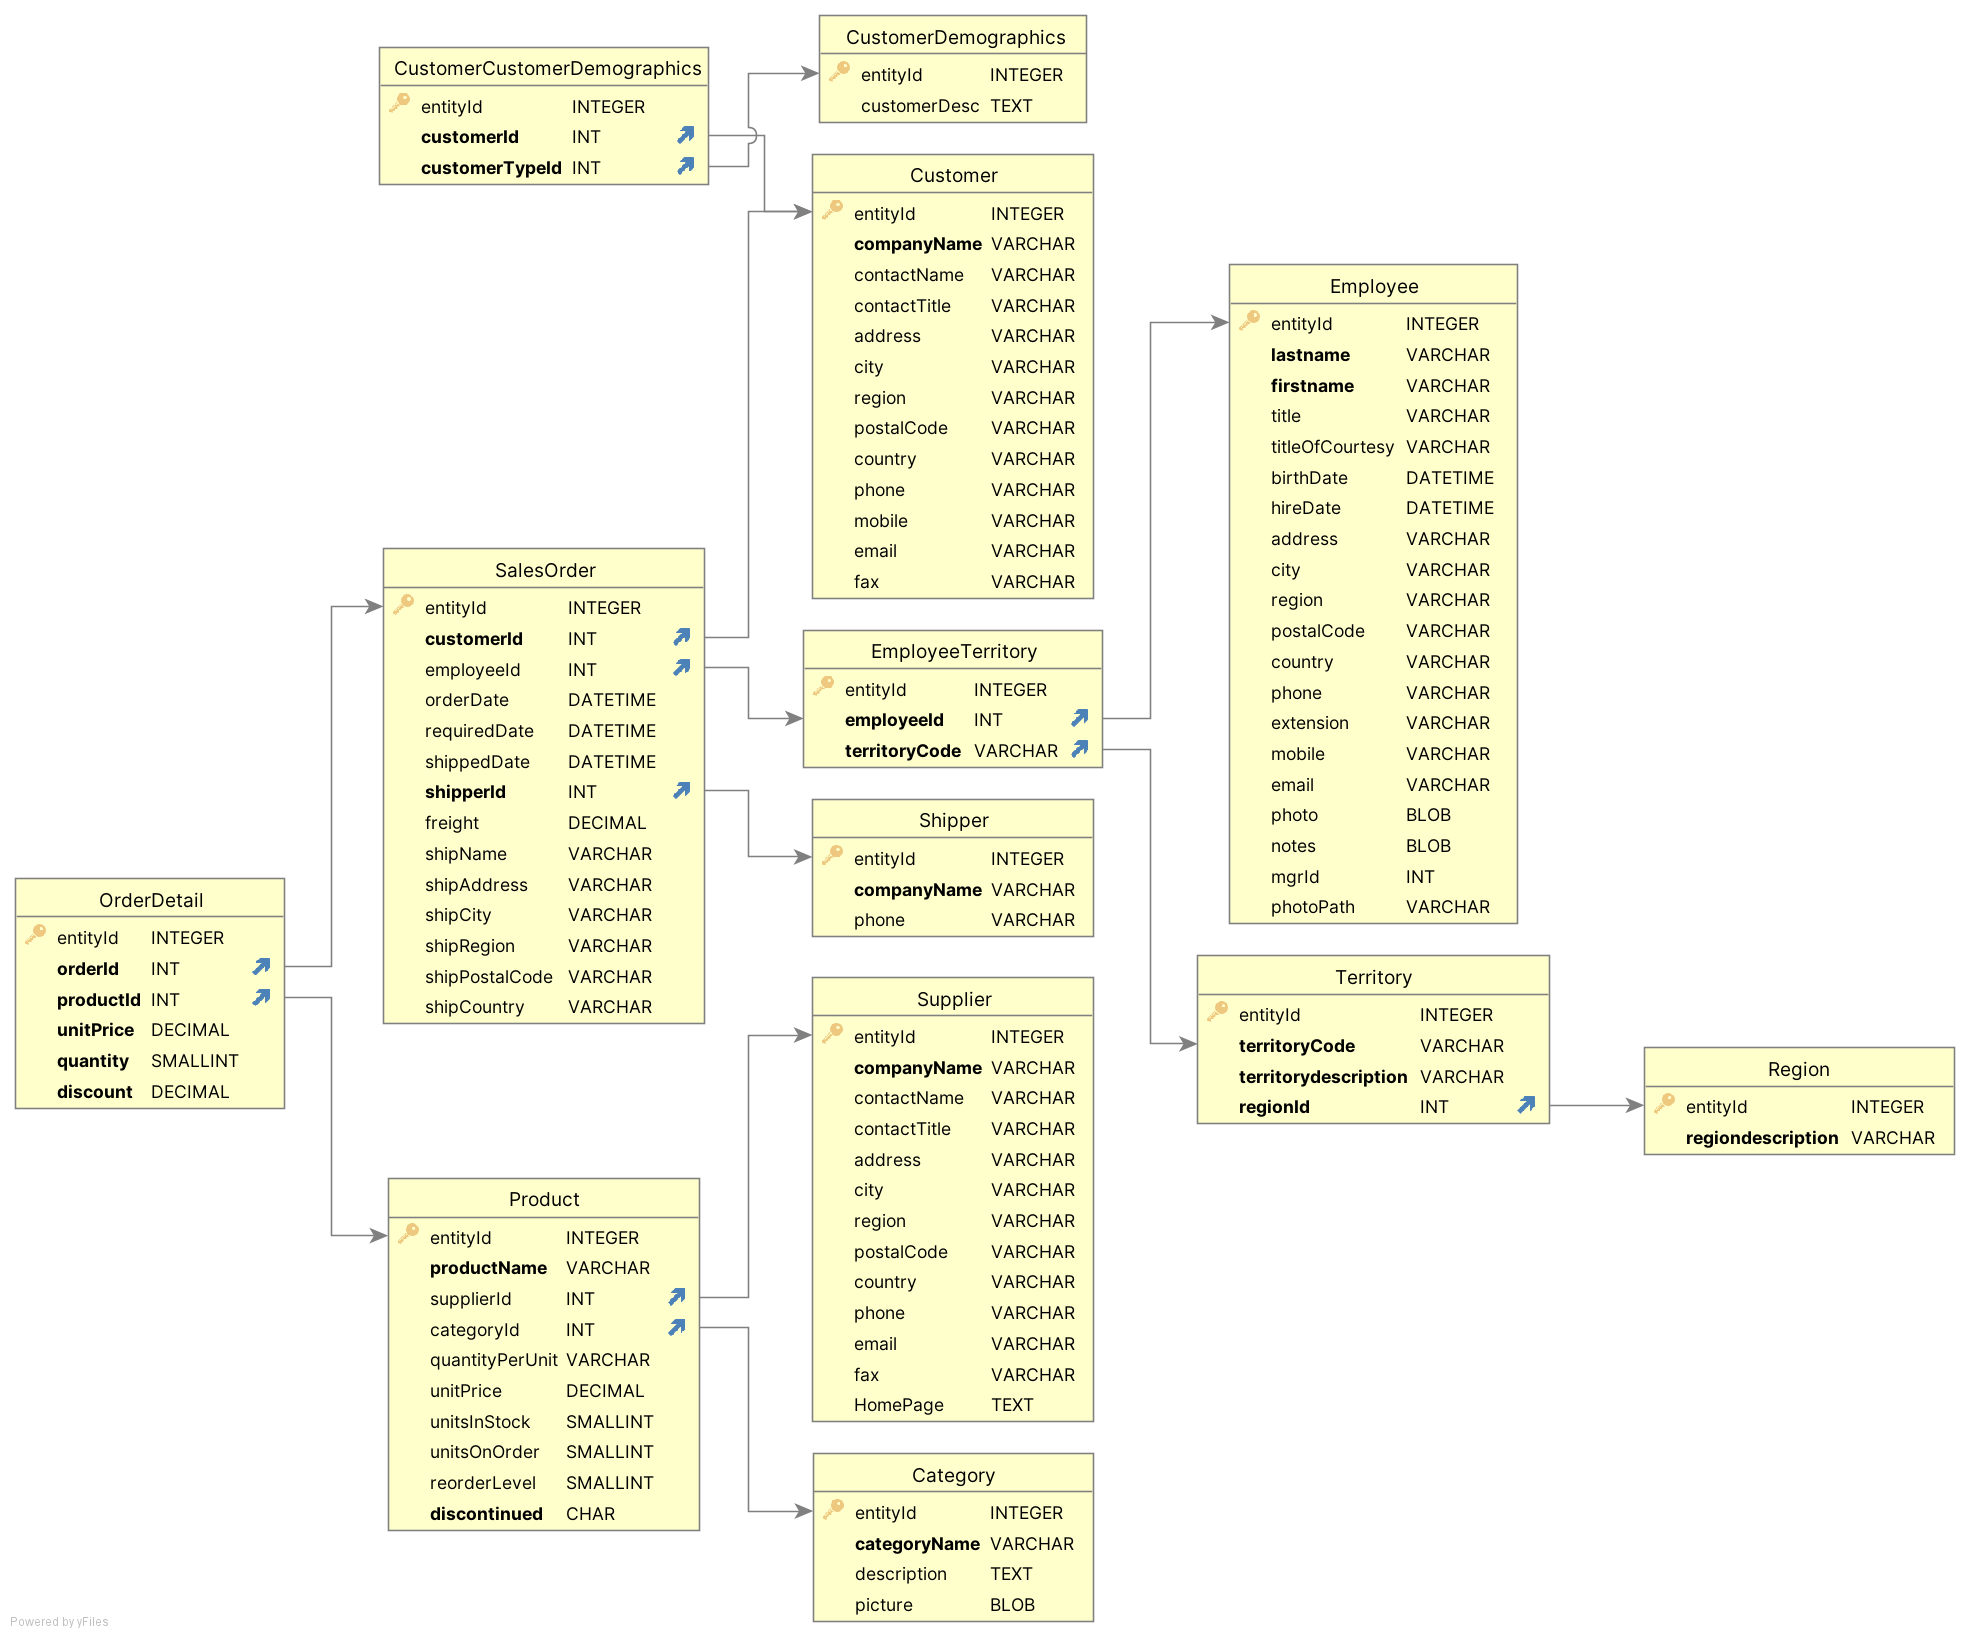

# Export DataFrame to CSV


In [ ]:
# Commit the changes
conn.commit()

In [ ]:
# Run SQL query and save results to a dataframe
df_Category = pd.read_sql_query("select * from Category", con=conn)
print(df_Category)

   entityId    categoryName  \
0         1       Beverages   
1         2      Condiments   
2         3     Confections   
3         4  Dairy Products   
4         5  Grains/Cereals   
5         6    Meat/Poultry   
6         7         Produce   
7         8         Seafood   

                                         description picture  
0        Soft drinks, coffees, teas, beers, and ales    None  
1  Sweet and savory sauces, relishes, spreads, an...    None  
2                Desserts, candies, and sweet breads    None  
3                                            Cheeses    None  
4                Breads, crackers, pasta, and cereal    None  
5                                     Prepared meats    None  
6                          Dried fruit and bean curd    None  
7                                   Seaweed and fish    None  


In [ ]:
# Example: Export DataFrame to a CSV file named 'data.csv'
df_Category.to_csv('df_Category.csv', index=False)  # Set index=False to exclude row numbers in the output

In [ ]:
from google.colab import files
files.download('df_Category.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Run SQL query and save results to a dataframe
df_Region = pd.read_sql_query("select * from Region", con=conn)
print(df_Region)

   entityId regiondescription
0         1           Eastern
1         2           Western
2         3          Northern
3         4          Southern


In [ ]:
# Example: Export DataFrame to a CSV file named 'data.csv'
df_Region.to_csv('df_Region.csv', index=False)  # Set index=False to exclude row numbers in the output



In [ ]:
from google.colab import files
files.download('df_Region.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Run SQL query and save results to a dataframe
df_CustomerDemographics = pd.read_sql_query("select * from CustomerDemographics", con=conn)
print(df_CustomerDemographics)

Empty DataFrame
Columns: [entityId, customerDesc]
Index: []


In [ ]:
# Example: Export DataFrame to a CSV file named 'data.csv'
df_CustomerDemographics.to_csv('df_CustomerDemographics.csv', index=False)  # Set index=False to exclude row numbers in the output



In [ ]:
from google.colab import files
files.download('df_CustomerDemographics.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Run SQL query and save results to a dataframe
df_Customer = pd.read_sql_query("select * from Customer", con=conn)
print(df_Customer)

    entityId     companyName         contactName               contactTitle  \
0          1  Customer NRZBB      Allen, Michael       Sales Representative   
1          2  Customer MLTDN       Hassall, Mark                      Owner   
2          3  Customer KBUDE       Peoples, John                      Owner   
3          4  Customer HFBZG      Arndt, Torsten       Sales Representative   
4          5  Customer HGVLZ   Higginbotham, Tom        Order Administrator   
..       ...             ...                 ...                        ...   
86        87  Customer ZHYOS     Ludwig, Michael         Accounting Manager   
87        88  Customer SRQVM             Li, Yan              Sales Manager   
88        89  Customer YBQTI  Smith Jr., Ronaldo                      Owner   
89        90  Customer XBBVR   Larsson, Katarina  Owner/Marketing Assistant   
90        91  Customer CCFIZ         Conn, Steve                      Owner   

                          address         city regi

In [ ]:
# Example: Export DataFrame to a CSV file named 'data.csv'
df_Customer.to_csv('df_Customer.csv', index=False)  # Set index=False to exclude row numbers in the output



In [ ]:
from google.colab import files
files.download('df_Customer.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Run SQL query and save results to a dataframe
df_CustomerCustomerDemographics = pd.read_sql_query("select * from CustomerCustomerDemographics", con=conn)
print(df_CustomerCustomerDemographics)

Empty DataFrame
Columns: [entityId, customerId, customerTypeId]
Index: []


In [ ]:
# Example: Export DataFrame to a CSV file named 'data.csv'
df_CustomerCustomerDemographics.to_csv('df_CustomerCustomerDemographics.csv', index=False)  # Set index=False to exclude row numbers in the output



In [ ]:
from google.colab import files
files.download('df_CustomerCustomerDemographics.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Run SQL query and save results to a dataframe
df_Employee = pd.read_sql_query("select * from Employee", con=conn)
print(df_Employee)

   entityId      lastname firstname                  title titleOfCourtesy  \
0         1         Davis      Sara                    CEO             Ms.   
1         2          Funk       Don  Vice President, Sales             Dr.   
2         3           Lew      Judy          Sales Manager             Ms.   
3         4         Peled      Yael   Sales Representative            Mrs.   
4         5          Buck      Sven          Sales Manager             Mr.   
5         6         Suurs      Paul   Sales Representative             Mr.   
6         7          King   Russell   Sales Representative             Mr.   
7         8       Cameron     Maria   Sales Representative             Ms.   
8         9  Dolgopyatova      Zoya   Sales Representative             Ms.   

                 birthDate                 hireDate  \
0  1958-12-08 00:00:00.000  2002-05-01 00:00:00.000   
1  1962-02-19 00:00:00.000  2002-08-14 00:00:00.000   
2  1973-08-30 00:00:00.000  2002-04-01 00:00:00.000   

In [ ]:
# Example: Export DataFrame to a CSV file named 'data.csv'
df_Employee.to_csv('df_Employee.csv', index=False)  # Set index=False to exclude row numbers in the output



In [ ]:
from google.colab import files
files.download('df_Employee.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Run SQL query and save results to a dataframe
df_EmployeeTerritory = pd.read_sql_query("select * from EmployeeTerritory", con=conn)
print(df_EmployeeTerritory)

    entityId  employeeId territoryCode
0          1           1         06897
1          2           1         19713
2          3           2         01581
3          4           2         01730
4          5           2         01833
5          6           2         02116
6          7           2         02139
7          8           2         02184
8          9           2         40222
9         10           3         30346
10        11           3         31406
11        12           3         32859
12        13           3         33607
13        14           4         20852
14        15           4         27403
15        16           4         27511
16        17           5         02903
17        18           5         07960
18        19           5         08837
19        20           5         10019
20        21           5         10038
21        22           5         11747
22        23           5         14450
23        24           6         85014
24        25           6 

In [ ]:
# Example: Export DataFrame to a CSV file named 'data.csv'
df_EmployeeTerritory.to_csv('df_EmployeeTerritory.csv', index=False)  # Set index=False to exclude row numbers in the output



In [ ]:
from google.colab import files
files.download('df_EmployeeTerritory.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Run SQL query and save results to a dataframe
df_Supplier = pd.read_sql_query("select * from Supplier", con=conn)
print(df_Supplier)

    entityId     companyName               contactName  \
0          1  Supplier SWRXU          Adolphi, Stephan   
1          2  Supplier VHQZD                Hance, Jim   
2          3  Supplier STUAZ         Parovszky, Alfons   
3          4  Supplier QOVFD          Balázs, Erzsébet   
4          5  Supplier EQPNC             Holm, Michael   
5          6  Supplier QWUSF            Popkova, Darya   
6          7  Supplier GQRCV            Ræbild, Jesper   
7          8  Supplier BWGYE              Iallo, Lucio   
8          9  Supplier QQYEU             Basalik, Evan   
9         10  Supplier UNAHG             Barnett, Dave   
10        11  Supplier ZPYVS              Jain, Mukesh   
11        12  Supplier SVIYA              Regev, Barak   
12        13  Supplier TEGSC              Brehm, Peter   
13        14  Supplier KEREV             Keil, Kendall   
14        15  Supplier NZLIF  Sałas-Szlejter, Karolina   
15        16  Supplier UHZRG          Scholl, Thorsten   
16        17  

In [ ]:
# Example: Export DataFrame to a CSV file named 'data.csv'
df_Supplier.to_csv('df_Supplier.csv', index=False)  # Set index=False to exclude row numbers in the output



In [ ]:
from google.colab import files
files.download('df_Supplier.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Run SQL query and save results to a dataframe
df_Product = pd.read_sql_query("select * from Product", con=conn)
print(df_Product)

    entityId    productName  supplierId  categoryId quantityPerUnit  \
0          1  Product HHYDP           1           1            None   
1          2  Product RECZE           1           1            None   
2          3  Product IMEHJ           1           2            None   
3          4  Product KSBRM           2           2            None   
4          5  Product EPEIM           2           2            None   
..       ...            ...         ...         ...             ...   
72        73  Product WEUJZ          17           8            None   
73        74  Product BKAZJ           4           7            None   
74        75  Product BWRLG          12           1            None   
75        76  Product JYGFE          23           1            None   
76        77  Product LUNZZ          12           2            None   

    unitPrice unitsInStock unitsOnOrder reorderLevel discontinued  
0       18.00         None         None         None            0  
1       19.

In [ ]:
# Example: Export DataFrame to a CSV file named 'data.csv'
df_Product.to_csv('df_Product.csv', index=False)  # Set index=False to exclude row numbers in the output



In [ ]:
from google.colab import files
files.download('df_Product.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Run SQL query and save results to a dataframe
df_Shipper = pd.read_sql_query("select * from Shipper", con=conn)
print(df_Shipper)

   entityId    companyName           phone
0         1  Shipper GVSUA  (503) 555-0137
1         2  Shipper ETYNR  (425) 555-0136
2         3  Shipper ZHISN  (415) 555-0138


In [ ]:
# Example: Export DataFrame to a CSV file named 'data.csv'
df_Shipper.to_csv('df_Shipper.csv', index=False)  # Set index=False to exclude row numbers in the output



In [ ]:
from google.colab import files
files.download('df_Shipper.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Run SQL query and save results to a dataframe
df_SalesOrder = pd.read_sql_query("select * from SalesOrder", con=conn)
print(df_SalesOrder)

     entityId  customerId  employeeId                orderDate  \
0       10248          85           5  2006-07-04 00:00:00.000   
1       10249          79           6  2006-07-05 00:00:00.000   
2       10250          34           4  2006-07-08 00:00:00.000   
3       10251          84           3  2006-07-08 00:00:00.000   
4       10252          76           4  2006-07-09 00:00:00.000   
..        ...         ...         ...                      ...   
824     11072          20           4  2008-05-05 00:00:00.000   
825     11073          58           2  2008-05-05 00:00:00.000   
826     11074          73           7  2008-05-06 00:00:00.000   
827     11075          68           8  2008-05-06 00:00:00.000   
828     11076           9           4  2008-05-06 00:00:00.000   

                requiredDate              shippedDate  shipperId  freight  \
0    2006-08-01 00:00:00.000  2006-07-16 00:00:00.000          3    32.38   
1    2006-08-16 00:00:00.000  2006-07-10 00:00:00.000

In [ ]:
# Example: Export DataFrame to a CSV file named 'data.csv'
df_SalesOrder.to_csv('df_SalesOrder.csv', index=False)  # Set index=False to exclude row numbers in the output



In [ ]:
from google.colab import files
files.download('df_SalesOrder.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Run SQL query and save results to a dataframe
df_OrderDetail = pd.read_sql_query("select * from OrderDetail", con=conn)
print(df_OrderDetail)

      entityId  orderId  productId  unitPrice  quantity  discount
0            1    10248         11      14.00        12      0.00
1            2    10248         42       9.80        10      0.00
2            3    10248         72      34.80         5      0.00
3            4    10249         14      18.60         9      0.00
4            5    10249         51      42.40        40      0.00
...        ...      ...        ...        ...       ...       ...
2149      2151    11077         64      33.25         2      0.03
2150      2152    11077         66      17.00         1      0.00
2151      2153    11077         73      15.00         2      0.01
2152      2154    11077         75       7.75         4      0.00
2153      2155    11077         77      13.00         2      0.00

[2154 rows x 6 columns]


In [ ]:
# Example: Export DataFrame to a CSV file named 'data.csv'
df_OrderDetail.to_csv('df_OrderDetail.csv', index=False)  # Set index=False to exclude row numbers in the output



In [ ]:
from google.colab import files
files.download('df_OrderDetail.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Run SQL query and save results to a dataframe
df_Territory = pd.read_sql_query("select * from Territory", con=conn)
print(df_Territory)

    entityId territoryCode territorydescription  regionId
0          1         01581             Westboro         1
1          2         01730              Bedford         1
2          3         01833            Georgetow         1
3          4         02116               Boston         1
4          5         02139            Cambridge         1
5          6         02184            Braintree         1
6          7         02903           Providence         1
7          8         03049               Hollis         3
8          9         03801           Portsmouth         3
9         10         06897               Wilton         1
10        11         07960           Morristown         1
11        12         08837               Edison         1
12        13         10019             New York         1
13        14         10038             New York         1
14        15         11747             Mellvile         1
15        16         14450             Fairport         1
16        17  

In [ ]:
# Example: Export DataFrame to a CSV file named 'data.csv'
df_Territory.to_csv('df_Territory.csv', index=False)  # Set index=False to exclude row numbers in the output

In [ ]:
from google.colab import files
files.download('df_Territory.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>